

---


#$\color{Gray}{SUPPORT \ \ VECTOR \ \ MACHINE}$


---



In [18]:
# @title $Upload \ \ Required \ \ Libraries$

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['figure.dpi']= 150
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# @title $Upload \ \ Mushroom \ \ Dataset$
pd.set_option('display.max_columns', None)
df0 = pd.read_csv('mushroom.csv')
df0.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color stalk_shape stalk_root  \
0      distant     broad       pink    tapering        cup   
1      crowded    narrow  chocolate   enlarging     rooted   
2      crowded     broad     purple    tapering        cup   
3        close     broad     orange   enlarging       club   
4      crowded    narrow     orange   enlarging    missing   

  stalk_surface_above_ring stalk_surface_below_ring stalk_color_above_ring  \
0                   smooth                    silky                   gray   
1                    silky                    silky               cinnamon   
2                    scaly                    silky                 yellow   
3                   smooth                    scaly                 yellow   
4                  fibrous                    scaly                   gray   

  stalk_color_below_ring  veil_type veil_color ring_number  ring_type  \
0                 yellow    partial      brown         two  sheathing   
1                  brown  universal      brown         two  sheathing   
2                   gray  universal     yellow         two  sheathing   
3                   pink    partial     yellow         two   cobwebby   
4                  white  universal      white        none       none   

  spore_print_color population  habitat      class  stalk_height  cap_diameter  
0         chocolate  clustered    waste  poisonous     14.276173      5.054983  
1             brown   numerous    waste     edible      3.952715     19.068319  
2            purple   abundant    waste  poisonous      9.054265      7.205884  
3             green  clustered  grasses  poisonous      5.226499     20.932692  
4            yellow  clustered    urban  poisonous     14.037532     12.545245

# Task 1: Exploratory Data Analysis (EDA)

In [3]:
# @title $Dataset \ \ Information$
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
# @title $Dataset \ \ Description \ \ Numerical \ \ Columns$
df0.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [5]:
# @title $Dataset \ \ Description \ \ Categorical \ \ Columns$
df0.describe(include='object')

cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count       2000        2000      2000    2000  2000            2000   
unique         5           4         9       2     9               4   
top       sunken       scaly     brown     yes  foul            free   
freq         439         568       263    1023   274             540   

       gill_spacing gill_size gill_color stalk_shape stalk_root  \
count          2000      2000       2000        2000       2000   
unique            3         2         12           2          7   
top         distant    narrow     orange   enlarging    bulbous   
freq            677      1007        216        1040        336   

       stalk_surface_above_ring stalk_surface_below_ring  \
count                      2000                     2000   
unique                        4                        4   
top                     fibrous                    silky   
freq                        555                      522   

       stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
count                    2000                   2000       2000       2000   
unique                      9                      9          2          4   
top                     brown                 orange  universal      white   
freq                      271                    259       1010        553   

       ring_number  ring_type spore_print_color population habitat      class  
count         2000       2000              2000       2000    2000       2000  
unique           3          8                 9          6       7          2  
top            one  sheathing             brown   abundant   urban  poisonous  
freq           689        305               255        360     316       1400

# Task 2: Data Preprocessing & Task 3: Data Visualization

In [6]:
# @title $Duplicate \ \ Records$
print('No. of Duplicate Records =',df0.duplicated().sum())

No. of Duplicate Records = 1024


In [94]:
# @title $Drop \ \ Duplicate \ \ Records$
drop_duplicates = "No" # @param ["Yes", "No"]
if drop_duplicates == "Yes":
    df=df0.drop_duplicates()
else:
    df=df0.copy()


print('Dataframe Shape :',df.shape)

Dataframe Shape : (2000, 26)


In [95]:
# @title $No. \ \ of \ \ unique \ \ values \ \ in \ \ each \ \ column$
df.nunique()

Unnamed: 0                  976
cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64

In [96]:
# @title $Categorical \ \ \& Numerical \ \ Columns $
cat_columns = df.select_dtypes(include='object').columns.tolist()
print('Categorical Columns :', cat_columns)
num_columns = df.select_dtypes(exclude='object').columns.tolist()
print('Numerical Columns :', num_columns)

Categorical Columns : ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class']
Numerical Columns : ['Unnamed: 0', 'stalk_height', 'cap_diameter']


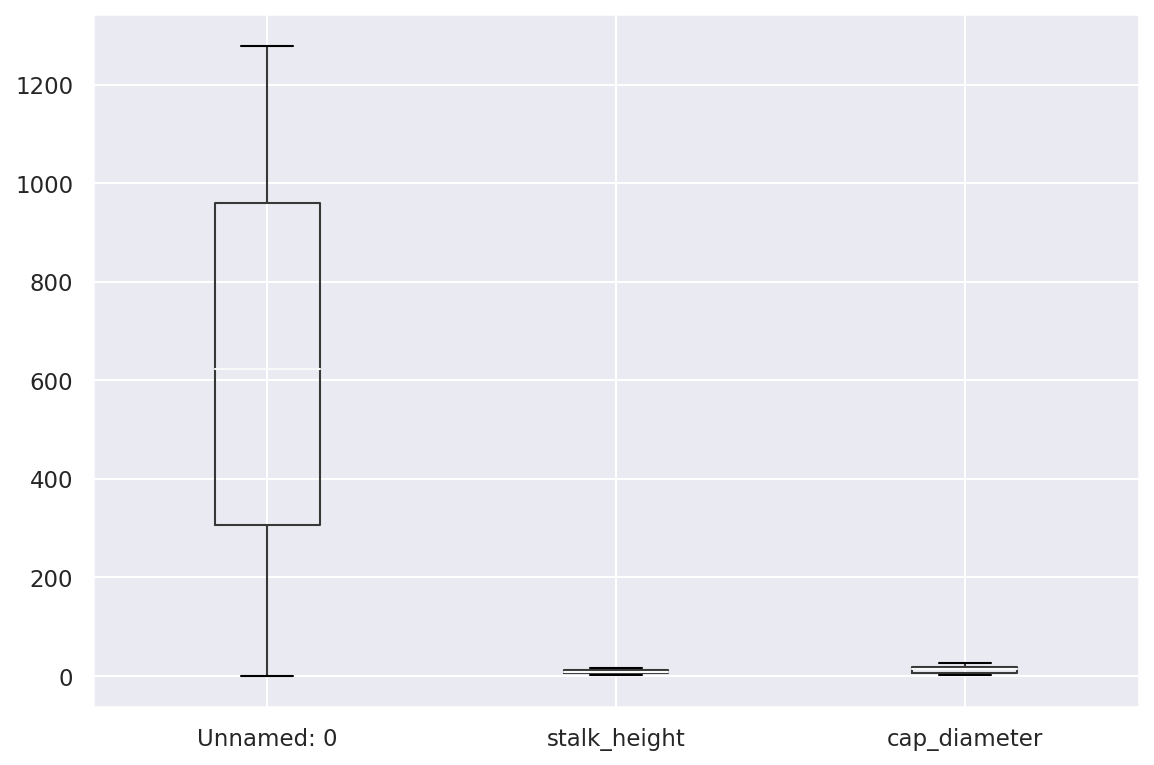

In [10]:
# @title $Boxplot$
df.boxplot()
plt.show()

* There are no outliers in numerical columns

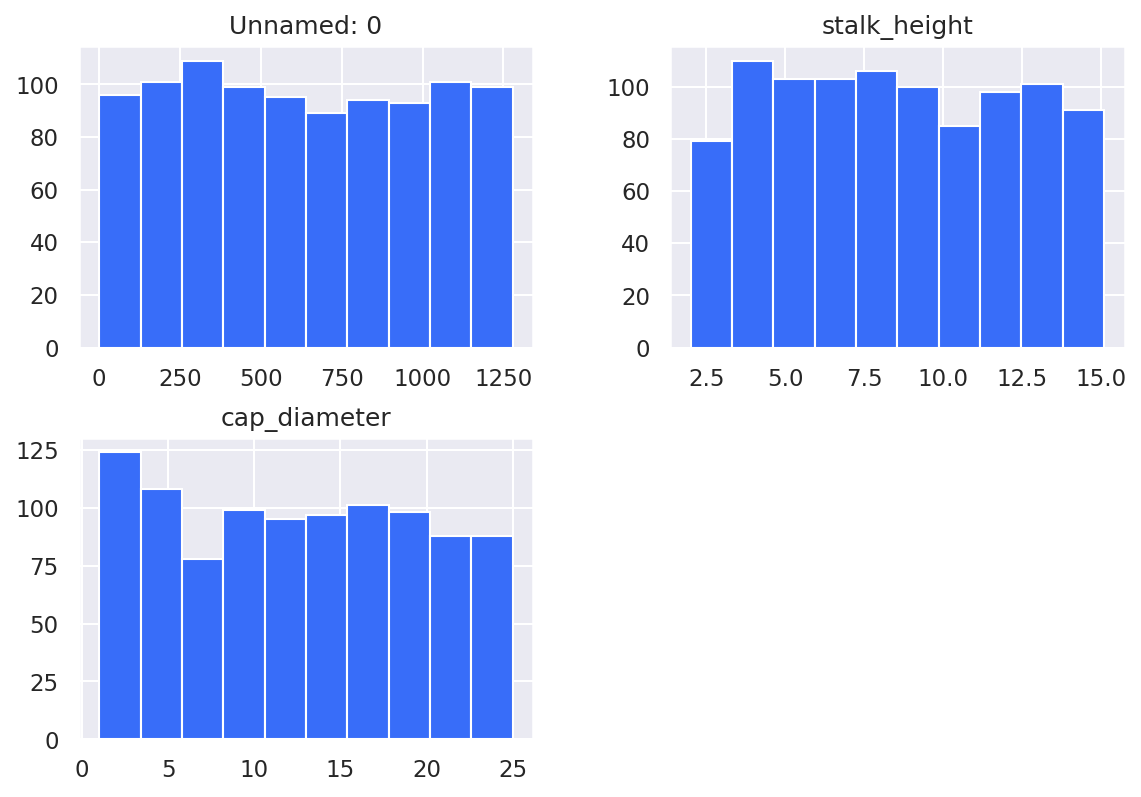

In [11]:
# @title $Histogram$
df.hist()
plt.show()

* Distribution of numerical columns is mostly uniform

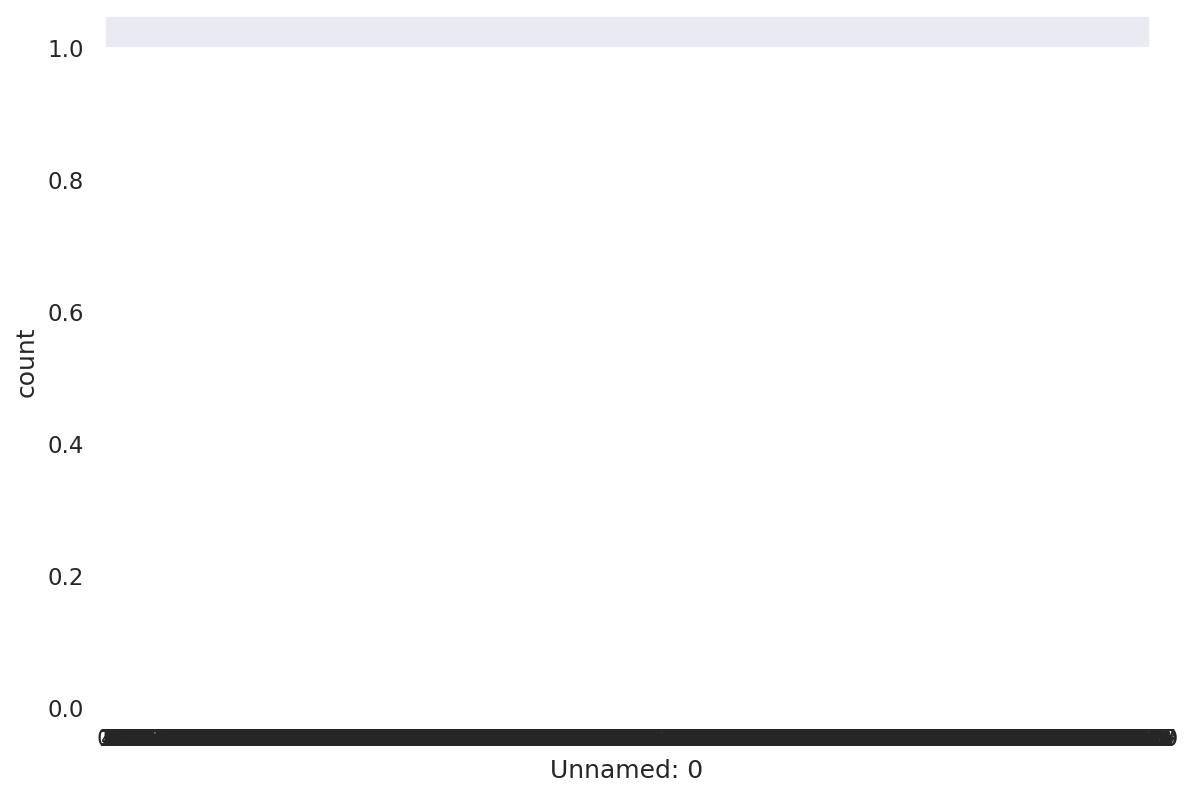

---------------------------------------------------------------------------------------------------


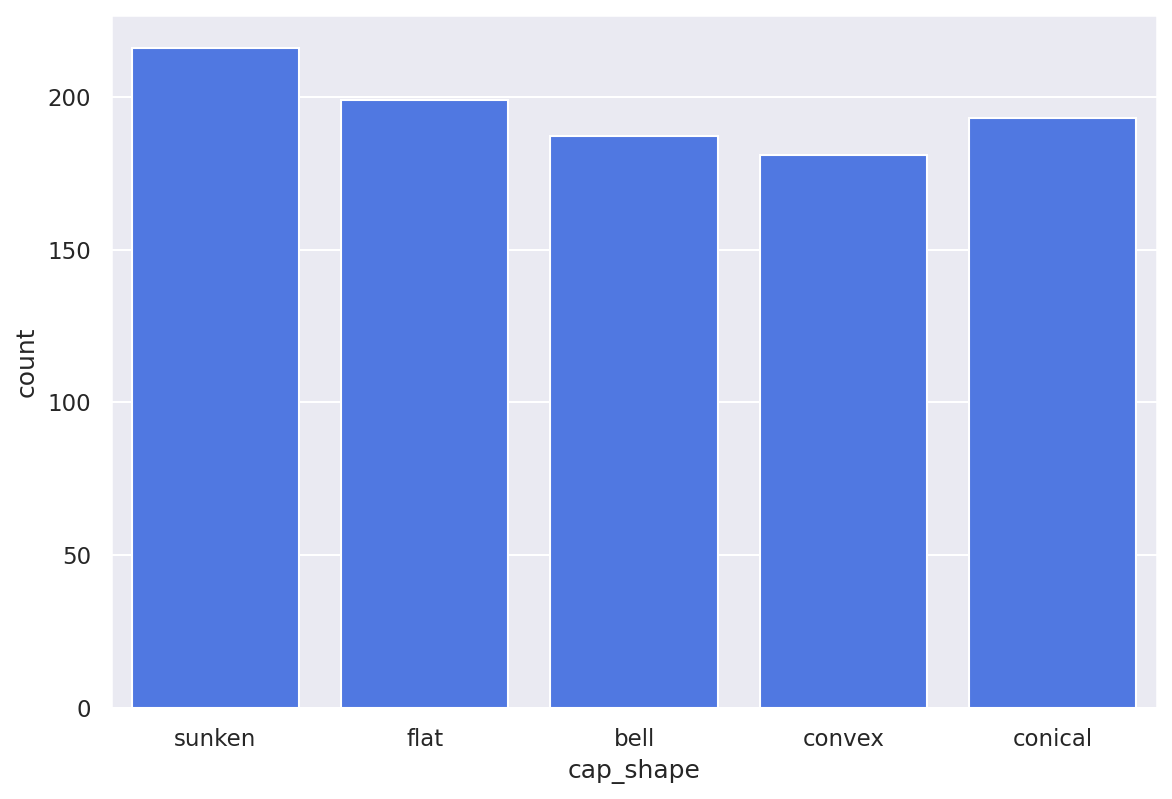

---------------------------------------------------------------------------------------------------


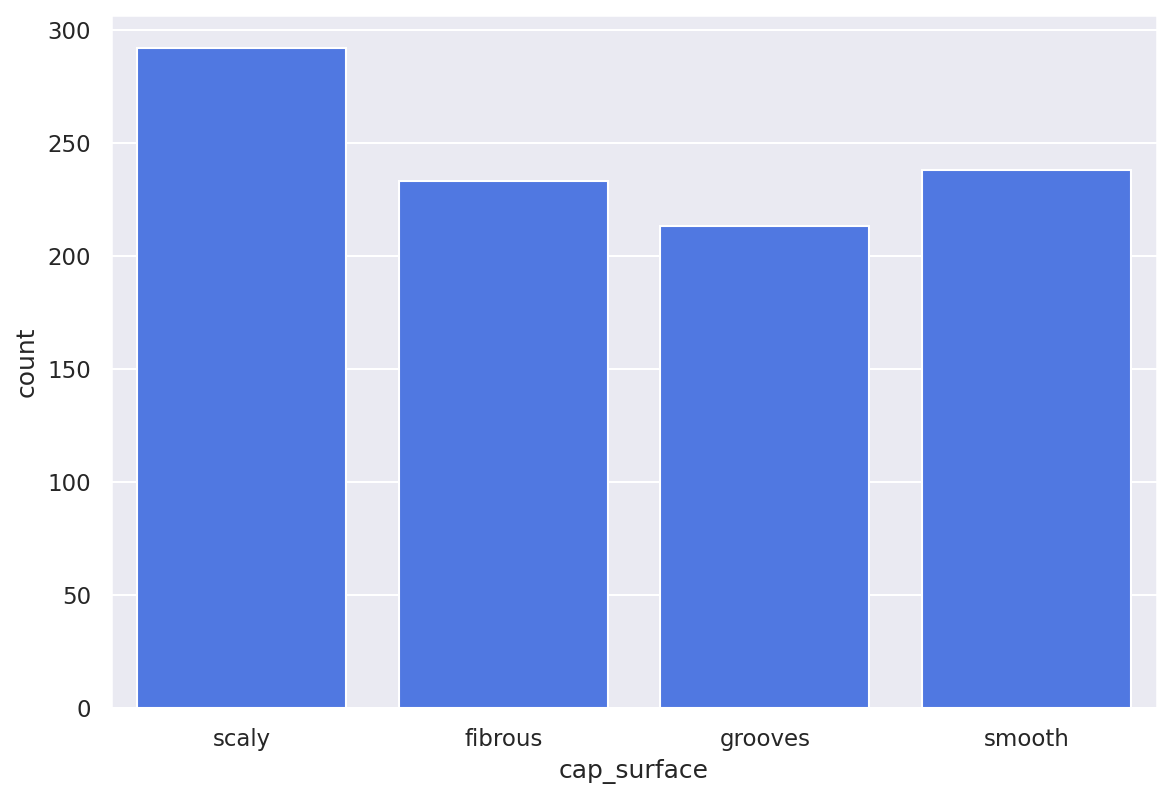

---------------------------------------------------------------------------------------------------


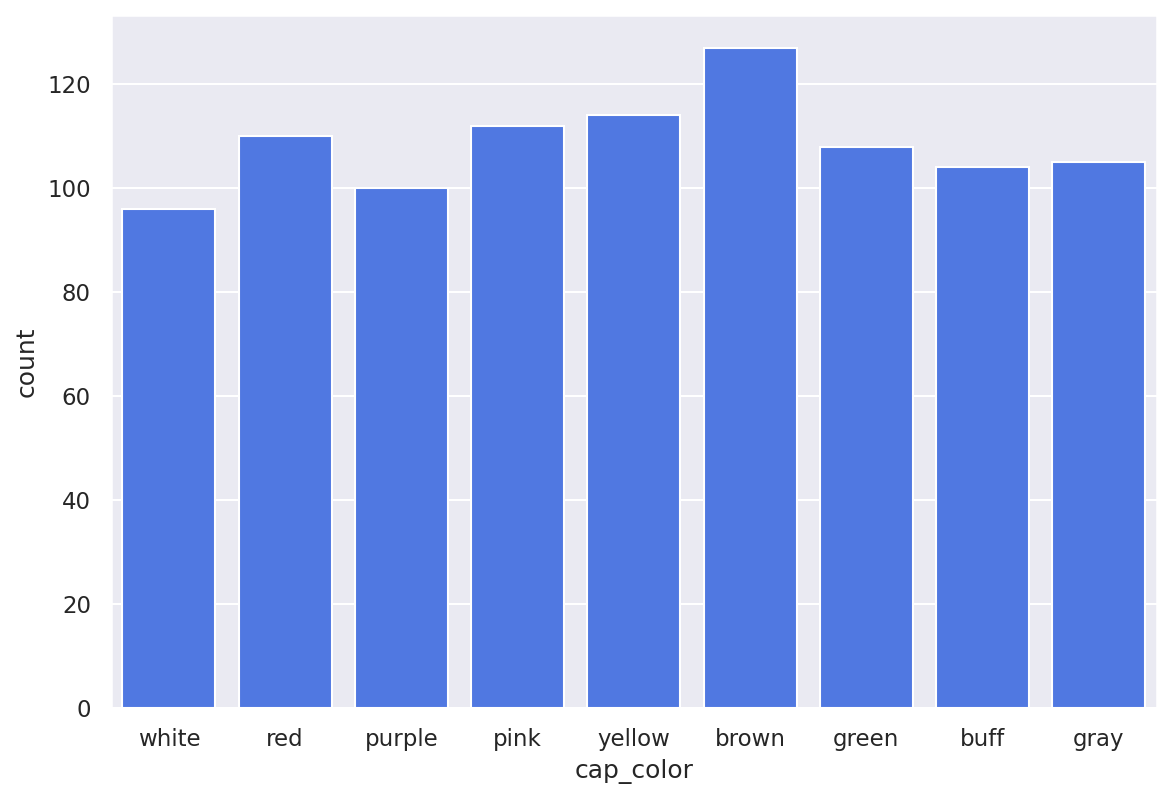

---------------------------------------------------------------------------------------------------


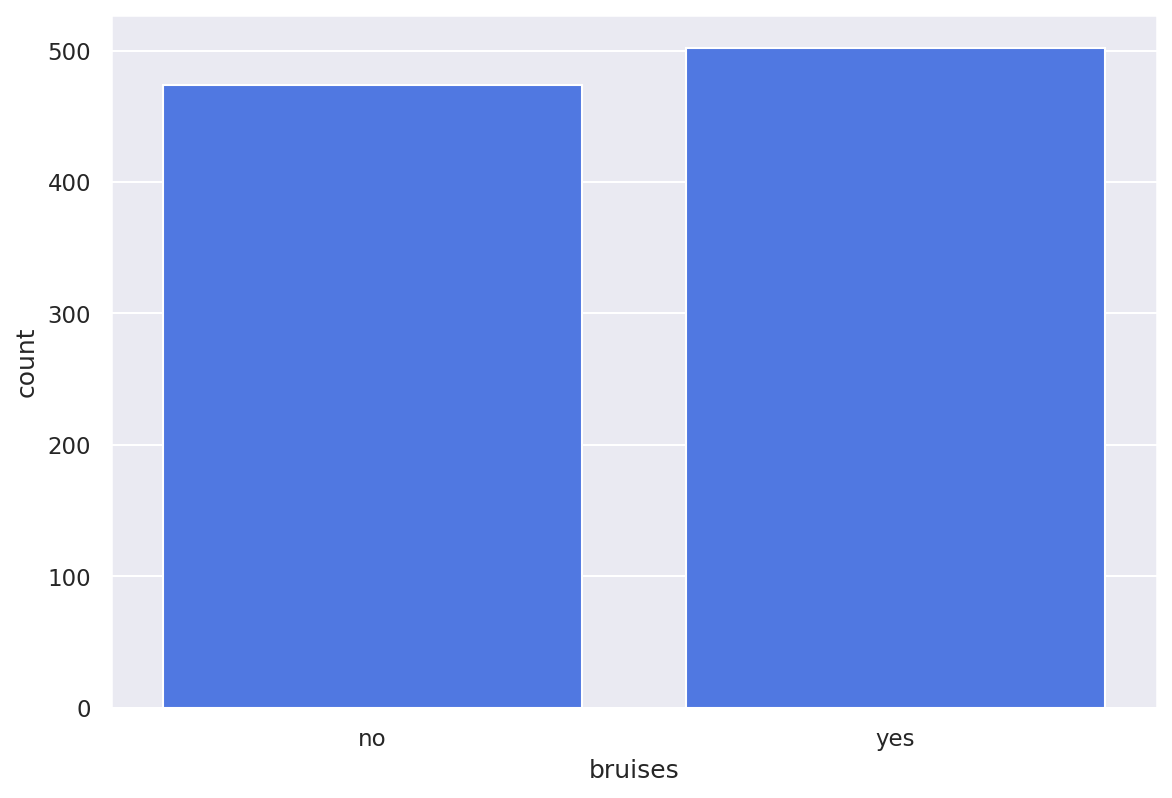

---------------------------------------------------------------------------------------------------


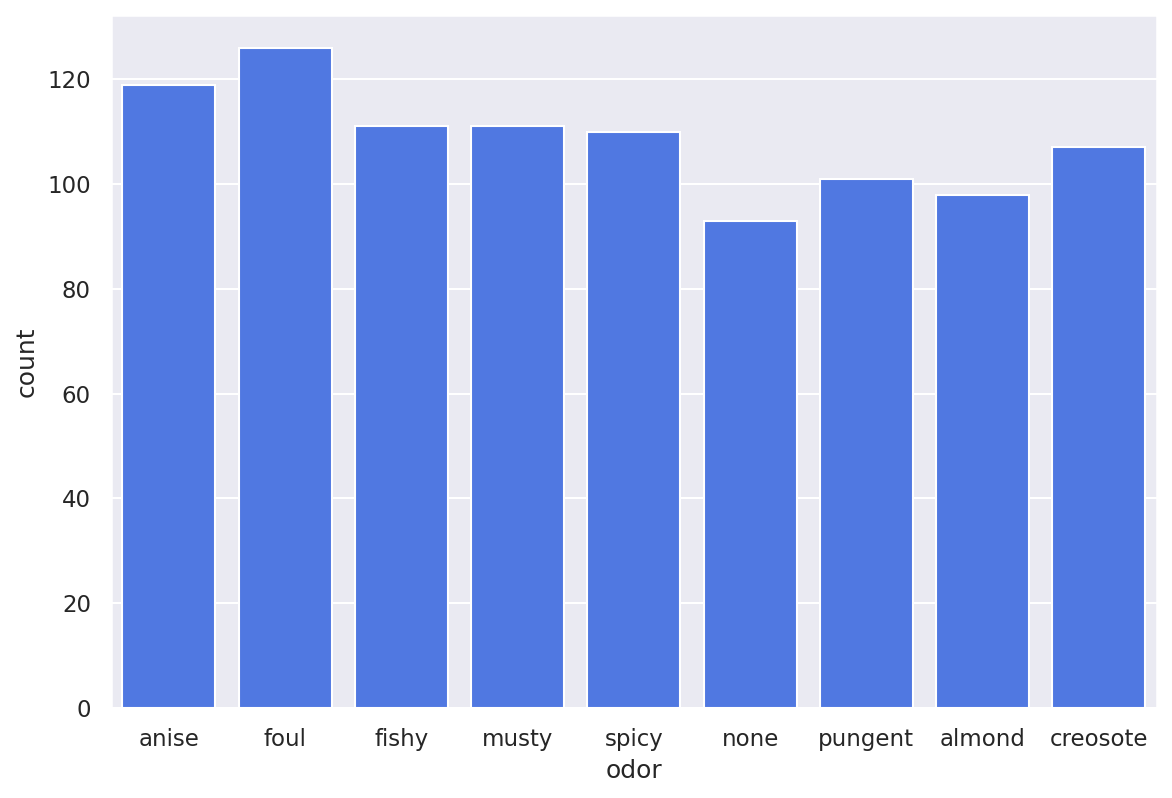

---------------------------------------------------------------------------------------------------


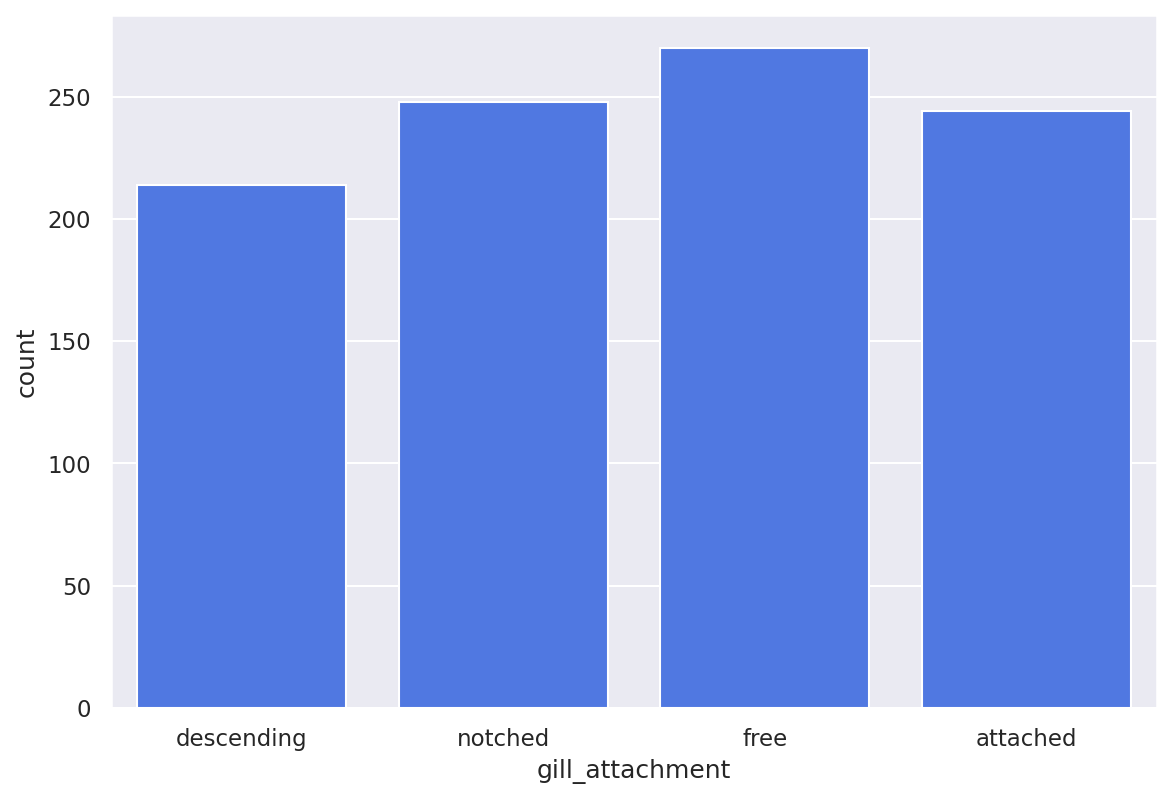

---------------------------------------------------------------------------------------------------


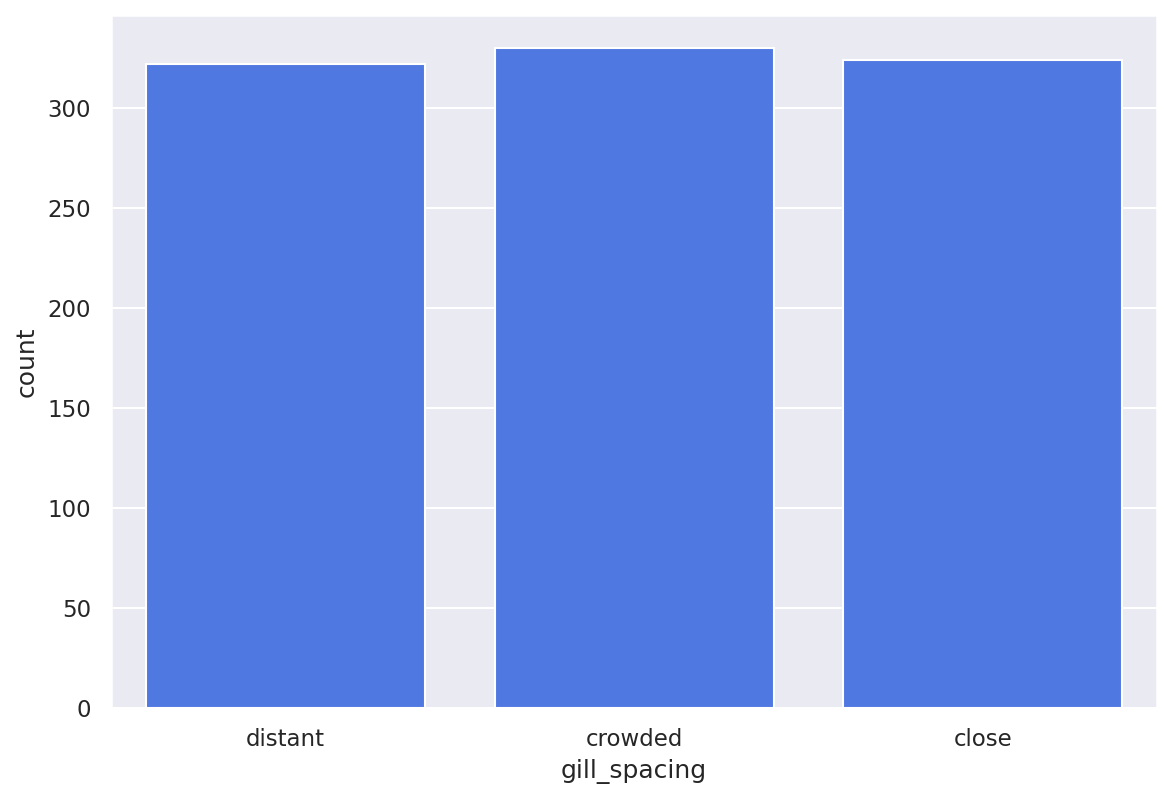

---------------------------------------------------------------------------------------------------


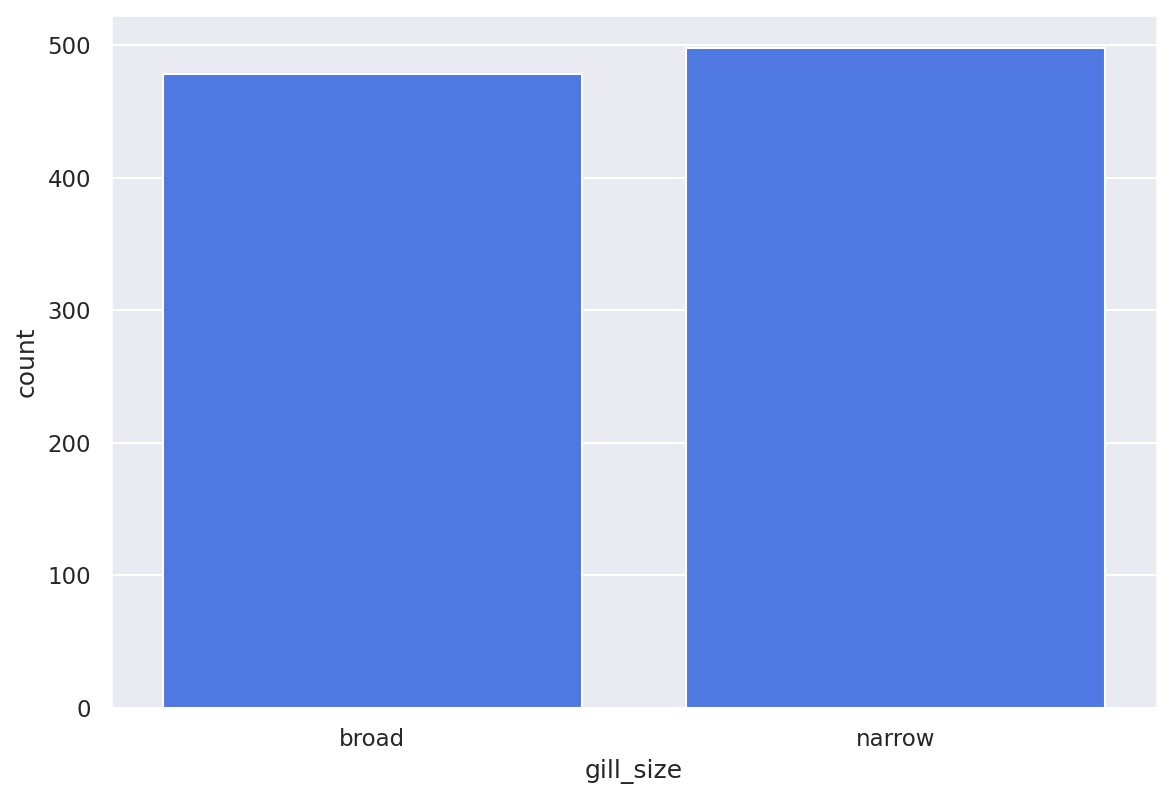

---------------------------------------------------------------------------------------------------


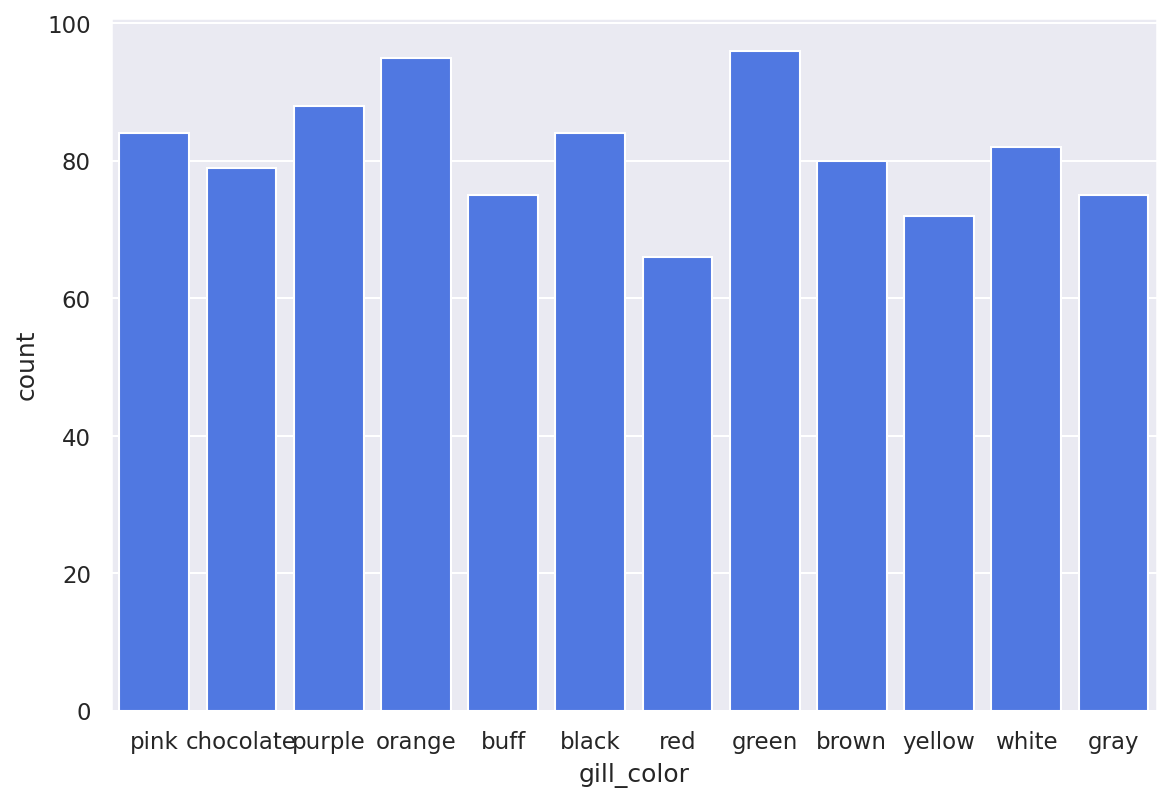

---------------------------------------------------------------------------------------------------


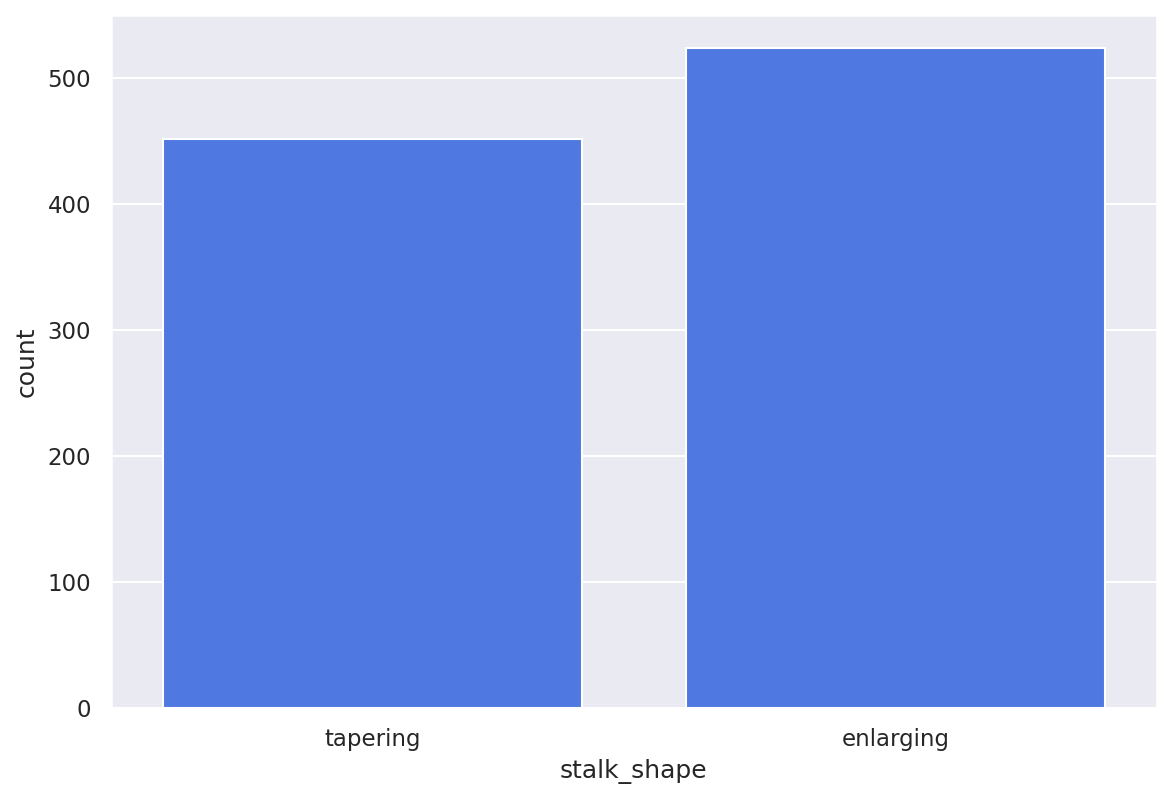

---------------------------------------------------------------------------------------------------


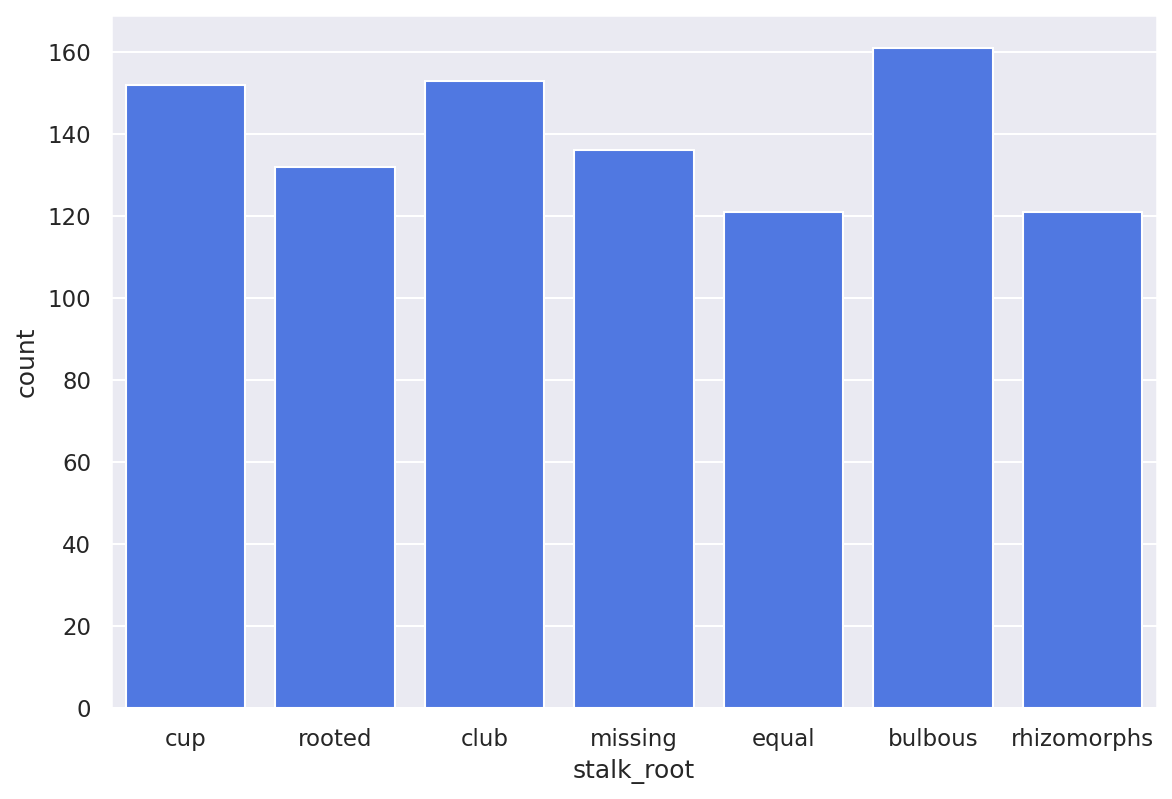

---------------------------------------------------------------------------------------------------


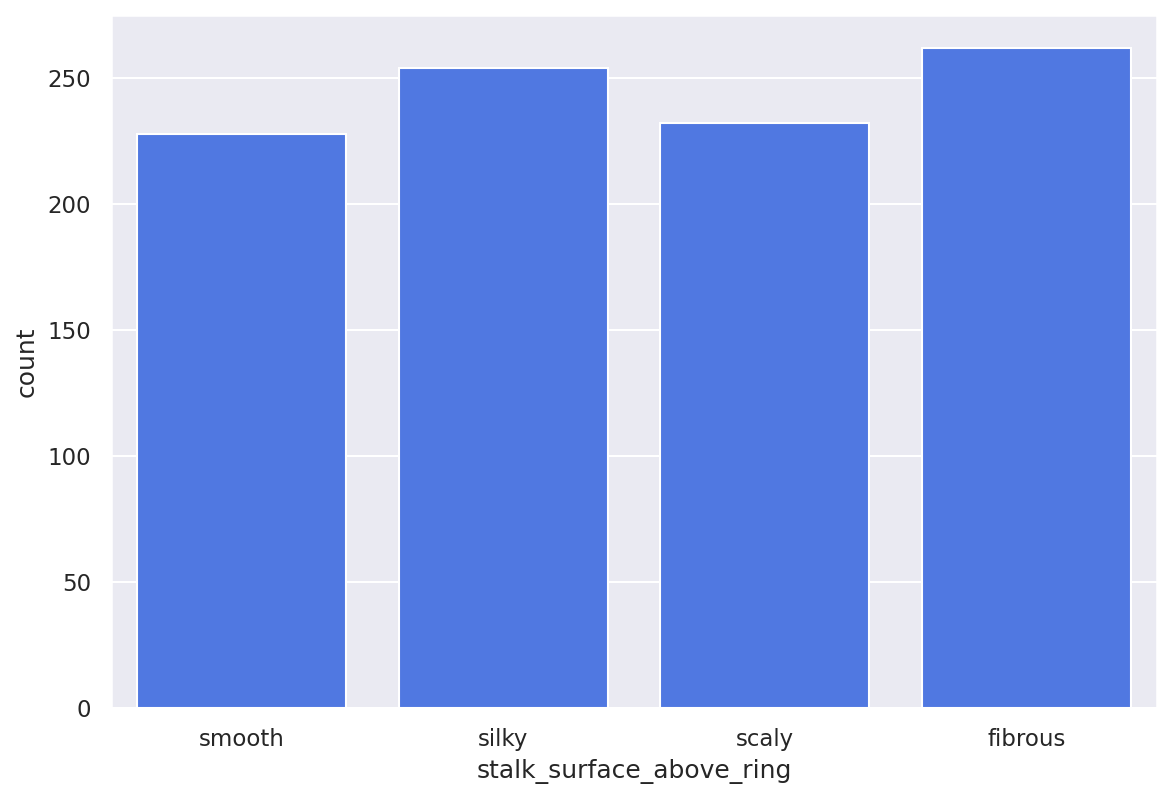

---------------------------------------------------------------------------------------------------


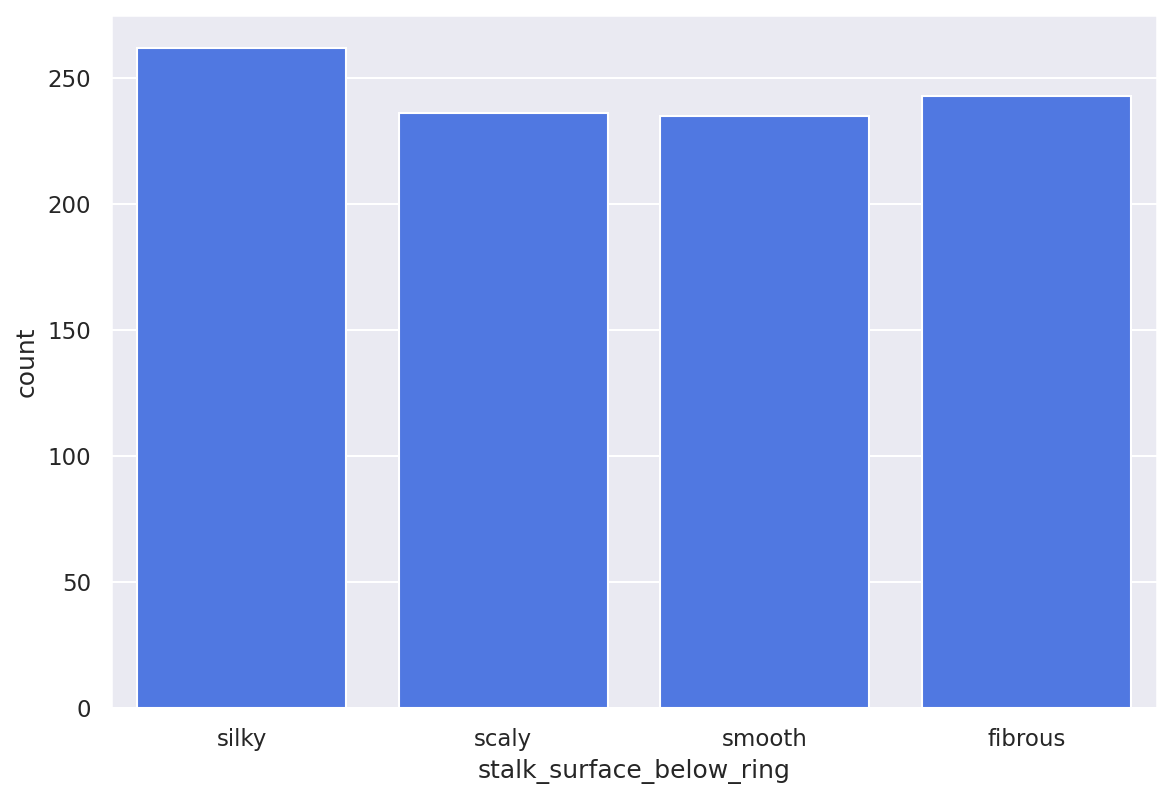

---------------------------------------------------------------------------------------------------


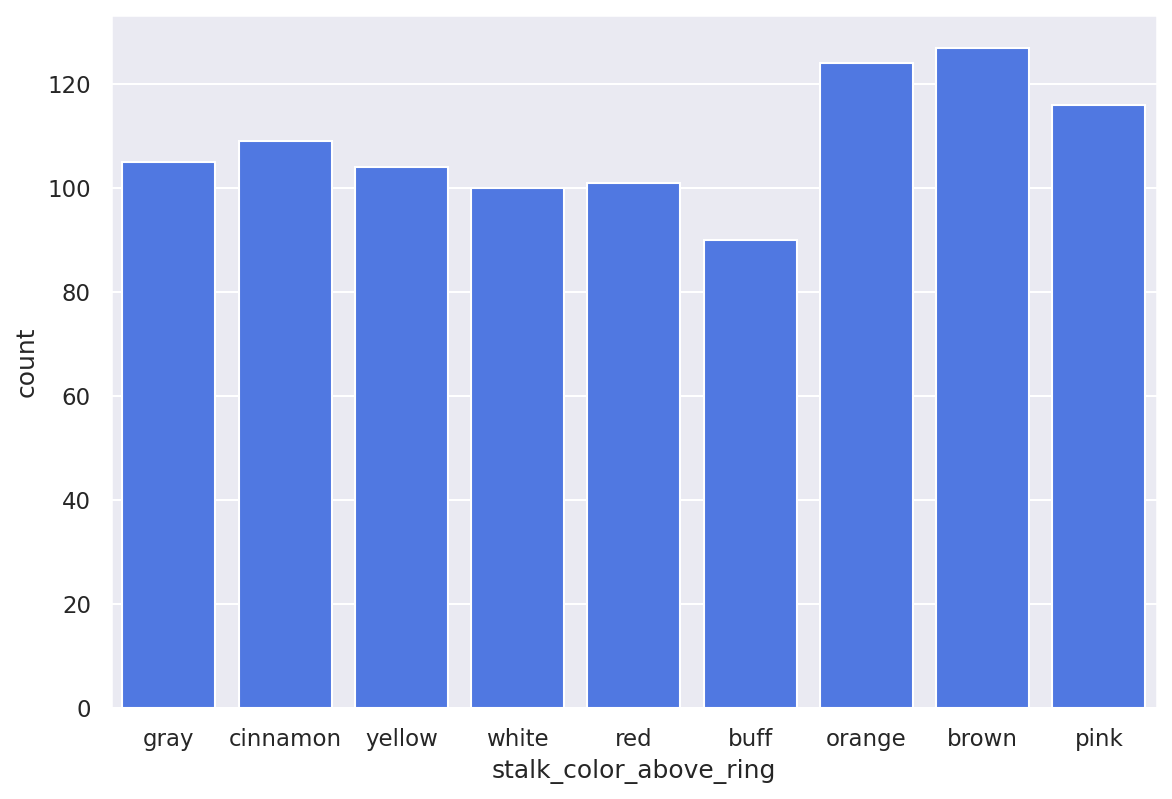

---------------------------------------------------------------------------------------------------


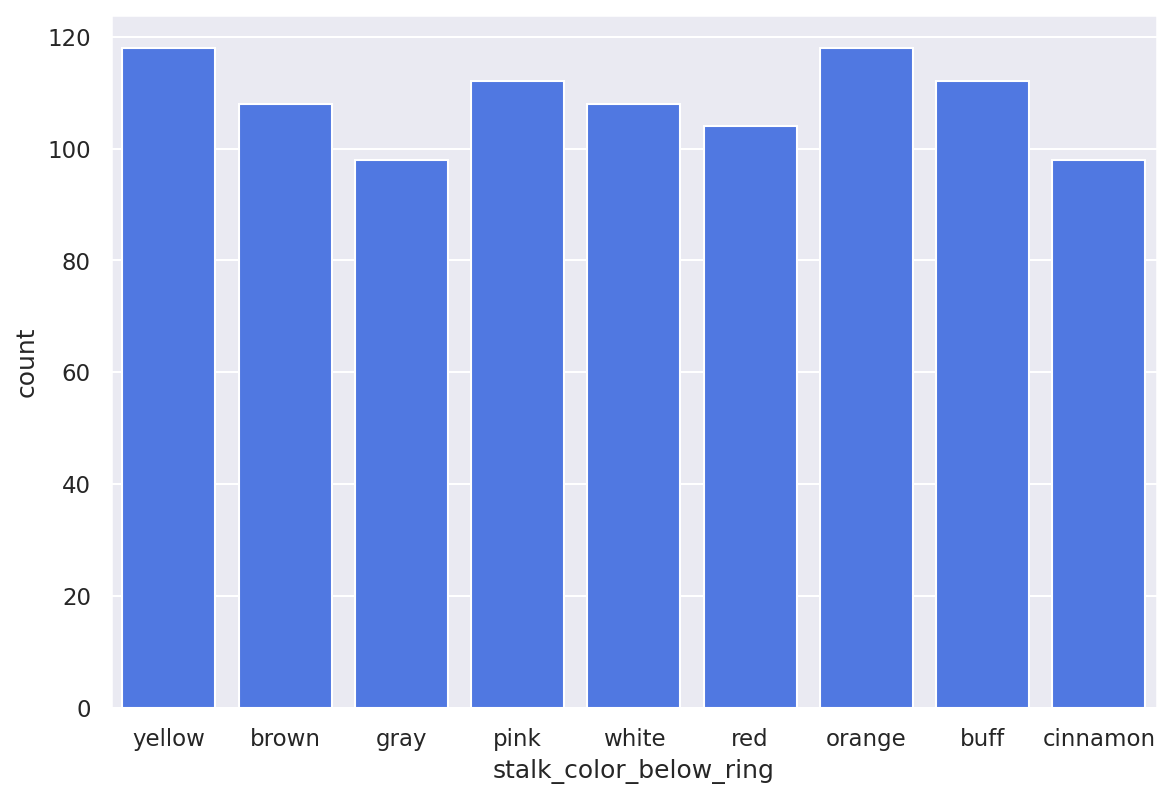

---------------------------------------------------------------------------------------------------


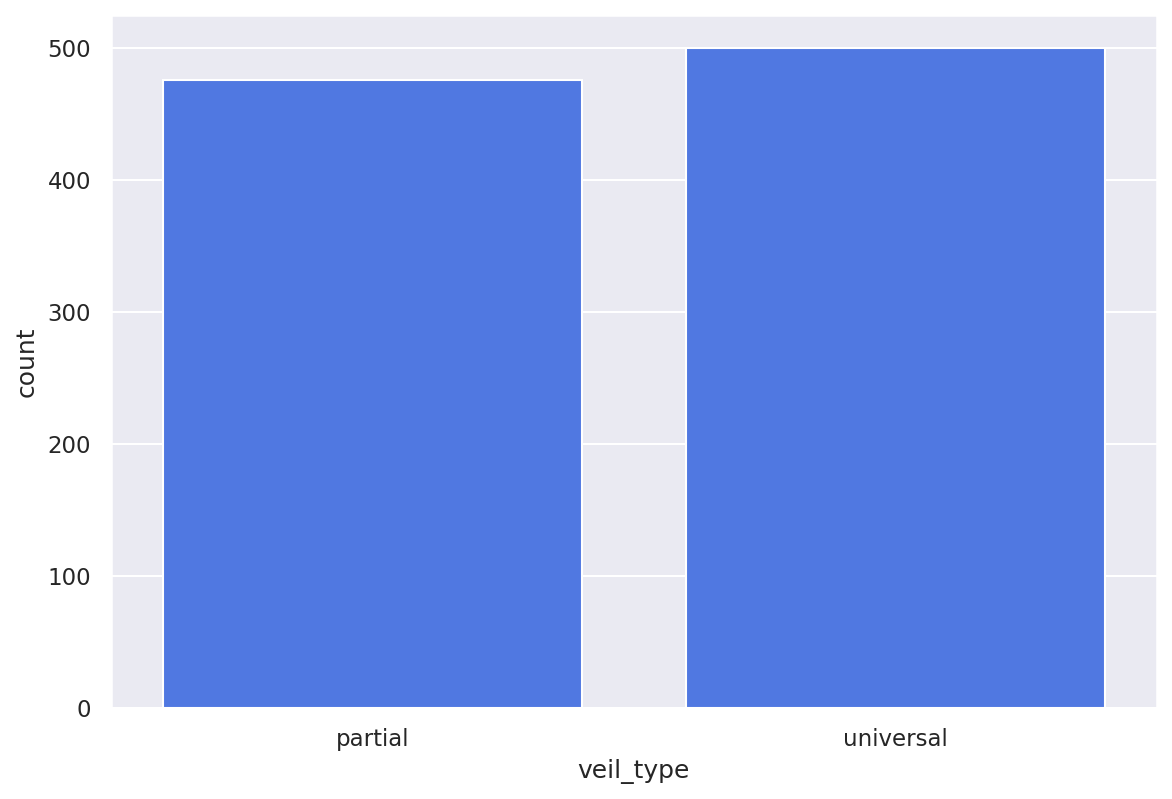

---------------------------------------------------------------------------------------------------


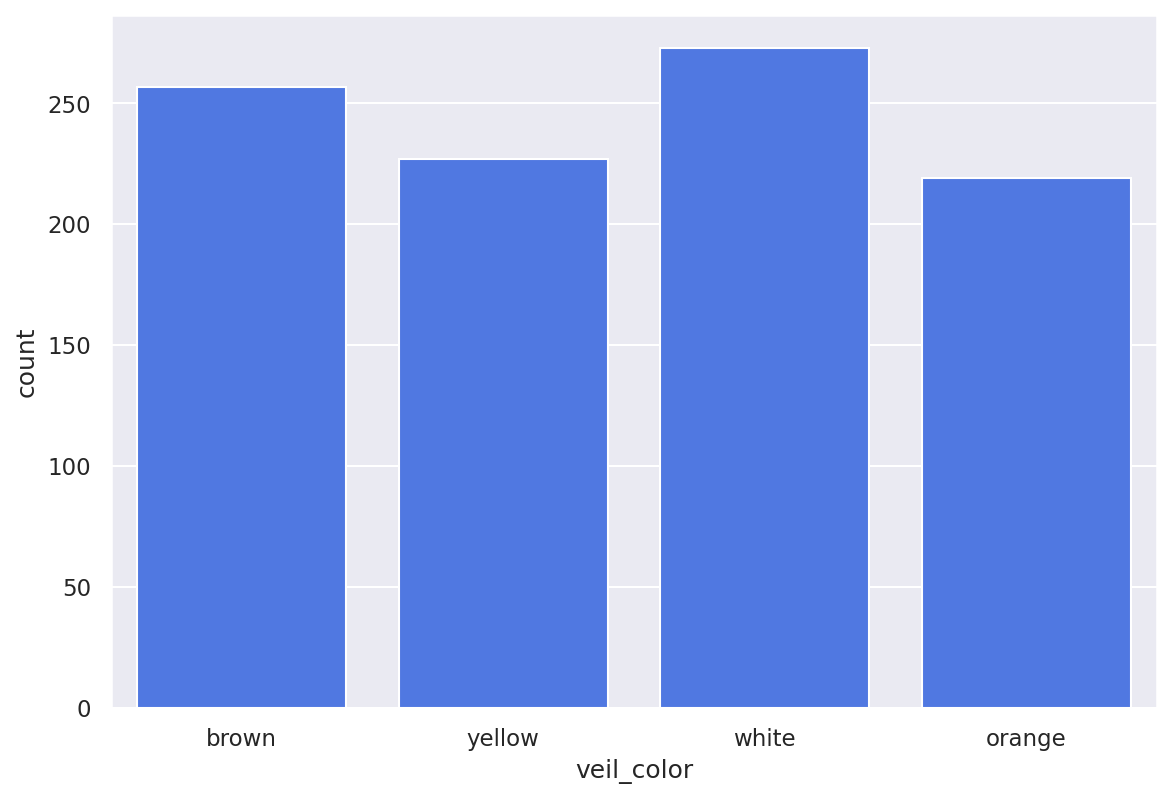

---------------------------------------------------------------------------------------------------


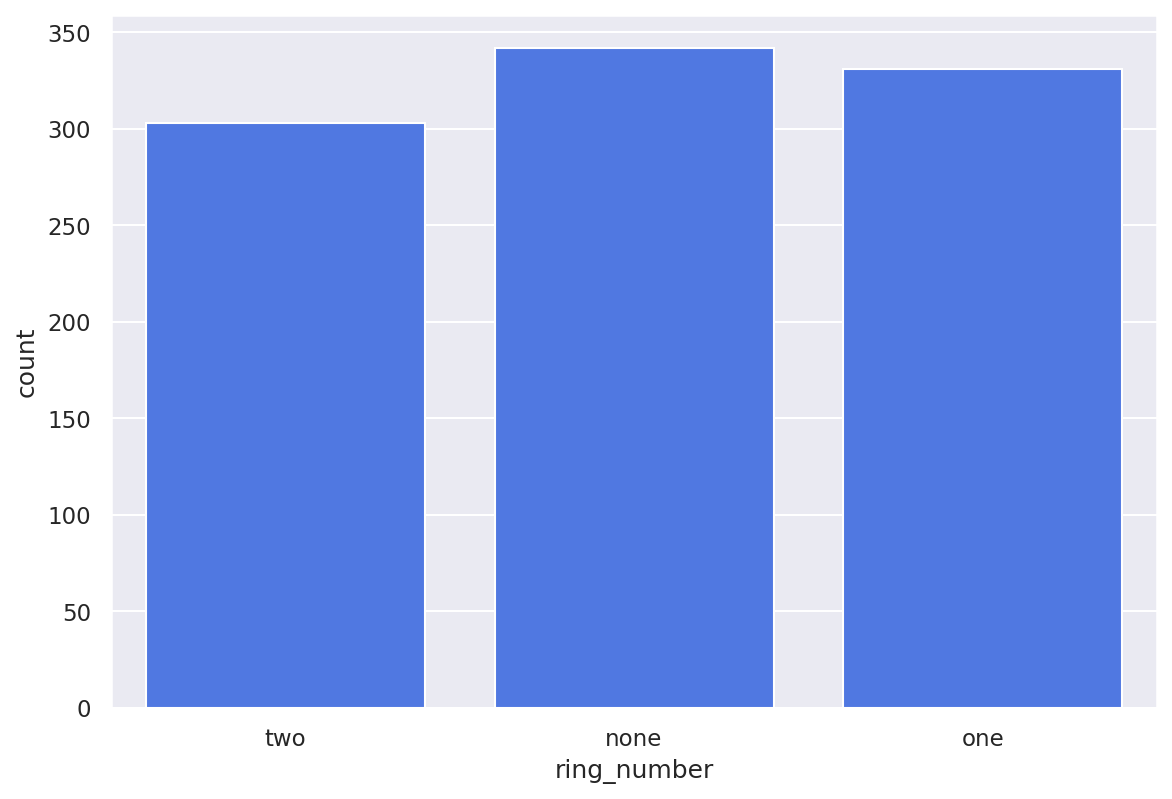

---------------------------------------------------------------------------------------------------


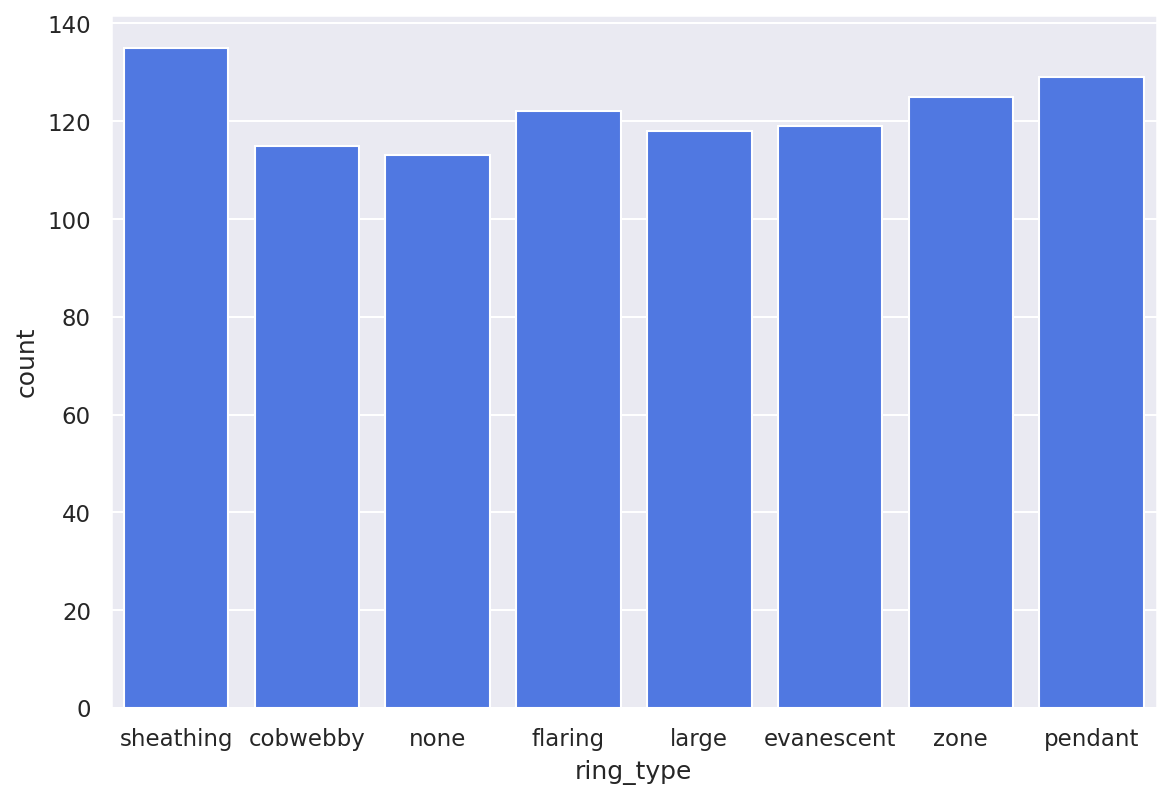

---------------------------------------------------------------------------------------------------


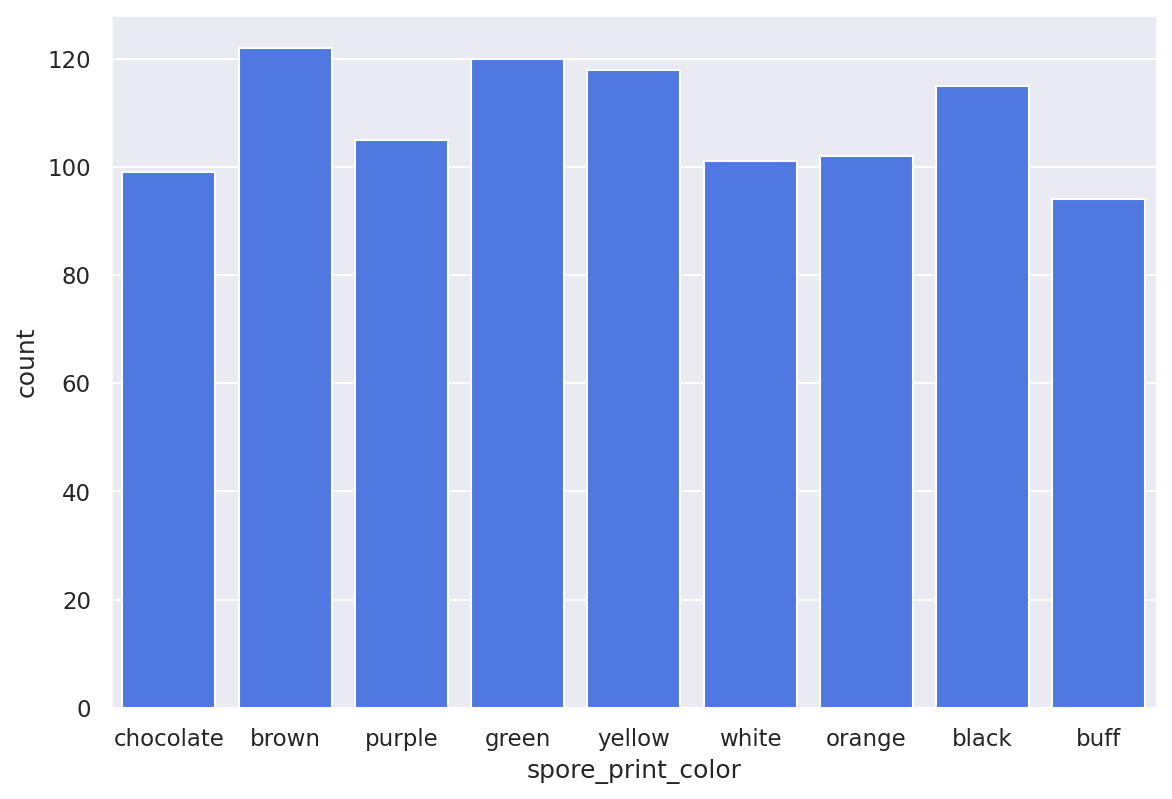

---------------------------------------------------------------------------------------------------


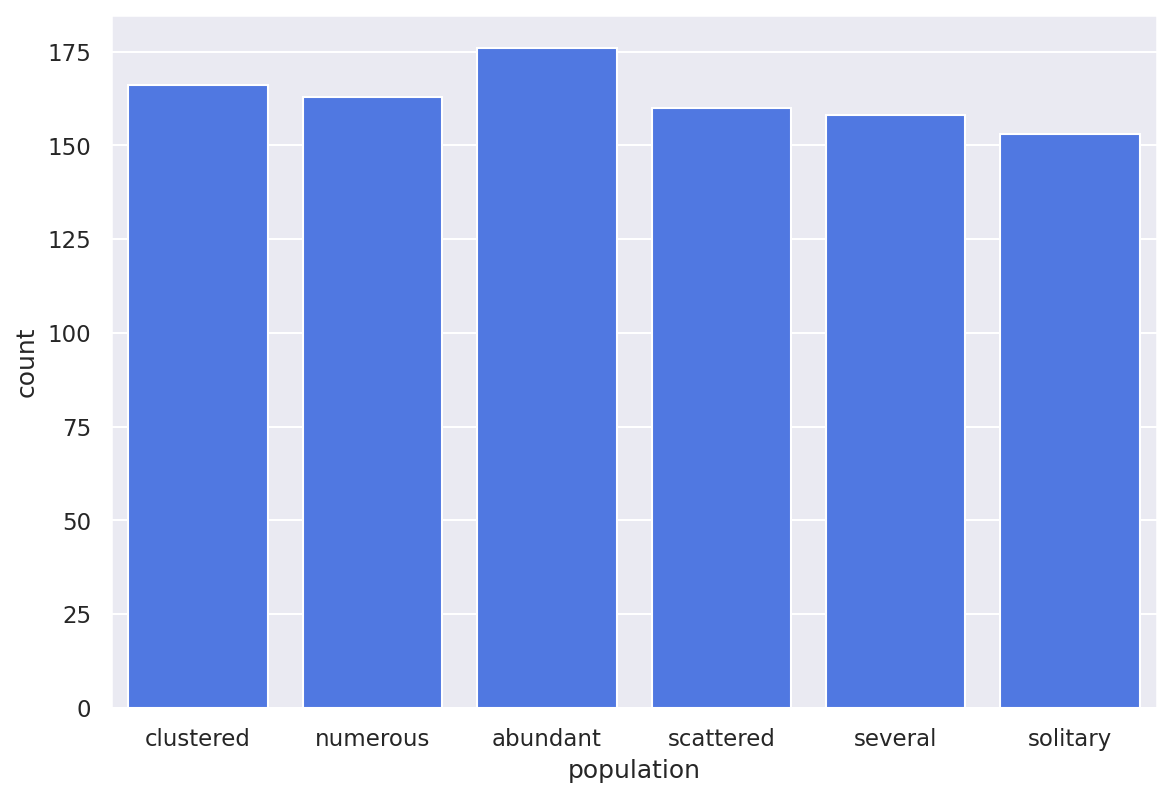

---------------------------------------------------------------------------------------------------


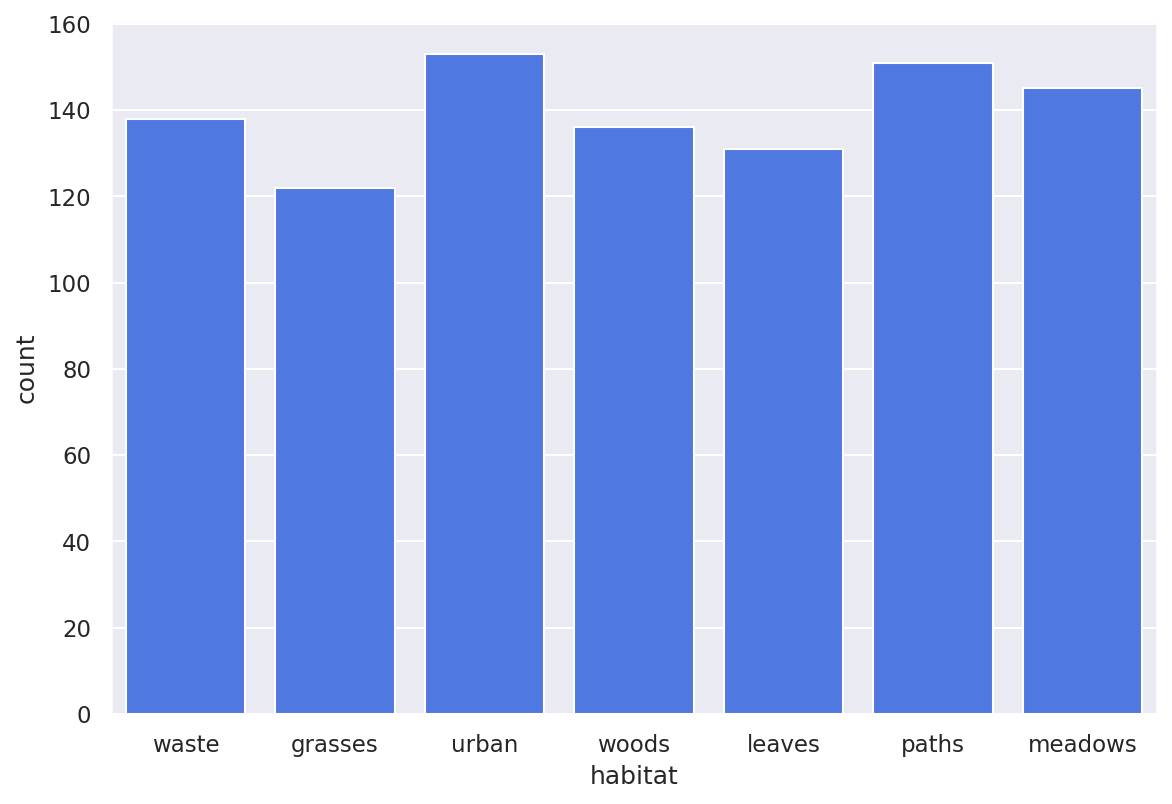

---------------------------------------------------------------------------------------------------


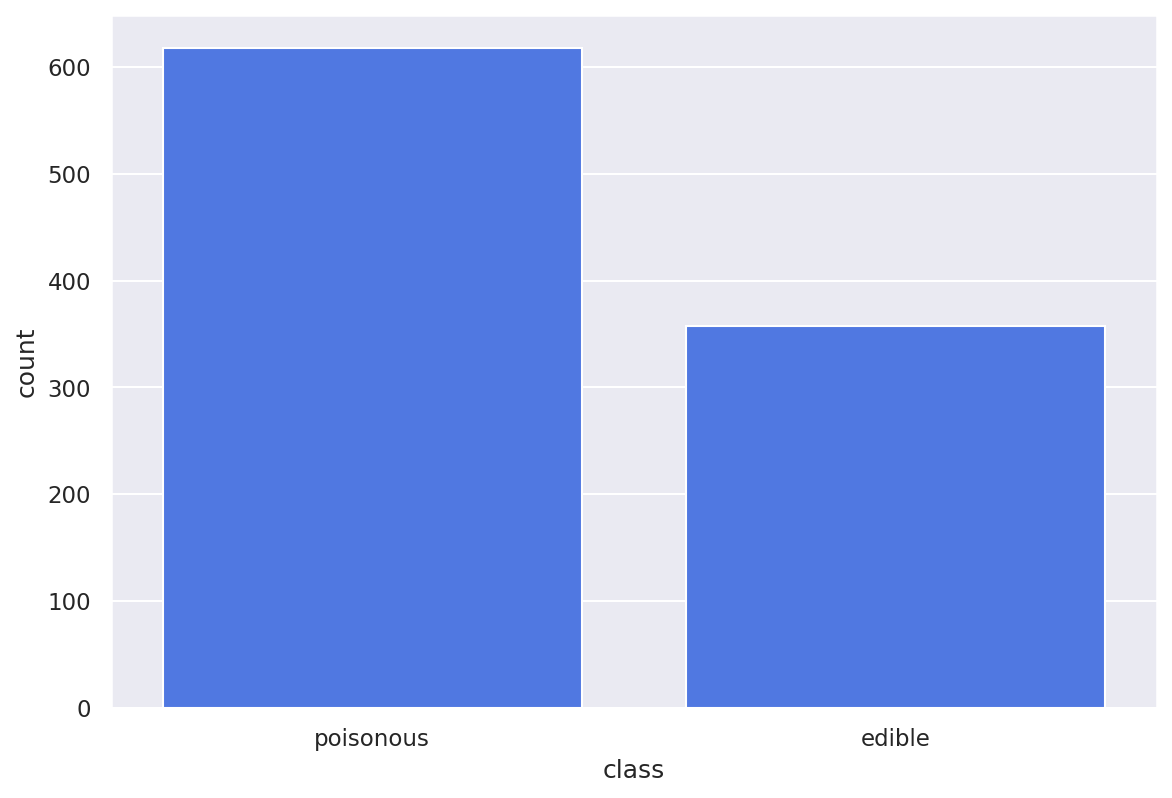

---------------------------------------------------------------------------------------------------


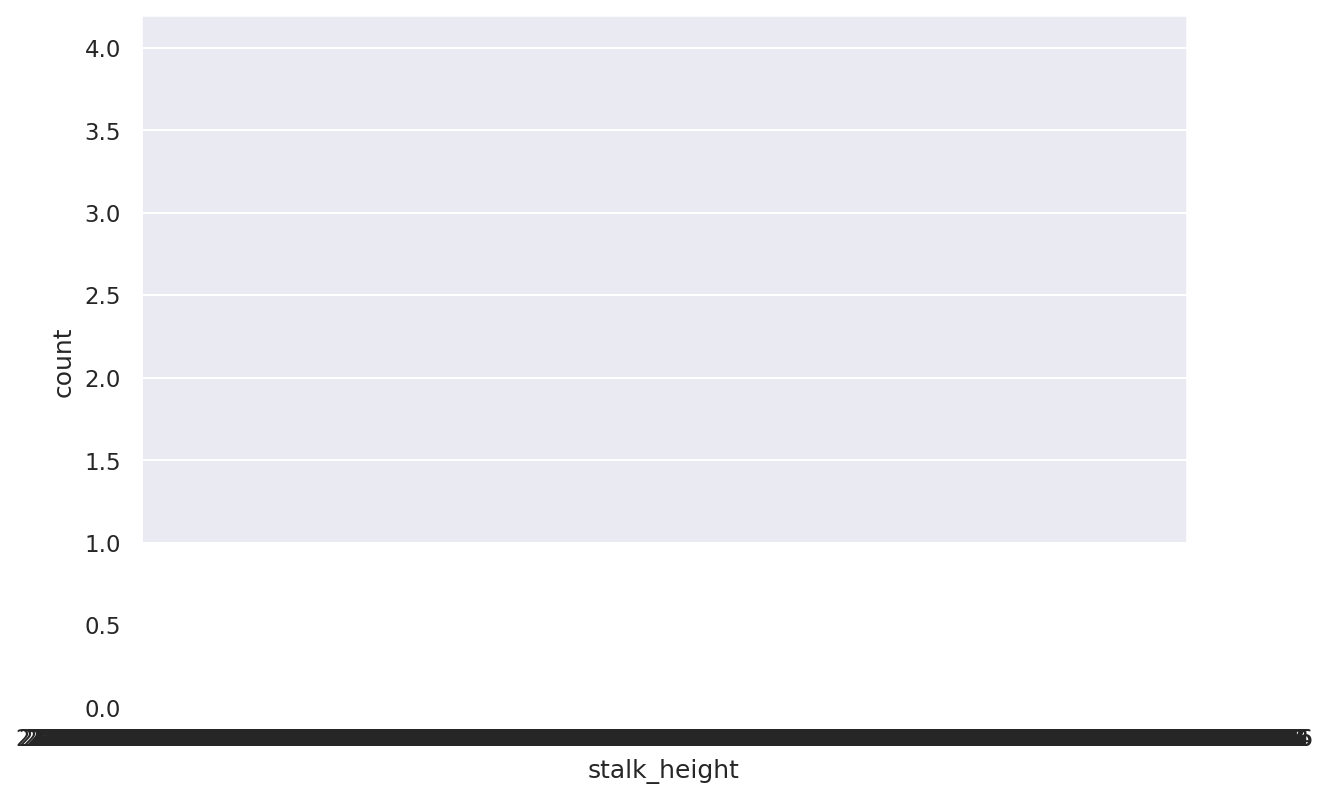

---------------------------------------------------------------------------------------------------


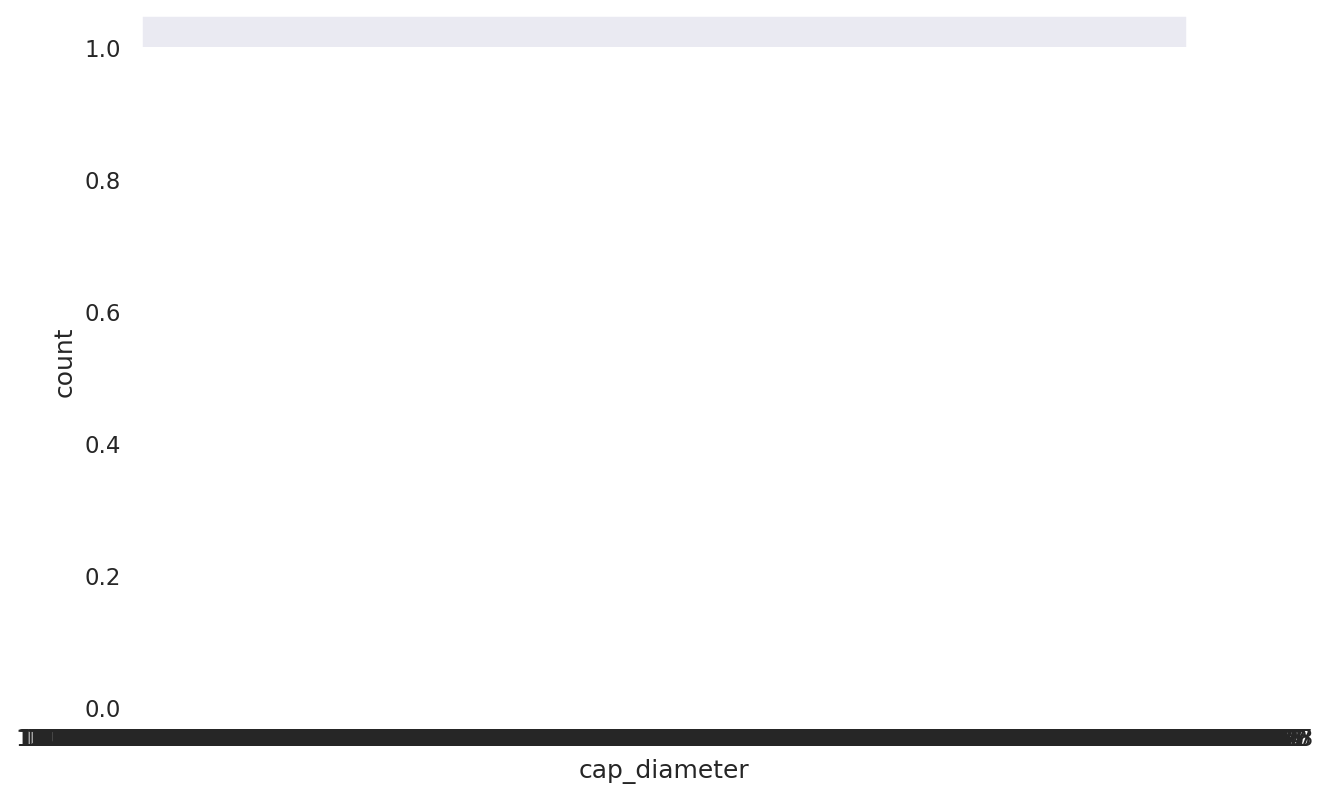

---------------------------------------------------------------------------------------------------


In [12]:
# @title BarPlot
for col in df.columns:
  sns.countplot(x=col, data=df)
  plt.show()
  print('---------------------------------------------------------------------------------------------------')

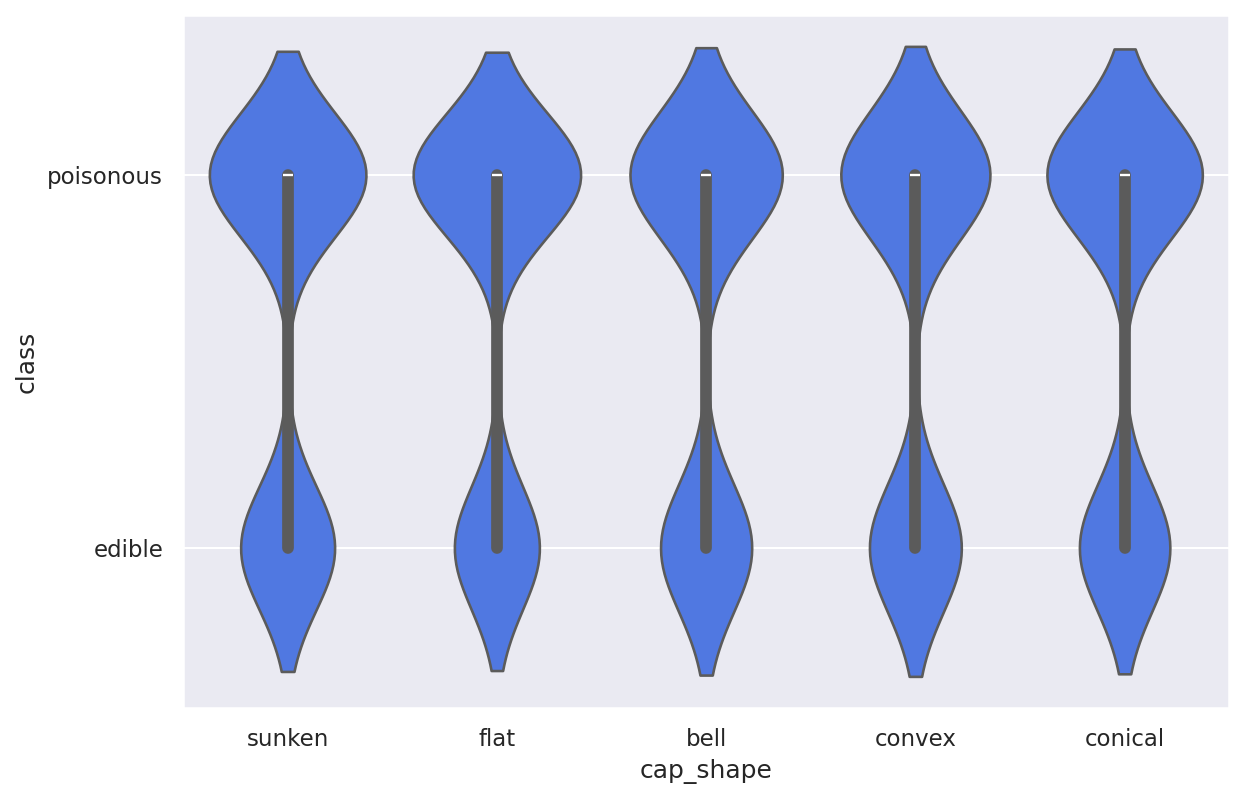

---------------------------------------------------------------------------------------------------


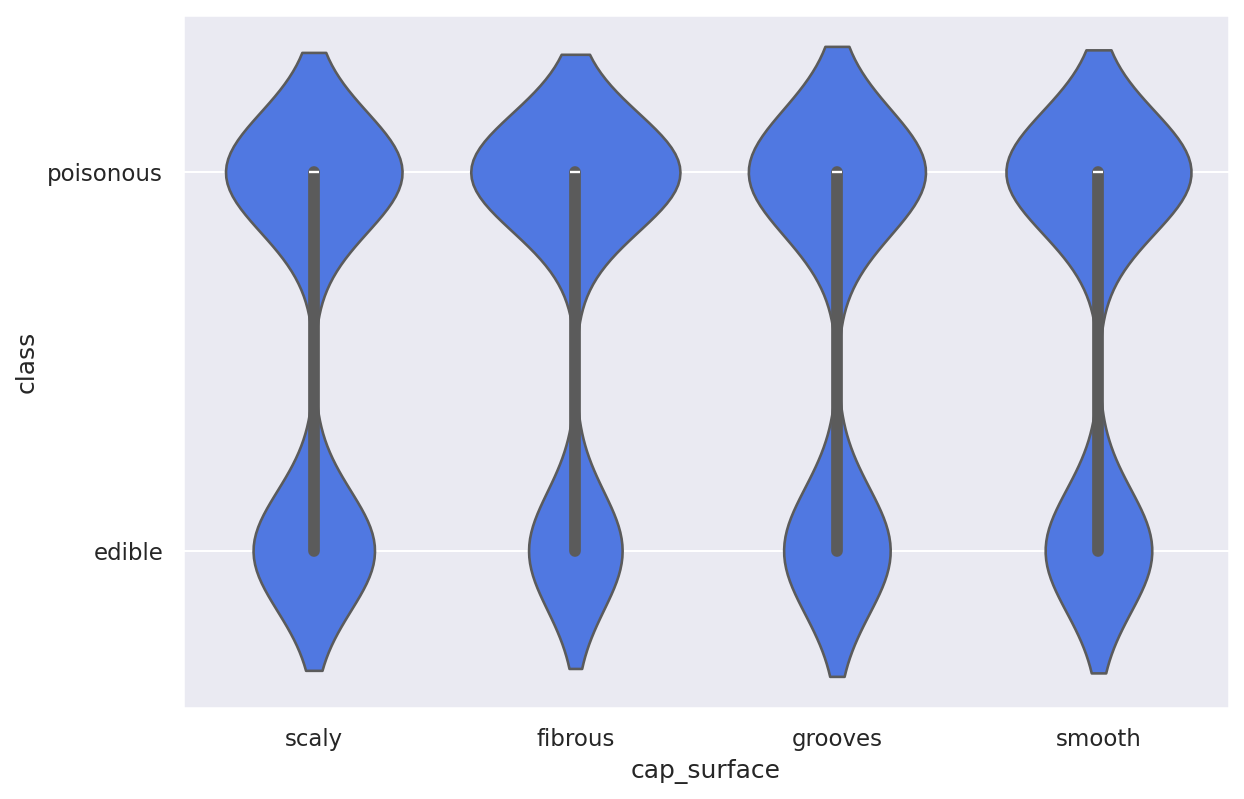

---------------------------------------------------------------------------------------------------


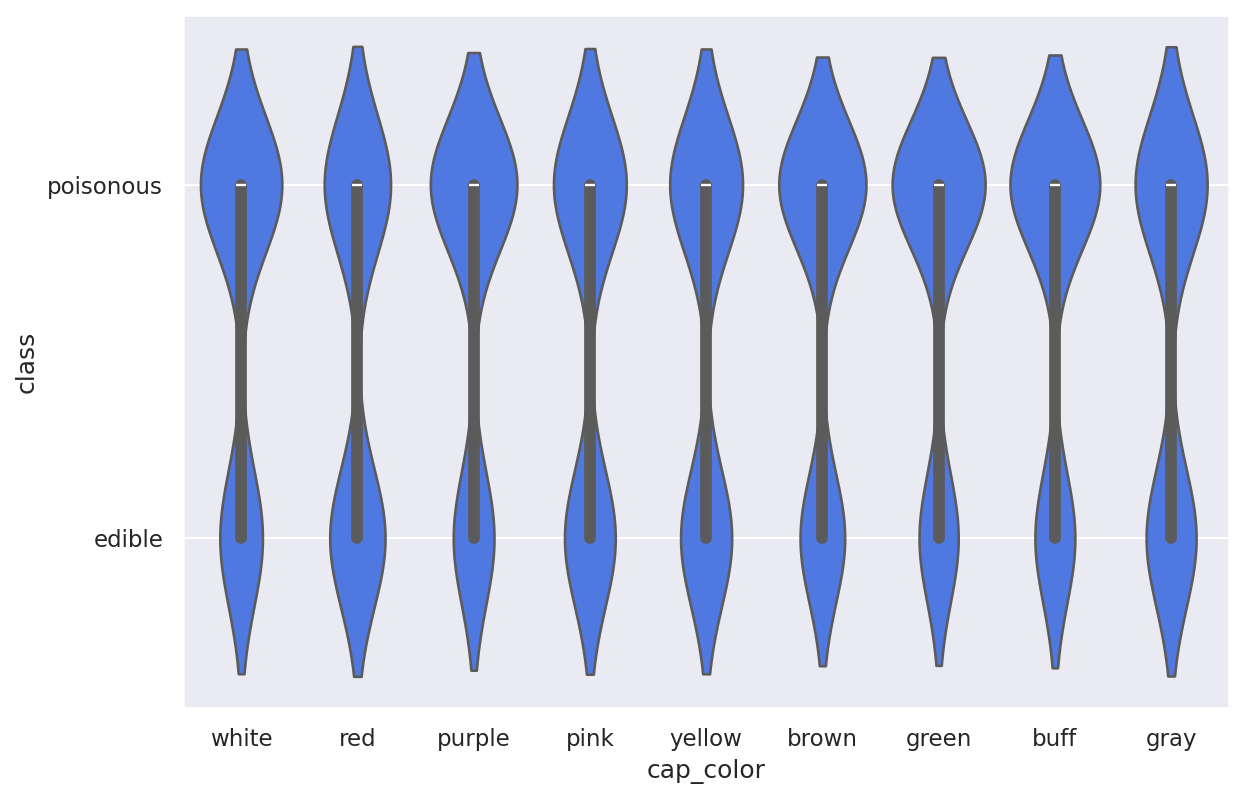

---------------------------------------------------------------------------------------------------


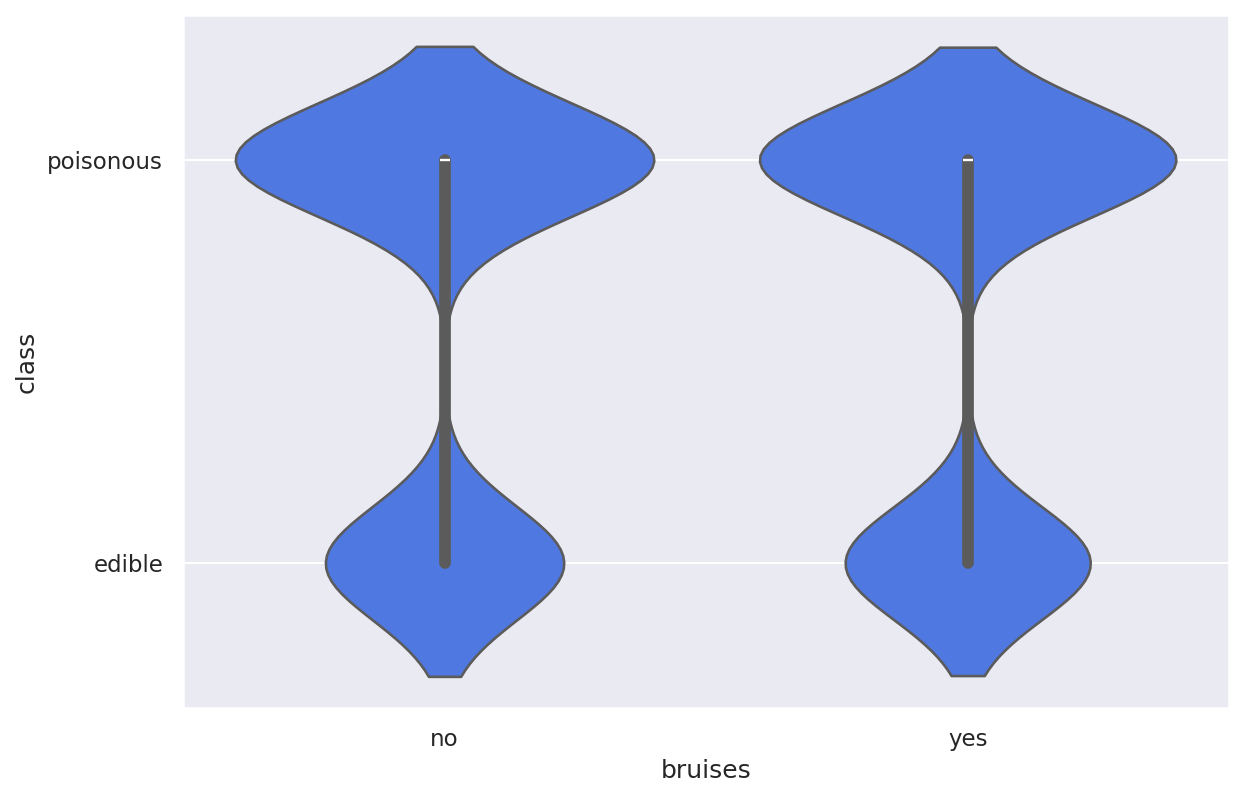

---------------------------------------------------------------------------------------------------


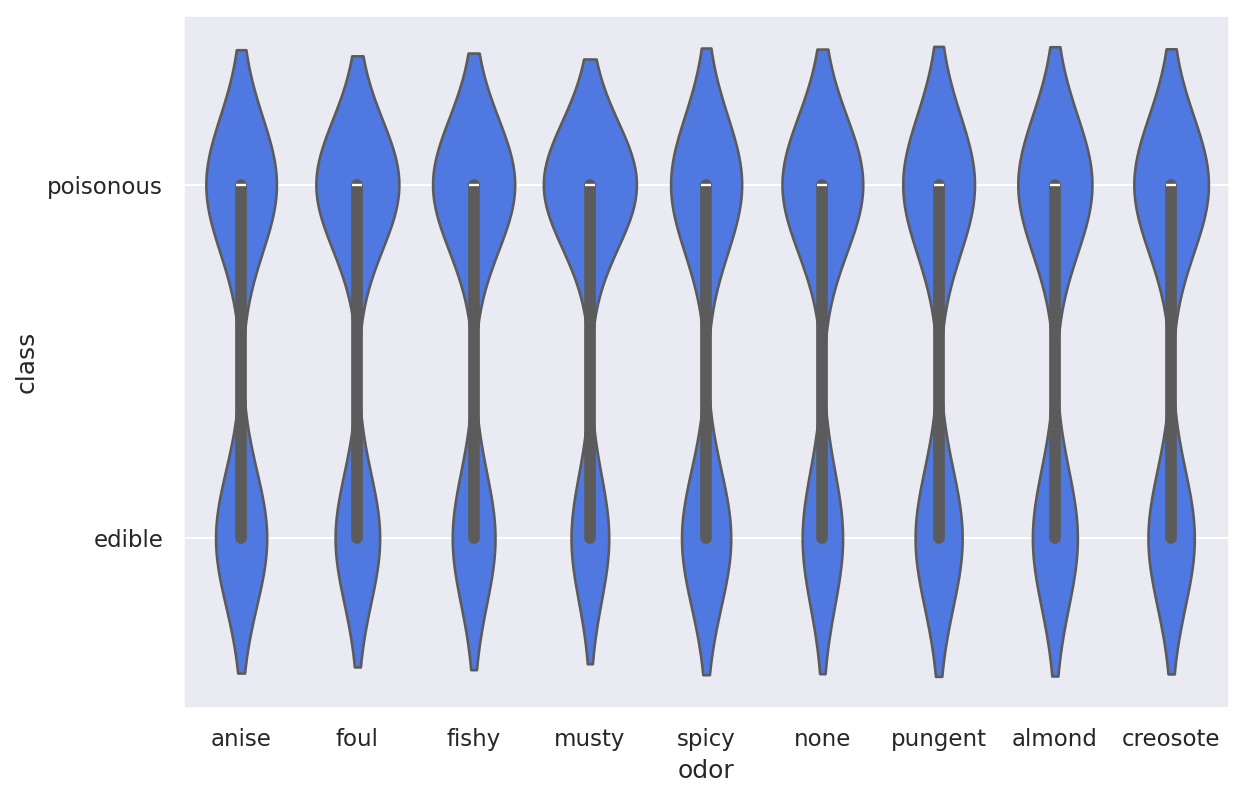

---------------------------------------------------------------------------------------------------


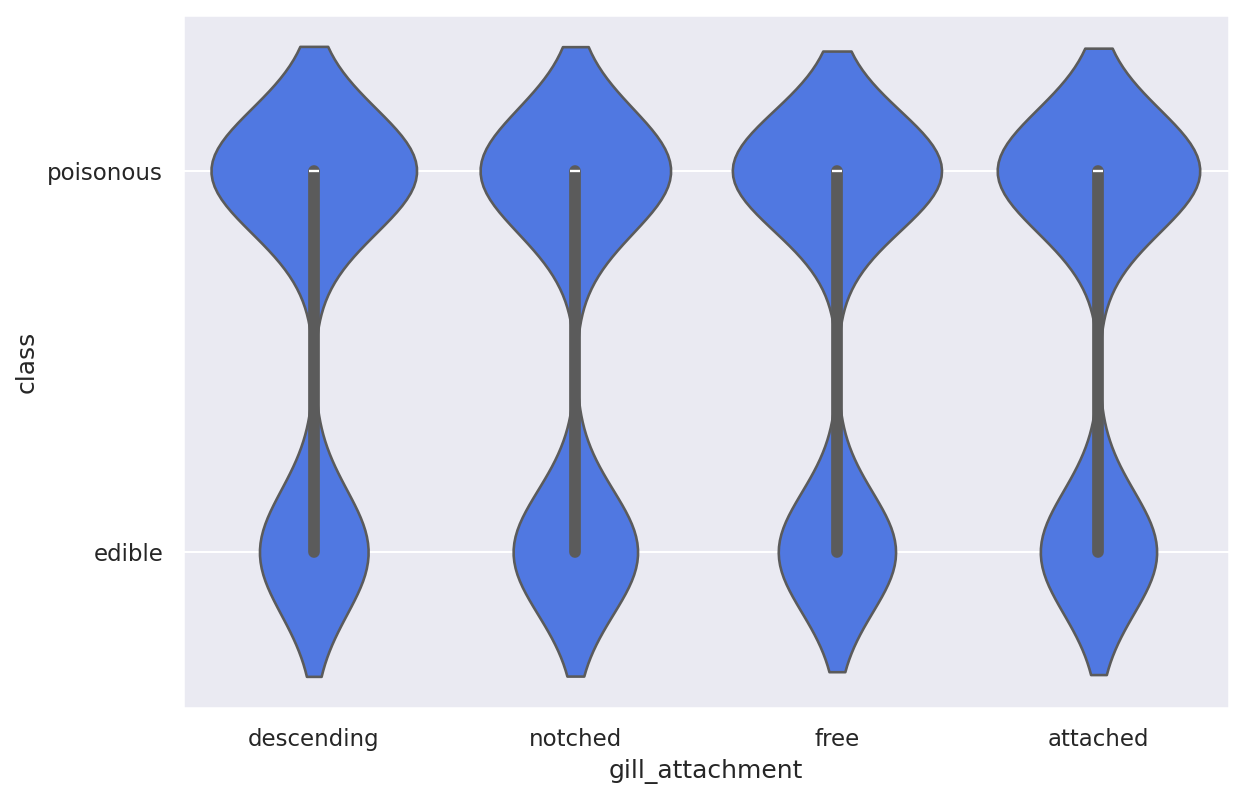

---------------------------------------------------------------------------------------------------


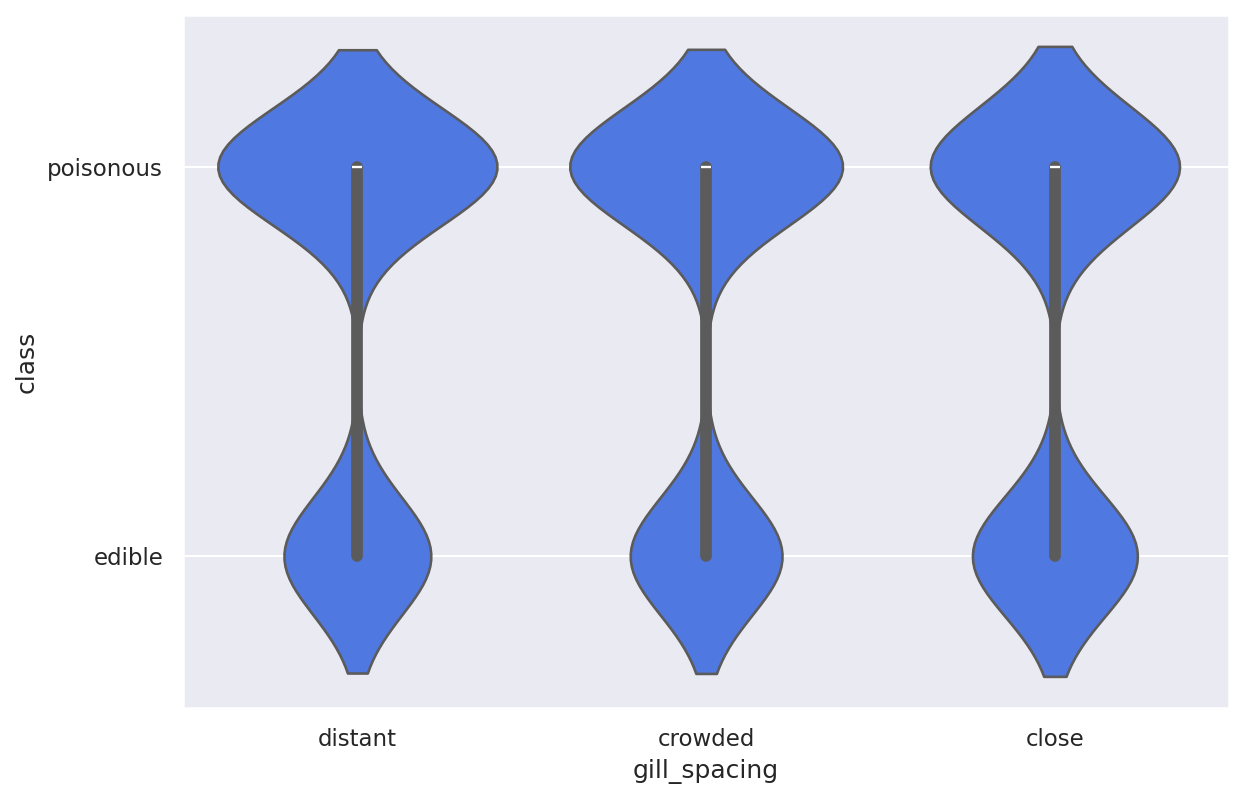

---------------------------------------------------------------------------------------------------


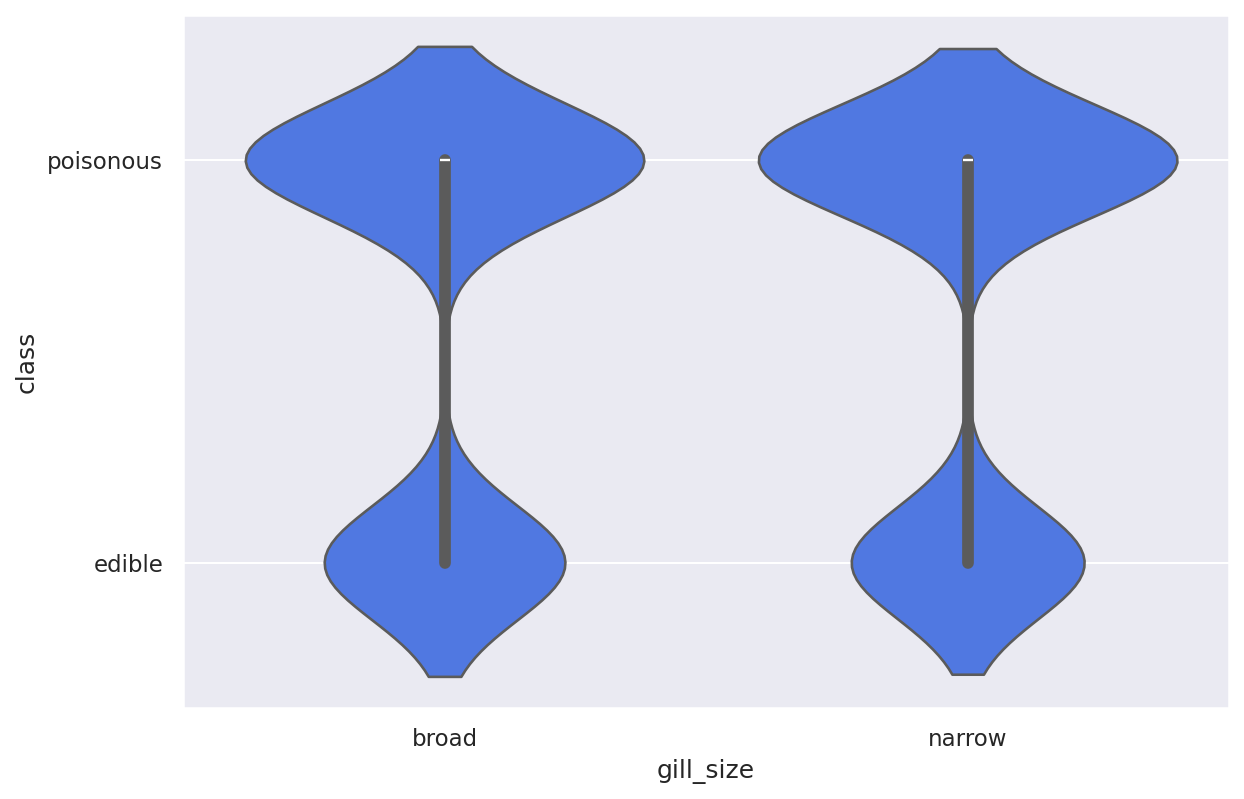

---------------------------------------------------------------------------------------------------


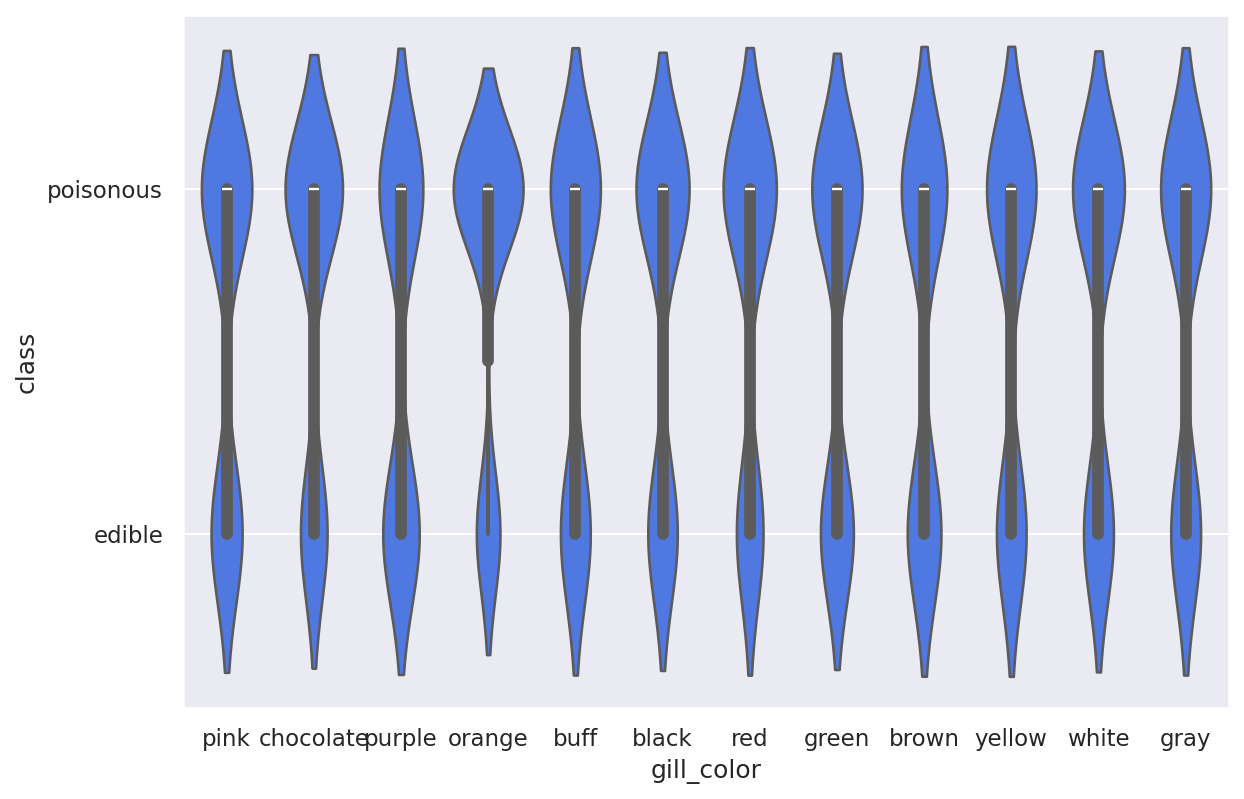

---------------------------------------------------------------------------------------------------


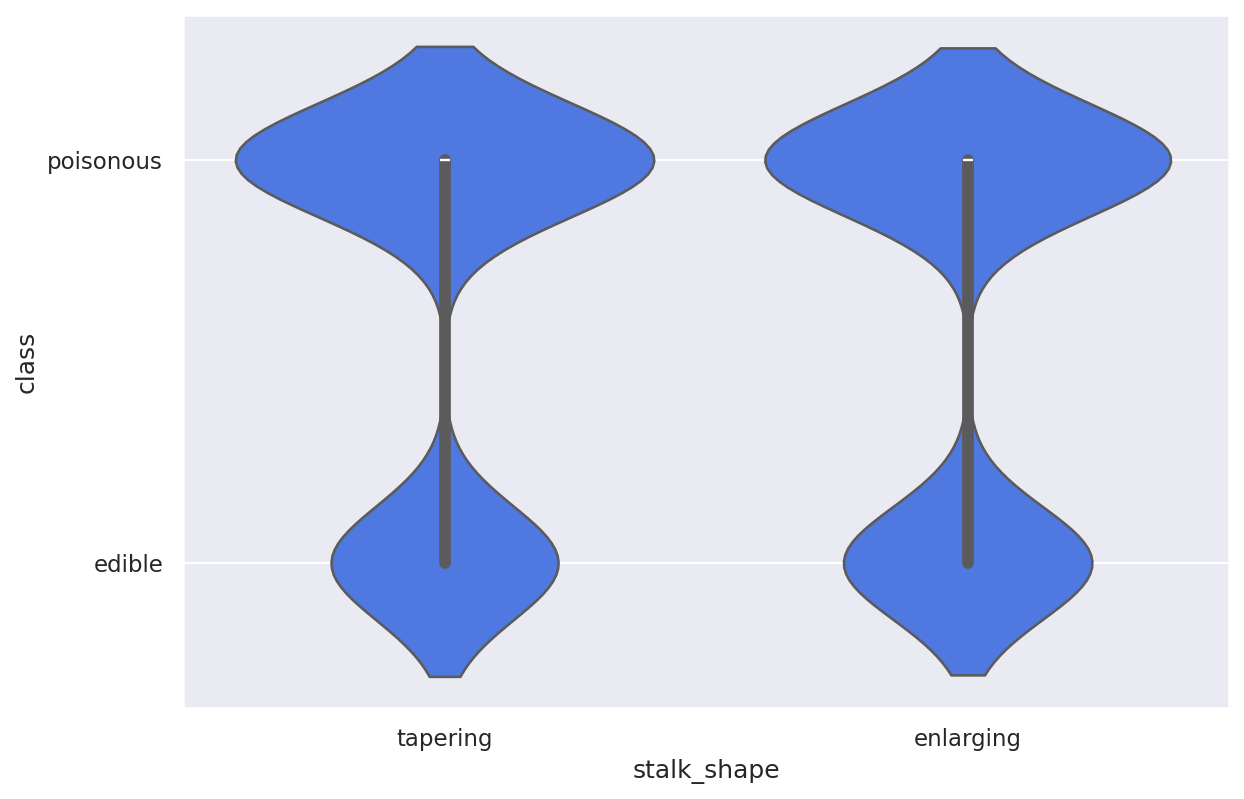

---------------------------------------------------------------------------------------------------


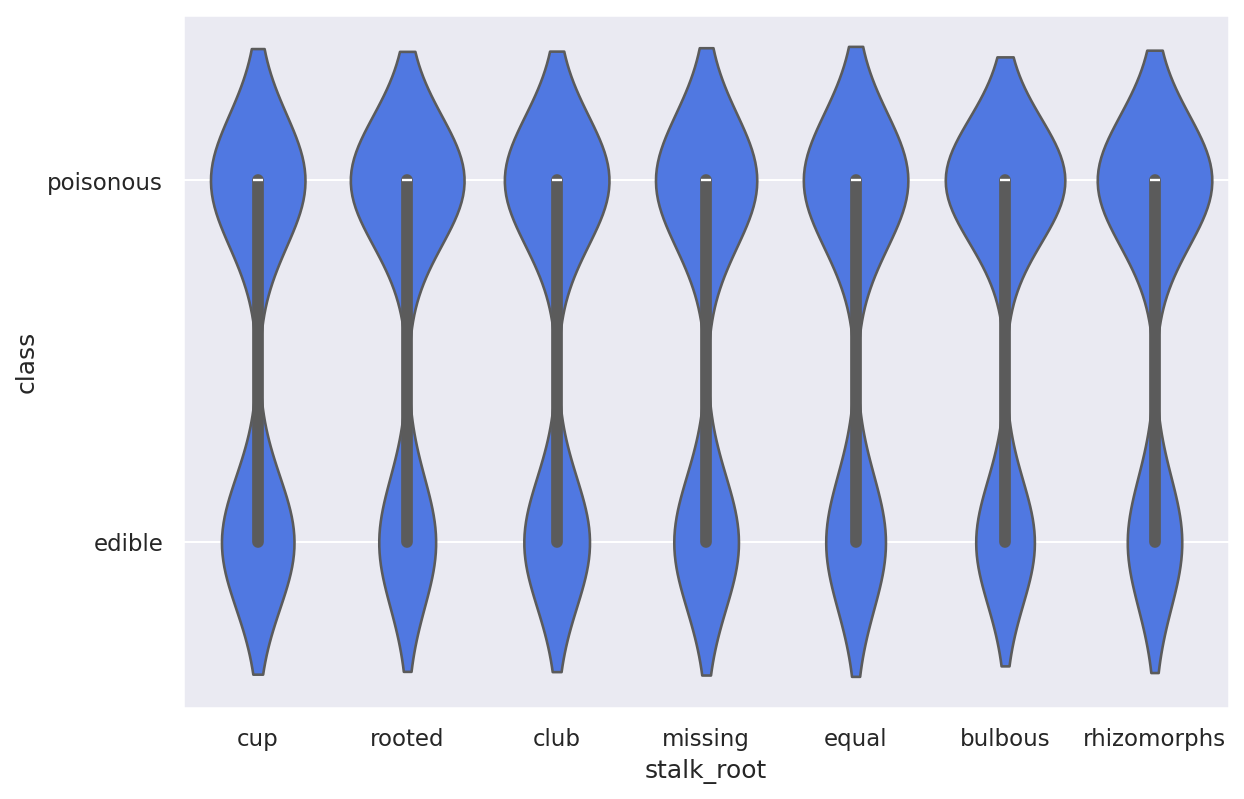

---------------------------------------------------------------------------------------------------


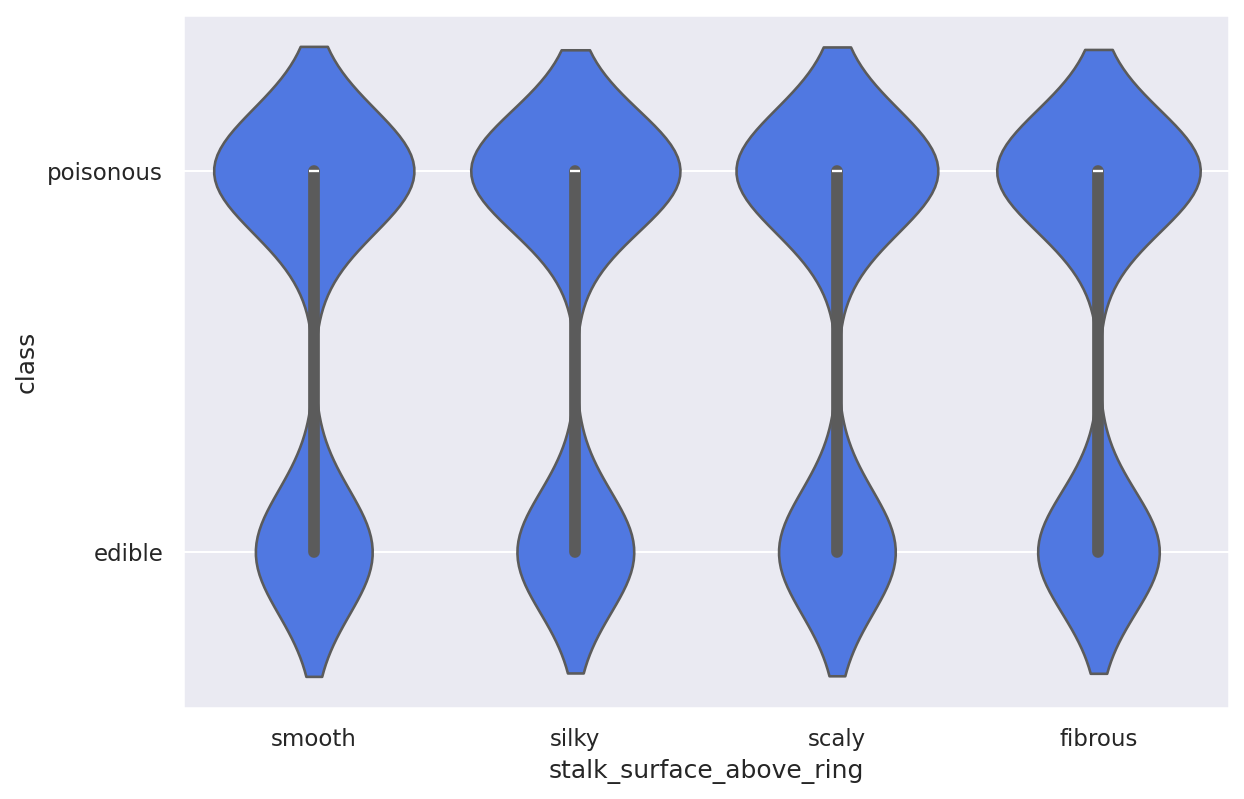

---------------------------------------------------------------------------------------------------


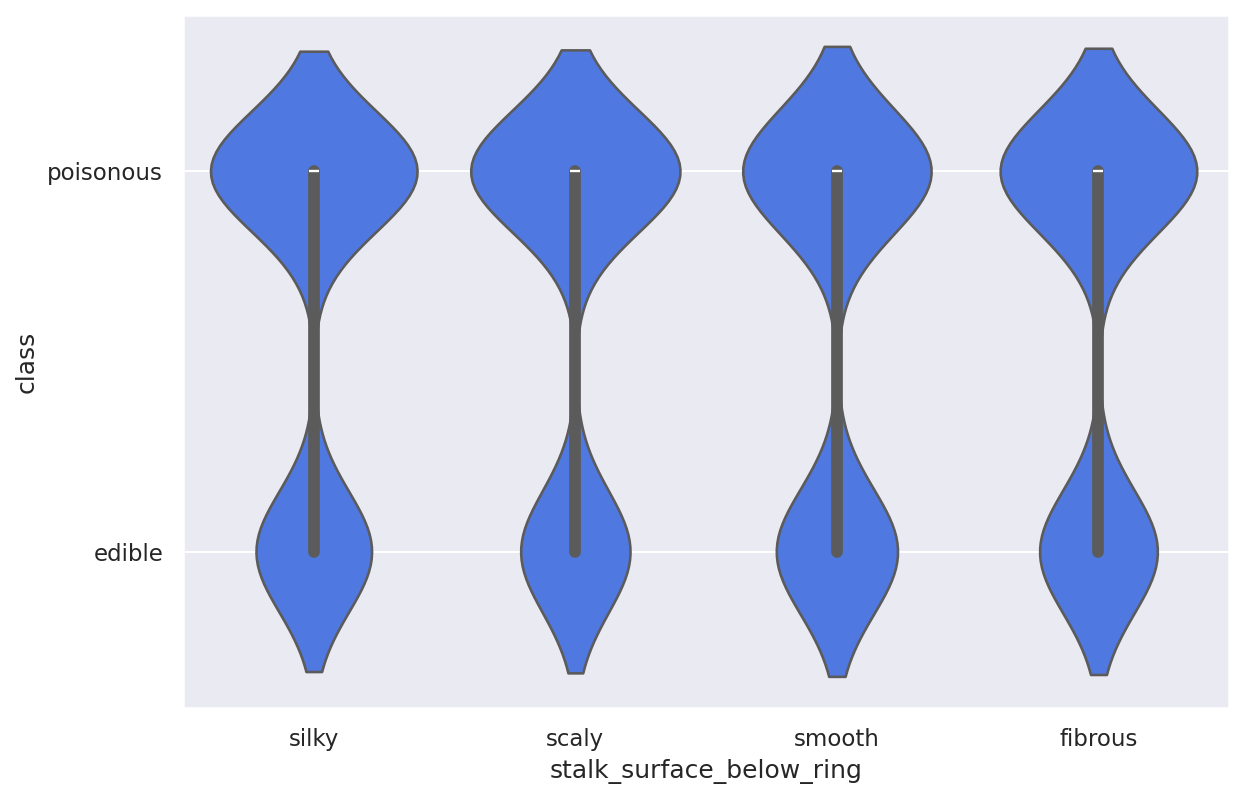

---------------------------------------------------------------------------------------------------


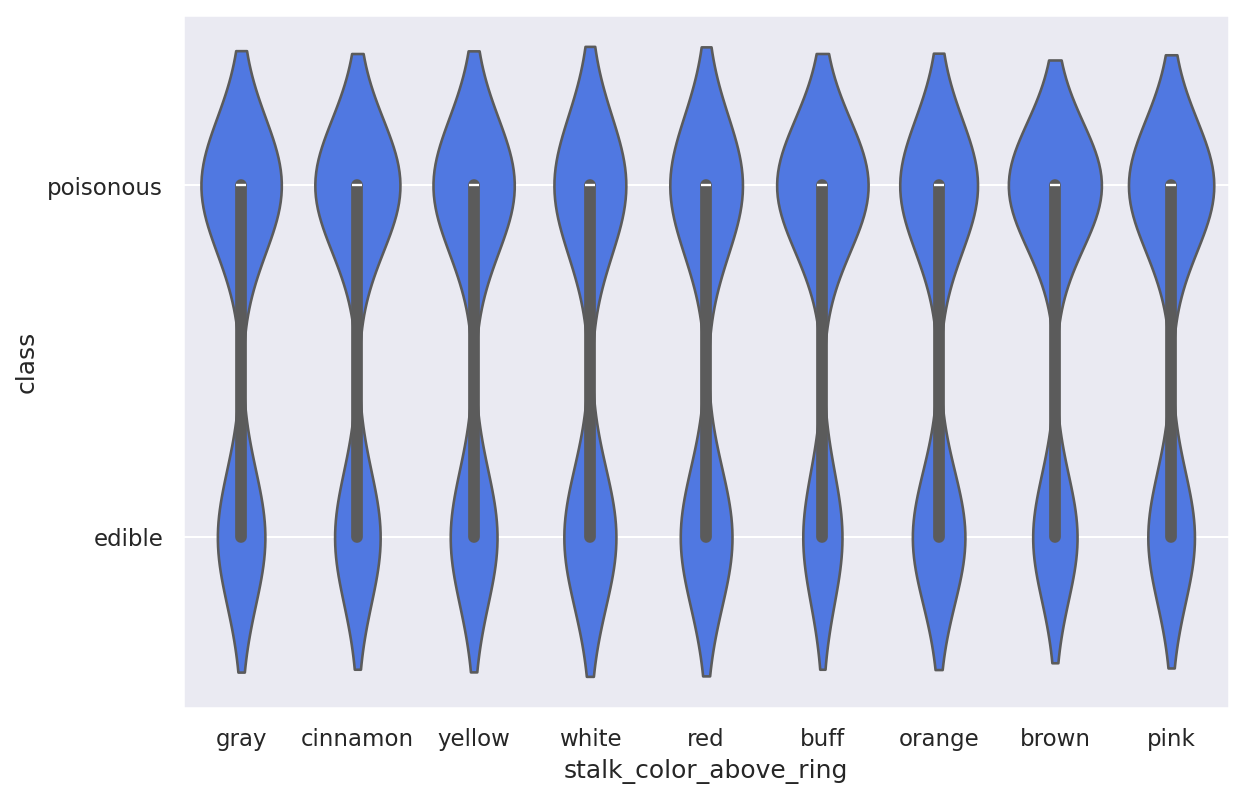

---------------------------------------------------------------------------------------------------


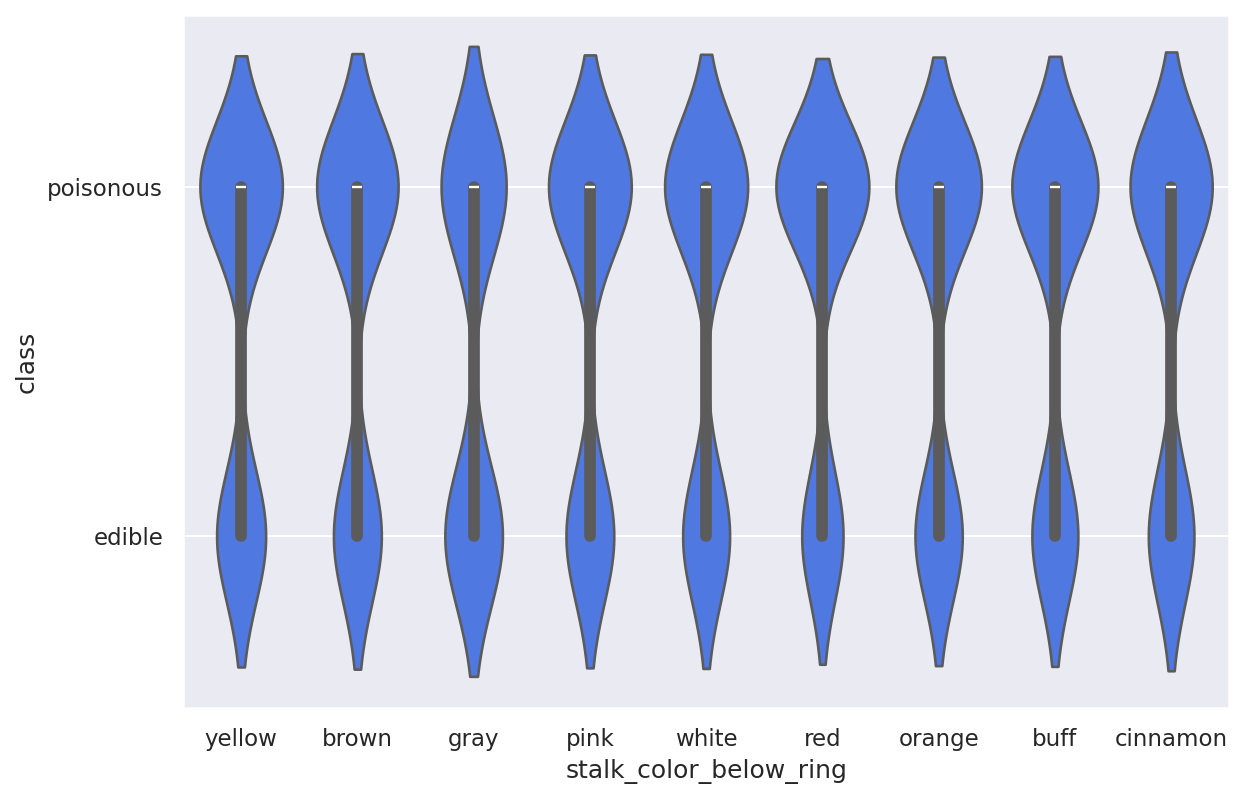

---------------------------------------------------------------------------------------------------


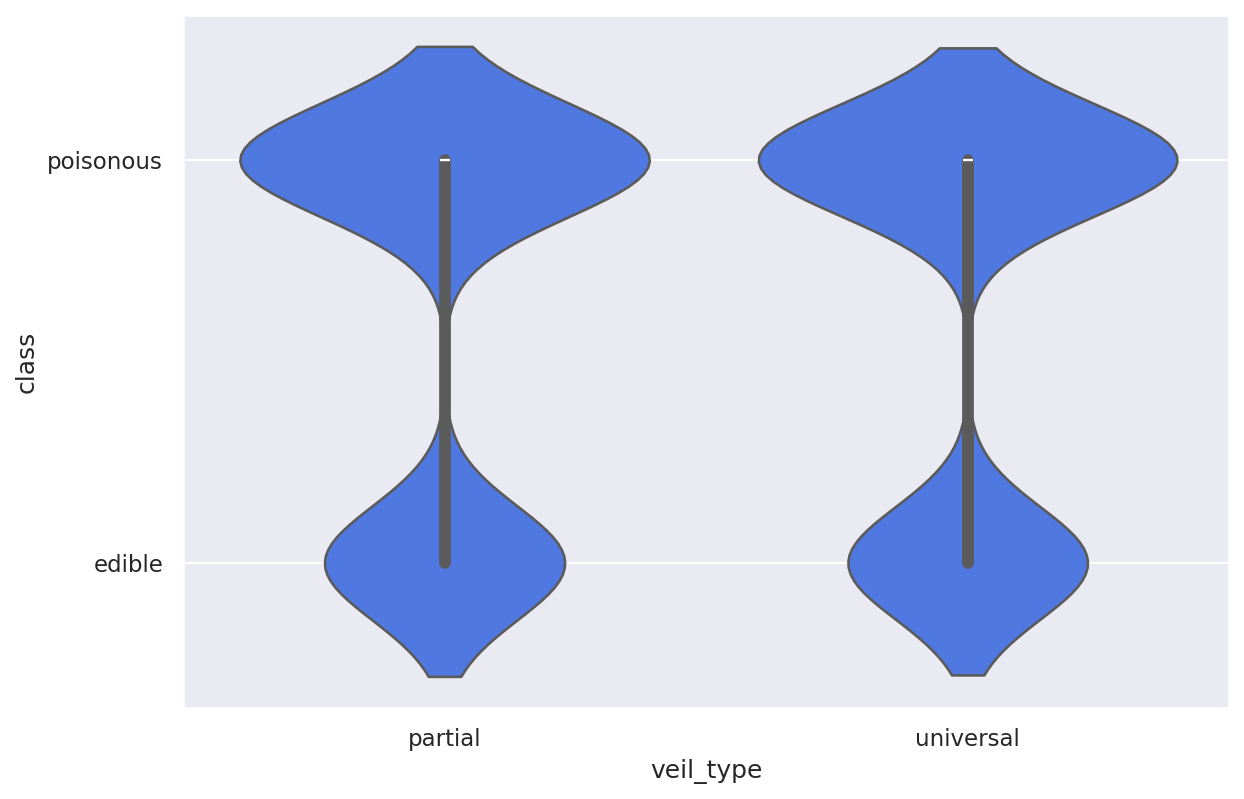

---------------------------------------------------------------------------------------------------


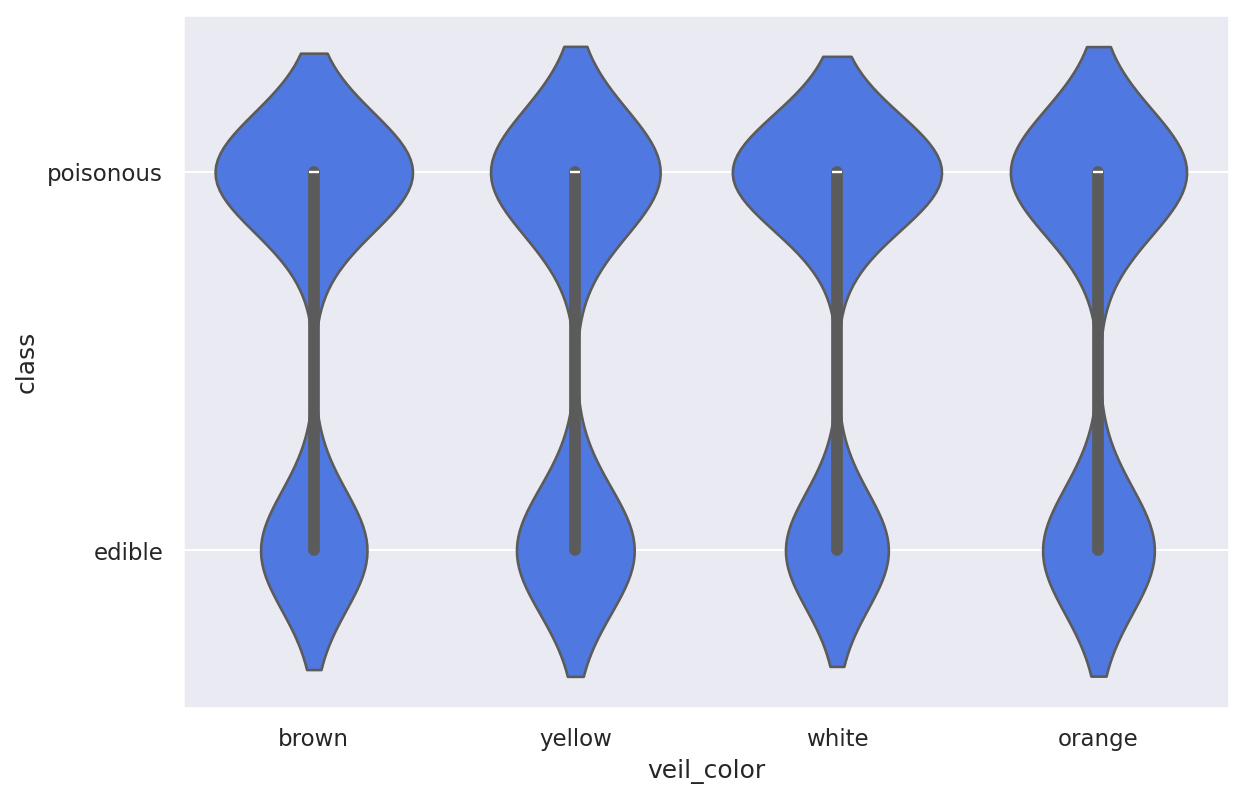

---------------------------------------------------------------------------------------------------


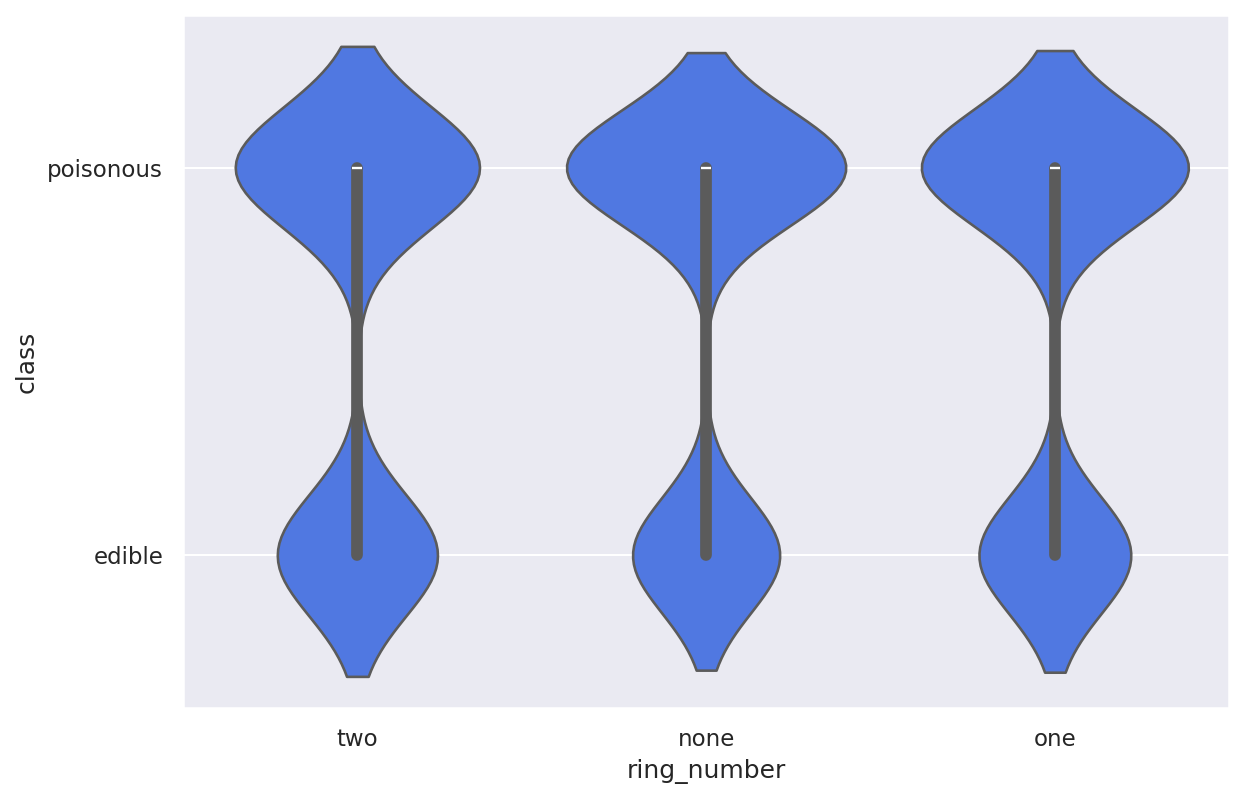

---------------------------------------------------------------------------------------------------


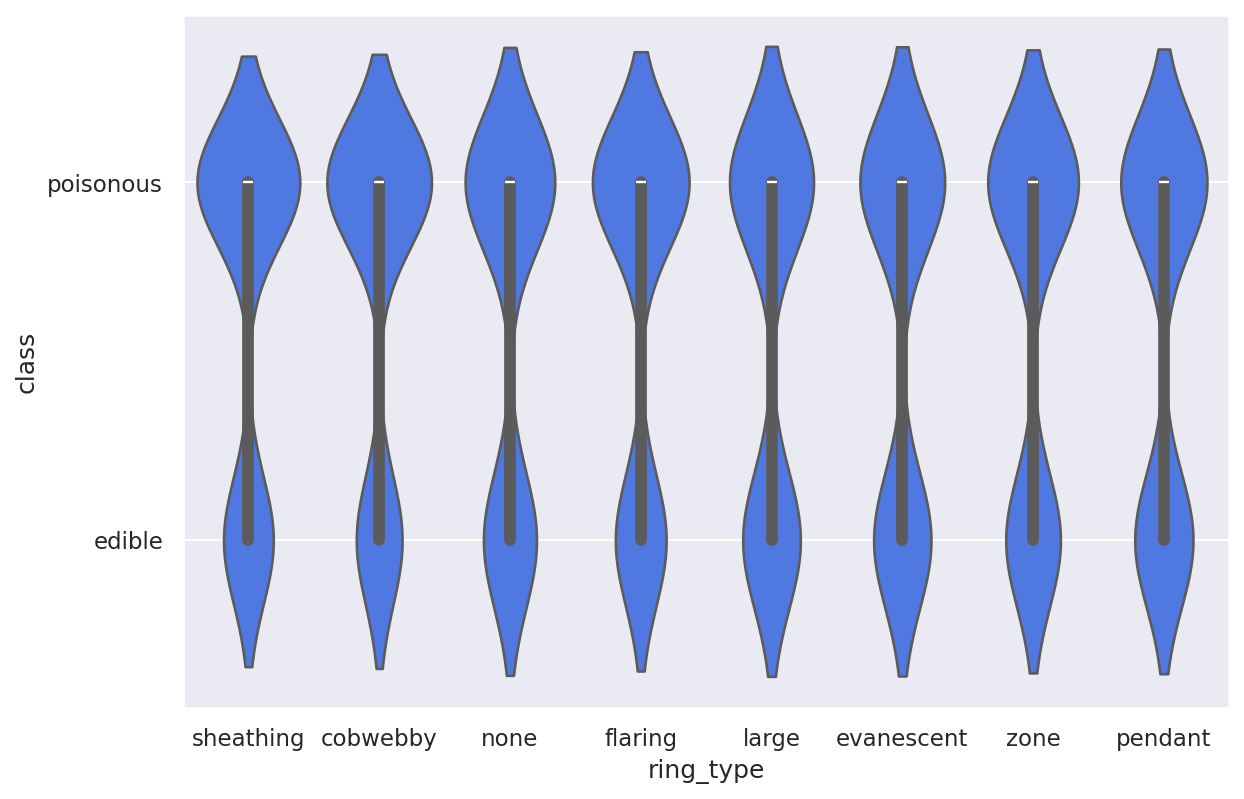

---------------------------------------------------------------------------------------------------


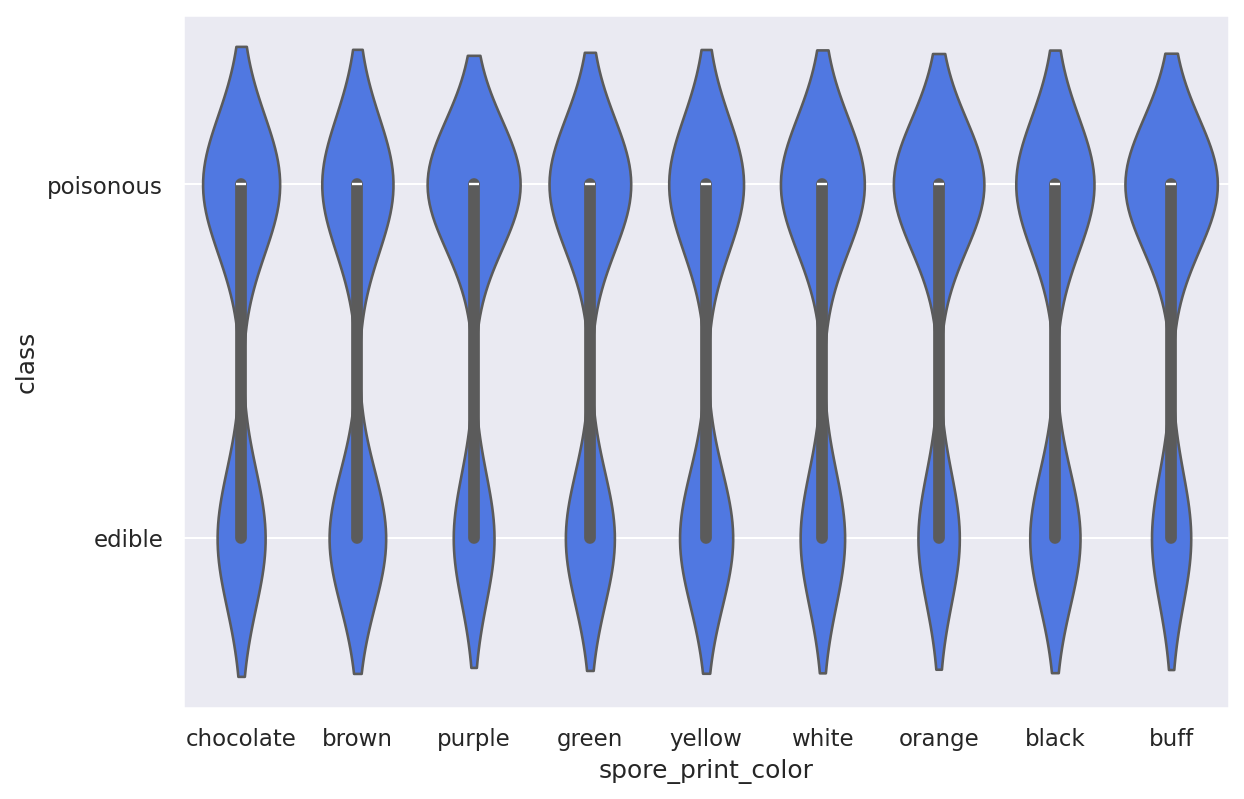

---------------------------------------------------------------------------------------------------


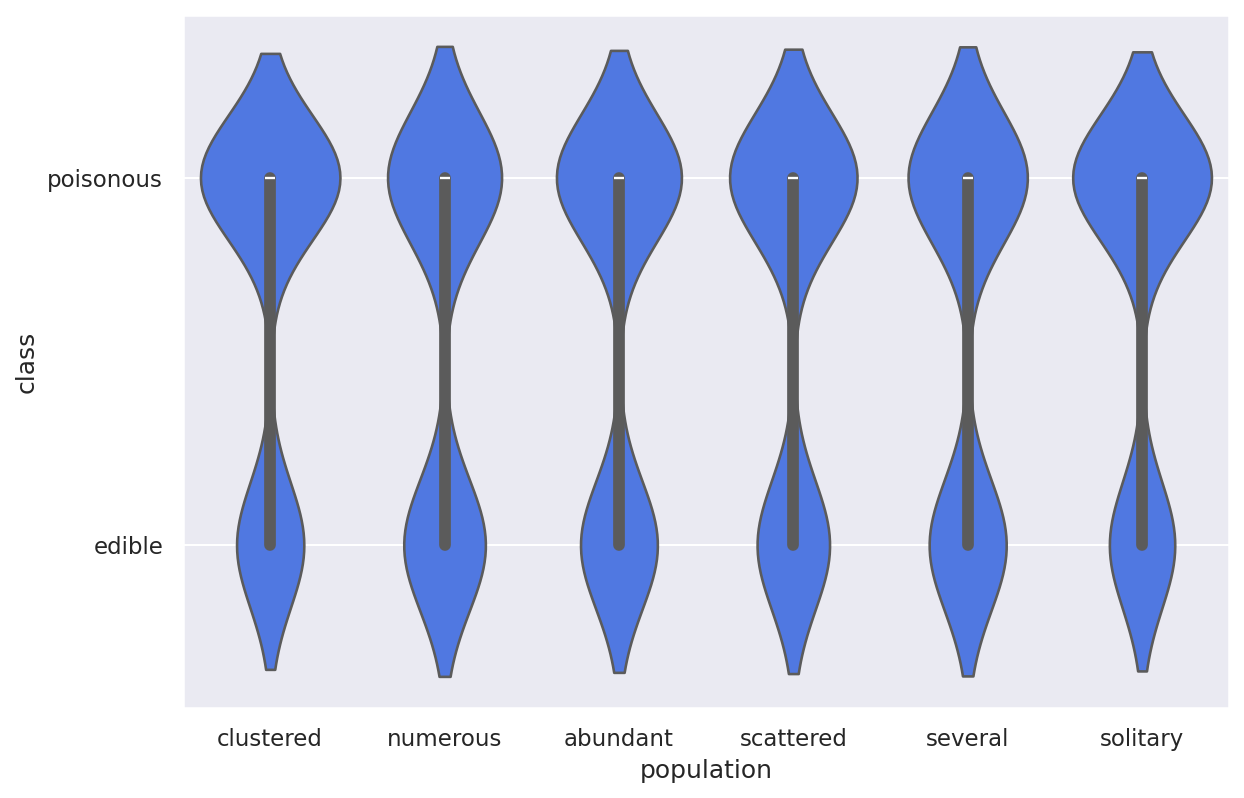

---------------------------------------------------------------------------------------------------


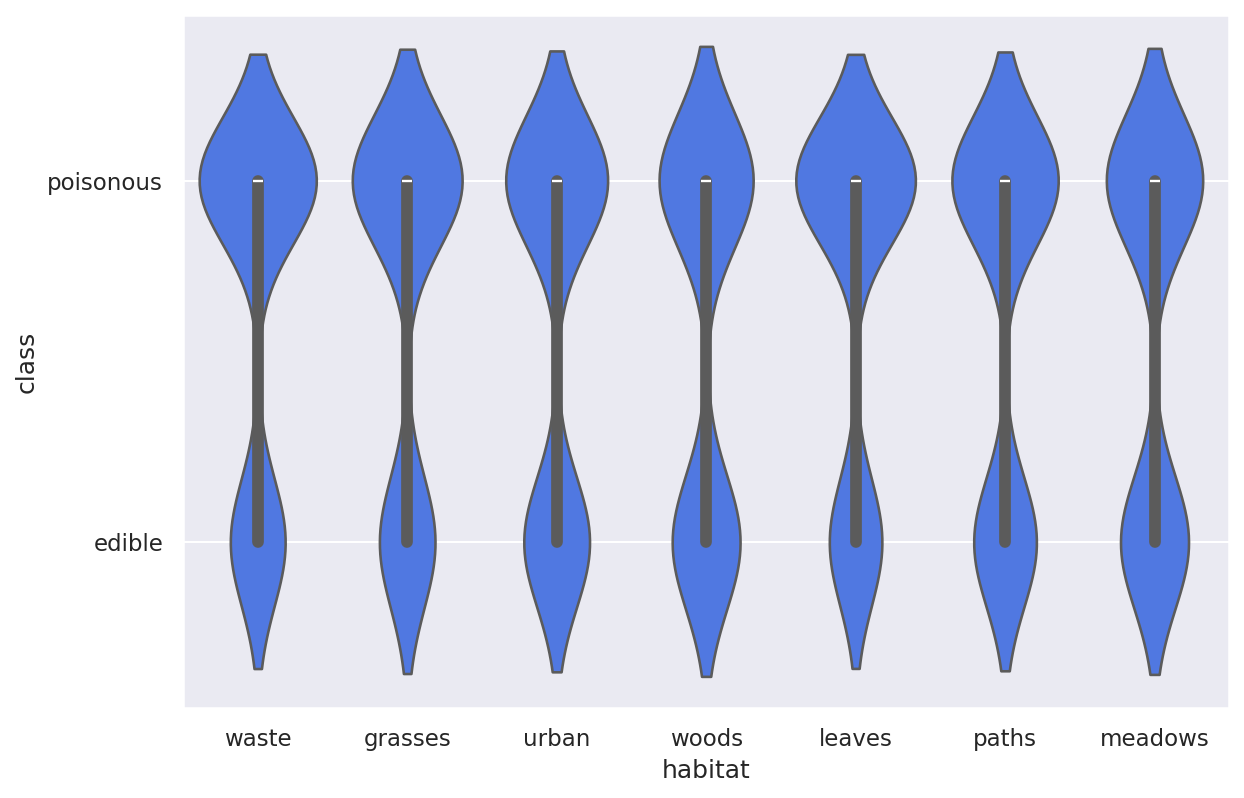

---------------------------------------------------------------------------------------------------


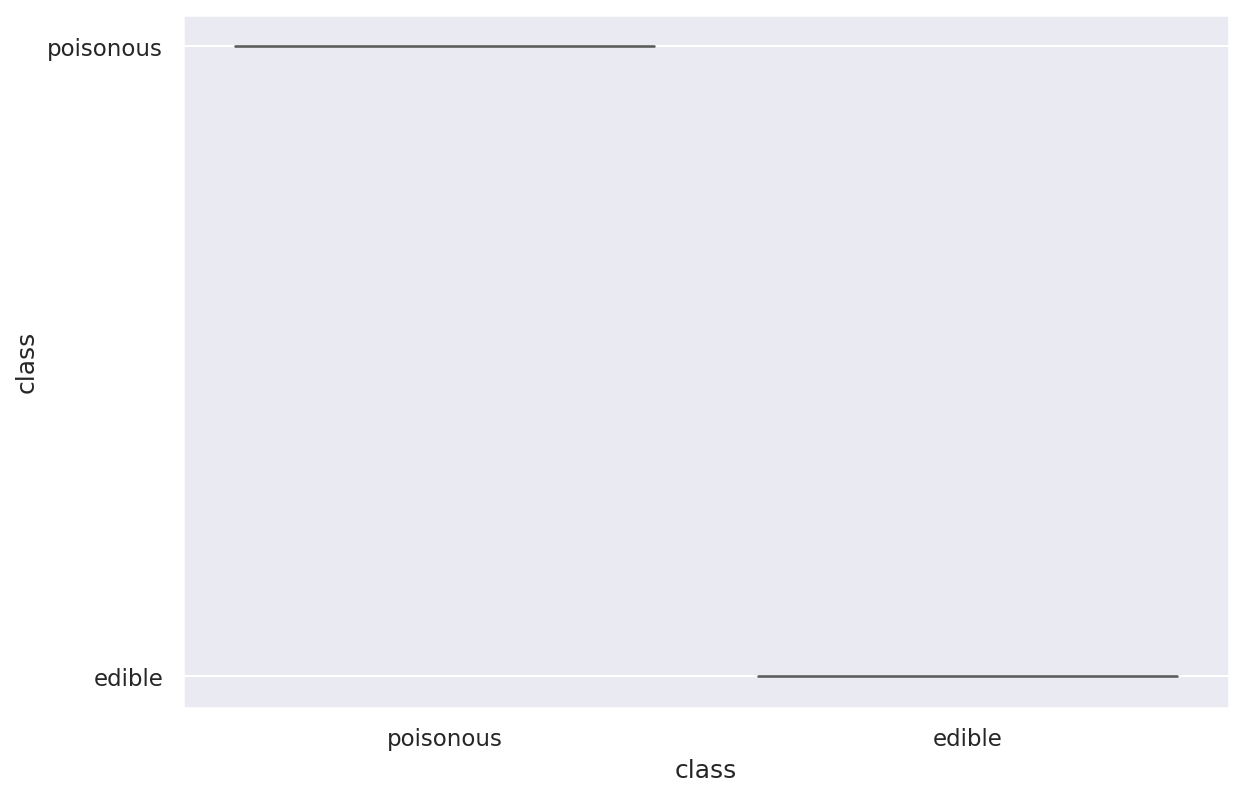

---------------------------------------------------------------------------------------------------


In [13]:
# @title $Violinplot$
for col in cat_columns:
  sns.violinplot(x =col, y ='class', data = df)
  plt.show()
  print('---------------------------------------------------------------------------------------------------')

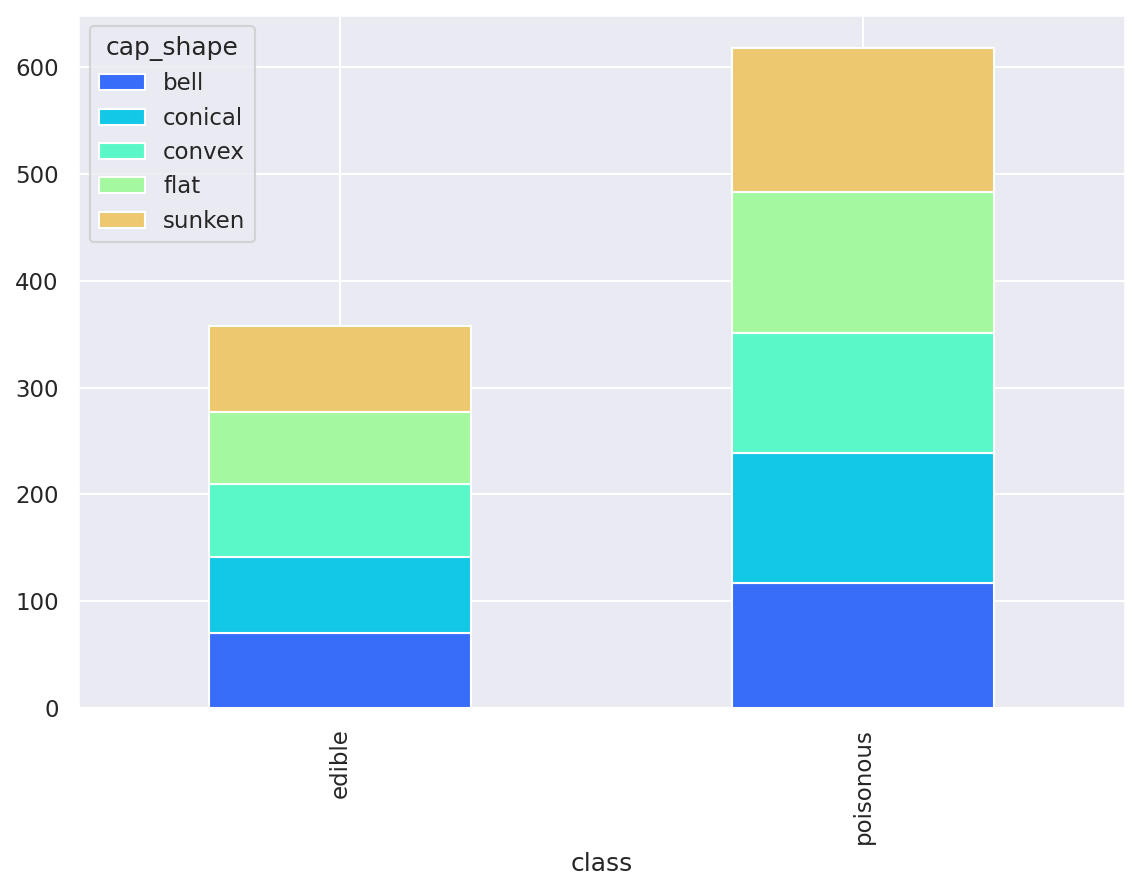

---------------------------------------------------------------------------------------------------


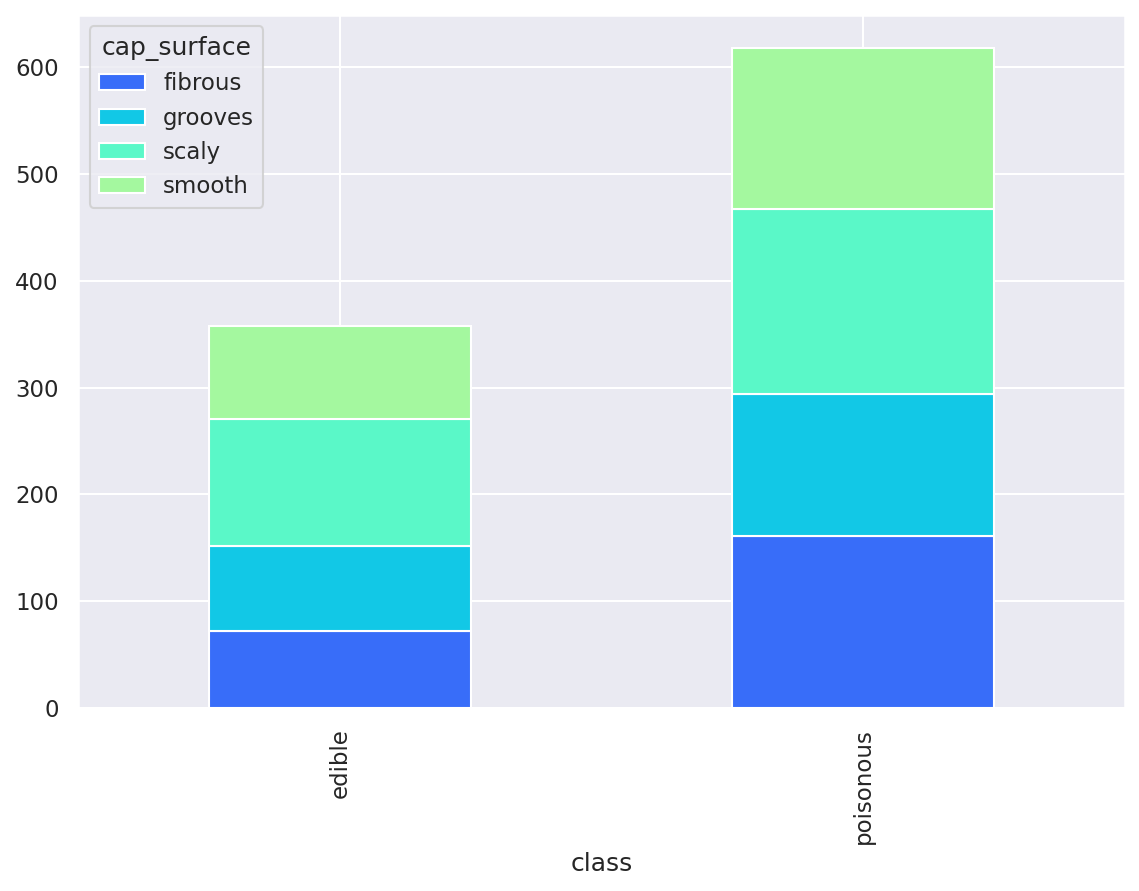

---------------------------------------------------------------------------------------------------


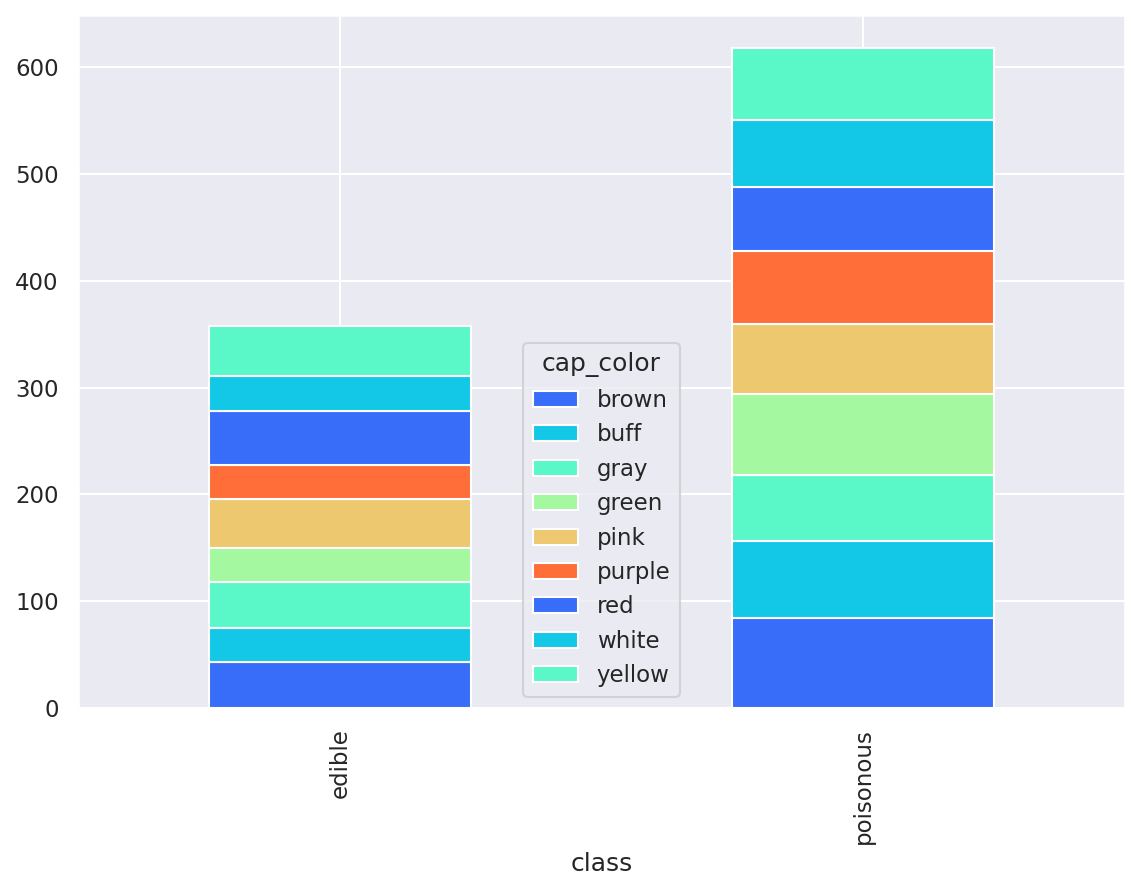

---------------------------------------------------------------------------------------------------


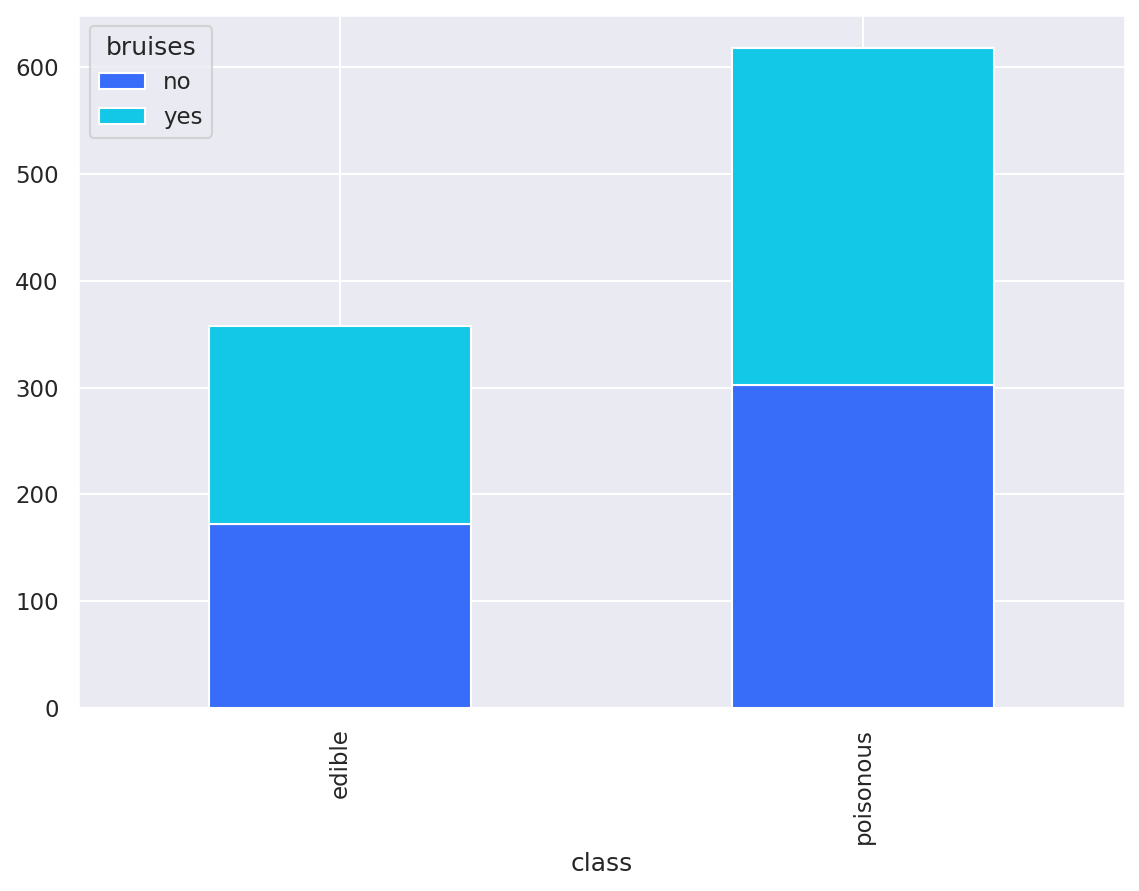

---------------------------------------------------------------------------------------------------


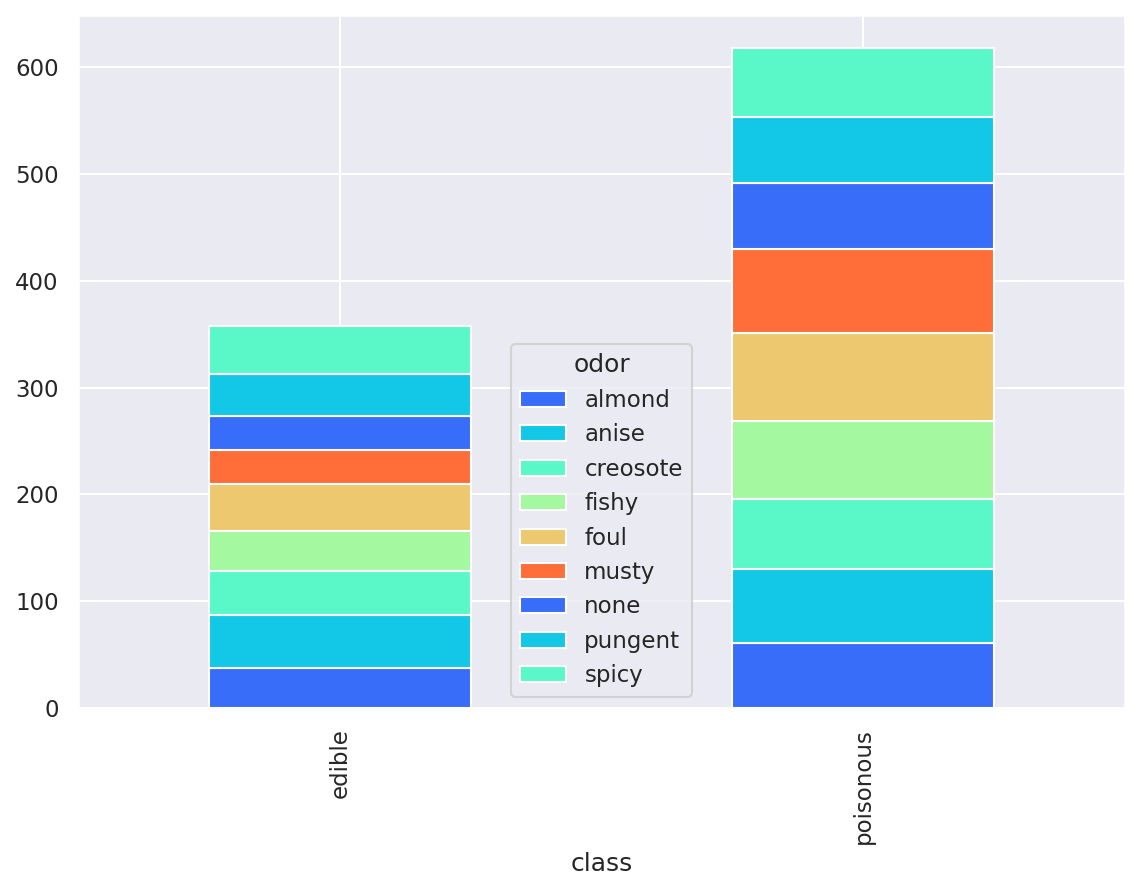

---------------------------------------------------------------------------------------------------


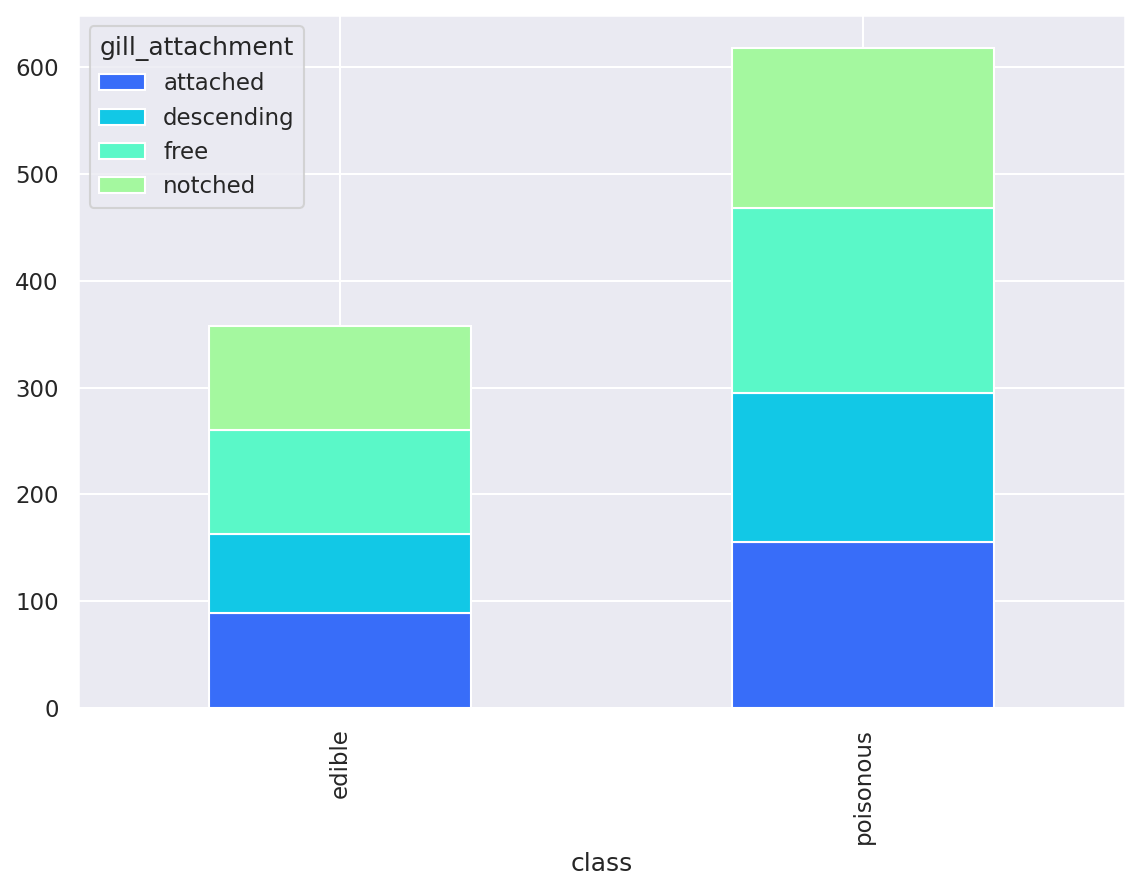

---------------------------------------------------------------------------------------------------


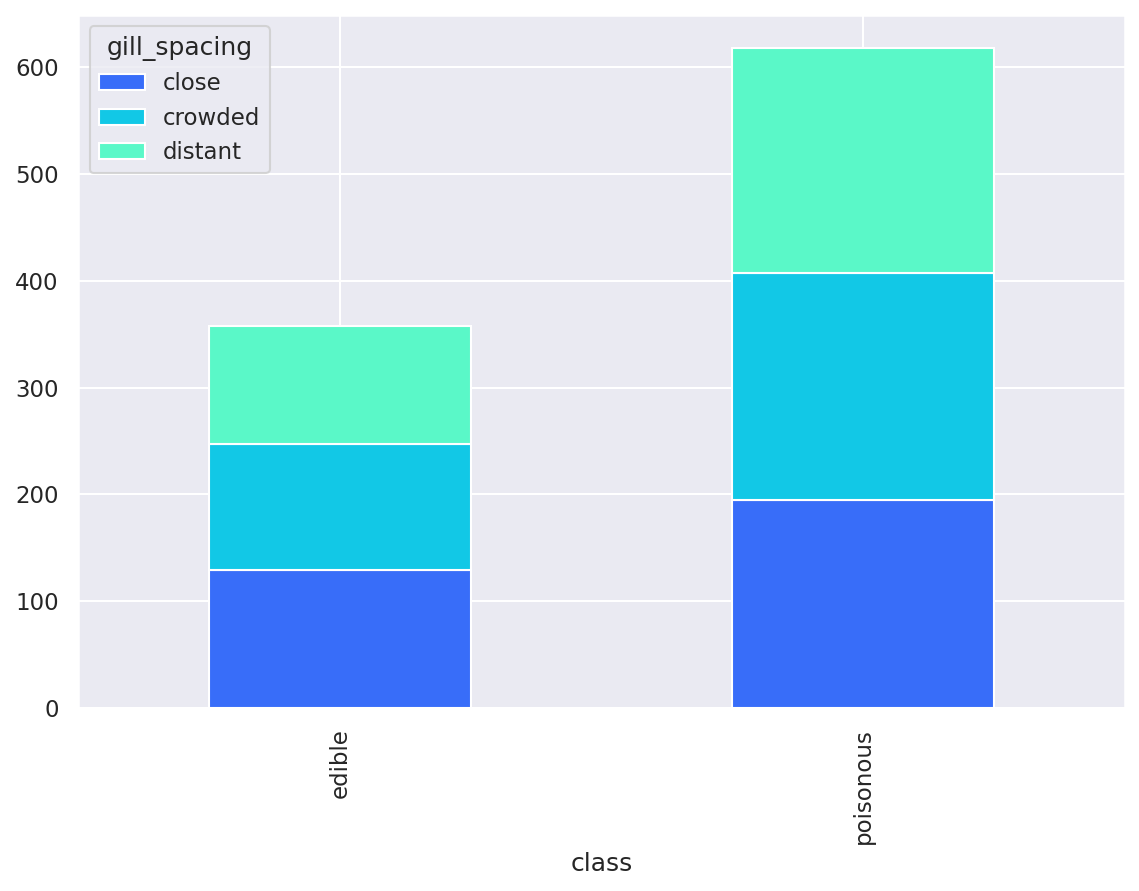

---------------------------------------------------------------------------------------------------


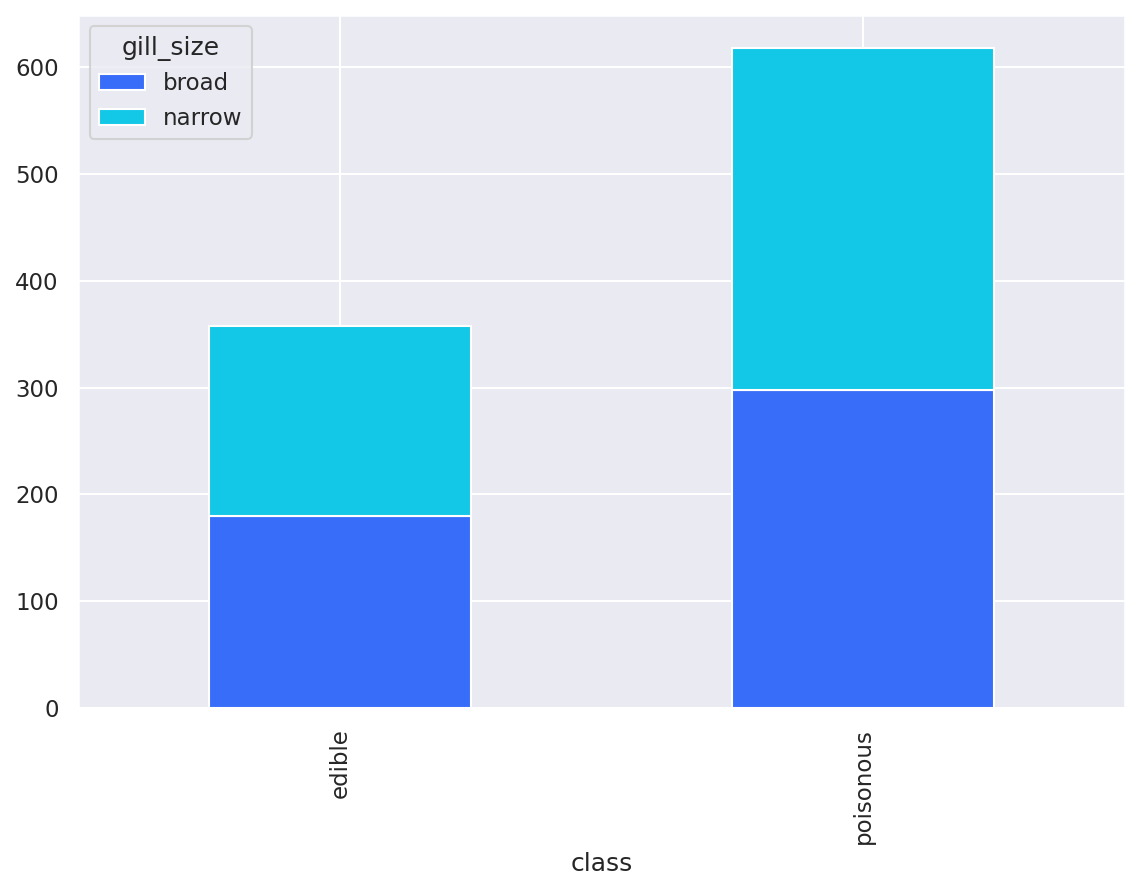

---------------------------------------------------------------------------------------------------


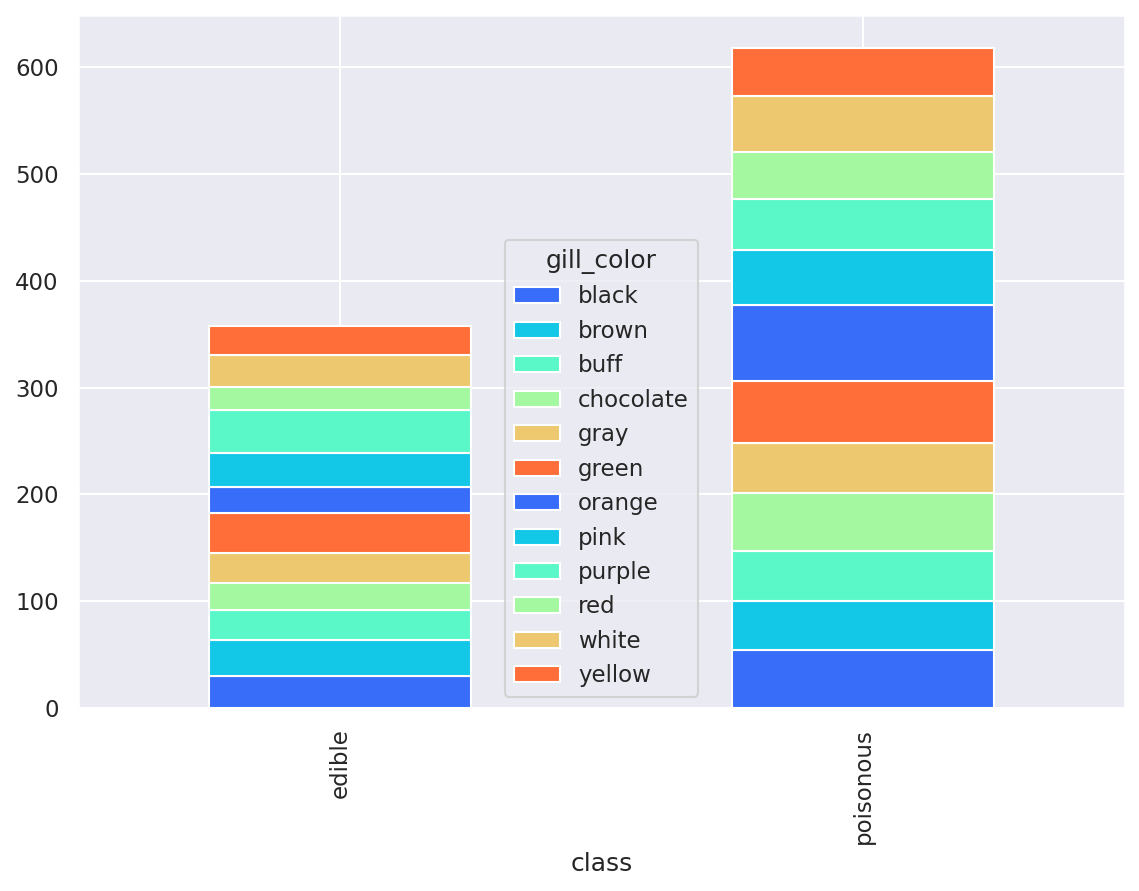

---------------------------------------------------------------------------------------------------


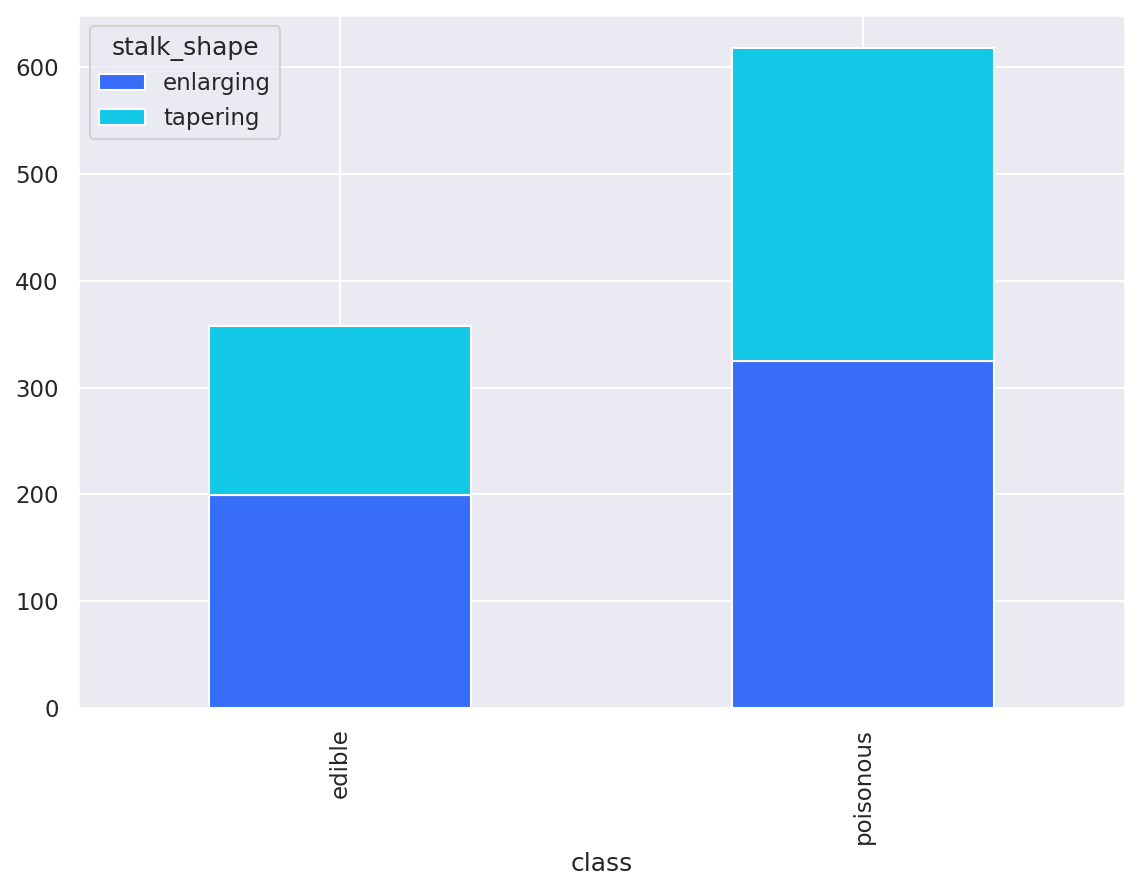

---------------------------------------------------------------------------------------------------


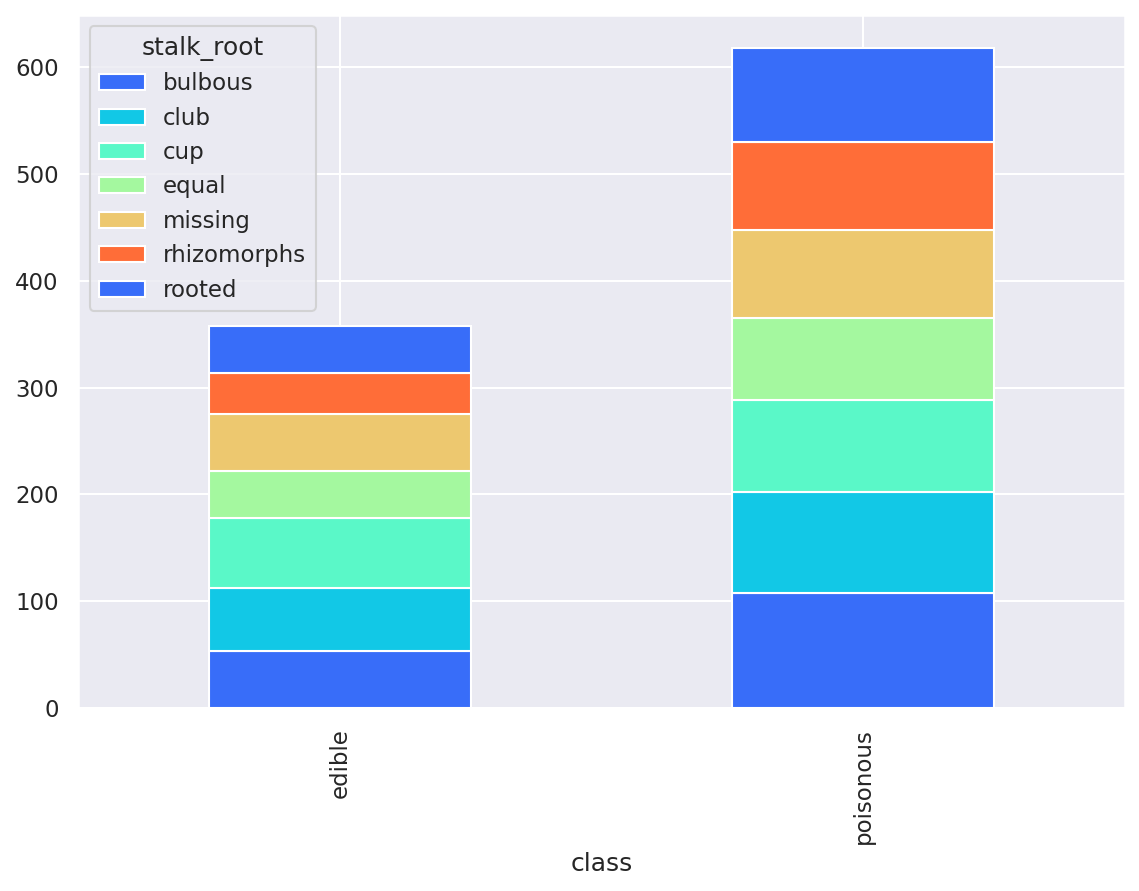

---------------------------------------------------------------------------------------------------


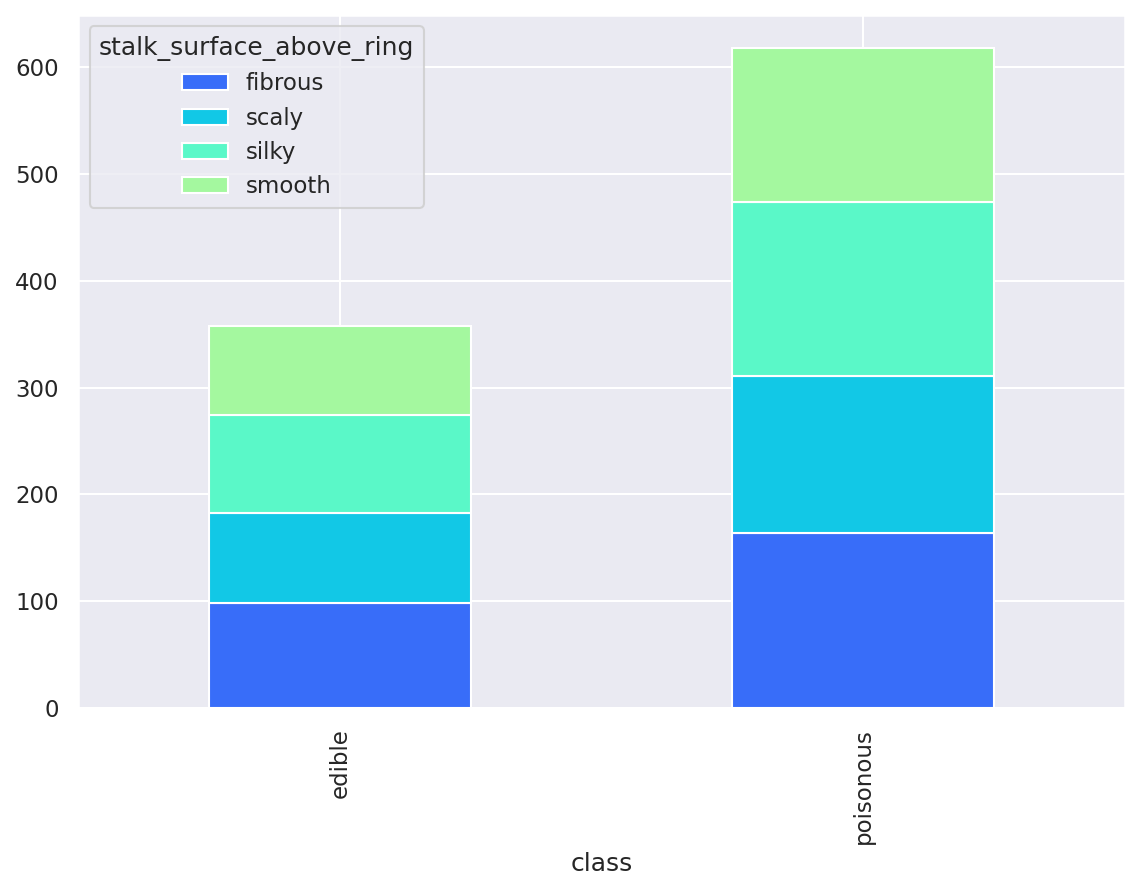

---------------------------------------------------------------------------------------------------


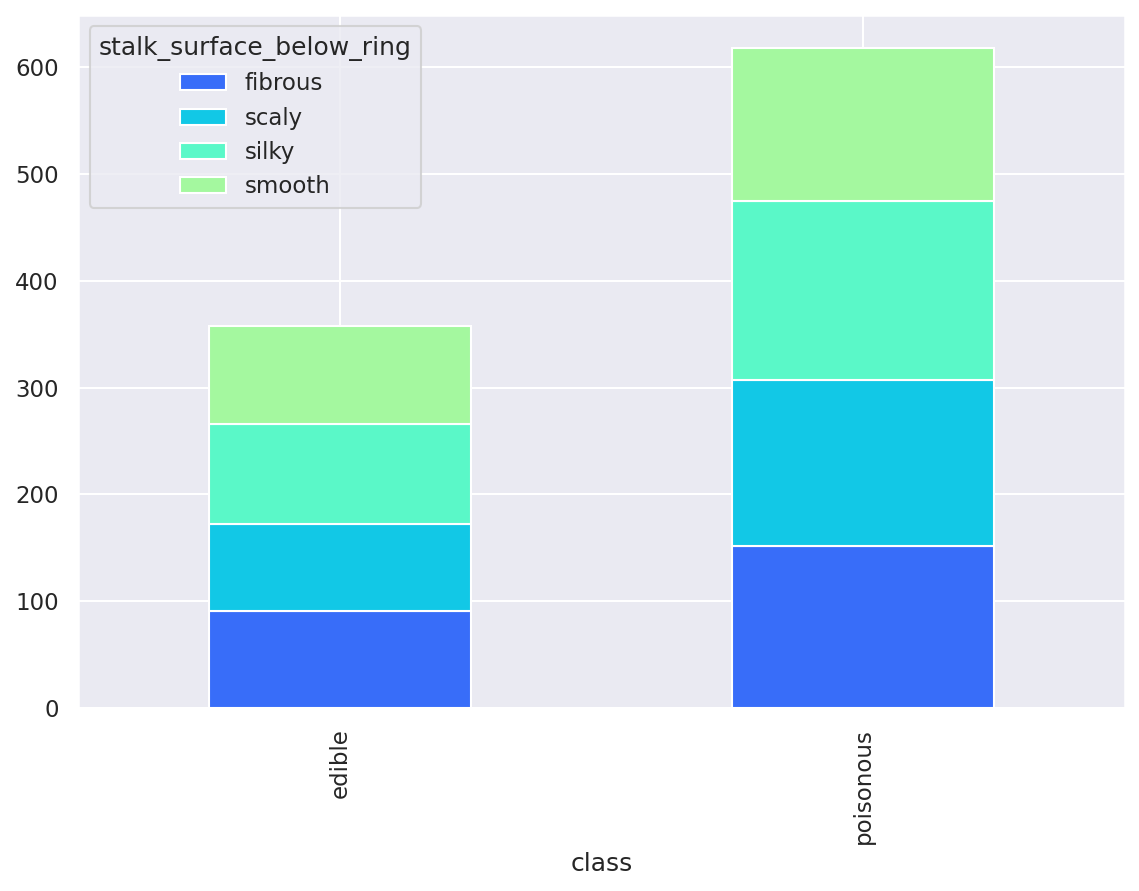

---------------------------------------------------------------------------------------------------


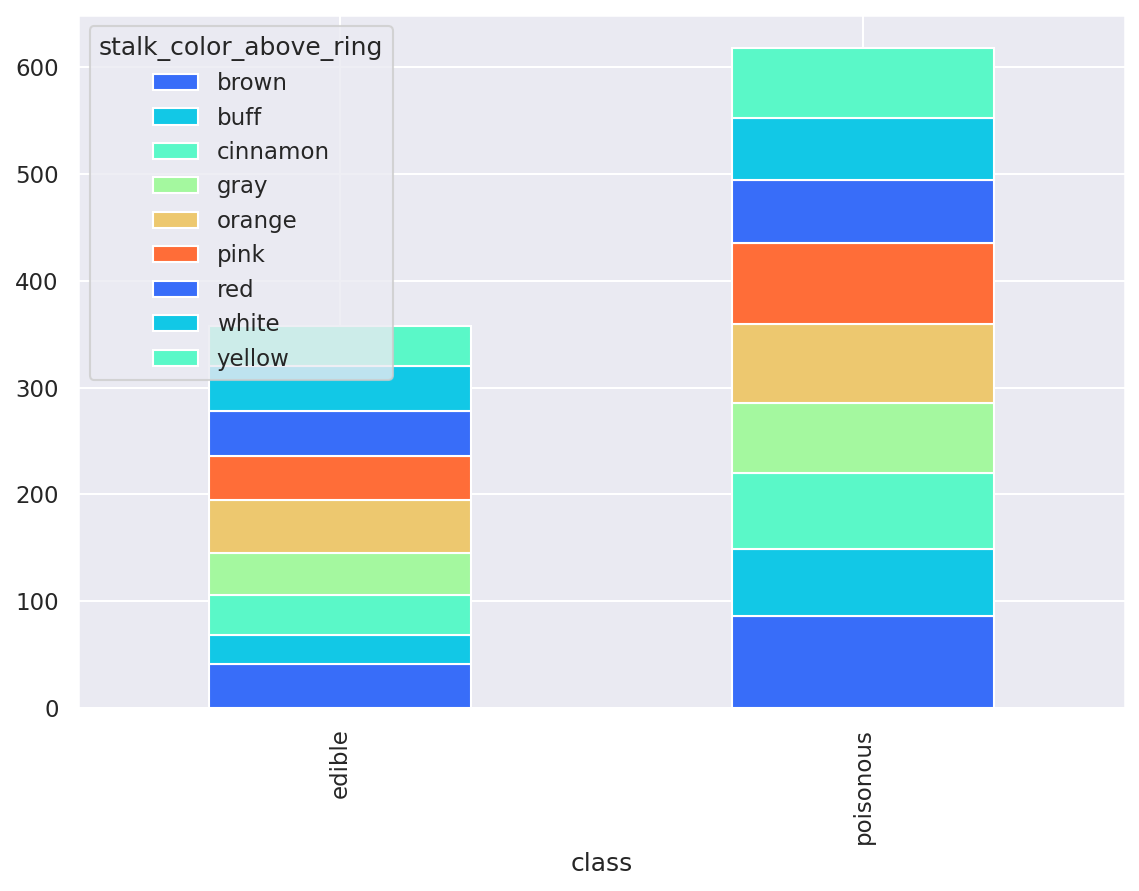

---------------------------------------------------------------------------------------------------


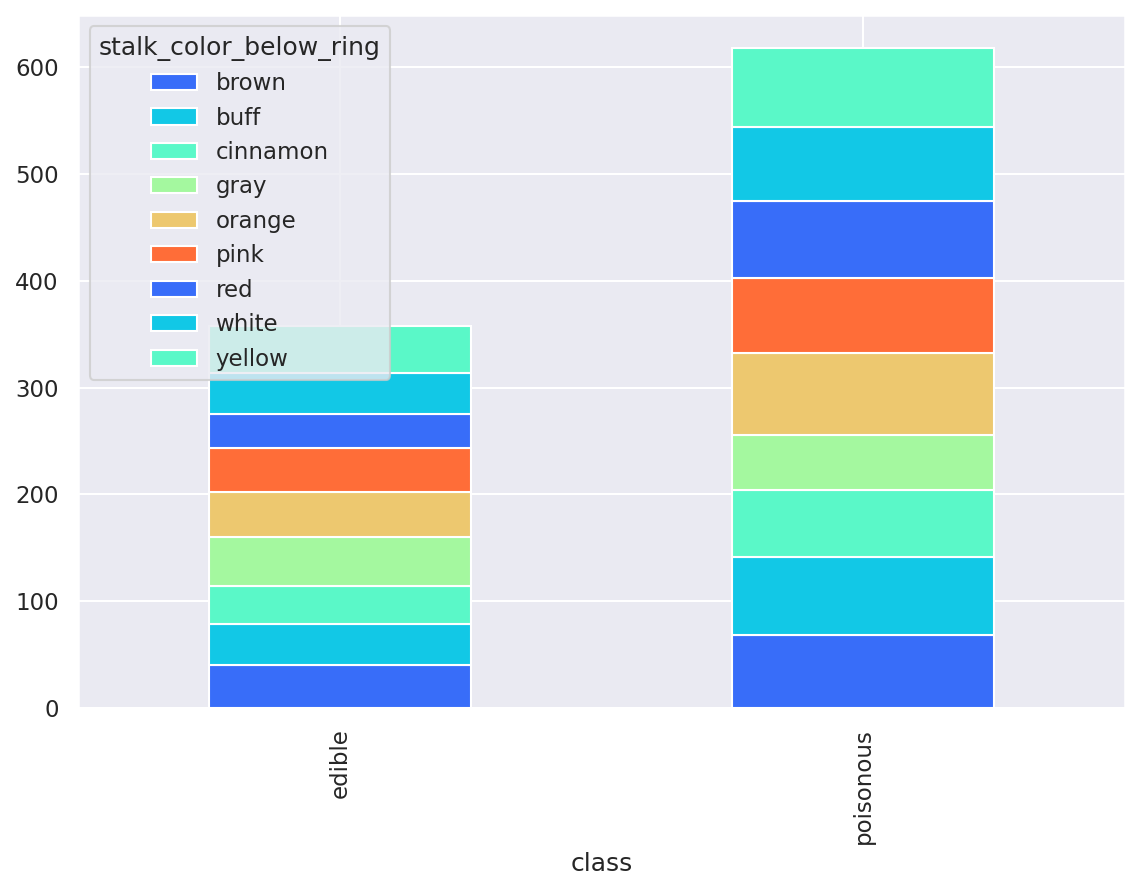

---------------------------------------------------------------------------------------------------


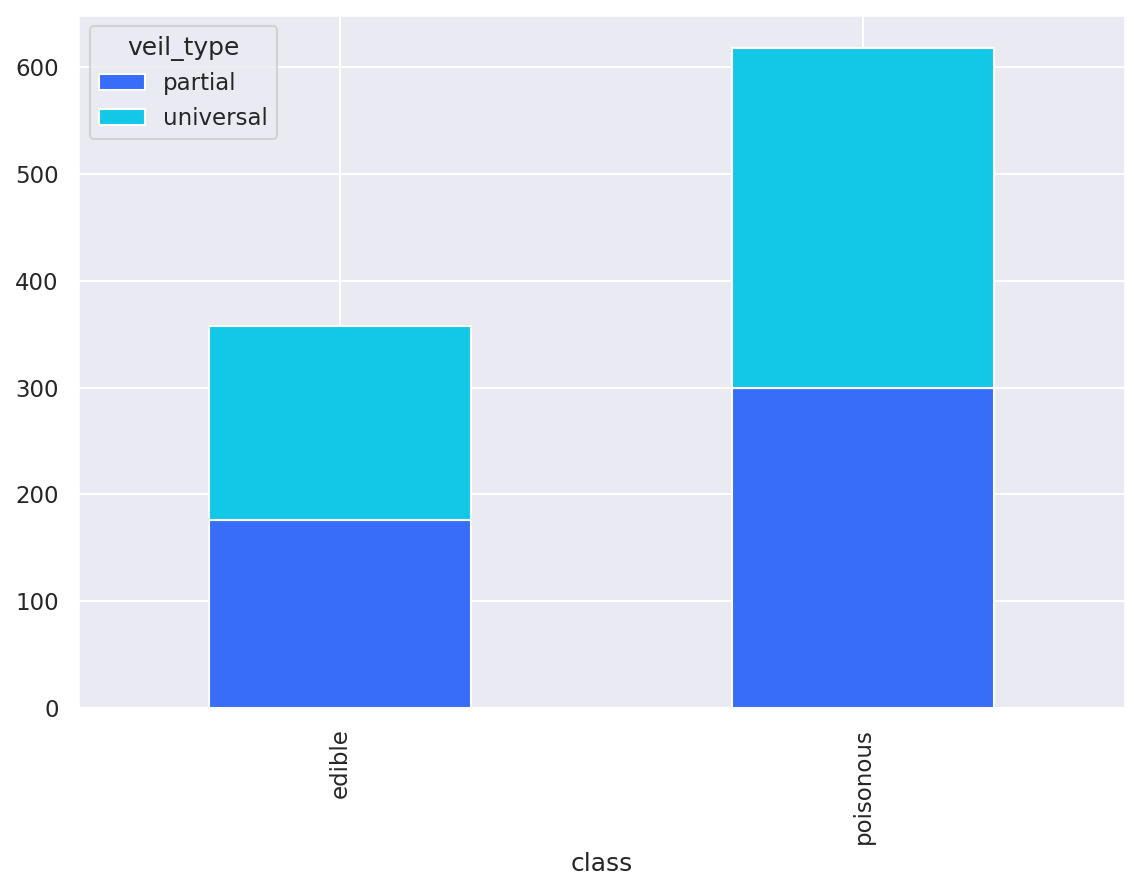

---------------------------------------------------------------------------------------------------


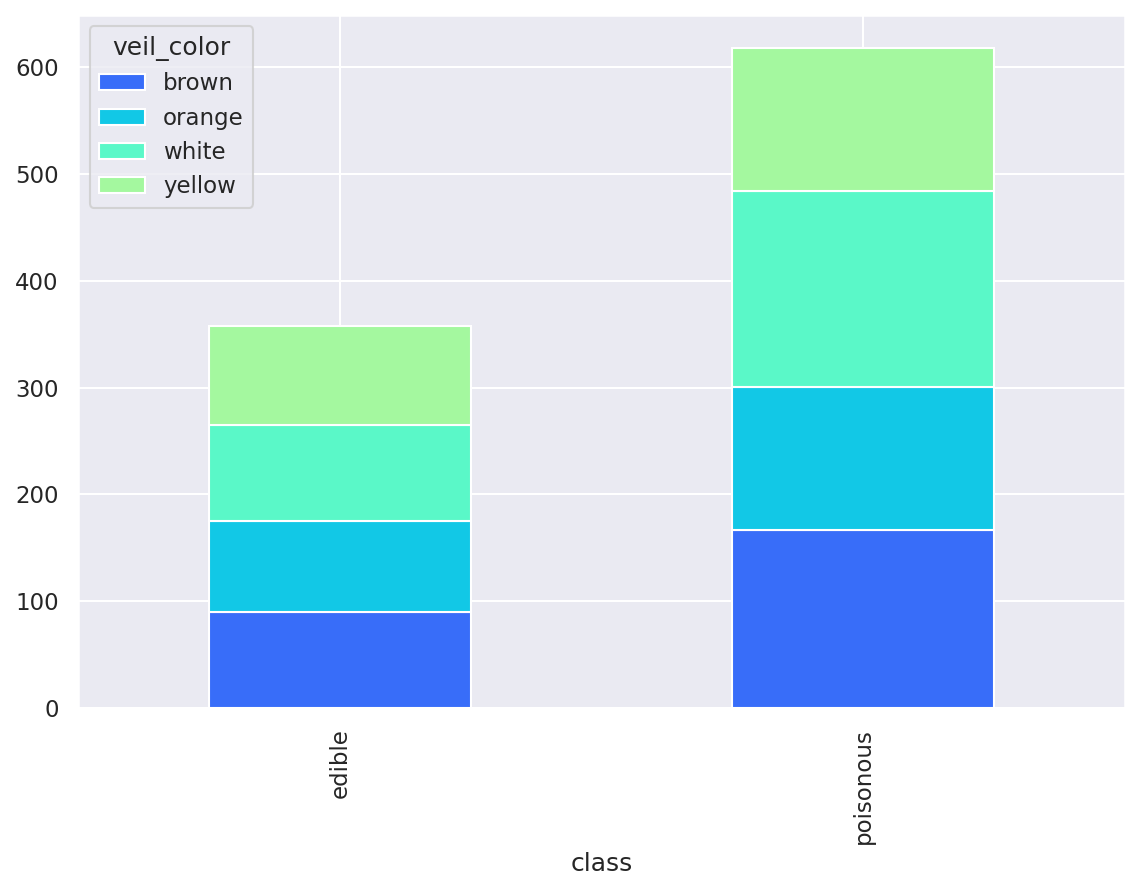

---------------------------------------------------------------------------------------------------


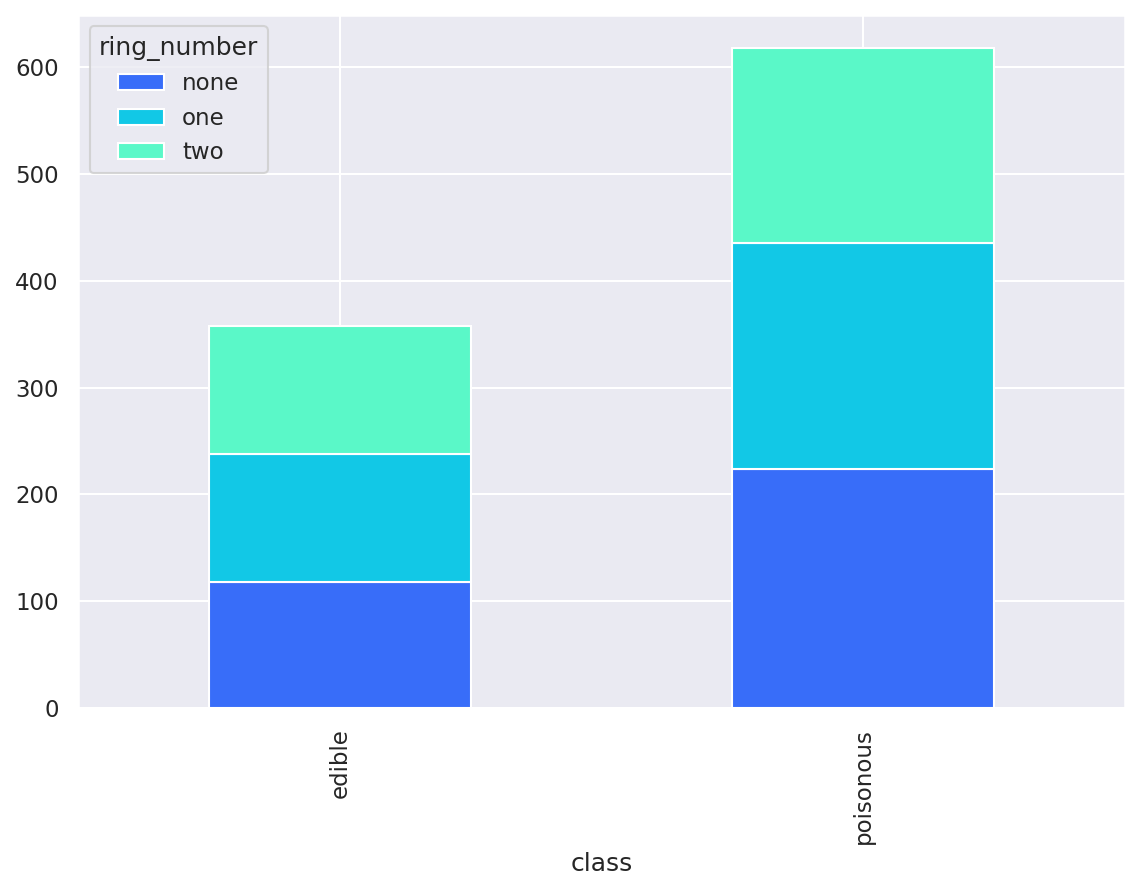

---------------------------------------------------------------------------------------------------


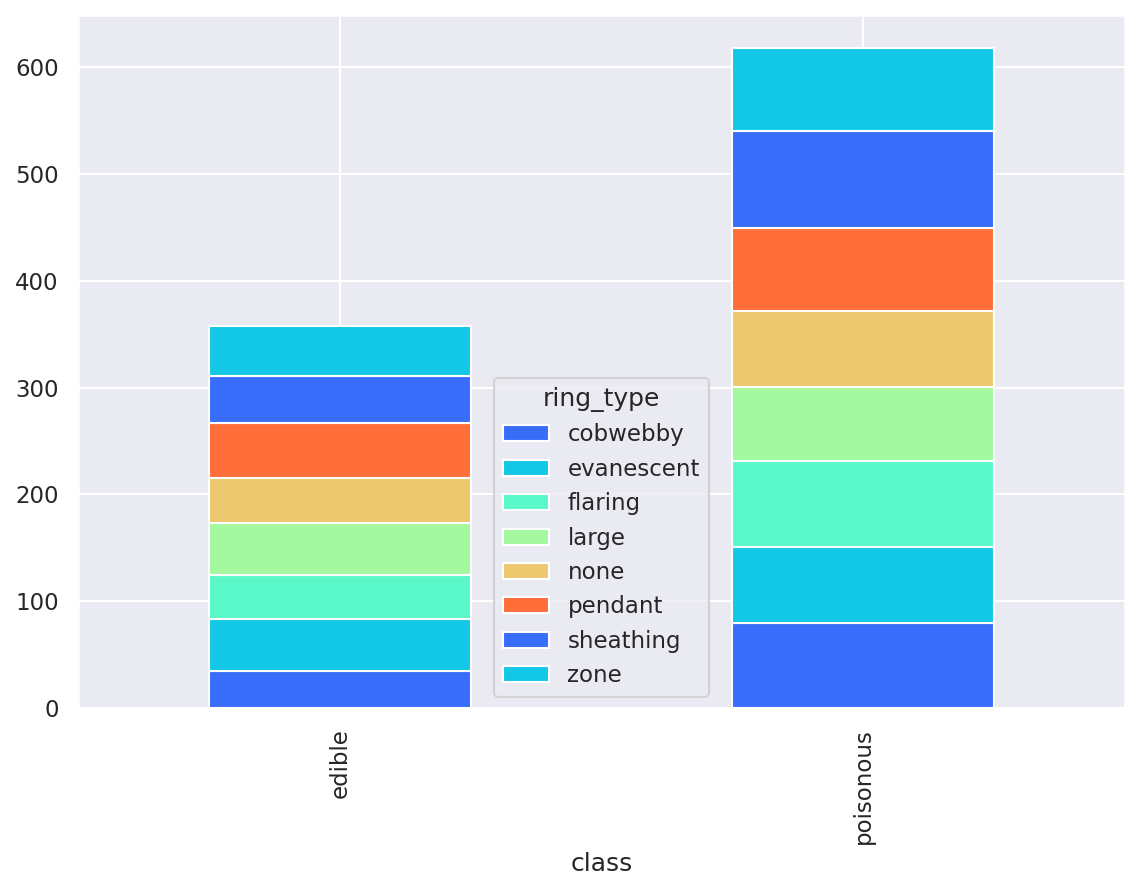

---------------------------------------------------------------------------------------------------


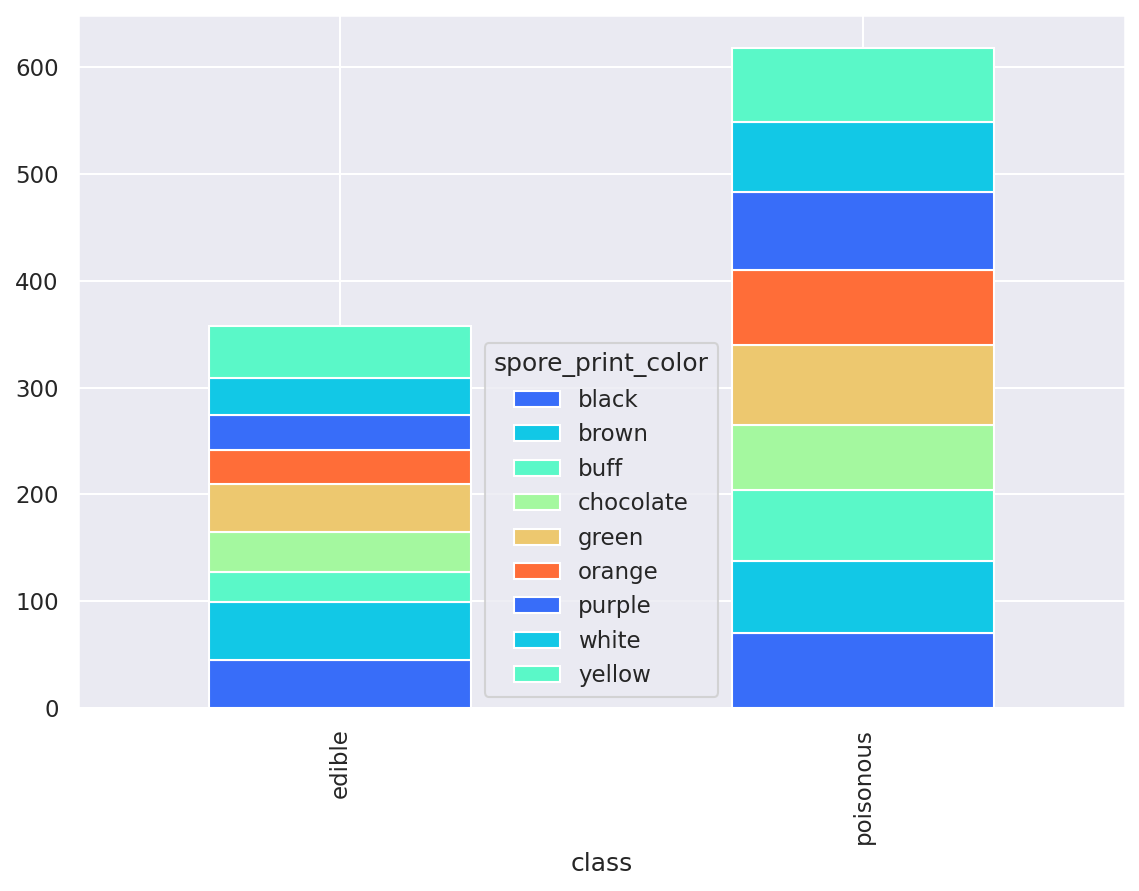

---------------------------------------------------------------------------------------------------


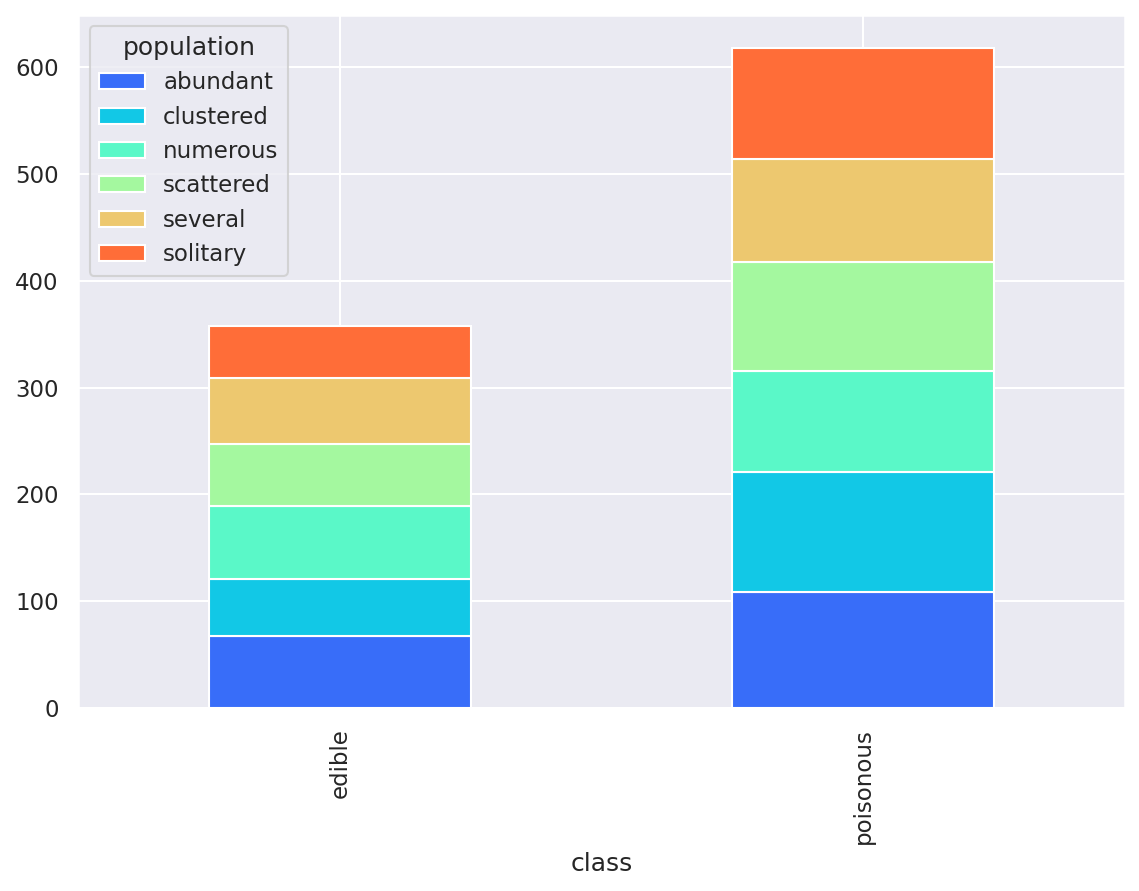

---------------------------------------------------------------------------------------------------


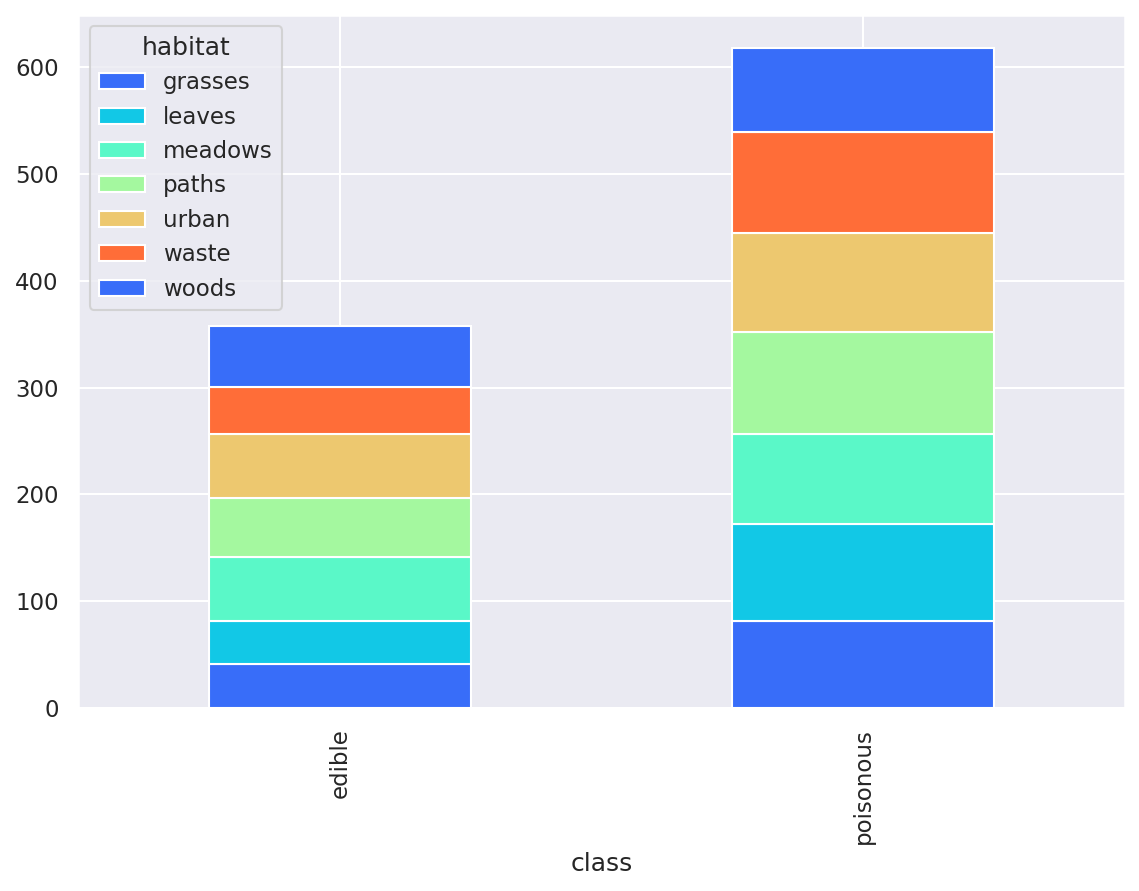

---------------------------------------------------------------------------------------------------


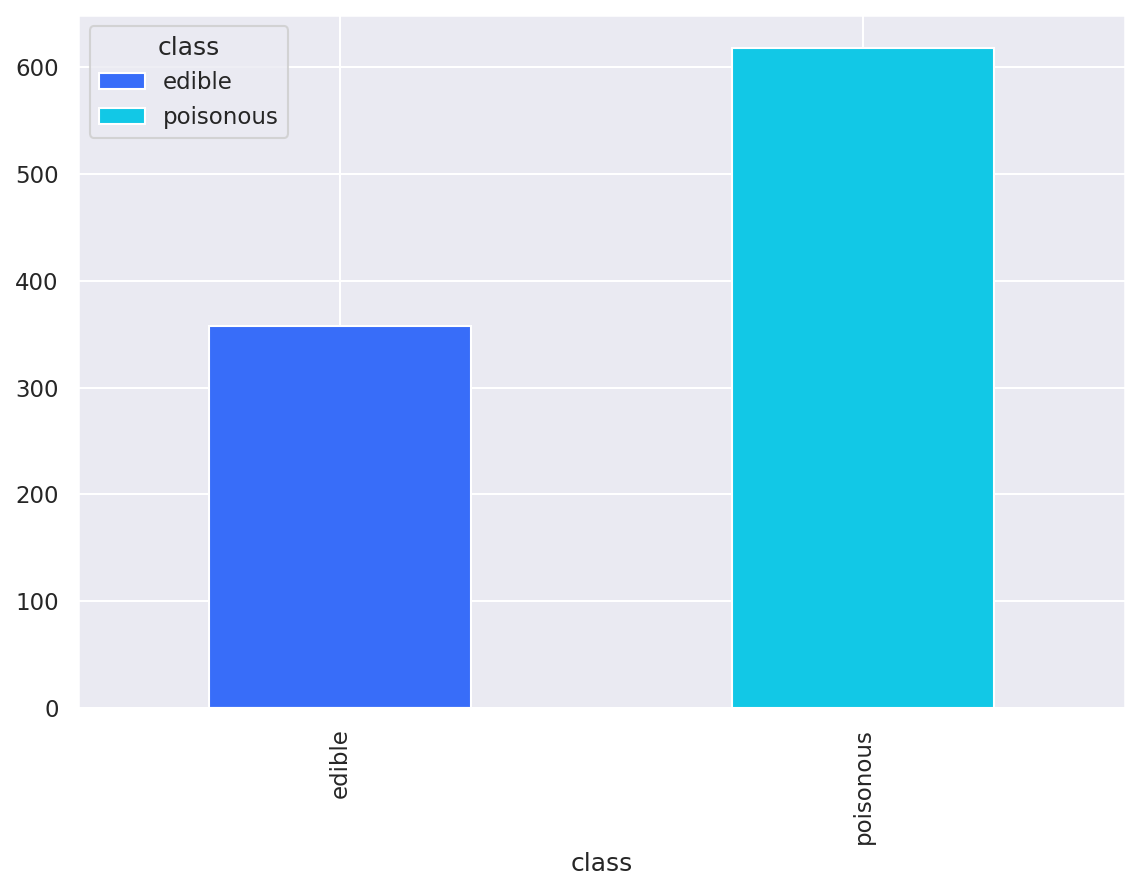

---------------------------------------------------------------------------------------------------


In [14]:
# @title $Groupby$
for col in cat_columns:
  df.groupby(['class', col]).size().unstack().plot(kind='bar', stacked=True)
  plt.show()
  print('---------------------------------------------------------------------------------------------------')

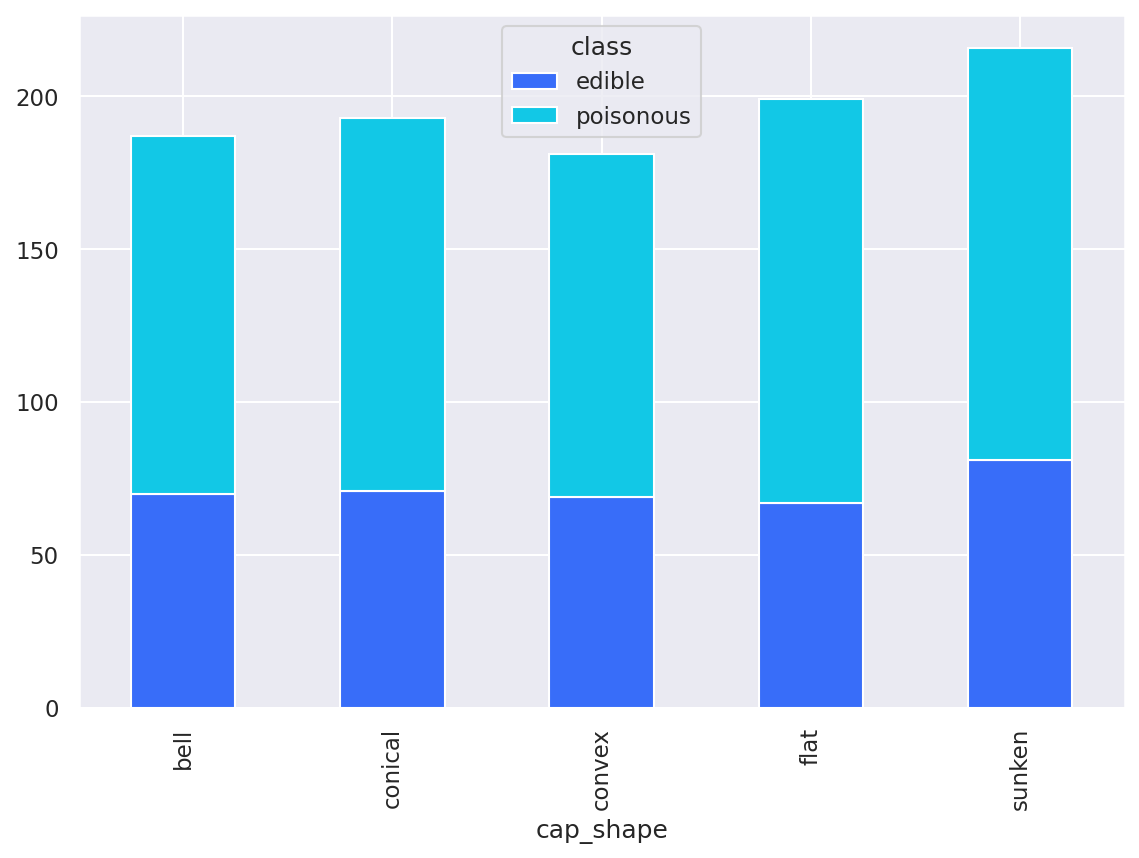

---------------------------------------------------------------------------------------------------


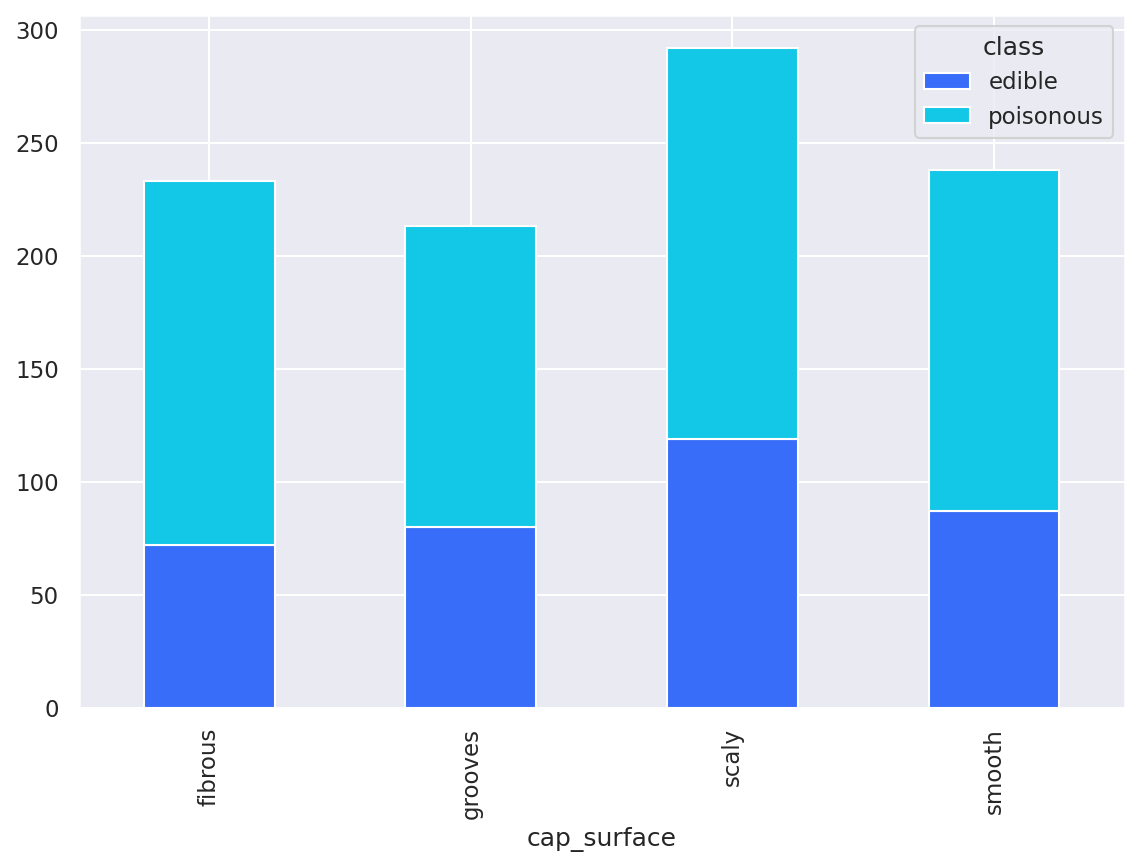

---------------------------------------------------------------------------------------------------


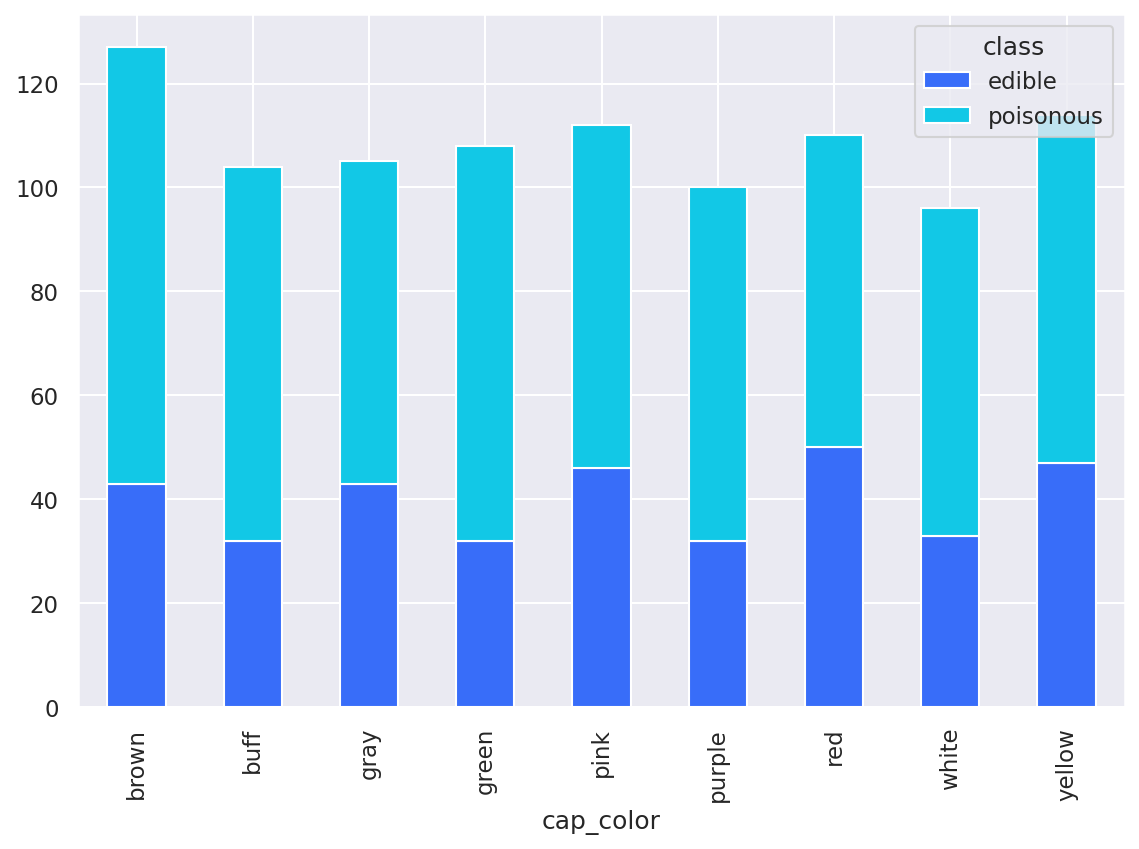

---------------------------------------------------------------------------------------------------


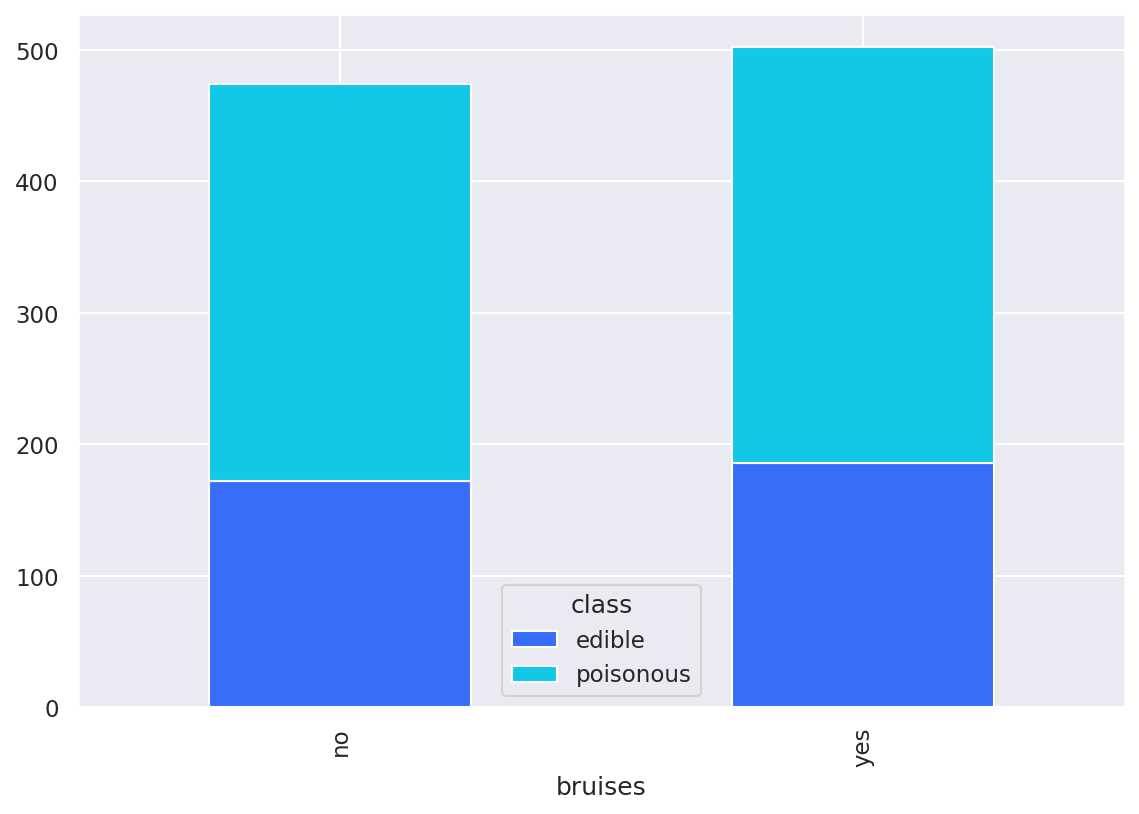

---------------------------------------------------------------------------------------------------


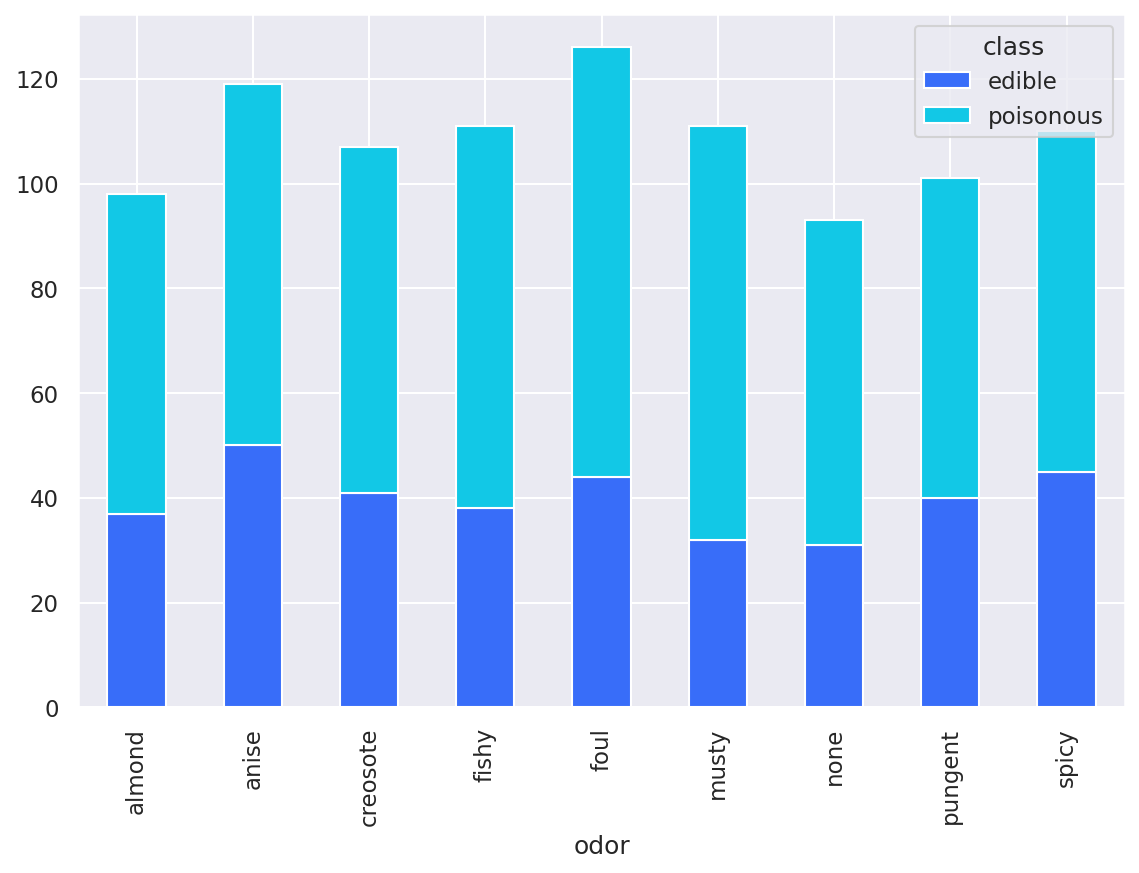

---------------------------------------------------------------------------------------------------


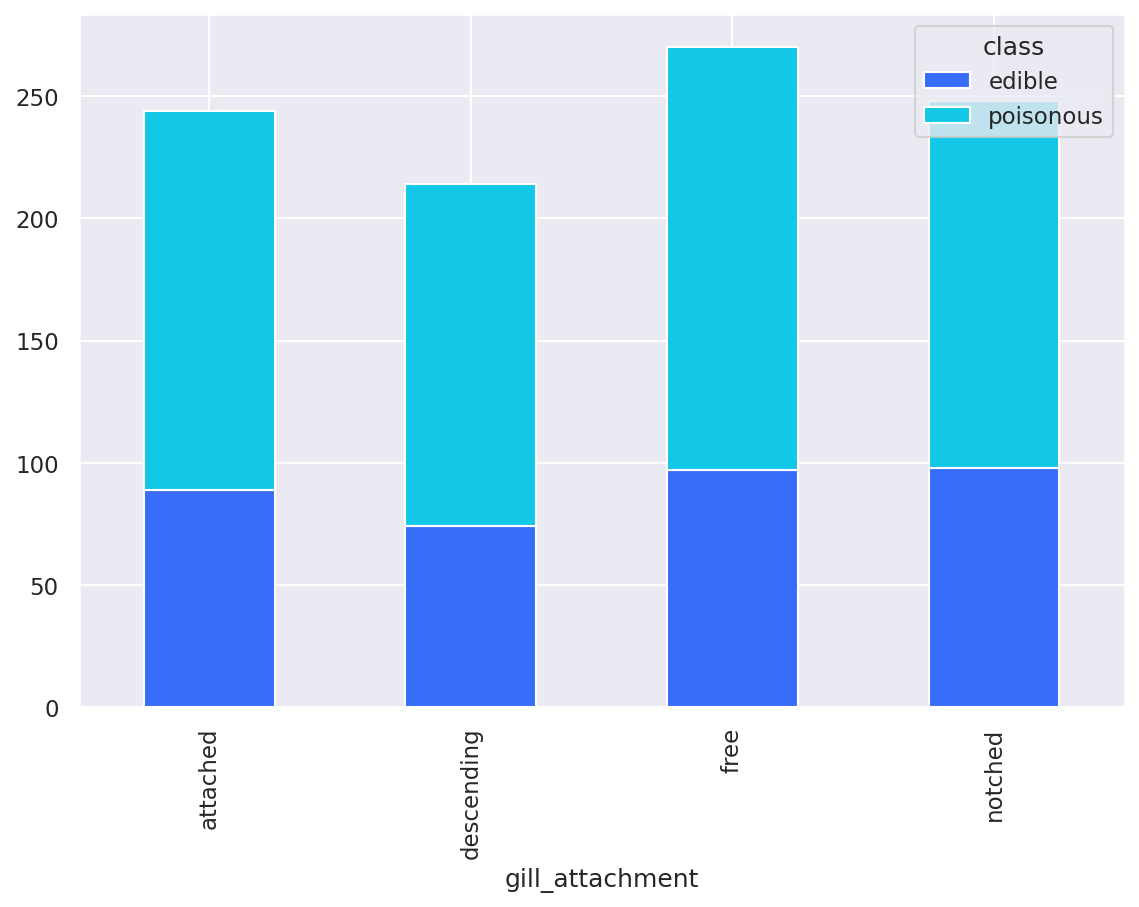

---------------------------------------------------------------------------------------------------


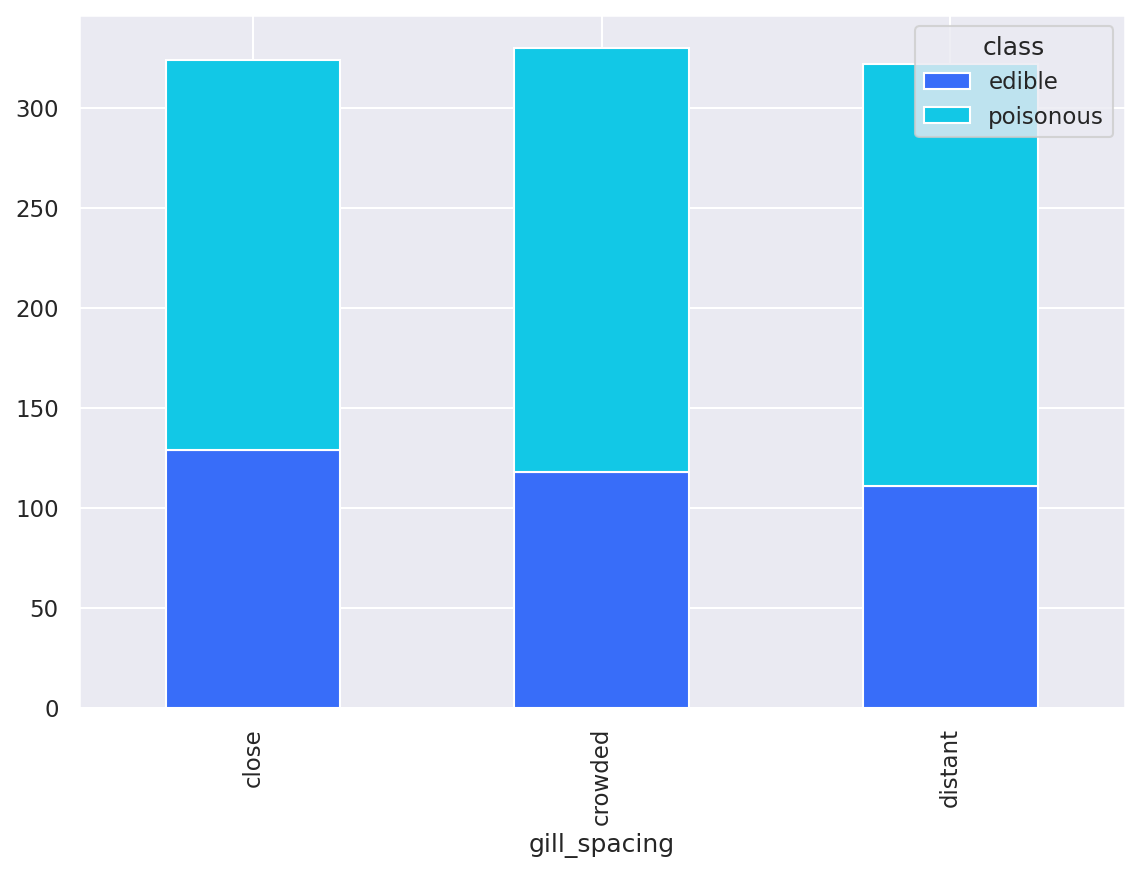

---------------------------------------------------------------------------------------------------


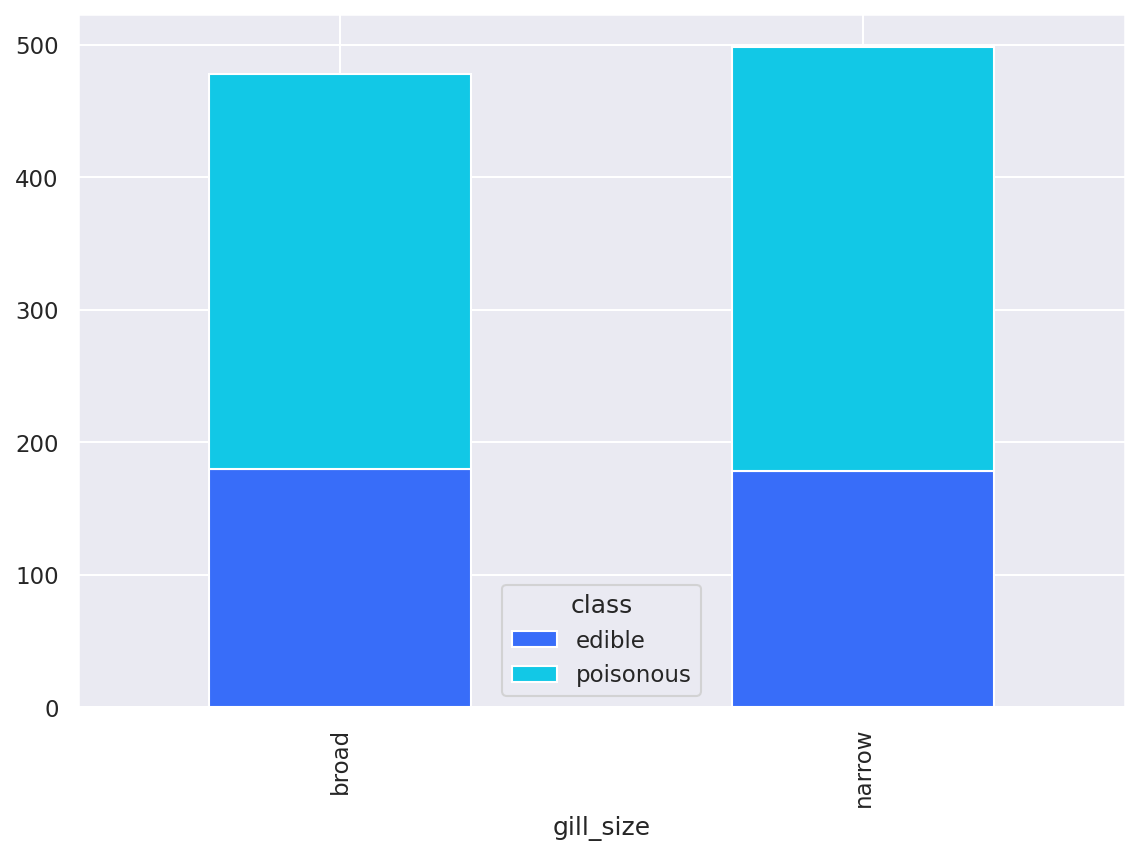

---------------------------------------------------------------------------------------------------


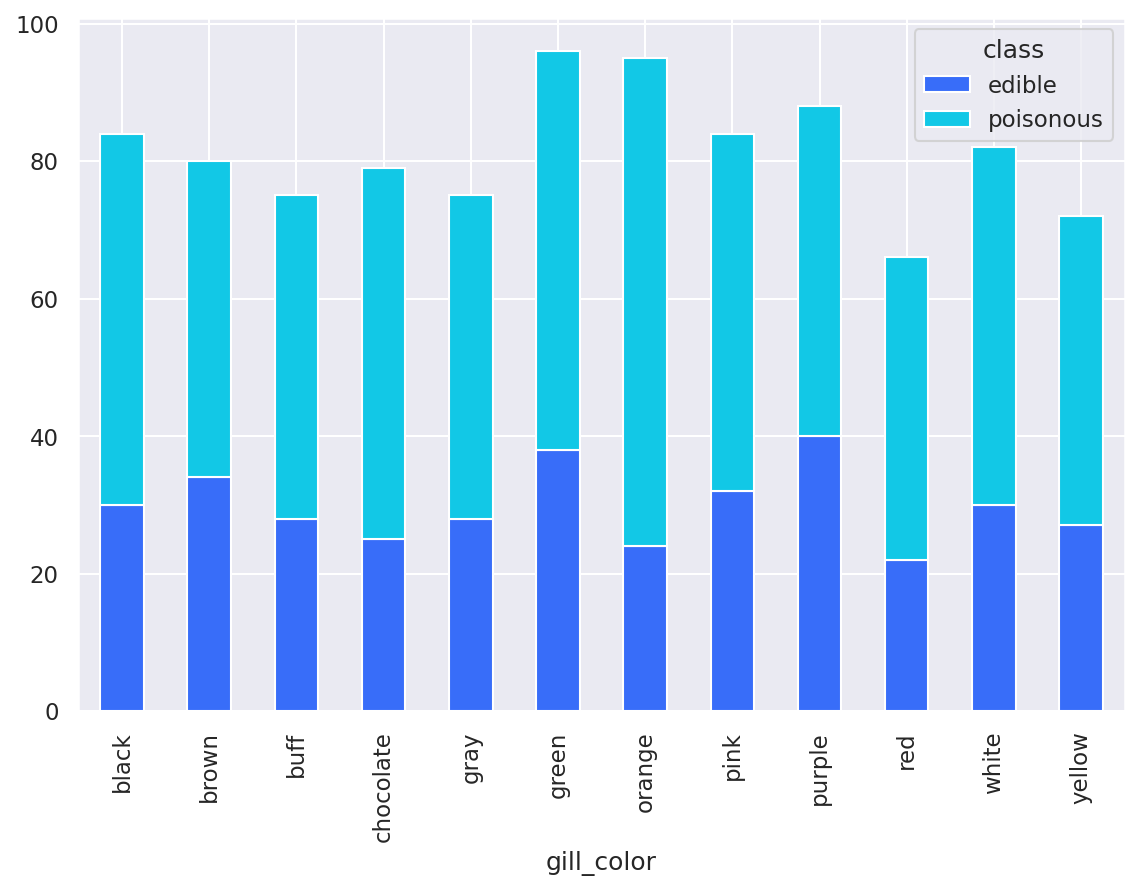

---------------------------------------------------------------------------------------------------


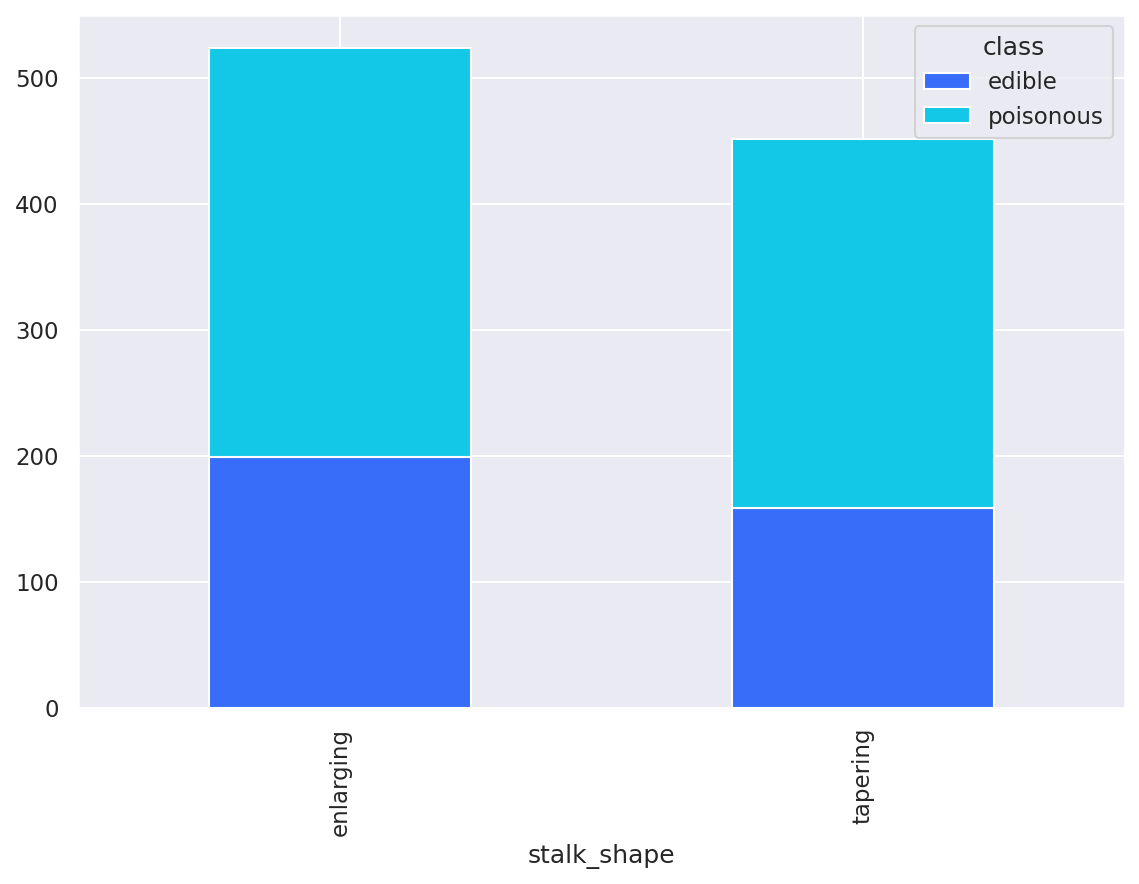

---------------------------------------------------------------------------------------------------


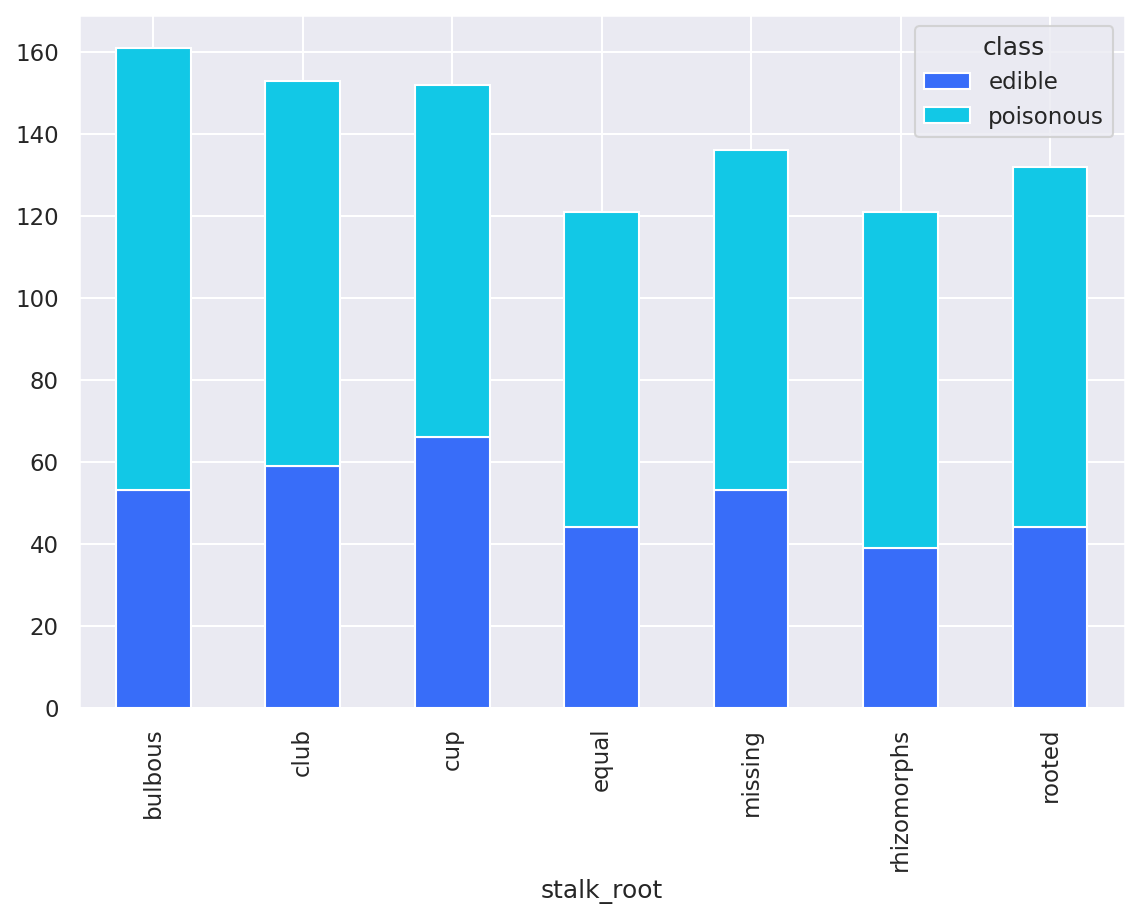

---------------------------------------------------------------------------------------------------


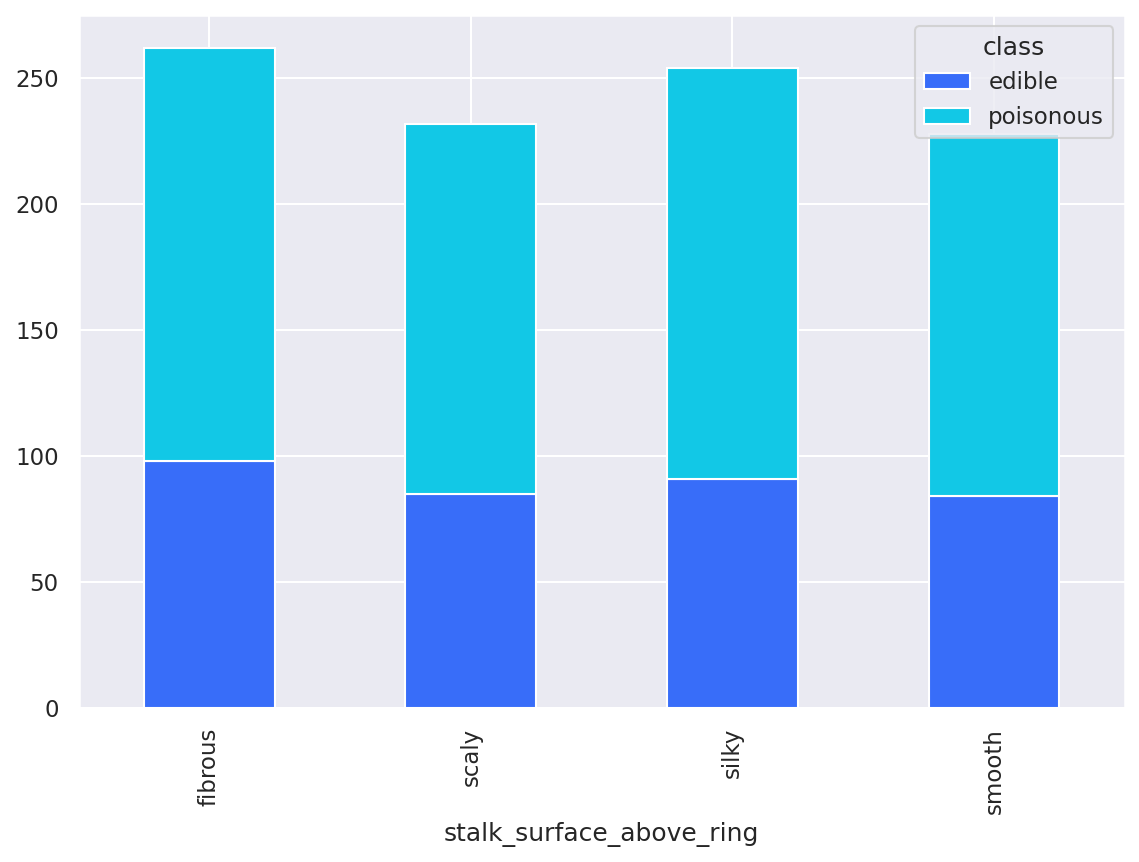

---------------------------------------------------------------------------------------------------


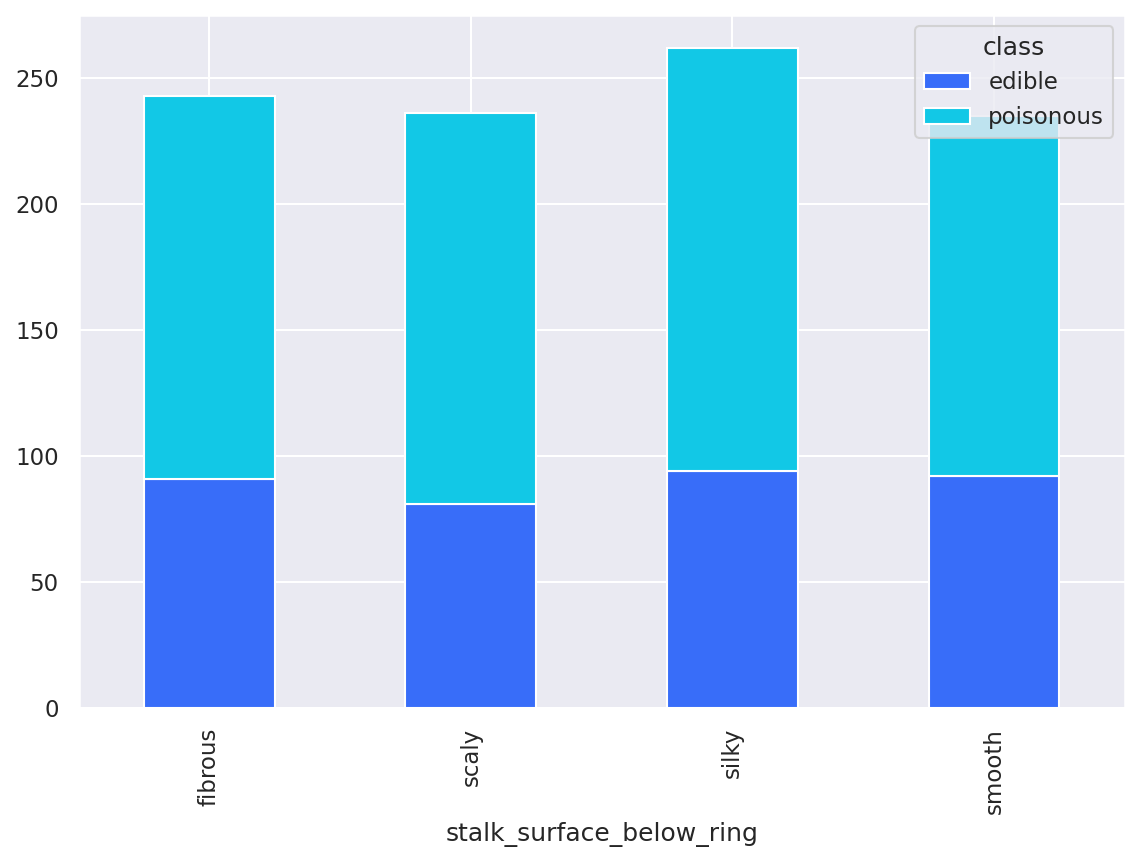

---------------------------------------------------------------------------------------------------


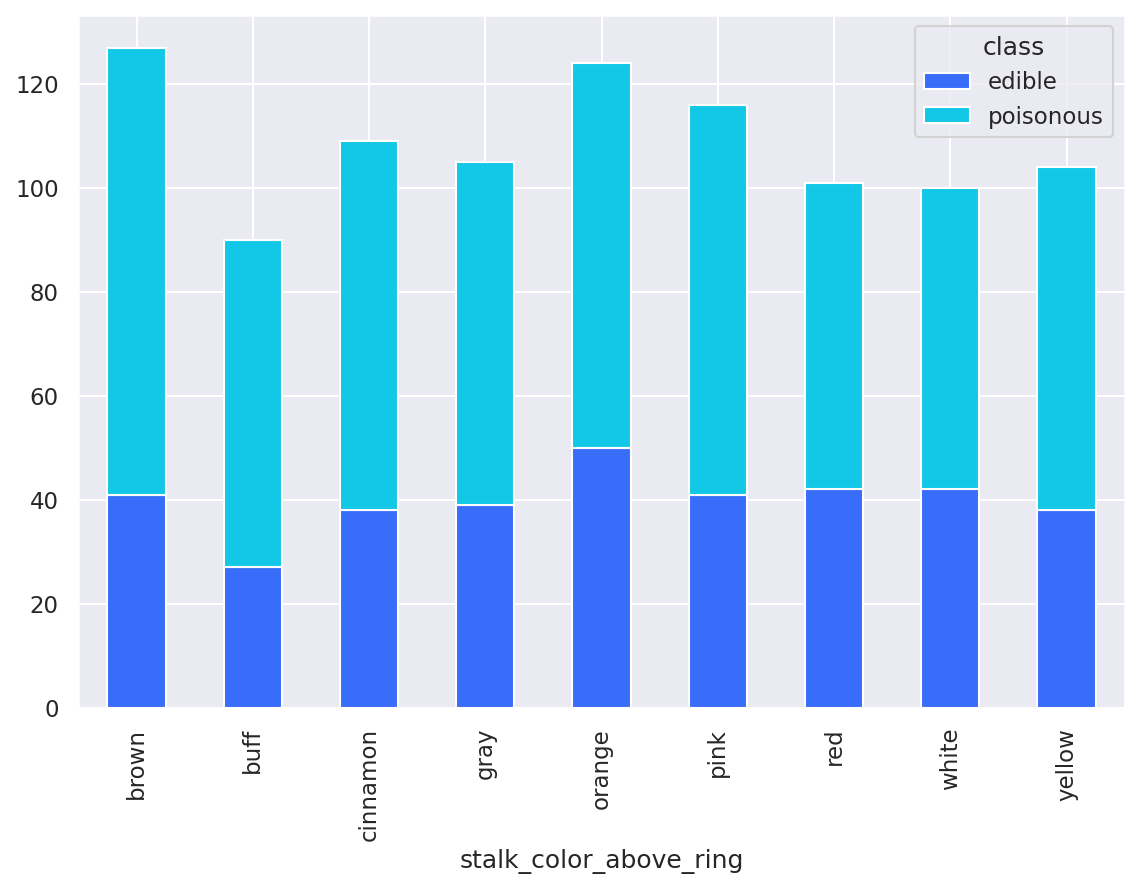

---------------------------------------------------------------------------------------------------


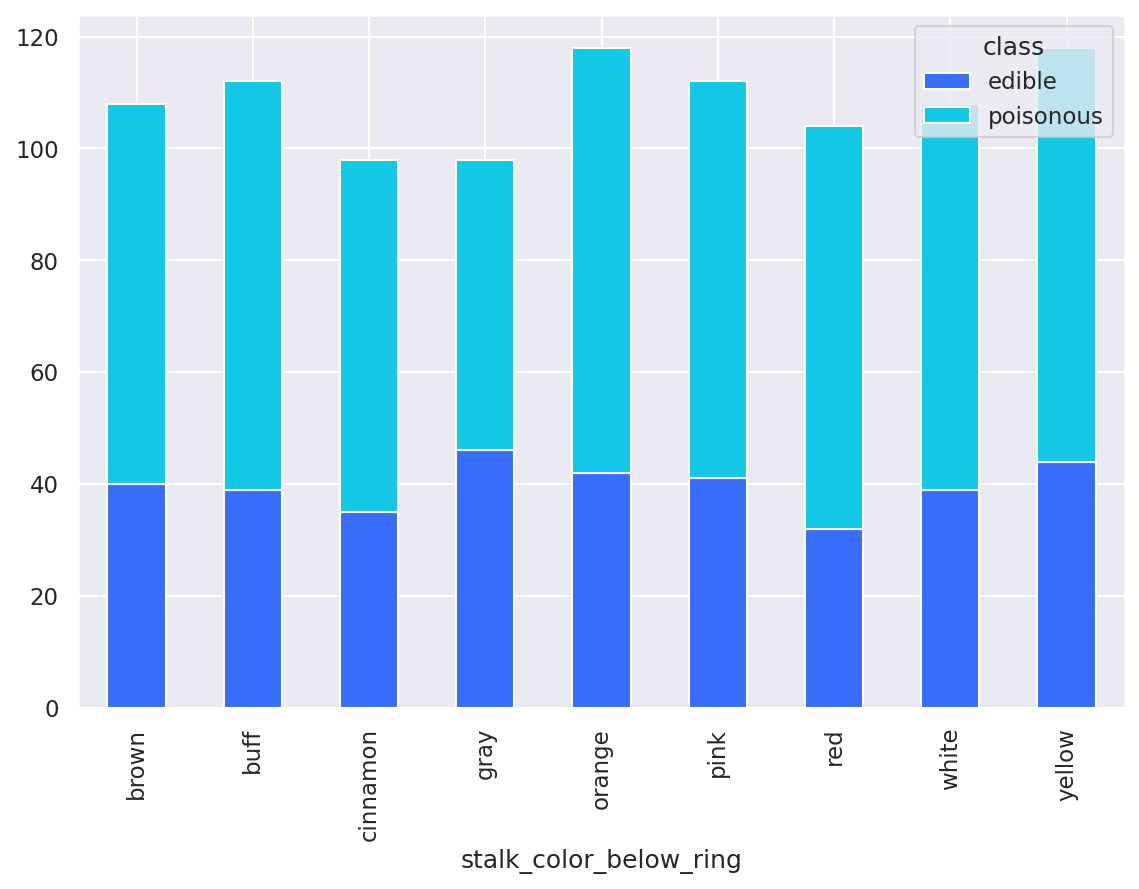

---------------------------------------------------------------------------------------------------


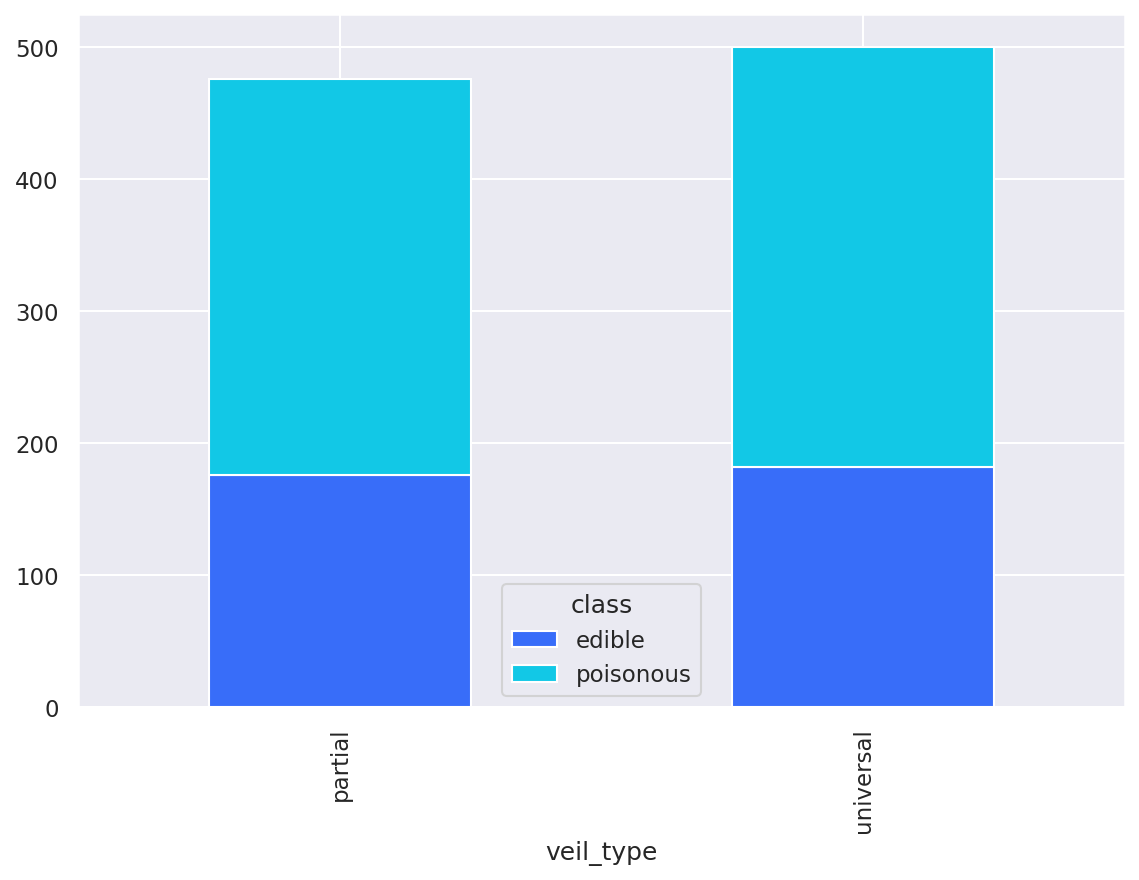

---------------------------------------------------------------------------------------------------


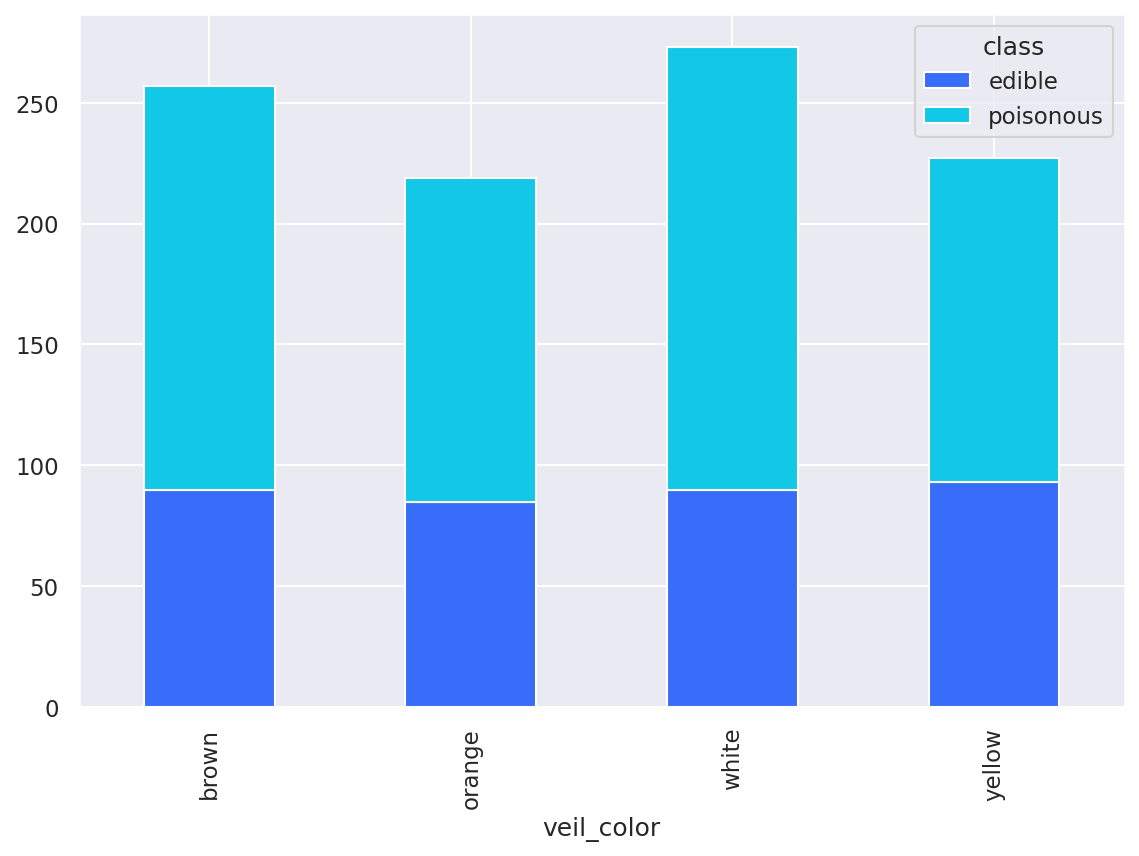

---------------------------------------------------------------------------------------------------


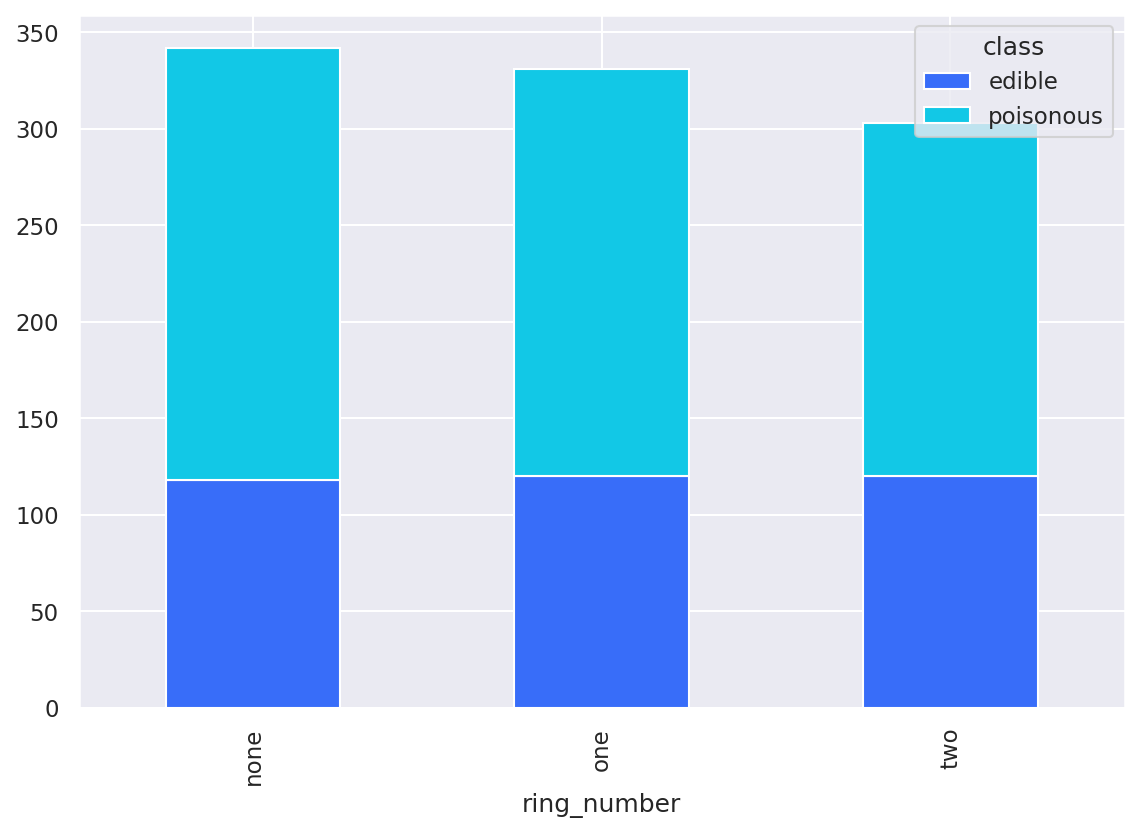

---------------------------------------------------------------------------------------------------


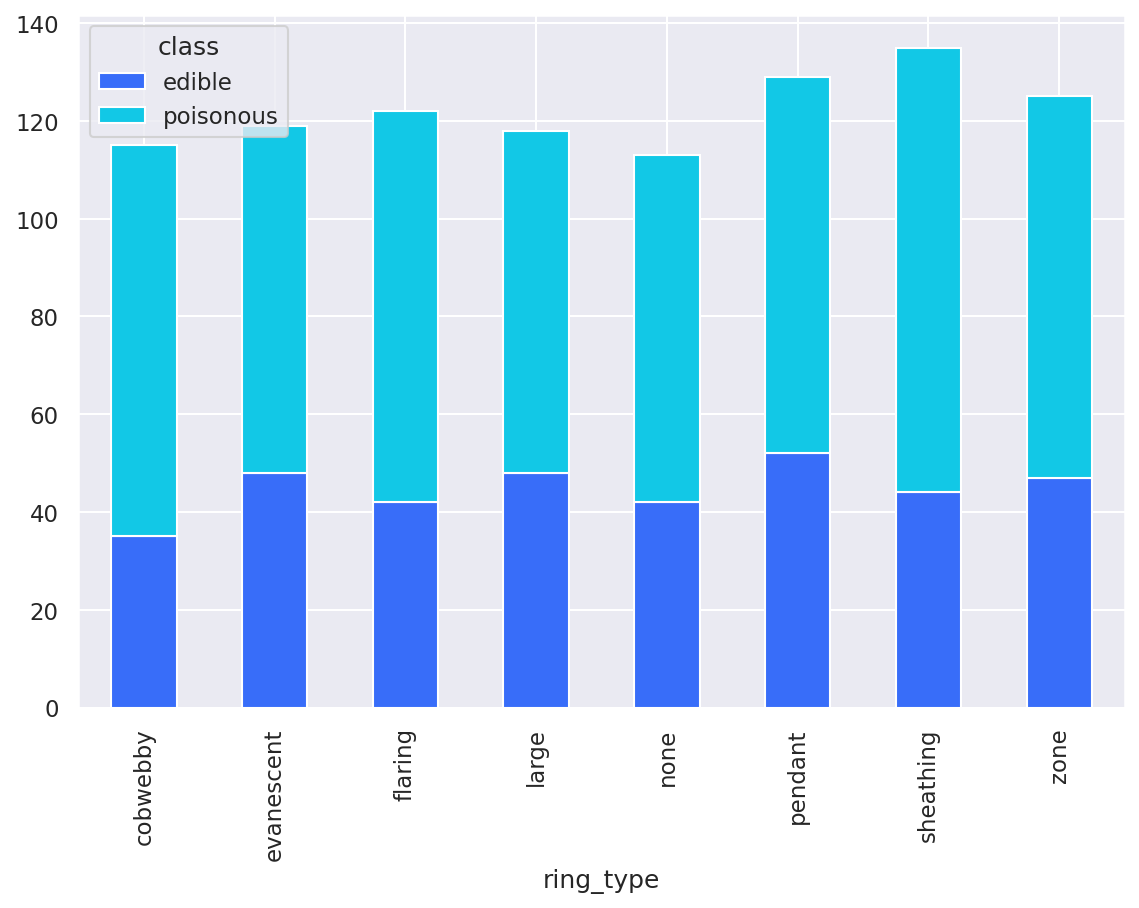

---------------------------------------------------------------------------------------------------


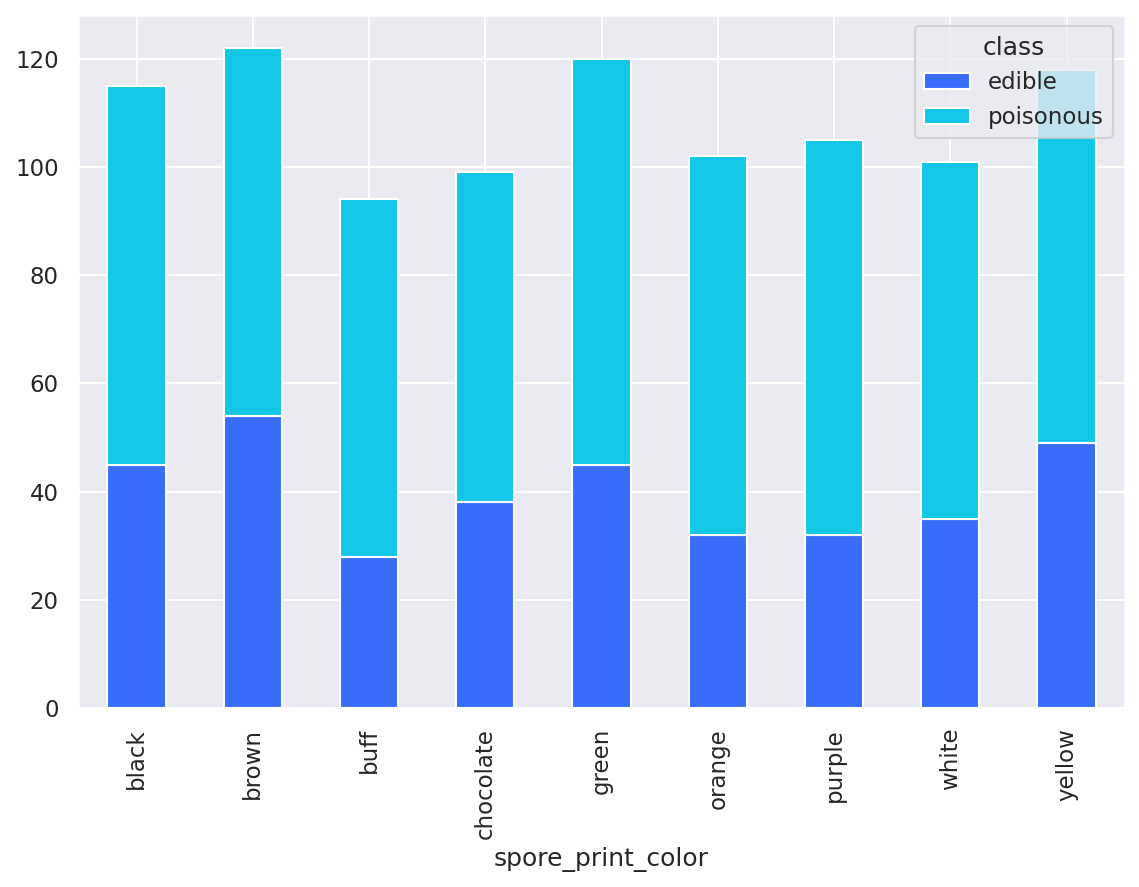

---------------------------------------------------------------------------------------------------


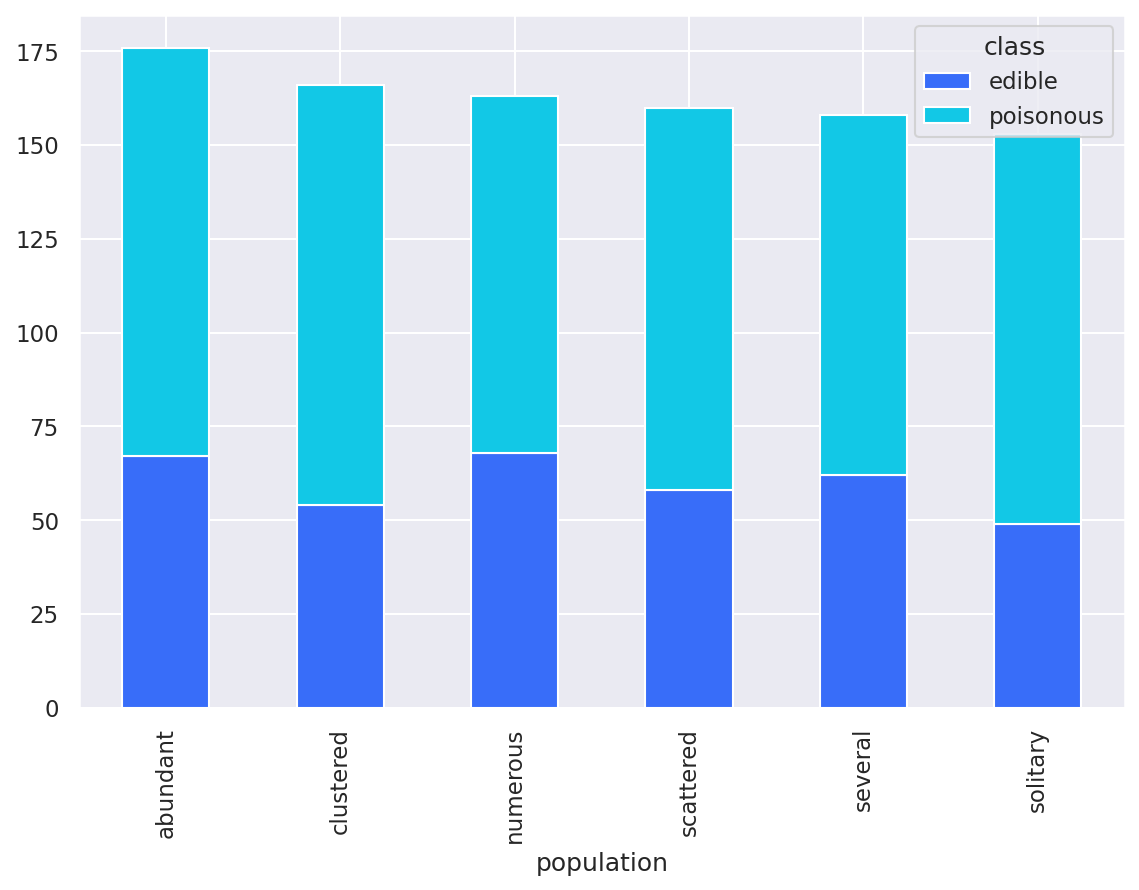

---------------------------------------------------------------------------------------------------


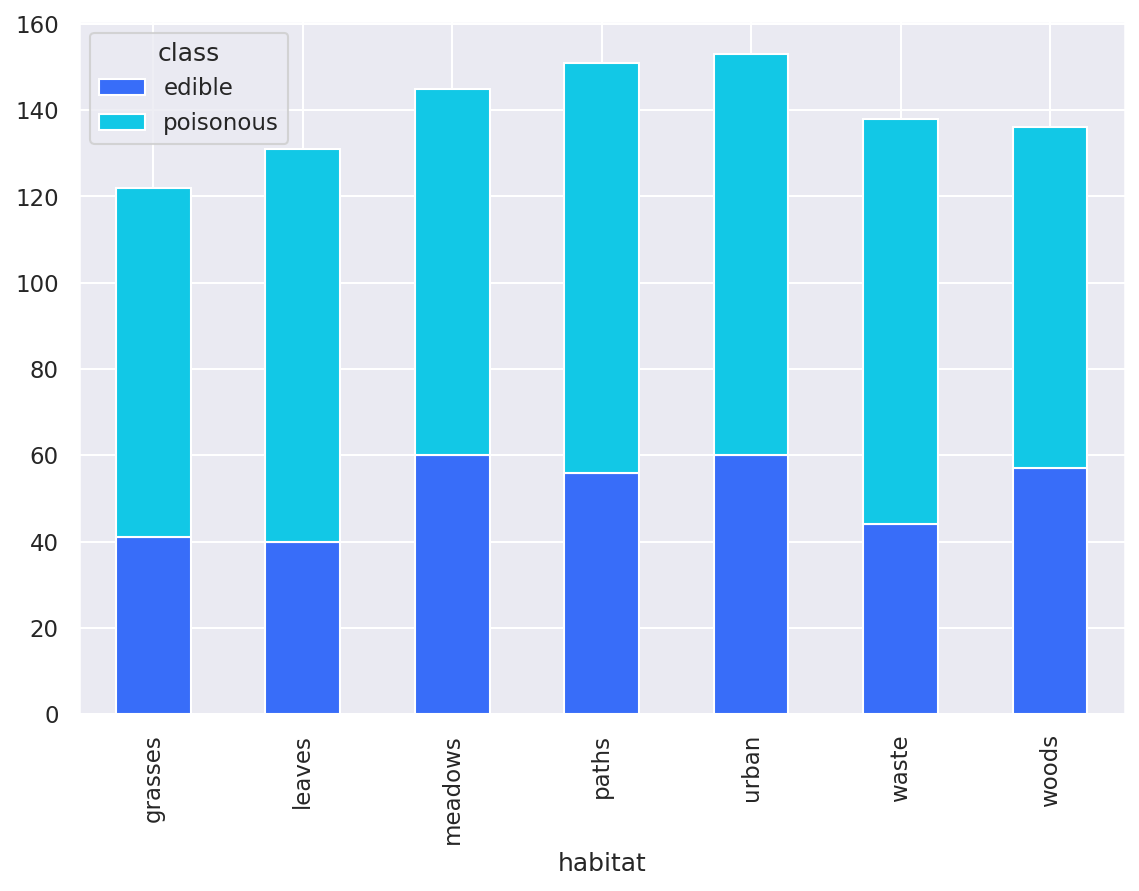

---------------------------------------------------------------------------------------------------


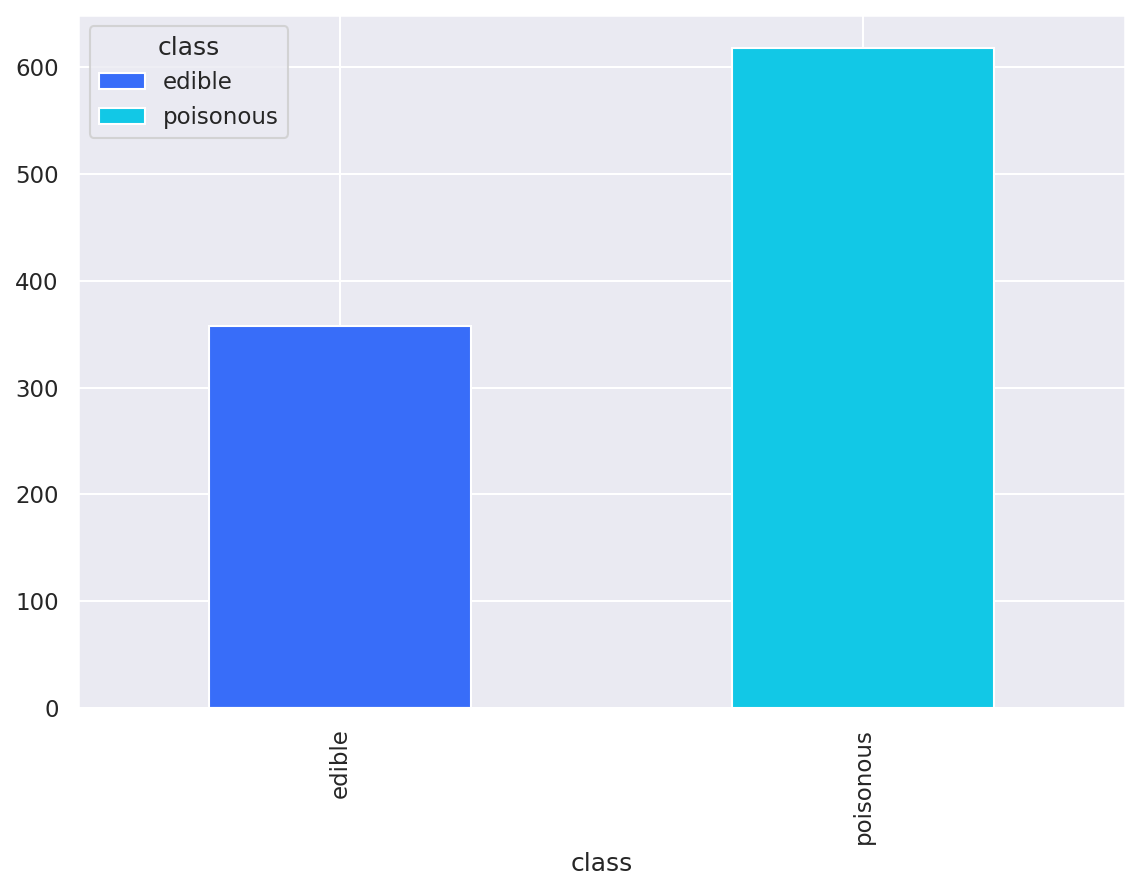

---------------------------------------------------------------------------------------------------


In [15]:
# @title $Groupby$
for col in cat_columns:
  df.groupby([col,'class']).size().unstack().plot(kind='bar', stacked=True)
  plt.show()
  print('---------------------------------------------------------------------------------------------------')

* Distribution of categorical columns is also mostly uniform, except column 'class', which is biased towards poisonous.

In [16]:
# @title $Correlation \ \ for \ \ Numerical \ \ Columns$
df[num_columns].corr()

Unnamed: 0  stalk_height  cap_diameter
Unnamed: 0      1.000000      0.000815      0.042726
stalk_height    0.000815      1.000000     -0.034891
cap_diameter    0.042726     -0.034891      1.000000

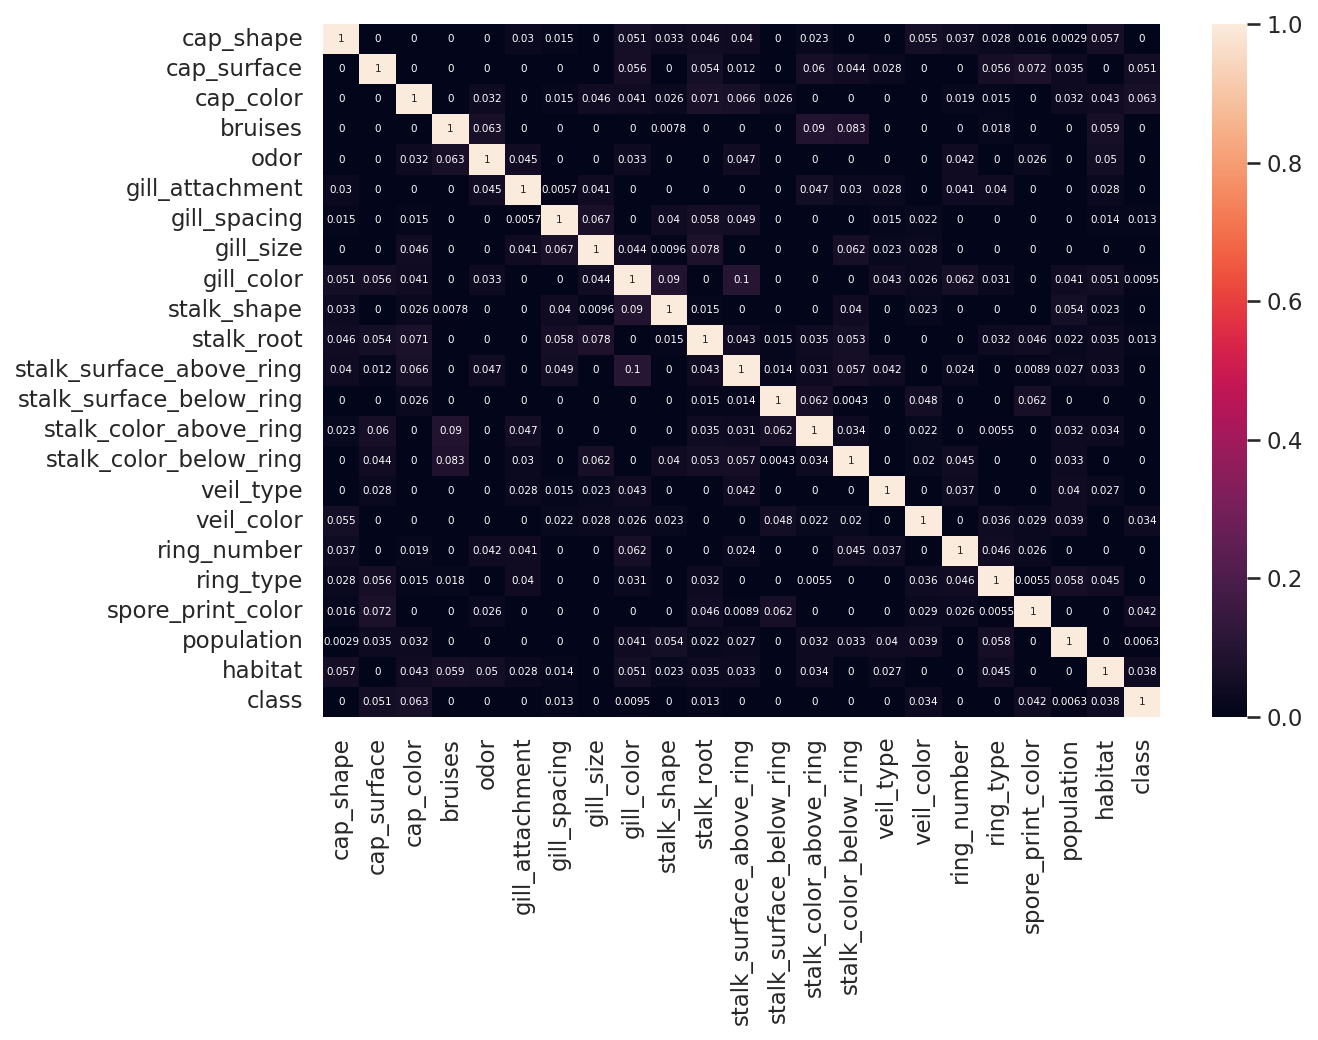

In [17]:
# @title $Correlation \ \ \& \ \ Heatmap \ \ for \ \ Categorical \ \ Columns$
import scipy.stats as ss

# Function to calculate correllation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


# Dictionary of correlation between two featurs
correlation_dict = {}
for col1 in cat_columns:
    for col2 in cat_columns:
        correlation_dict[(col1,col2)]=cramers_v(df[col1],df[col2])


# Extract unique features

# Create a DataFrame with features as both rows and columns
corr_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

# Fill the diagonal with 1s (correlation of a feature with itself)
for col in cat_columns:
    corr_matrix.at[col, col] = 1.0

# Fill in the correlation values from the dictionary
for (col1, col2), corr in correlation_dict.items():
    corr_matrix.at[col1, col2] = corr
    corr_matrix.at[col2, col1] = corr

# Fill NaN values with 0s (if there are any missing correlations)
corr_matrix = corr_matrix.fillna(0)
corr_matrix = pd.DataFrame(corr_matrix)


# Heatmap
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 5})
plt.show()

* There is no strong correlation between any columns

In [97]:
# @title $Encoding$
type = "One_Hot_Encoding" # @param ["Label_Encoding", "One_Hot_Encoding"]

ec_df = df.copy()
if type == "Label_Encoding":
    le = LabelEncoder()
    for col in cat_columns:
        ec_df[col] = le.fit_transform(ec_df[col])

elif type == "One_Hot_Encoding":
    OHColumns = ec_df.columns.tolist()[1:-3]
    print("We perform One-Hot Encoding on the columns :",OHColumns)
    print()
    ec_df = pd.get_dummies(df, columns=OHColumns, dtype=int, drop_first=True)

    print("We also perform Label Encoding on column 'class'.")
    print()
    le = LabelEncoder()
    ec_df['class'] = le.fit_transform(ec_df['class'])


count = 0 # required for next cell
flag = 1 # required for next cell
print("Encoded DataFrame :")
ec_df

We perform One-Hot Encoding on the columns : ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

We also perform Label Encoding on column 'class'.

Encoded DataFrame :


Unnamed: 0  class  stalk_height  cap_diameter  cap_shape_conical  \
0           1167      1     14.276173      5.054983                  0   
1           1037      0      3.952715     19.068319                  0   
2            309      1      9.054265      7.205884                  0   
3            282      1      5.226499     20.932692                  0   
4            820      1     14.037532     12.545245                  0   
...          ...    ...           ...           ...                ...   
1995         863      1      5.877891     17.464145                  0   
1996        1160      1      6.500840     13.501957                  0   
1997         265      1     13.558064     11.270020                  0   
1998         411      1     11.092703      8.423199                  0   
1999        1073      1     13.066414     21.056642                  0   

      cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_grooves  \
0                    0               0                 1                    0   
1                    0               0                 1                    0   
2                    0               1                 0                    1   
3                    0               0                 0                    0   
4                    0               1                 0                    0   
...                ...             ...               ...                  ...   
1995                 0               0                 1                    0   
1996                 0               0                 1                    0   
1997                 1               0                 0                    1   
1998                 0               0                 0                    0   
1999                 1               0                 0                    0   

      cap_surface_scaly  cap_surface_smooth  cap_color_buff  cap_color_gray  \
0                     1                   0               0               0   
1                     0                   0               0               0   
2                     0                   0               0               0   
3                     1                   0               0               0   
4                     0                   1               0               0   
...                 ...                 ...             ...             ...   
1995                  1                   0               0               0   
1996                  1                   0               0               0   
1997                  0                   0               0               0   
1998                  0                   1               0               0   
1999                  1                   0               0               0   

      cap_color_green  cap_color_pink  cap_color_purple  cap_color_red  \
0                   0               0                 0              0   
1                   0               0                 0              1   
2                   0               0                 1              0   
3                   0               1                 0              0   
4                   0               0                 0              0   
...               ...             ...               ...            ...   
1995                0               0                 0              0   
1996                0               0                 1              0   
1997                1               0                 0              0   
1998                0               0                 0              0   
1999                0               0                 0              0   

      cap_color_white  cap_color_yellow  bruises_yes  odor_anise  \
0                   1                 0            0           1   
1                   0                 0            0           1   
2                   0                 0            1           0   
3                   0             

In [98]:
# @title $Drop \ \ column \ \ 'Unnamed: 0'$
drop = "Yes" # @param ["Yes", "No"]

if(count==0):
    temp_df = ec_df.copy()
    count=count+1

if (drop == "Yes" and flag == 1):
    ec_df.drop('Unnamed: 0', axis=1, inplace=True)
    flag=0

elif(drop == "Yes" and flag==0):
    print("Column 'Unnamed: 0' is already droped !")

elif(drop == "No"):
    ec_df = temp_df.copy()
    flag = 1

ec_df

class  stalk_height  cap_diameter  cap_shape_conical  cap_shape_convex  \
0         1     14.276173      5.054983                  0                 0   
1         0      3.952715     19.068319                  0                 0   
2         1      9.054265      7.205884                  0                 0   
3         1      5.226499     20.932692                  0                 0   
4         1     14.037532     12.545245                  0                 0   
...     ...           ...           ...                ...               ...   
1995      1      5.877891     17.464145                  0                 0   
1996      1      6.500840     13.501957                  0                 0   
1997      1     13.558064     11.270020                  0                 1   
1998      1     11.092703      8.423199                  0                 0   
1999      1     13.066414     21.056642                  0                 1   

      cap_shape_flat  cap_shape_sunken  cap_surface_grooves  \
0                  0                 1                    0   
1                  0                 1                    0   
2                  1                 0                    1   
3                  0                 0                    0   
4                  1                 0                    0   
...              ...               ...                  ...   
1995               0                 1                    0   
1996               0                 1                    0   
1997               0                 0                    1   
1998               0                 0                    0   
1999               0                 0                    0   

      cap_surface_scaly  cap_surface_smooth  cap_color_buff  cap_color_gray  \
0                     1                   0               0               0   
1                     0                   0               0               0   
2                     0                   0               0               0   
3                     1                   0               0               0   
4                     0                   1               0               0   
...                 ...                 ...             ...             ...   
1995                  1                   0               0               0   
1996                  1                   0               0               0   
1997                  0                   0               0               0   
1998                  0                   1               0               0   
1999                  1                   0               0               0   

      cap_color_green  cap_color_pink  cap_color_purple  cap_color_red  \
0                   0               0                 0              0   
1                   0               0                 0              1   
2                   0               0                 1              0   
3                   0               1                 0              0   
4                   0               0                 0              0   
...               ...             ...               ...            ...   
1995                0               0                 0              0   
1996                0               0                 1              0   
1997                1               0                 0              0   
1998                0               0                 0              0   
1999                0               0                 0              0   

      cap_color_white  cap_color_yellow  bruises_yes  odor_anise  \
0                   1                 0            0           1   
1                   0                 0            0           1   
2                   0                 0            1           0   
3                   0                 0            1           0   
4                   0                 1            1           0   
...               ...               ...   

In [99]:
# @title $Separate \ \ Independent \ \ Features \ (X) \ \ \& \ \ Dependent \ \ Feature \ (y)$
X = ec_df.drop('class', axis=1)
y = ec_df['class']
print("Shapes")
print("X :", X.shape)
print("y :", y.shape)

Shapes
X : (2000, 104)
y : (2000,)


In [100]:
# @title $Feature Scalling$
scalling_type = "Standard" # @param ["Standard", "MinMax"]

if scalling_type == "Standard":
    scaler = StandardScaler()

elif scalling_type == "MinMax":
    scaler = MinMaxScaler()

scalled_X = scaler.fit_transform(X)
scalled_X = pd.DataFrame(scalled_X, columns=X.columns)

scalled_X.describe()

stalk_height  cap_diameter  cap_shape_conical  cap_shape_convex  \
count  2.000000e+03  2.000000e+03       2.000000e+03      2.000000e+03   
mean   2.131628e-16 -2.007283e-16      -4.263256e-17     -4.263256e-17   
std    1.000250e+00  1.000250e+00       1.000250e+00      1.000250e+00   
min   -1.744753e+00 -1.605536e+00      -4.851087e-01     -4.851087e-01   
25%   -8.543991e-01 -9.352557e-01      -4.851087e-01     -4.851087e-01   
50%   -3.531164e-02 -2.688250e-02      -4.851087e-01     -4.851087e-01   
75%    9.014855e-01  9.059438e-01      -4.851087e-01     -4.851087e-01   
max    1.798004e+00  1.800136e+00       2.061394e+00      2.061394e+00   

       cap_shape_flat  cap_shape_sunken  cap_surface_grooves  \
count    2.000000e+03      2.000000e+03         2.000000e+03   
mean    -1.048051e-16     -1.421085e-17        -7.105427e-18   
std      1.000250e+00      1.000250e+00         1.000250e+00   
min     -5.015620e-01     -5.303112e-01        -5.287632e-01   
25%     -5.015620e-01     -5.303112e-01        -5.287632e-01   
50%     -5.015620e-01     -5.303112e-01        -5.287632e-01   
75%     -5.015620e-01     -5.303112e-01        -5.287632e-01   
max      1.993771e+00      1.885685e+00         1.891206e+00   

       cap_surface_scaly  cap_surface_smooth  cap_color_buff  cap_color_gray  \
count       2.000000e+03        2.000000e+03    2.000000e+03    2.000000e+03   
mean        3.375078e-17        6.750156e-17   -8.881784e-18   -3.197442e-17   
std         1.000250e+00        1.000250e+00    1.000250e+00    1.000250e+00   
min        -6.298000e-01       -5.873584e-01   -3.515615e-01   -3.569254e-01   
25%        -6.298000e-01       -5.873584e-01   -3.515615e-01   -3.569254e-01   
50%        -6.298000e-01       -5.873584e-01   -3.515615e-01   -3.569254e-01   
75%         1.587806e+00        1.702538e+00   -3.515615e-01   -3.569254e-01   
max         1.587806e+00        1.702538e+00    2.844452e+00    2.801706e+00   

       cap_color_green  cap_color_pink  cap_color_purple  cap_color_red  \
count     2.000000e+03    2.000000e+03      2.000000e+03   2.000000e+03   
mean     -2.842171e-17    3.375078e-17      8.304468e-17   3.552714e-17   
std       1.000250e+00    1.000250e+00      1.000250e+00   1.000250e+00   
min      -3.701482e-01   -3.524586e-01     -3.192622e-01  -3.479601e-01   
25%      -3.701482e-01   -3.524586e-01     -3.192622e-01  -3.479601e-01   
50%      -3.701482e-01   -3.524586e-01     -3.192622e-01  -3.479601e-01   
75%      -3.701482e-01   -3.524586e-01     -3.192622e-01  -3.479601e-01   
max       2.701621e+00    2.837212e+00      3.132221e+00   2.873893e+00   

       cap_color_white  cap_color_yellow   bruises_yes    odor_anise  \
count     2.000000e+03      2.000000e+03  2.000000e+03  2.000000e+03   
mean     -4.174439e-17     -1.065814e-17  1.563194e-16  1.114664e-16   
std       1.000250e+00      1.000250e+00  1.000250e+00  1.000250e+00   
min      -3.333333e-01     -3.587035e-01 -1.023271e+00 -3.710208e-01   
25%      -3.333333e-01     -3.587035e-01 -1.023271e+00 -3.710208e-01   
50%      -3.333333e-01     -3.587035e-01  9.772585e-01 -3.710208e-01   
75%      -3.333333e-01     -3.587035e-01  9.772585e-01 -3.710208e-01   
max       3.000000e+00      2.787818e+00  9.772585e-01  2.695267e+00   

       odor_creosote    odor_fishy     odor_foul    odor_musty     odor_none  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   -2.131628e-17 -1.509903e-17  1.776357e-18 -5.329071e-18  3.019807e-17   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -3.305485e-01 -3.587035e-01 -3.984326e-01 -3.683997e-01 -3.135245e-01   
25%    -3.305485e-01 -3.587035e-01 -3.984326e-01 -3.683997e-01 -3.135245e-01   
50%    -3.305485e-01 -3.587035e-01 -3.984326e-01 -3.683997e-01 -3.135245e-01   
75%    -3.305485e-01 -3.587035e-01 -3.984326e-01 -3.683997e-01 -3.135245e-01   
max     3.025274e+00  2.787818e+00  2.509835e+00  2.714443e+00  3.189543e+00 

# Task 4: SVM Implementation

## $PCA $

PCA Explained Variance
[2.17709676 2.06991239 2.02020378 1.95143848 1.91055742 1.8678021
 1.84110389 1.81919169 1.75269472 1.74035975 1.70641513 1.67648739
 1.66215098 1.62595983 1.60368797 1.57127412 1.55848823 1.53621491
 1.5079874  1.48943126 1.48302617 1.44518329 1.41803126 1.41460358
 1.37561611 1.3688523  1.34416584 1.33564052 1.31149901 1.29104279
 1.27894843 1.27276573 1.26006914 1.24896263 1.22854226 1.20506974
 1.20151637 1.18379437 1.17439733 1.1681632  1.13551696 1.13130123
 1.11023767 1.08895916 1.07582731 1.07328212 1.06123149 1.04767008
 1.04616366 1.02160345 1.01236387 1.00216942 0.99950071 0.97984326
 0.94716009 0.93414901 0.91958676 0.91270019 0.90592747 0.88885822
 0.88404728 0.8721806  0.85164374 0.84317953 0.83801433 0.82887066
 0.81321404 0.80488542 0.79061761 0.78338833 0.76624784 0.75409604
 0.74987378 0.72876269 0.71488141 0.69932717 0.68393683 0.67078886
 0.65948909 0.64356565 0.63704043 0.61396284 0.60637383 0.58402878
 0.55578134 0.53098485 0.42646662 0.3865

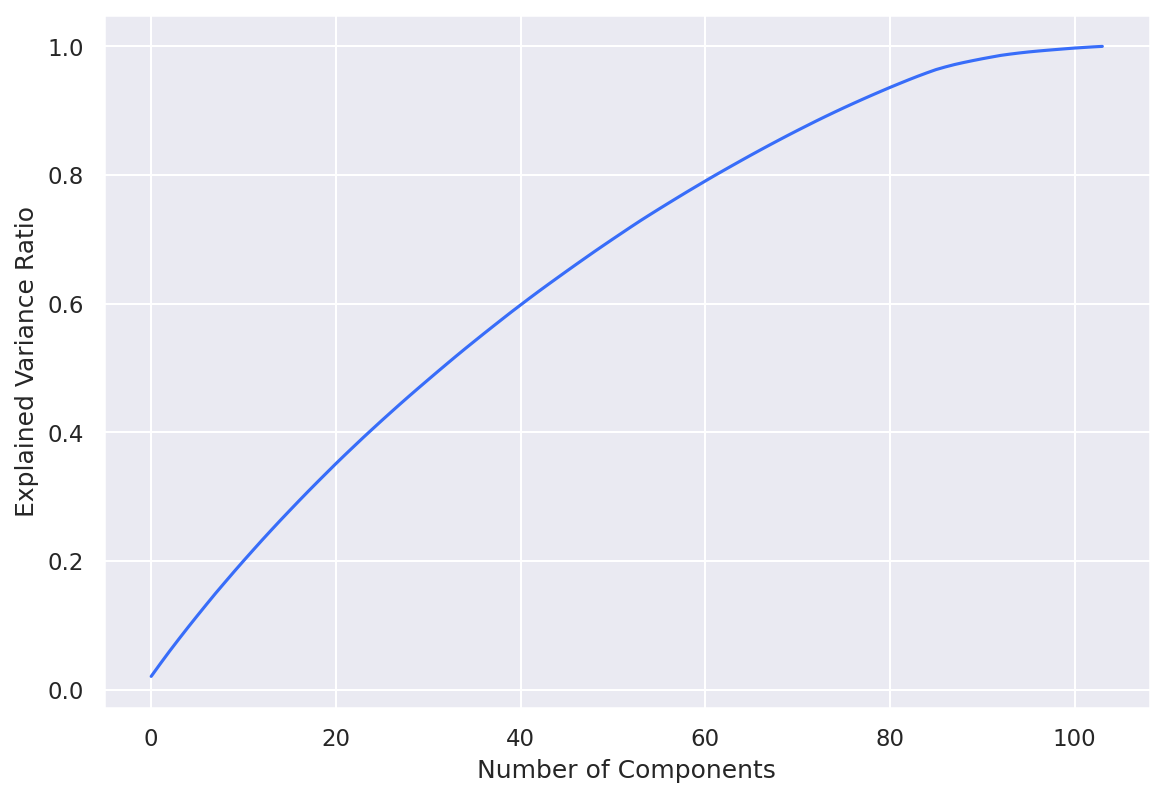

In [101]:
# @title $Implimentation \ \ of \ \ PCA \ \ on \ \ scaled \ \ data$
pca = PCA()
pcs = pca.fit(scalled_X)

print("PCA Explained Variance")
print(pca.explained_variance_)
print()
print("Cumulative PCA Explained Variance")
print(np.cumsum(pca.explained_variance_ratio_))
print()
print("Scree Plot")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [102]:
# @title $Choose \ \ PCA \ \ Components$
n_comp = 80 # @param {type:"integer"}

pca = PCA(n_components=n_comp)
pcs = pca.fit_transform(scalled_X)

pca_col_names = [('PC'+str(i)) for i in range(1,n_comp+1)]
pca_data = pd.DataFrame(pcs, columns=pca_col_names)
pca_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.485542 -1.284742  2.129251  1.461880  0.140931  0.879728  0.926873   
1 -0.927503  0.129693 -0.605953 -1.461178  1.863755 -0.425655  1.635726   
2  0.436232  0.064526  1.042846  1.832279  0.850956  0.366103  1.157341   
3 -0.363449 -0.758659 -1.041306 -0.564119  0.711355 -0.125056 -0.486633   
4 -3.276547 -0.000253 -1.317744 -1.340935  1.274033 -0.076642  0.766308   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.728371  0.489920 -1.935640 -0.546016 -0.341502  0.341497  0.021304   
1 -0.219947 -0.082800 -0.920671  0.199268 -0.787796  1.388711  0.379689   
2  0.161562 -1.075284  2.179733 -1.178320 -1.387377  0.364240  0.017219   
3  0.884502  0.702594 -1.289403 -0.783317  0.215521  1.638285 -0.377475   
4  1.600525 -0.087135  0.158859  0.910163  0.146114 -2.076340  0.139226   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.329044 -2.010139  0.564384 -1.831239 -0.819525 -0.808296 -0.701153   
1 -1.444437  1.795755  1.191974  0.791485 -1.977427 -1.336240  0.908472   
2  2.072032  0.601254  0.522163 -0.851199  0.282732 -2.369690 -2.137124   
3 -0.693626 -0.090219  0.025286 -0.398805 -0.015277 -0.321632  1.475741   
4  0.833095 -0.659900  0.287394 -1.382595  0.718562  2.531754 -1.227093   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -1.140081 -1.890053  0.242582 -0.941596  2.174537  0.696523  0.069442   
1 -2.290314 -0.643127  0.247439 -0.116580 -0.283948  2.036571  0.564626   
2  0.775078 -0.835190  1.848373 -1.767995  0.548140 -0.702728 -0.533457   
3  1.586344 -0.084011 -1.086930  1.342357  2.148486 -2.254221  0.348443   
4  0.930578  1.033525 -1.143006 -1.472554 -0.950344 -0.983823  0.543883   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  2.146180  1.278916 -2.097166  1.130086 -2.848244 -0.313807  0.658796   
1  1.676421  0.193913 -0.037406  0.941536 -0.880316 -0.911883  0.272145   
2 -0.357978  1.385213  1.408137 -3.206104 -0.778356  1.143608 -0.562532   
3 -3.039585 -0.765493 -0.657815 -0.553113 -1.268408  2.699576  1.924647   
4  1.596983  0.719584  0.797025  0.427750 -1.081562 -0.023540 -1.839448   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0  1.704668 -0.486875  0.811253  0.752021  1.093206 -1.654955  0.848875   
1  0.021233 -0.316748 -2.274830 -0.217635 -0.706379 -1.353892  3.473445   
2  1.652615 -1.056698 -0.786760  2.399770 -0.427662 -0.861254 -0.049694   
3  0.947926  1.017825 -0.581438 -0.206928  0.564932  0.203206 -0.264071   
4 -1.166806  1.032216  0.117971 -1.839447  1.034493  2.326645  0.571458   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0  1.262599 -2.504669  2.570996 -1.092646 -0.072752  1.093757  1.021178   
1  1.817497 -0.128007 -0.535720 -0.301887 -0.514661 -0.288458  1.919986   
2  2.390318 -0.908912 -1.045932 -0.026887  0.427763 -0.352749  2.475889   
3  1.132692  0.831940  0.331123 -1.092962 -1.998735 -0.818902  0.959558   
4  0.580855 -0.410873 -1.425087 -0.795903 -0.542560  0.287150  0.969535   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0 -1.139171 -0.817811  0.636131  2.076690  1.467455  0.117149  0.193405   
1  1.707949  1.464352  1.152720  0.180009 -0.787989 -0.558819  0.123802   
2 -0.689793 -1.617988 -0.537250 -0.796258 -1.771093 -0.370002  2.408215   
3  1.247133 -0.468346 -1.008300 -0.489394  0.060302 -0.187999 -0.805924   
4 -1.192668 -1.236010  0.888656 -0.550317 -0.121154  0.548152 -1.769501   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0 -0.286529  0.501306  0.032043  0.823420  0.521586 -0.230387  1.487577   
1 -1.553932 -0.209080 -0.891736 -0.609455  0.365244  1.522274  0.892474   
2 -0.904369  0.838365 -0.977970  0.421362 -0.702141  0.583512  0.807643   
3 -0.260236  1.375046 -0.429659 -0.655031  0.690336  0.882814 -1.152381   
4  1.413820  0.885415 -0.

In [103]:
# @title $Train-Test \ \ Split$
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=1234)
print("Shapes")
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

Shapes
X_train : (1600, 80)
X_test  : (400, 80)
y_train : (1600,)
y_test  : (400,)


## $Support \ \ Vector \ \ Classifier \ \ Model$

In [104]:
# @title $Function \ \ for \ \ Final \ \ Model \ \ Performance$

def final_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(f"1) Train Accuracy : {model.score(X_train,y_train)}")

    print(f"2) Test Accuracy : {model.score(X_test,y_test)}")

    print('3) Classification Report :')
    print(classification_report(y_test,y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('4) ROC_AUC Score :', roc_auc)
    print("5) Poisonous :", sum(y_pred!=0))
    print("6) Edible : ", sum(y_pred==0))

    print()
    print('7) Confusion Matrix :')
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(cm)

In [105]:
# @title $SVC \ \ Model$

from sklearn.svm import SVC

model1 = SVC(random_state=1234)
model1.fit(X_train, y_train)

final_model(model1)

1) Train Accuracy : 0.951875
2) Test Accuracy : 0.84
3) Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.53      0.67       121
           1       0.83      0.97      0.89       279

    accuracy                           0.84       400
   macro avg       0.86      0.75      0.78       400
weighted avg       0.85      0.84      0.83       400

4) ROC_AUC Score : 0.7519180070499718
5) Poisonous : 329
6) Edible :  71

7) Confusion Matrix :
[[ 64  57]
 [  7 272]]


# Task 6: Parameter Tuning and Optimization

In [138]:
# @title $Function \ \ for \ \ Hyperparameter \ \ Tunning \ \ using \ \ GridSearchCV$
def hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test):
    rf_random = GridSearchCV(model, random_grid, cv=5)
    rf_random.fit(X_train, y_train)
    y_pred = rf_random.predict(X_test)
    print(f"1) Train Accuracy : {rf_random.score(X_train,y_train)}")
    print(f"2) Test Accuracy : {rf_random.score(X_test,y_test)}")
    print('3) Classification Report')
    print(classification_report(y_test,y_pred))
    print("4) Best Score :", rf_random.best_score_)
    print("5) Best Parameters :",rf_random.best_params_)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc
    print('6) ROC_AUC Score :', roc_auc)
    print("7) Poisonous :", sum(y_pred!=0))
    print("8) Edible : ", sum(y_pred==0))
    print(f"9) Confusion matrix : \n {confusion_matrix(y_test, y_pred)}\n")

In [114]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ class\_weight $
model = SVC()
random_grid = {'class_weight': ['balanced', None]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 0.99125
2) Test Accuracy : 0.85
3) Classification Report
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       121
           1       0.88      0.91      0.89       279

    accuracy                           0.85       400
   macro avg       0.83      0.81      0.82       400
weighted avg       0.85      0.85      0.85       400

4) Best Score : 0.825
5) Best Parameters : {'class_weight': 'balanced'}
6) ROC_AUC Score : 0.812909150152552
7) Poisonous : 287
8) Edible :  113
9) Confusion matrix : 
 [[ 87  34]
 [ 26 253]]



In [115]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ C$
model = SVC(random_state=1234, class_weight='balanced')
random_grid = {'C': np.linspace(start=1, stop=11, num=41)}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8625
3) Classification Report
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       121
           1       0.88      0.94      0.90       279

    accuracy                           0.86       400
   macro avg       0.85      0.81      0.83       400
weighted avg       0.86      0.86      0.86       400

4) Best Score : 0.8368749999999998
5) Best Parameters : {'C': 3.75}
6) ROC_AUC Score : 0.8148493735004
7) Poisonous : 298
8) Edible :  102
9) Confusion matrix : 
 [[ 84  37]
 [ 18 261]]



In [116]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ kernel$
model = SVC(random_state=1234, class_weight='balanced', C=3.75)
random_grid = {'kernel': ['rbf', 'sigmoid','poly']}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.875
3) Classification Report
              precision    recall  f1-score   support

           0       0.93      0.64      0.75       121
           1       0.86      0.98      0.92       279

    accuracy                           0.88       400
   macro avg       0.89      0.81      0.84       400
weighted avg       0.88      0.88      0.87       400

4) Best Score : 0.858125
5) Best Parameters : {'kernel': 'poly'}
6) ROC_AUC Score : 0.8074291300097751
7) Poisonous : 317
8) Edible :  83
9) Confusion matrix : 
 [[ 77  44]
 [  6 273]]



In [120]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ degree$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly')
random_grid = {'degree': [int(i) for i in range(10)]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {'degree': 4}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [125]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ coef0$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4)
random_grid = {'coef0': [0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.0075, 0.1, 0.125, 0.15]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8825
3) Classification Report
              precision    recall  f1-score   support

           0       0.97      0.63      0.76       121
           1       0.86      0.99      0.92       279

    accuracy                           0.88       400
   macro avg       0.92      0.81      0.84       400
weighted avg       0.89      0.88      0.87       400

4) Best Score : 0.8618750000000001
5) Best Parameters : {'coef0': 0.1}
6) ROC_AUC Score : 0.8104653573861785
7) Poisonous : 322
8) Edible :  78
9) Confusion matrix : 
 [[ 76  45]
 [  2 277]]



* We will try to keep Precision of Edible is 1, i.e. false negative as 0. So we will not choose this value of 'coef0'

In [126]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ shrinking$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4)
random_grid = {'shrinking': [True,False]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {'shrinking': True}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [127]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ probability$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4)
random_grid = {'probability': [True,False]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {'probability': True}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [131]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ tol$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4, shrinking=True, probability=True)
random_grid = {'tol': [0.0001,0.001,0.01,0.1, 0.00001]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {'tol': 0.0001}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [132]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ cache\_size $
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4, shrinking=True, probability=True, tol=0.0001)
random_grid = {'cache_size': [1,10,20,50,100,150,200,300,500,1000]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {'cache_size': 1}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [137]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ verbose$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4, shrinking=True, probability=True, cache_size=1)
random_grid = {'verbose': [True, False]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8712499999999999
5) Best Parameters : {'verbose': True}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [139]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ max\_iter$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4, shrinking=True, probability=True, cache_size=1, verbose=True)
random_grid = {'max_iter': [-1]}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {'max_iter': -1}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [141]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ decision\_function\_shape$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4, shrinking=True, probability=True, cache_size=1, verbose=True)
random_grid = {'decision_function_shape': ['ovo', 'ovr']}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {'decision_function_shape': 'ovo'}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [143]:
# @title $Hyperparameter \ \ Tunning \ \ for \ \ decision\_function\_shape$
model = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4)
random_grid = {}
hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) Best Score : 0.8612500000000001
5) Best Parameters : {}
6) ROC_AUC Score : 0.8140495867768596
7) Poisonous : 324
8) Edible :  76
9) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [147]:
# @title $SVC \ \ Model \ \ with \ \ best \ \ parameters$
Model1 = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4)
Model1.fit(X_train, y_train)

y_pred = Model1.predict(X_test)
print(f"1) Train Accuracy : {Model1.score(X_train,y_train)}")
print(f"2) Test Accuracy : {Model1.score(X_test,y_test)}")
print('3) Classification Report')
print(classification_report(y_test,y_pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
print('4) ROC_AUC Score :', roc_auc)
print("5) Poisonous :", sum(y_pred!=0))
print("6) Edible : ", sum(y_pred==0))
print(f"7) Confusion matrix : \n {confusion_matrix(y_test, y_pred)}\n")

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

4) ROC_AUC Score : 0.8140495867768596
5) Poisonous : 324
6) Edible :  76
7) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



In [154]:
# @title $Bagging$

from sklearn.ensemble import BaggingClassifier

# Define model
svm = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel='poly', degree=4)

model = BaggingClassifier(estimator=svm, n_estimators=1000, max_samples=1.0,
                          max_features=0.5, bootstrap=True, bootstrap_features=False,
                          oob_score=False, warm_start=False, random_state=None,
                          verbose=1, base_estimator='deprecated')



if(True):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"1) Train Accuracy : {model.score(X_train,y_train)}")
    print(f"2) Test Accuracy : {model.score(X_test,y_test)}")
    print('3) Classification Report')
    print(classification_report(y_test,y_pred))
    #print("4) Best Score :", grid.best_score_)
    #print("5) Best Parameters :",grid.best_params_)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc
    print('6) ROC_AUC Score :', roc_auc)
    print(f"7) Confusion matrix : \n {confusion_matrix(y_test, y_pred)}\n")

1) Train Accuracy : 1.0
2) Test Accuracy : 0.8875
3) Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       121
           1       0.86      1.00      0.93       279

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400

6) ROC_AUC Score : 0.8140495867768596
7) Confusion matrix : 
 [[ 76  45]
 [  0 279]]



* We got same accuracy with Bagging also

# Task 5: Visualization of SVM Results

In [190]:
# @title $Separate \ \ out \ \ Test \ \ Data$
features = df.drop('class', axis=1)
target = df['class']

feat_train, feat_test, target_train, target_test = train_test_split(features, y, test_size=0.2, random_state=1234)

test_data = feat_test.copy()
test_data['class']=y_test
test_data['predicted_class']=y_pred

test_data['class'].replace({0: 'Edible', 1: 'Poisonous'}, inplace=True)
test_data['predicted_class'].replace({0: 'Edible', 1: 'Poisonous'}, inplace=True)
test_data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
1748         472      flat     fibrous     white     yes    musty   
934          733    sunken       scaly     green     yes    anise   
1033         114      flat       scaly     white      no    anise   
243         1007   conical     grooves     green     yes  pungent   
928          856      flat     fibrous      pink      no    spicy   
...          ...       ...         ...       ...     ...      ...   
1515         337   conical       scaly     brown     yes    musty   
858           69    sunken     grooves       red      no   almond   
1766         253   conical     fibrous     green     yes  pungent   
1353         812      bell     fibrous     brown     yes    anise   
162          218      flat       scaly     brown     yes     none   

     gill_attachment gill_spacing gill_size gill_color stalk_shape  \
1748         notched      crowded     broad      black    tapering   
934             free      crowded     broad     purple   enlarging   
1033         notched      crowded    narrow      black   enlarging   
243         attached        close     broad       gray   enlarging   
928       descending      distant    narrow      white    tapering   
...              ...          ...       ...        ...         ...   
1515         notched      crowded     broad      green   enlarging   
858             free      distant     broad      white    tapering   
1766         notched        close     broad      green    tapering   
1353         notched      crowded     broad     yellow    tapering   
162          notched        close     broad      green   enlarging   

       stalk_root stalk_surface_above_ring stalk_surface_below_ring  \
1748      missing                    silky                   smooth   
934        rooted                    scaly                   smooth   
1033  rhizomorphs                    scaly                    scaly   
243        rooted                    scaly                  fibrous   
928       bulbous                    scaly                   smooth   
...           ...                      ...                      ...   
1515      bulbous                    scaly                    silky   
858       bulbous                   smooth                  fibrous   
1766         club                   smooth                   smooth   
1353      missing                    scaly                    silky   
162          club                   smooth                   smooth   

     stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
1748                   pink                   pink    partial      brown   
934                   white                   buff  universal      white   
1033                  white                   gray  universal      white   
243                     red                  white  universal      white   
928                   white                   buff    partial     yellow   
...                     ...                    ...        ...        ...   
1515                   gray                 yellow    partial      white   
858                    buff                 yellow    partial     orange   
1766                   gray                   pink  universal      brown   
1353                    red                   gray  universal     orange   
162                   white                  brown  universal      white   

     ring_number   ring_type spore_print_color population  habitat  \
1748         one     flaring            orange   solitary    waste   
934          two     flaring             black   numerous  grasses   
1033         two  evanescent            orange   solitary    woods   
243          one    cobwebby            yellow   solitary  meadows   
928         none        zone             green   numerous   leaves   
...          ...         ...               ...        ...      ...   
1515         one     pendant             black  clustered  grasses   
858       

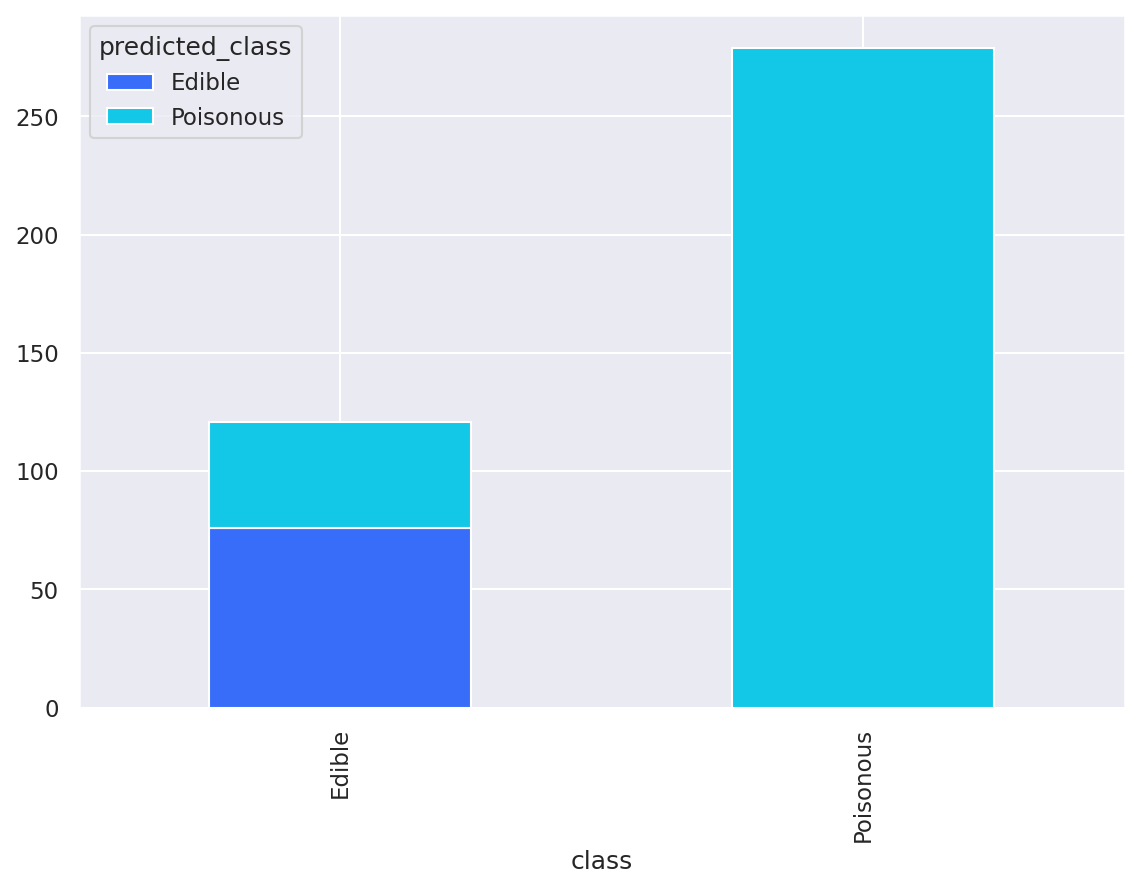

In [180]:
# @title $Groupby$
test_data_cat_columns = test_data.select_dtypes(include='object').columns.tolist()

test_data.groupby(['class','predicted_class']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

* All the Poisonous mushrooms are classified as Poisonous
* From the Edible mushrooms around 1/3rd are classified as Poisonous

In [183]:
# @title $Correctly \ \ Classified \ \ Test \ \ Data$
correct_test_data = test_data[test_data['class']==test_data['predicted_class']]
correct_test_data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
1748         472      flat     fibrous     white     yes    musty   
1033         114      flat       scaly     white      no    anise   
243         1007   conical     grooves     green     yes  pungent   
928          856      flat     fibrous      pink      no    spicy   
1598         206    convex     grooves      buff     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1515         337   conical       scaly     brown     yes    musty   
858           69    sunken     grooves       red      no   almond   
1766         253   conical     fibrous     green     yes  pungent   
1353         812      bell     fibrous     brown     yes    anise   
162          218      flat       scaly     brown     yes     none   

     gill_attachment gill_spacing gill_size gill_color stalk_shape  \
1748         notched      crowded     broad      black    tapering   
1033         notched      crowded    narrow      black   enlarging   
243         attached        close     broad       gray   enlarging   
928       descending      distant    narrow      white    tapering   
1598         notched      crowded     broad       pink    tapering   
...              ...          ...       ...        ...         ...   
1515         notched      crowded     broad      green   enlarging   
858             free      distant     broad      white    tapering   
1766         notched        close     broad      green    tapering   
1353         notched      crowded     broad     yellow    tapering   
162          notched        close     broad      green   enlarging   

       stalk_root stalk_surface_above_ring stalk_surface_below_ring  \
1748      missing                    silky                   smooth   
1033  rhizomorphs                    scaly                    scaly   
243        rooted                    scaly                  fibrous   
928       bulbous                    scaly                   smooth   
1598          cup                   smooth                  fibrous   
...           ...                      ...                      ...   
1515      bulbous                    scaly                    silky   
858       bulbous                   smooth                  fibrous   
1766         club                   smooth                   smooth   
1353      missing                    scaly                    silky   
162          club                   smooth                   smooth   

     stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
1748                   pink                   pink    partial      brown   
1033                  white                   gray  universal      white   
243                     red                  white  universal      white   
928                   white                   buff    partial     yellow   
1598                  brown                    red  universal      brown   
...                     ...                    ...        ...        ...   
1515                   gray                 yellow    partial      white   
858                    buff                 yellow    partial     orange   
1766                   gray                   pink  universal      brown   
1353                    red                   gray  universal     orange   
162                   white                  brown  universal      white   

     ring_number   ring_type spore_print_color population  habitat  \
1748         one     flaring            orange   solitary    waste   
1033         two  evanescent            orange   solitary    woods   
243          one    cobwebby            yellow   solitary  meadows   
928         none        zone             green   numerous   leaves   
1598        none   sheathing             black  clustered    urban   
...          ...         ...               ...        ...      ...   
1515         one     pendant             black  clustered  grasses   
858       

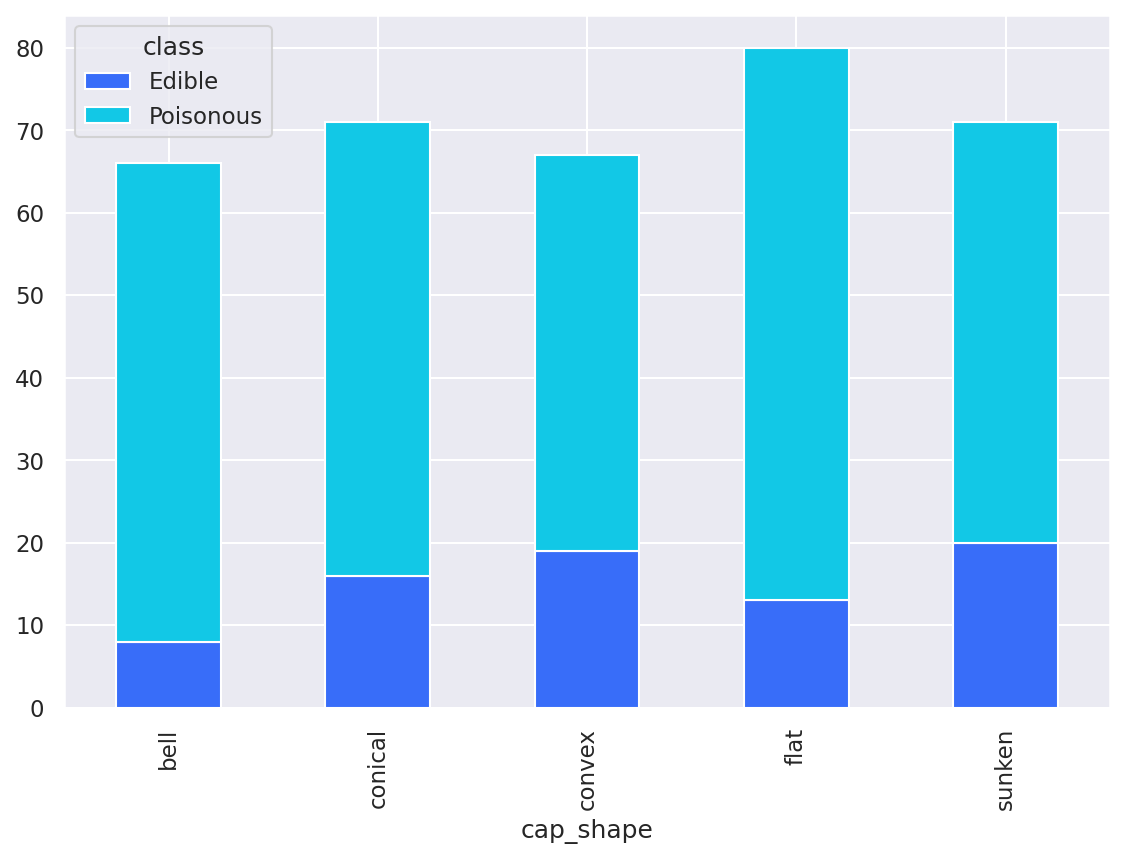

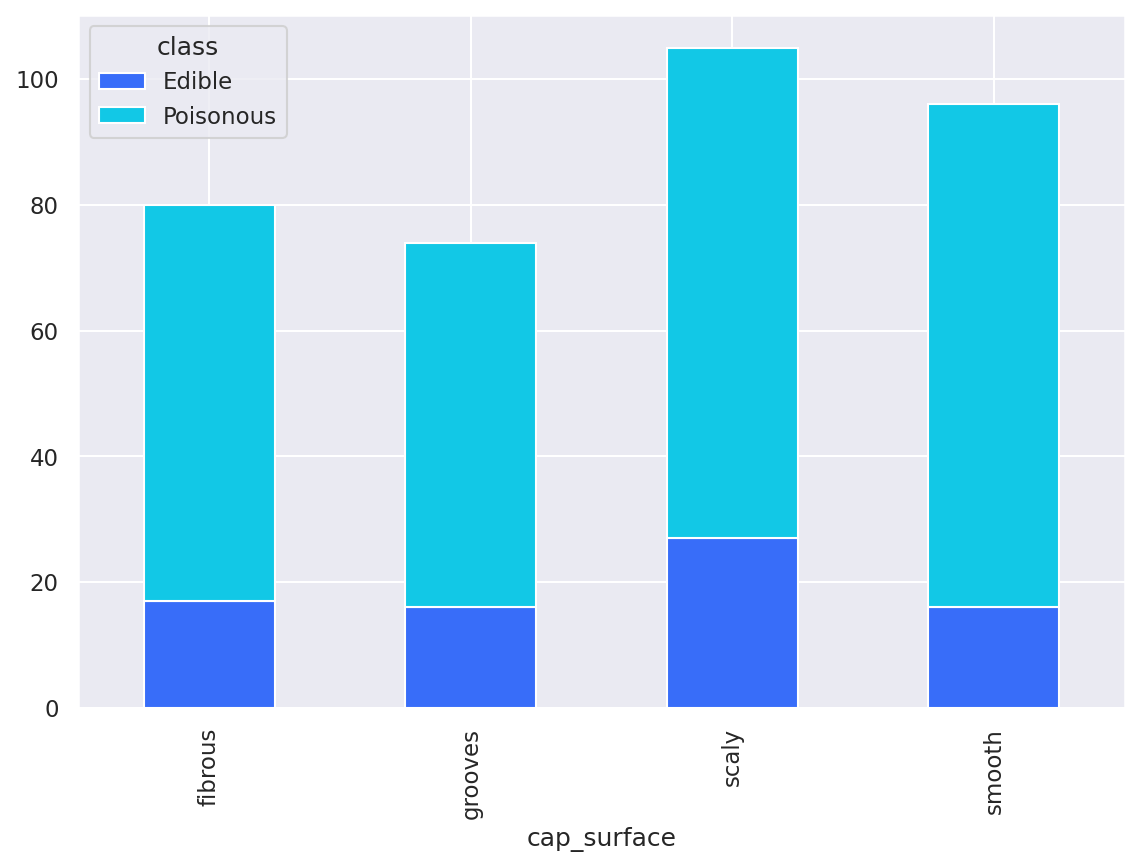

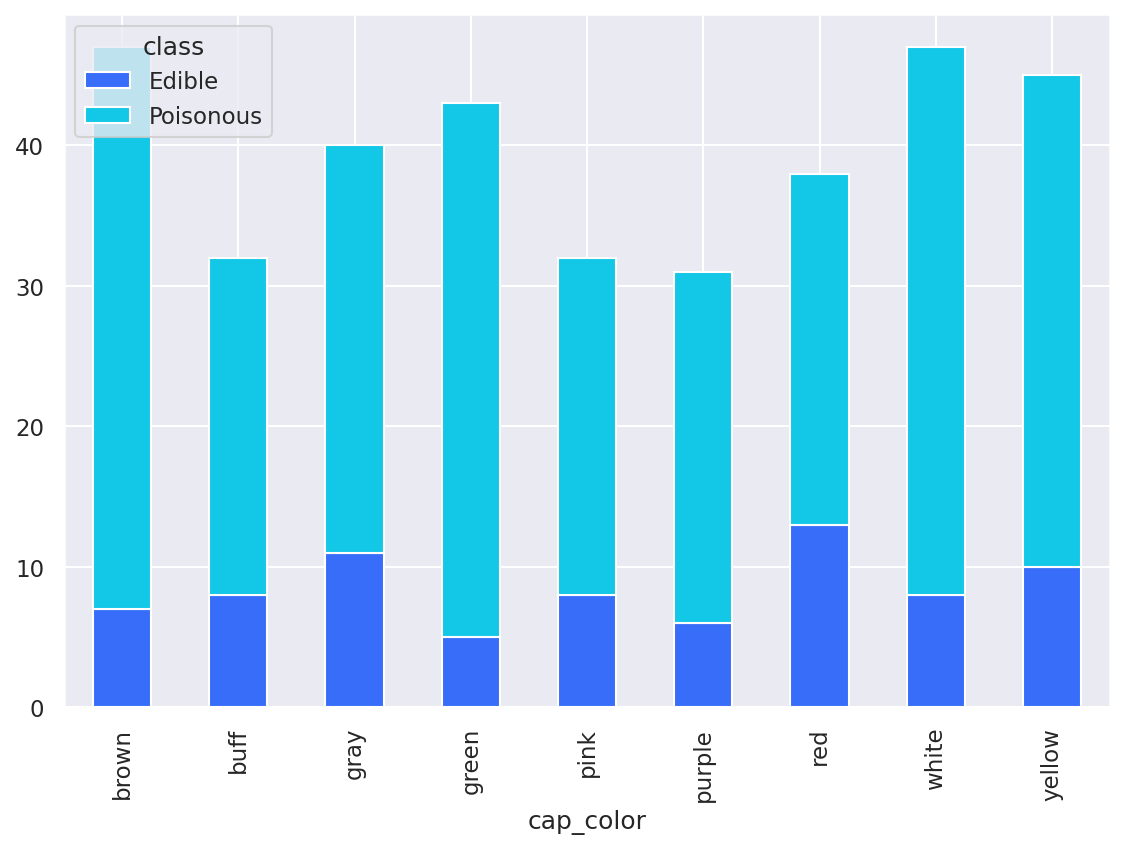

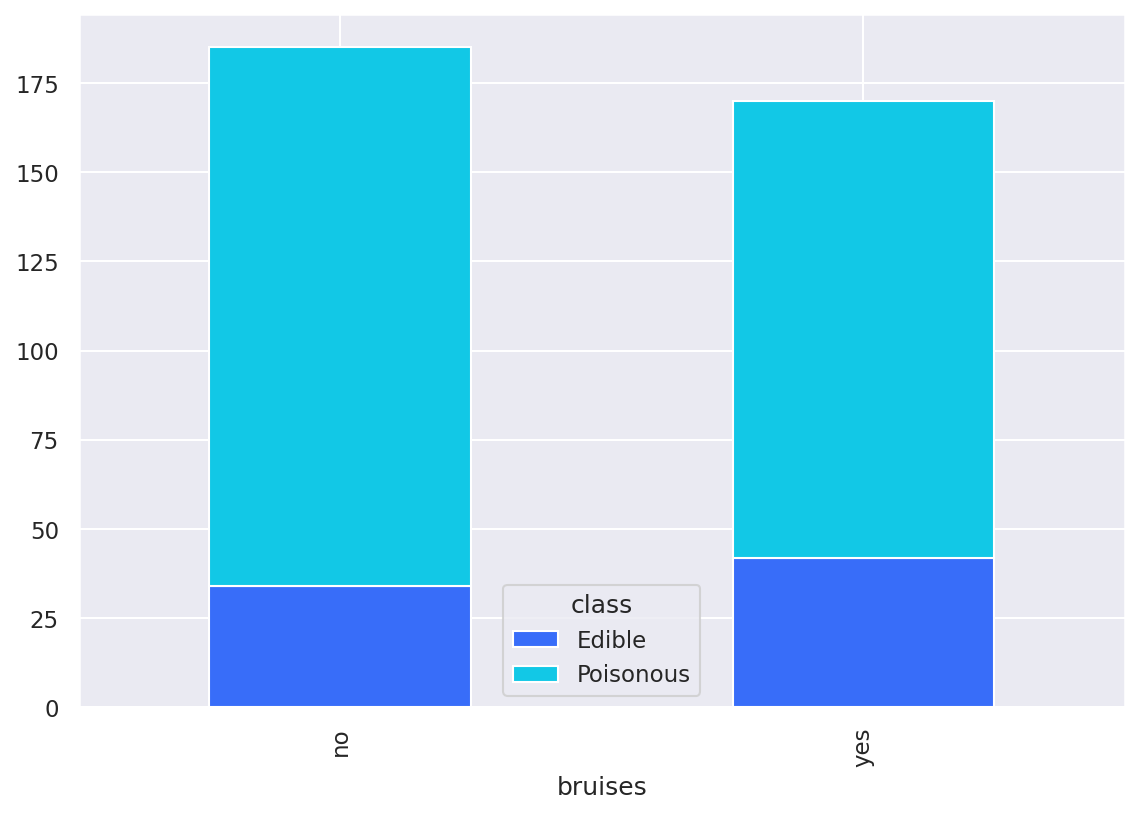

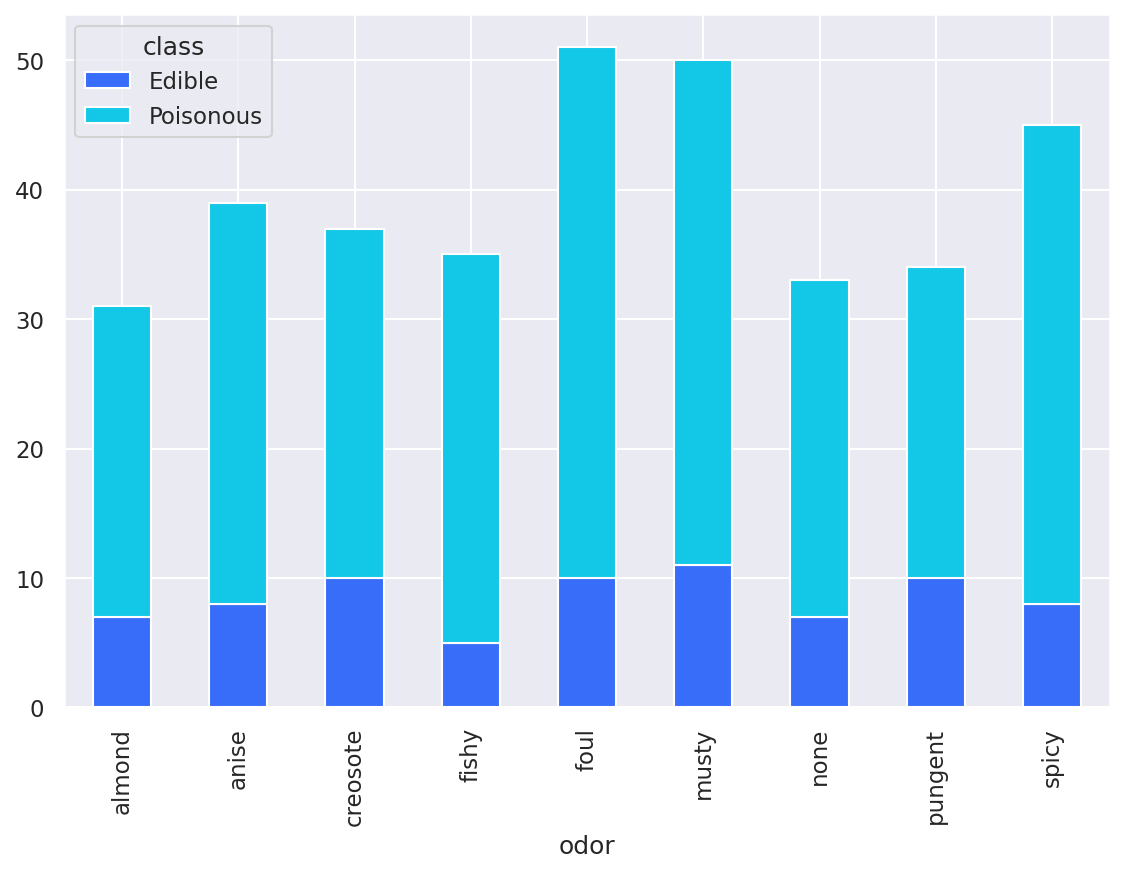

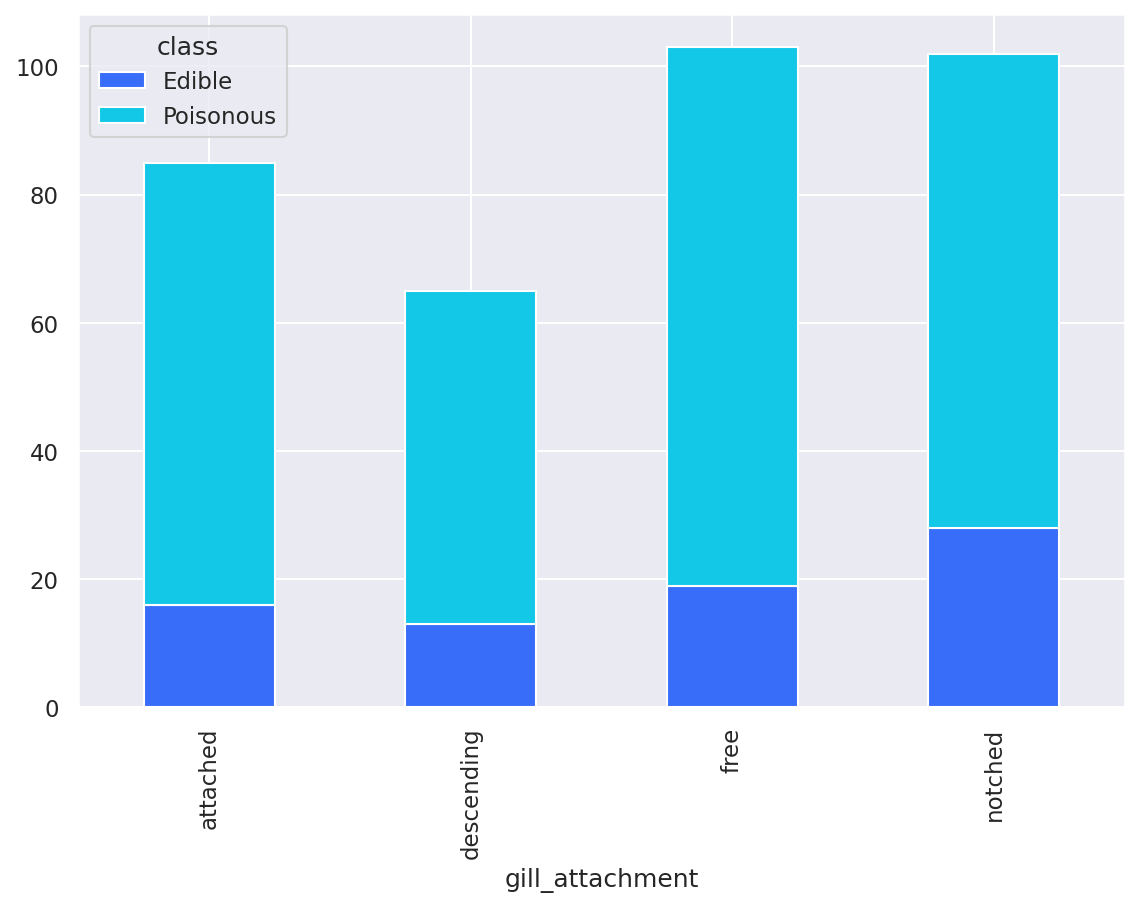

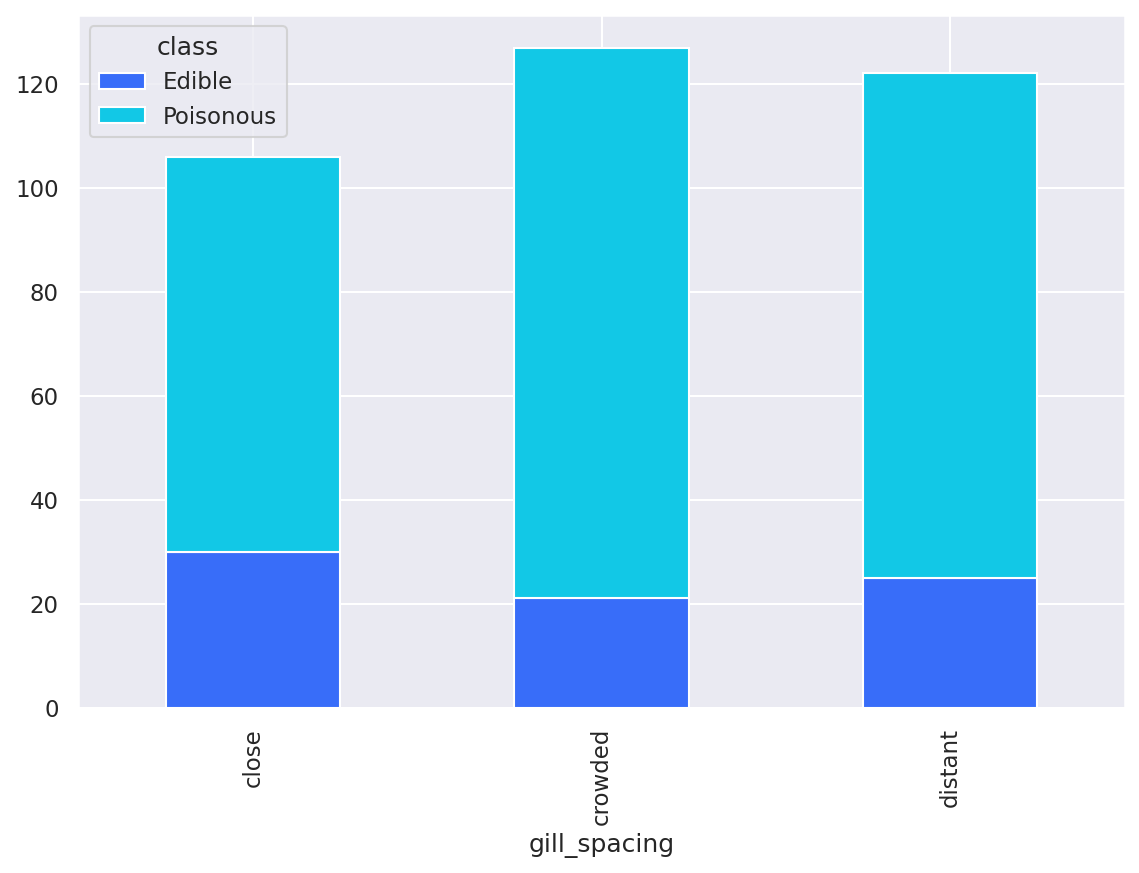

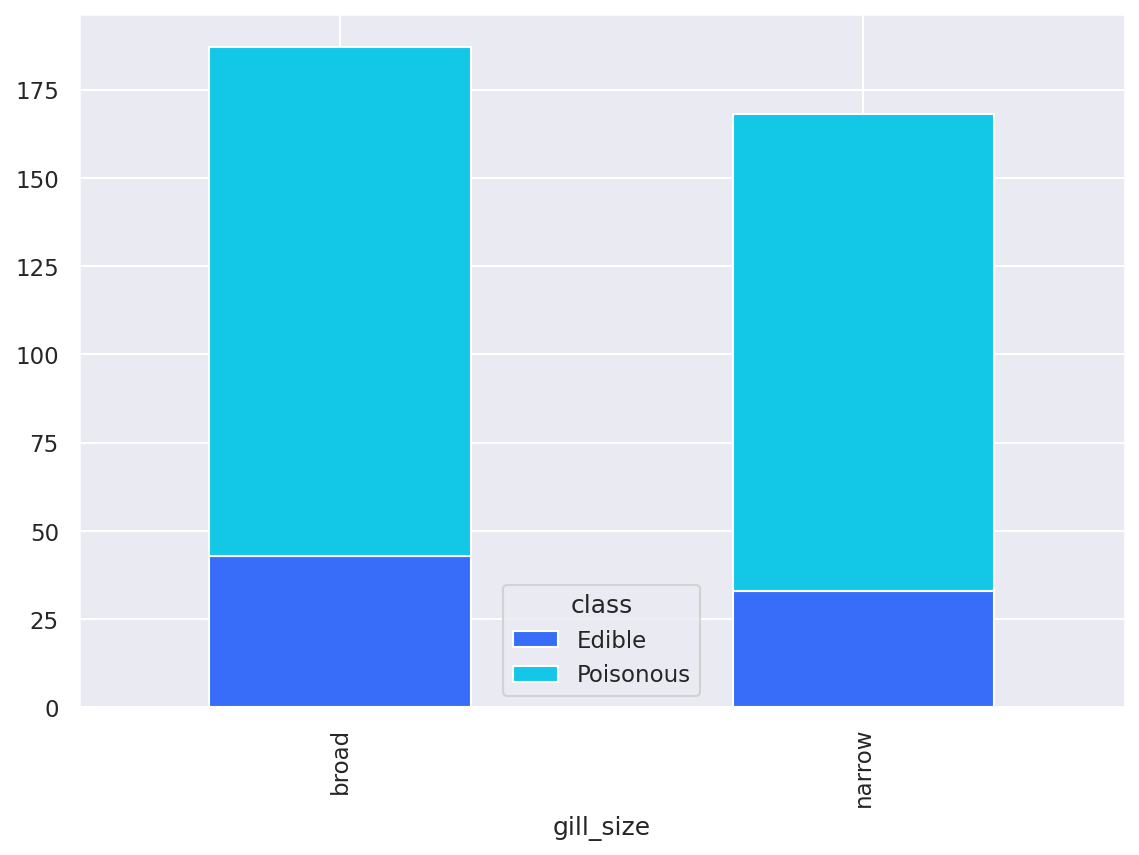

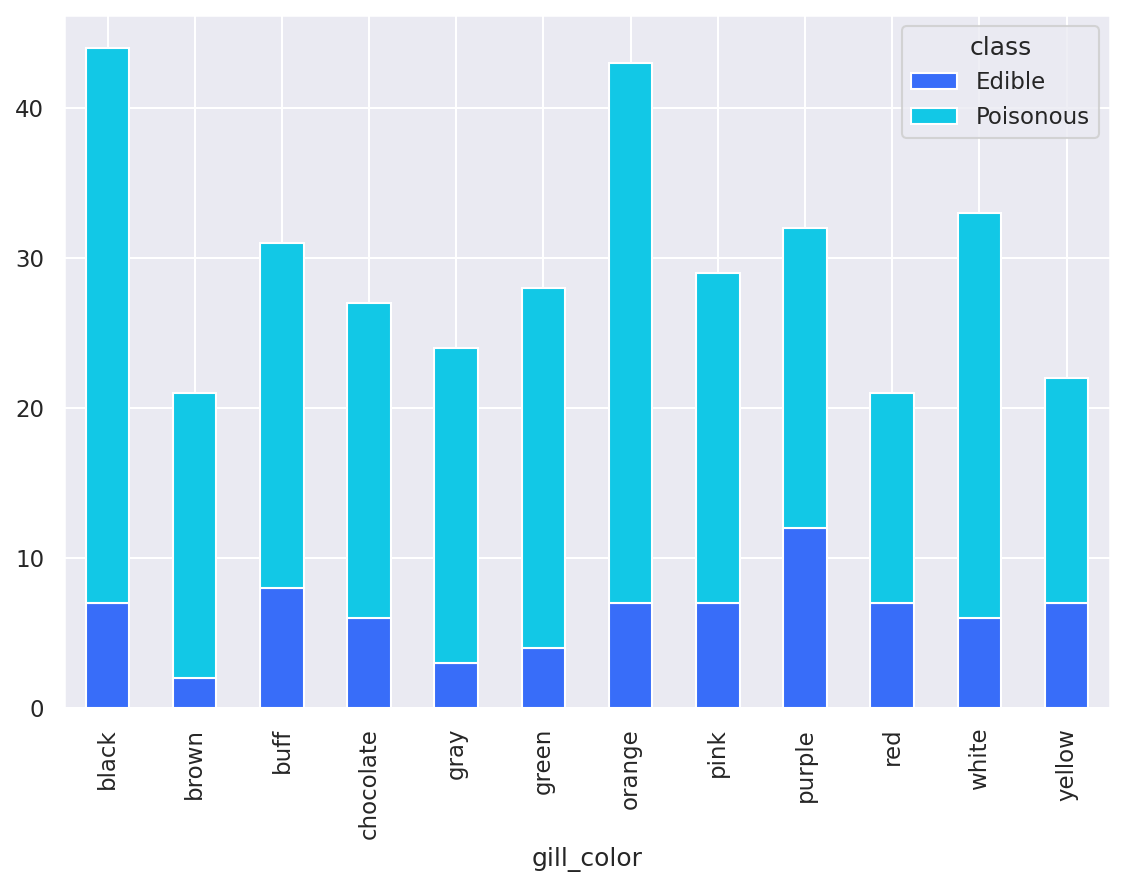

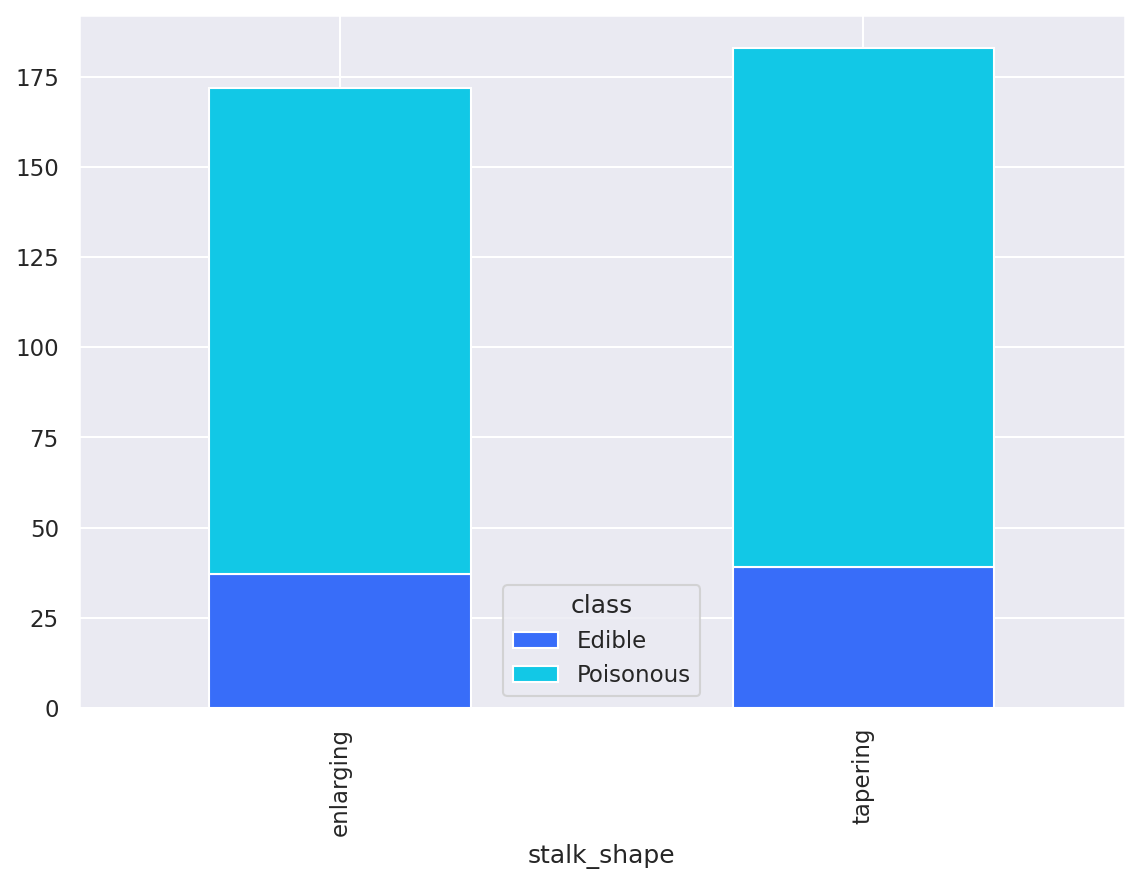

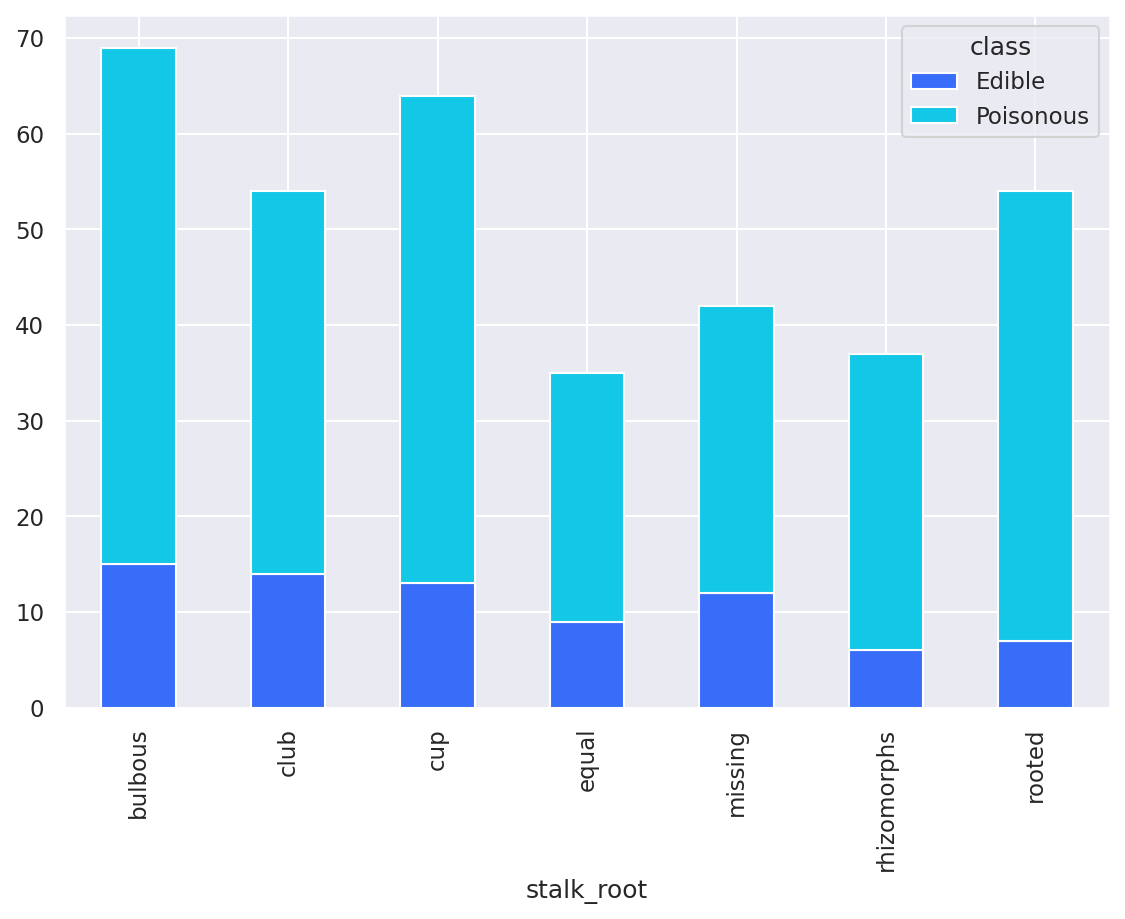

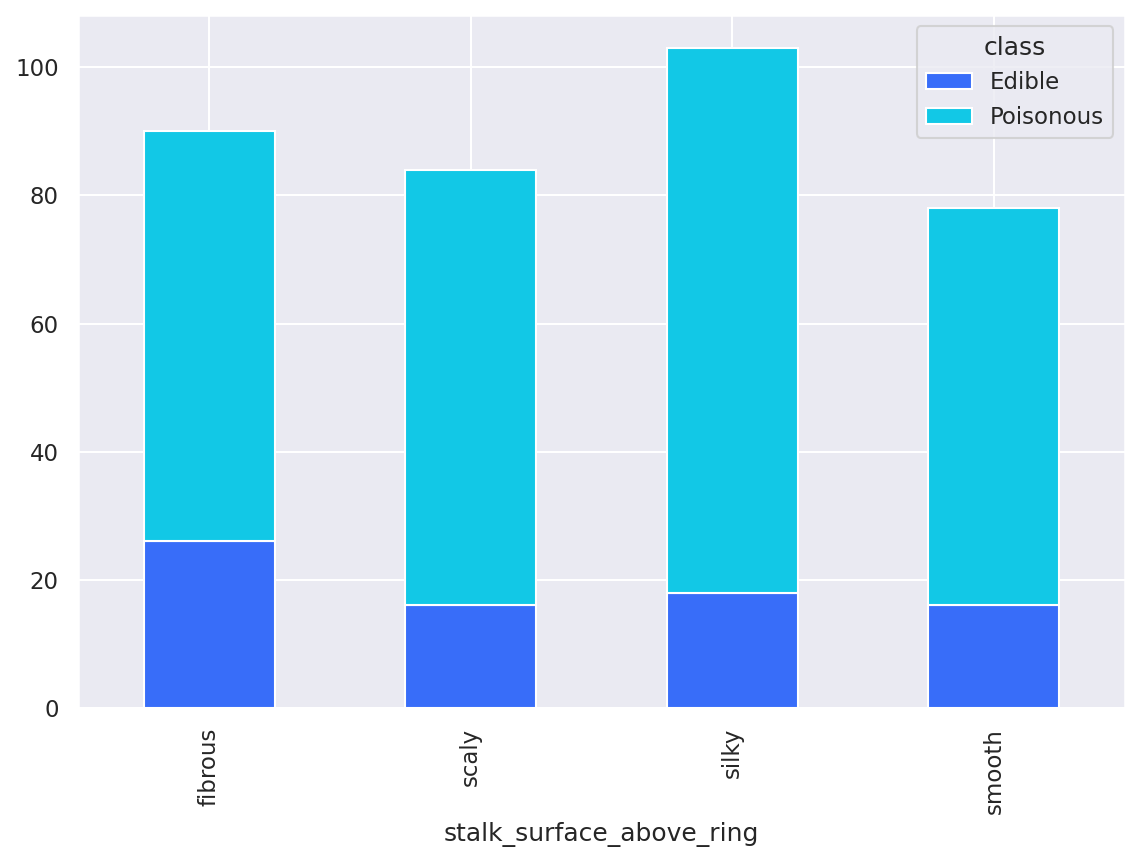

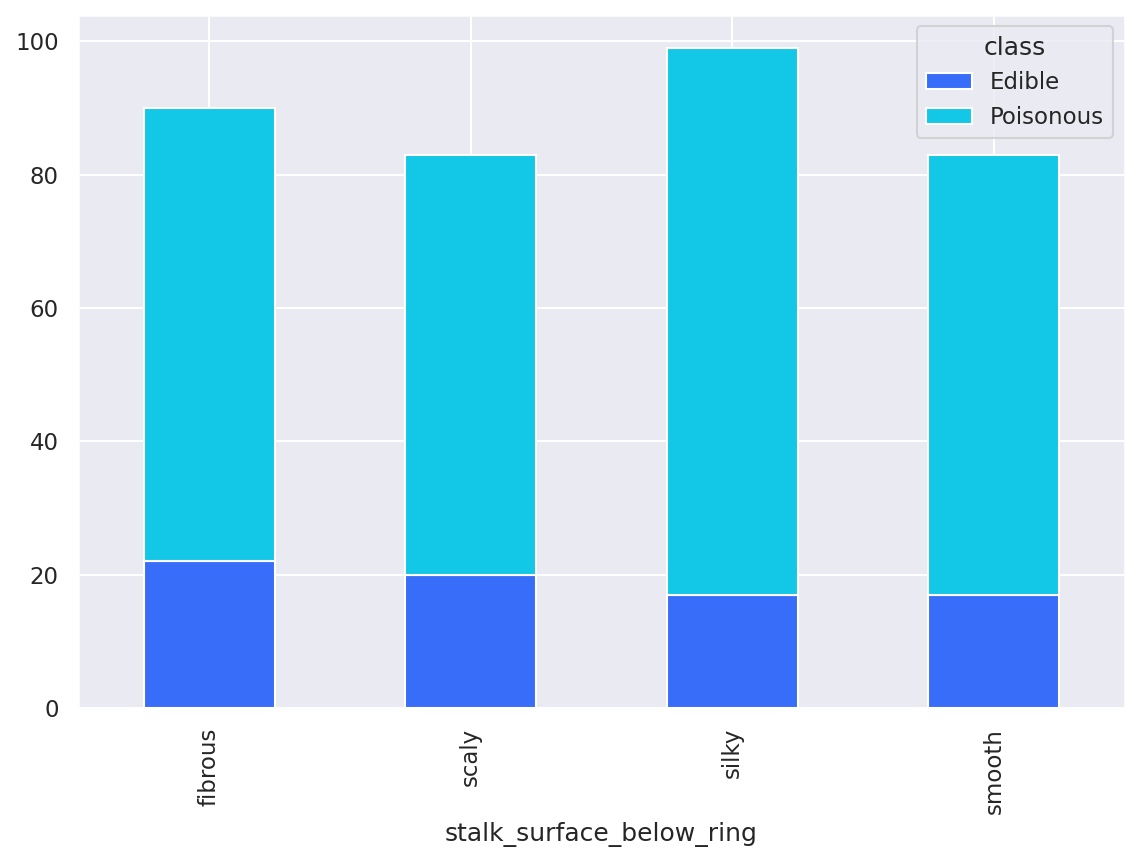

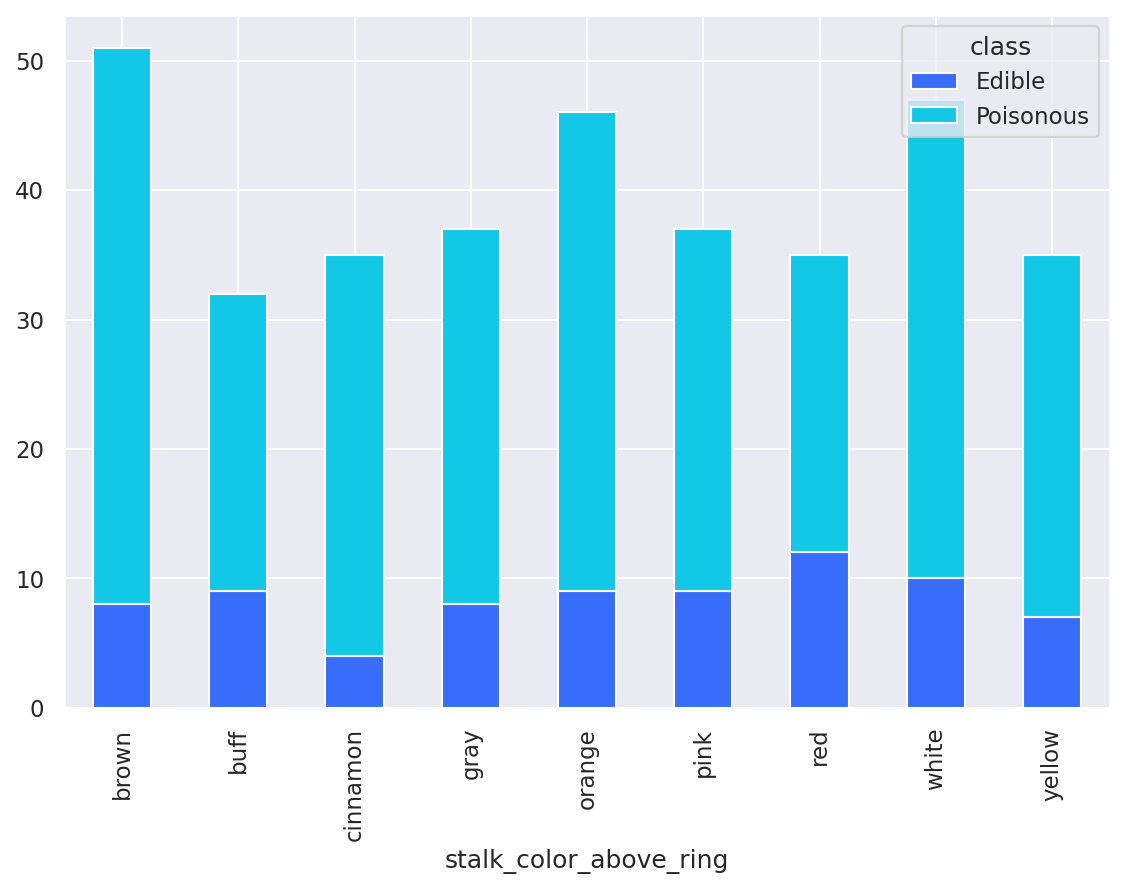

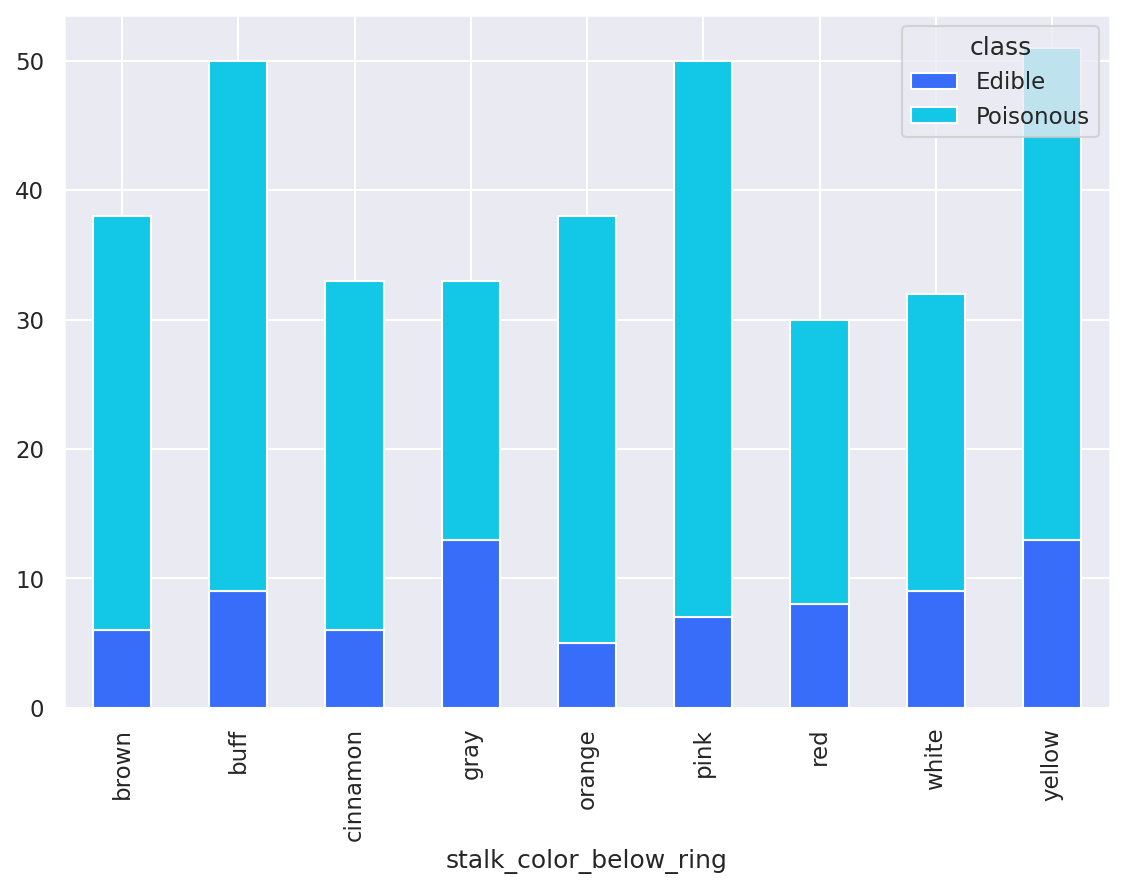

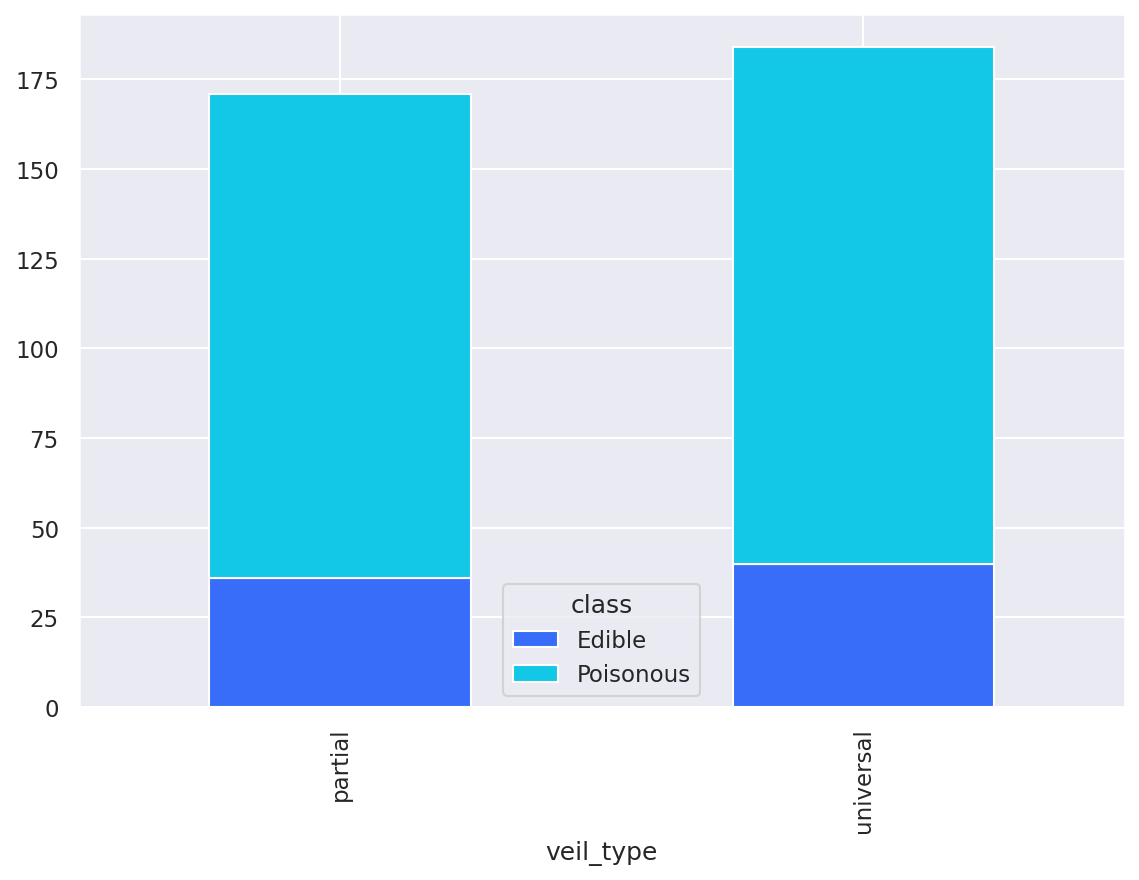

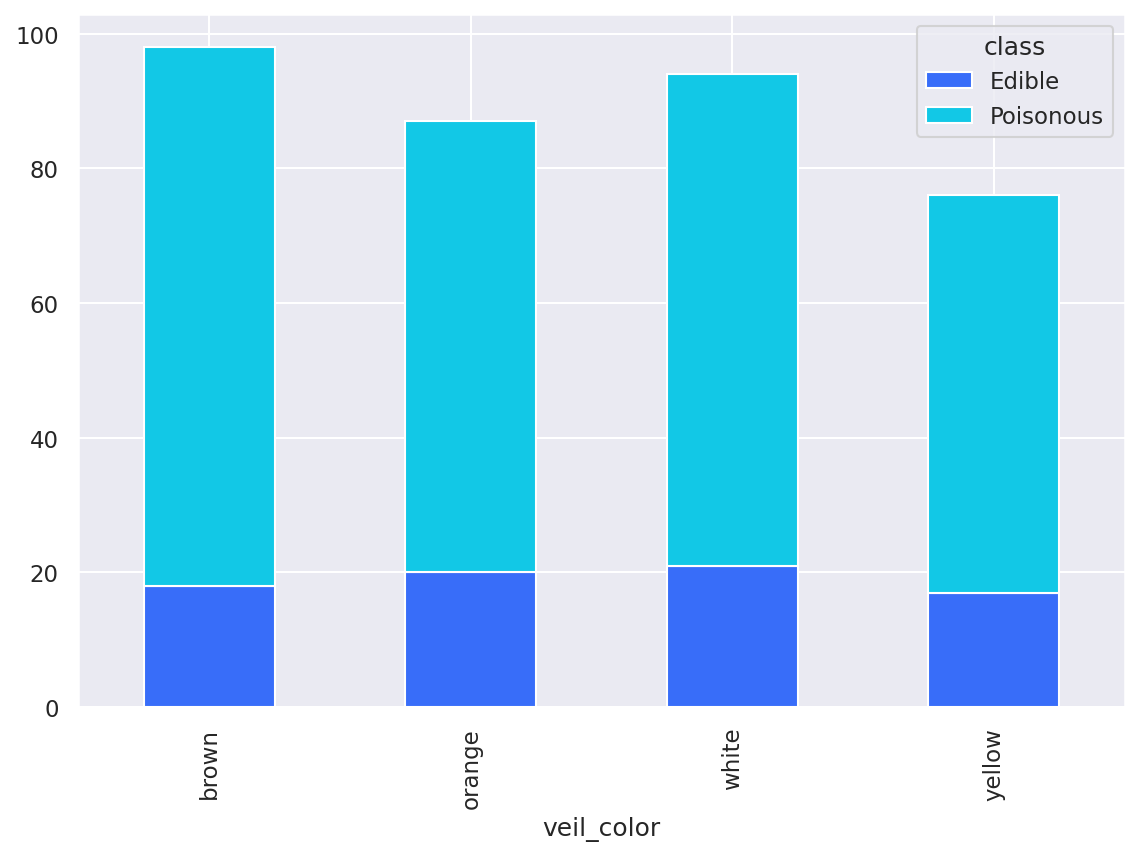

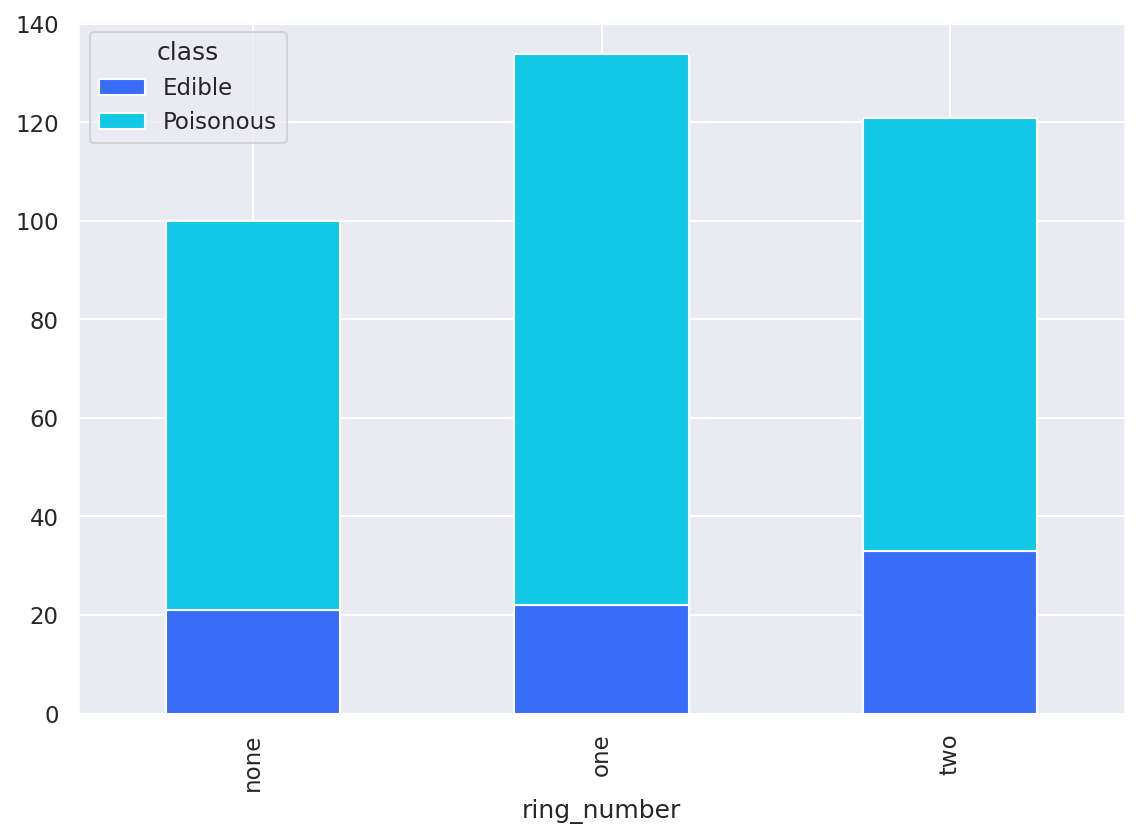

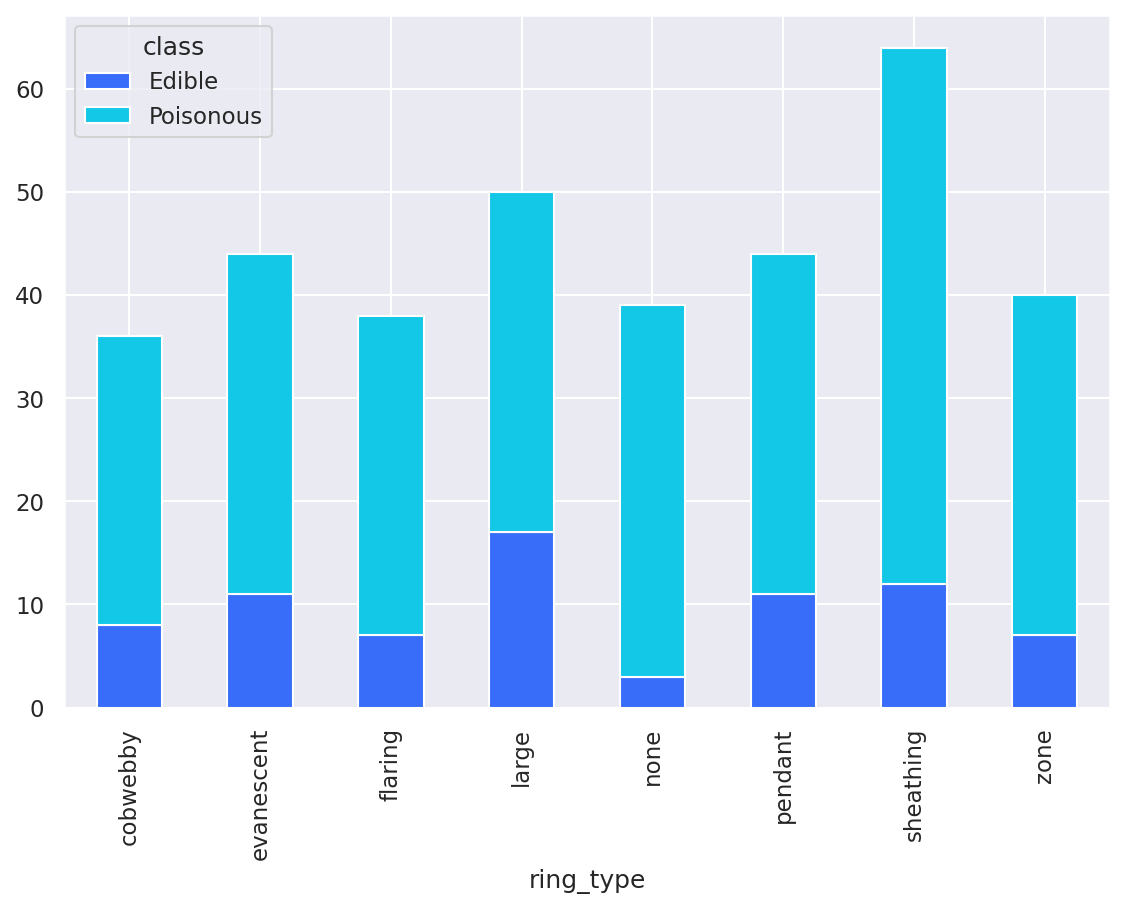

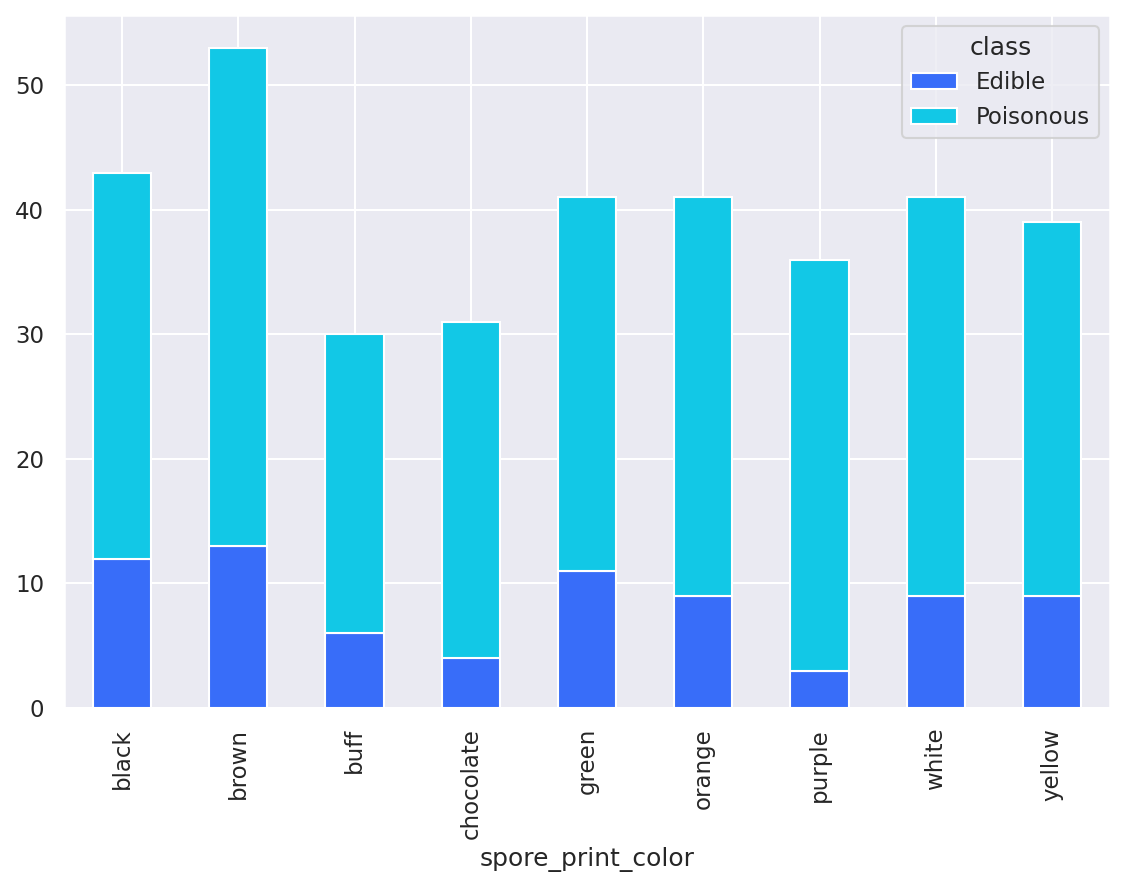

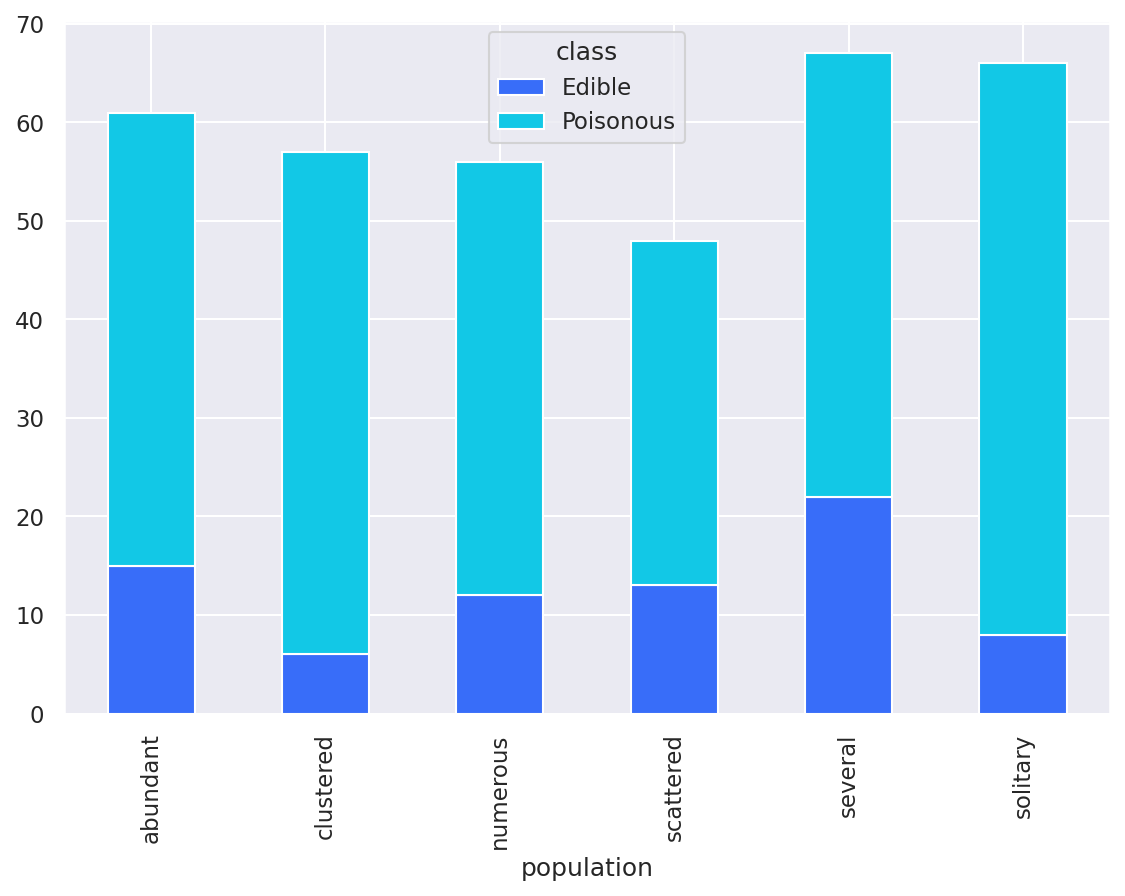

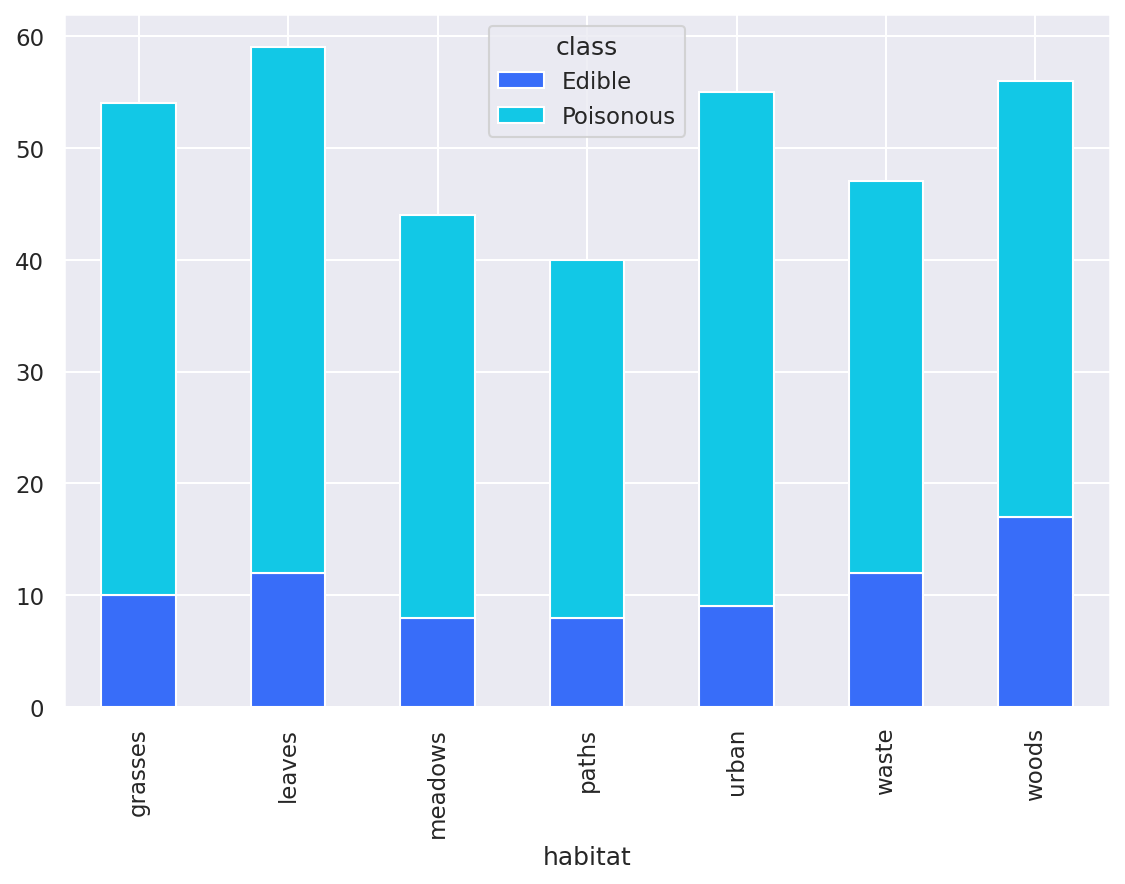

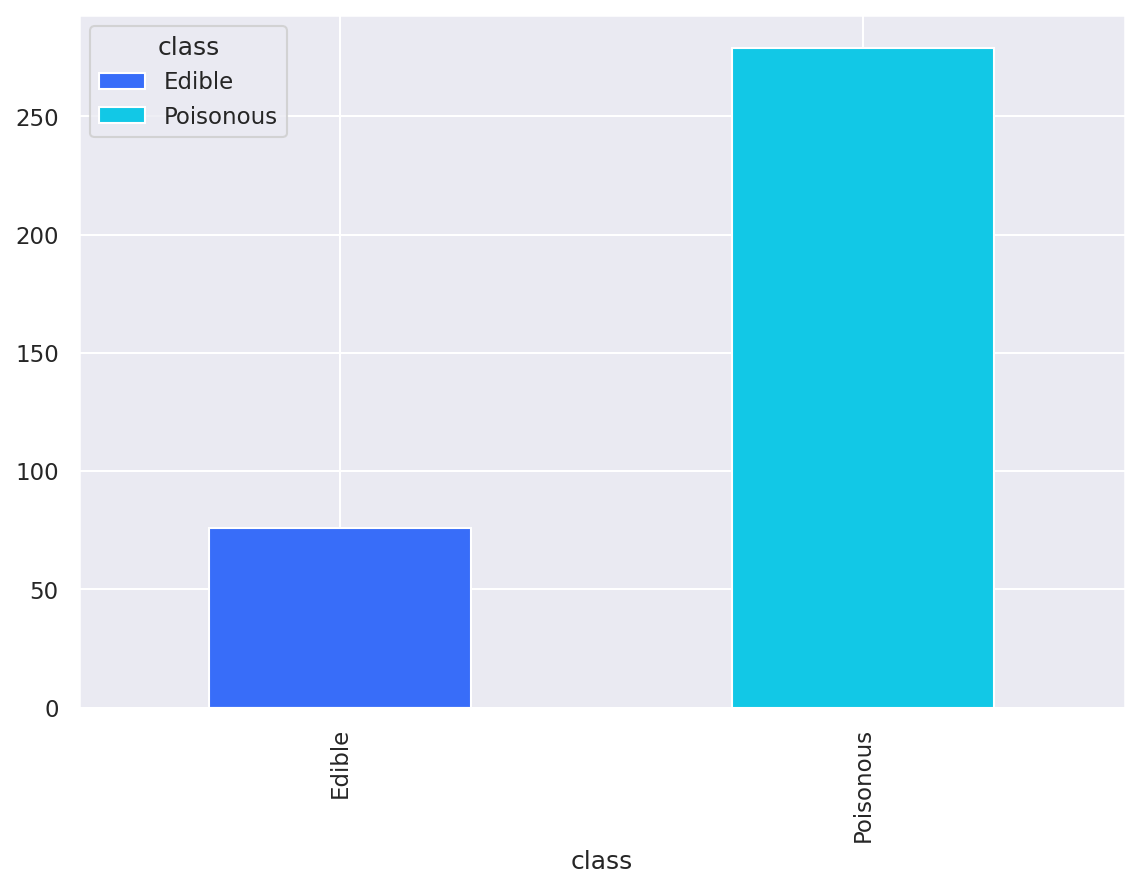

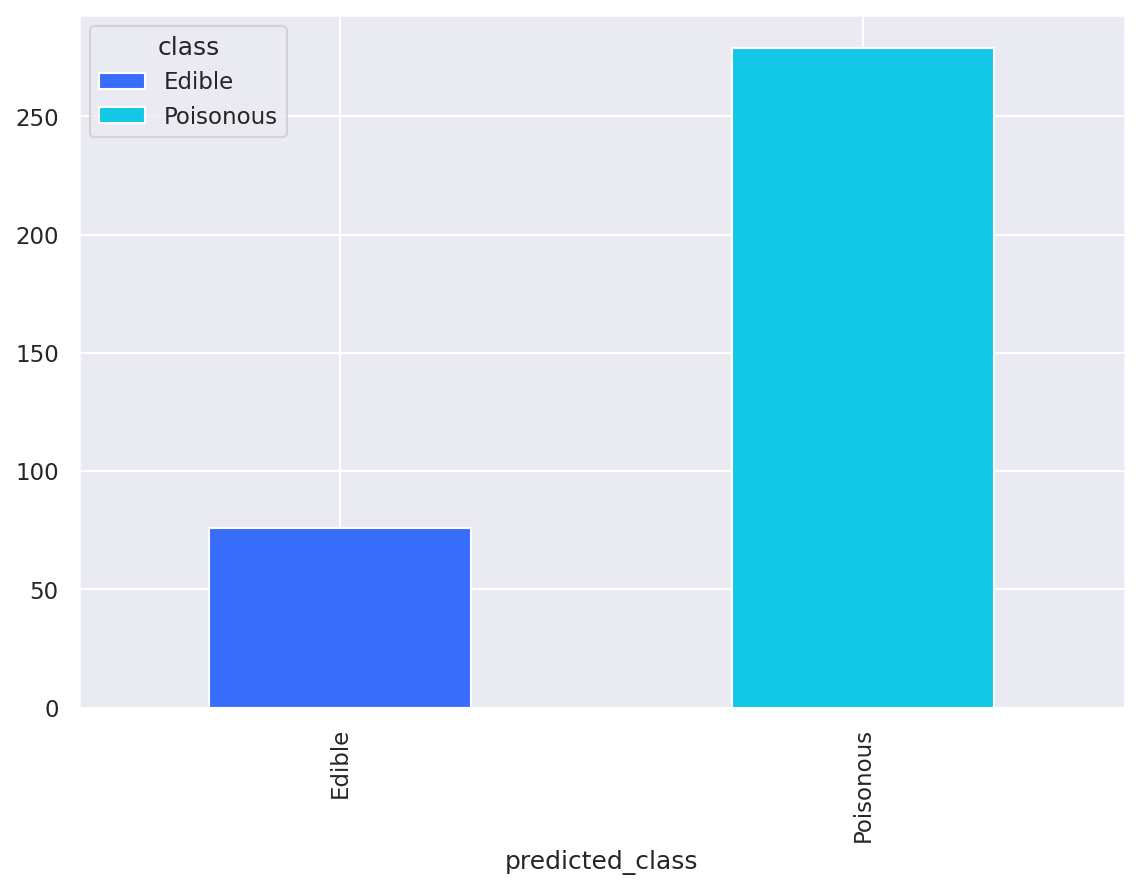

In [189]:
# @title $Bar \ \ Plot \ \ for \ \ Correctly \ \ Classified \ \ Test \ \ Data$
for col in test_data_cat_columns:
    correct_test_data.groupby([col,'class']).size().unstack().plot(kind='bar', stacked=True)
    plt.show()

In [191]:
#@title $Inorrectly \ \ Classified \ \ Test \ \ Data$
incorrect_test_data = test_data[test_data['class']!=test_data['predicted_class']]
incorrect_test_data

Unnamed: 0 cap_shape cap_surface cap_color bruises      odor  \
934          733    sunken       scaly     green     yes     anise   
1430          30    sunken     fibrous     brown      no    almond   
1173        1170      flat     fibrous       red      no  creosote   
1068        1002    convex      smooth     green     yes     spicy   
123         1035      flat     grooves     white      no      foul   
1584         298    sunken      smooth      pink      no     spicy   
1302         117   conical       scaly    yellow     yes     anise   
78            82    sunken      smooth     white     yes    almond   
235          791    convex     fibrous    yellow     yes     spicy   
441          703   conical       scaly      pink     yes   pungent   
507         1137      bell     fibrous      gray     yes     spicy   
690          455      bell      smooth     green      no  creosote   
1375         307    convex     grooves     brown      no     spicy   
1079        1093    convex       scaly      pink      no     anise   
202          452   conical     fibrous     green      no     musty   
266          430    sunken       scaly     green      no  creosote   
1387          46   conical      smooth     green     yes   pungent   
1274         833      flat     grooves    yellow     yes      foul   
1049         571    sunken       scaly       red     yes     fishy   
1351          54      flat       scaly       red     yes     fishy   
1846         494      bell      smooth       red     yes   pungent   
386         1183    sunken       scaly    purple     yes      foul   
1400         190    sunken       scaly      gray      no     anise   
1685         166    sunken       scaly     white      no     fishy   
1086        1224    sunken     grooves       red      no  creosote   
350         1085    convex     fibrous     brown      no    almond   
497          624    convex      smooth      gray      no     spicy   
953          291      flat       scaly     brown     yes    almond   
1411         963      flat     grooves    yellow      no  creosote   
1856        1098    convex       scaly      pink     yes   pungent   
1673         266    sunken      smooth    purple      no   pungent   
156          183   conical       scaly      gray      no   pungent   
634           52    sunken      smooth    purple     yes     musty   
914          283    sunken      smooth      pink     yes     spicy   
1516         909      flat     grooves      pink      no     anise   
1386        1265   conical       scaly    purple      no     anise   
42            94   conical      smooth    purple     yes     spicy   
1504        1210    convex       scaly      pink      no      none   
1854         261   conical      smooth      pink     yes      none   
438          648   conical       scaly    purple      no     anise   
1435         563   conical      smooth    purple     yes      none   
1591         940      flat      smooth     white      no     fishy   
1573         343    sunken     grooves    purple      no   pungent   
646         1273    convex     fibrous     white      no     anise   
1927         217    sunken     grooves     brown      no    almond   

     gill_attachment gill_spacing gill_size gill_color stalk_shape  \
934             free      crowded     broad     purple   enlarging   
1430         notched        close     broad     purple   enlarging   
1173        attached      crowded     broad       pink   enlarging   
1068      descending      crowded     broad       gray    tapering   
123       descending      distant    narrow      white    tapering   
1584        attached        close     broad      green   enlarging   
1302            free      distant    narrow     purple    tapering   
78           notched        close     broad      green   enlarging   
235          notched        close     broad      black   enlarging   
441         attached      distant    narrow     purple   enlarging   
507         att

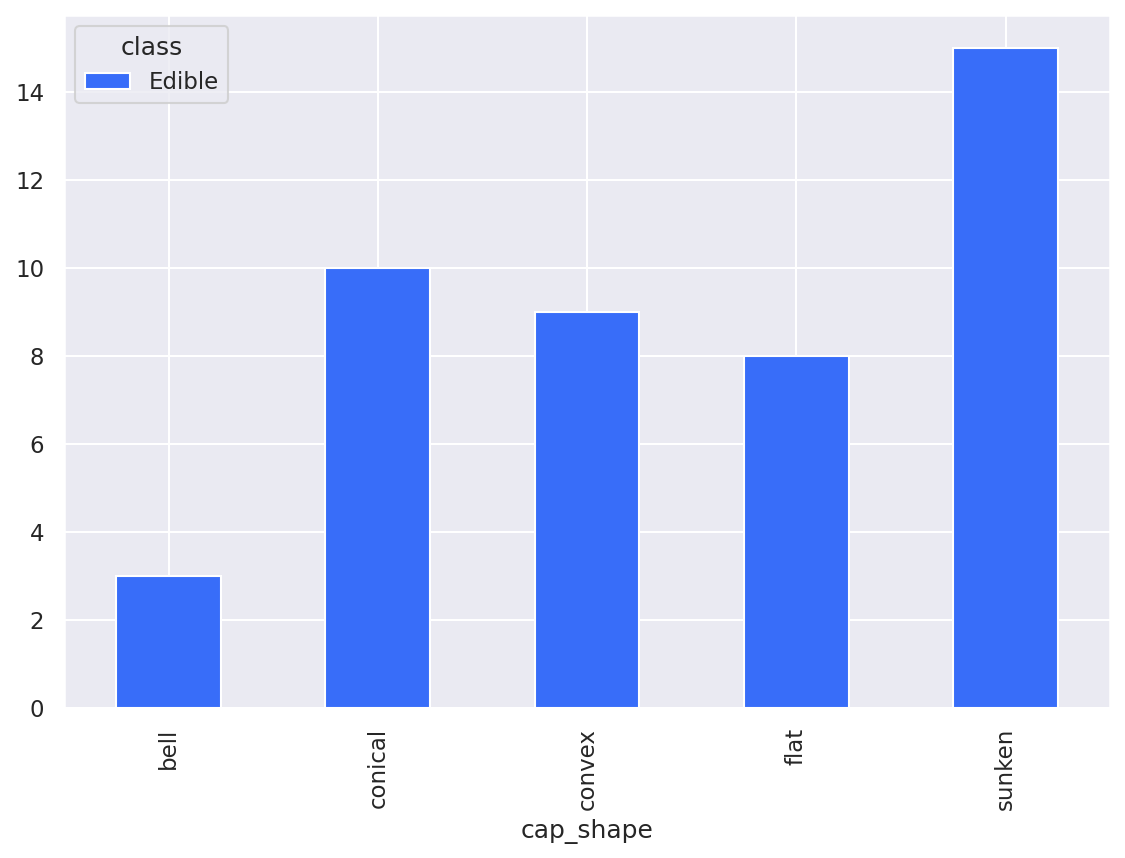

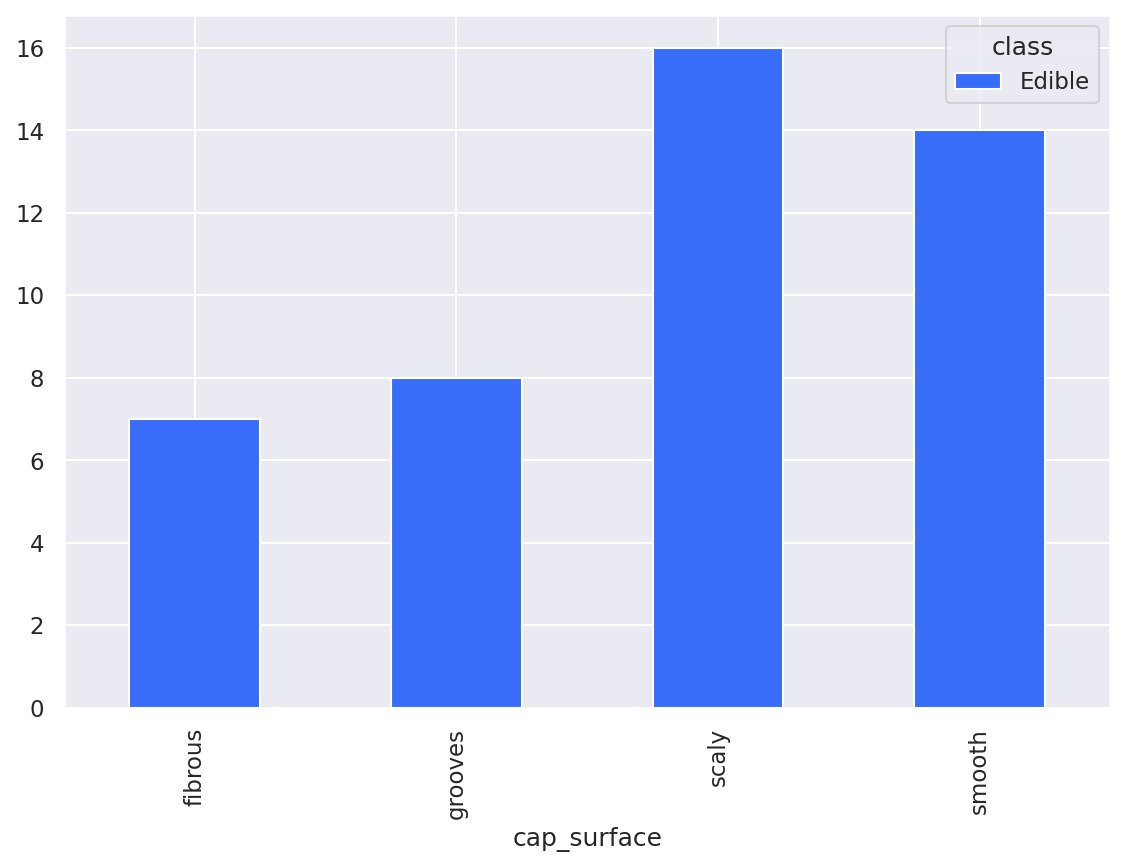

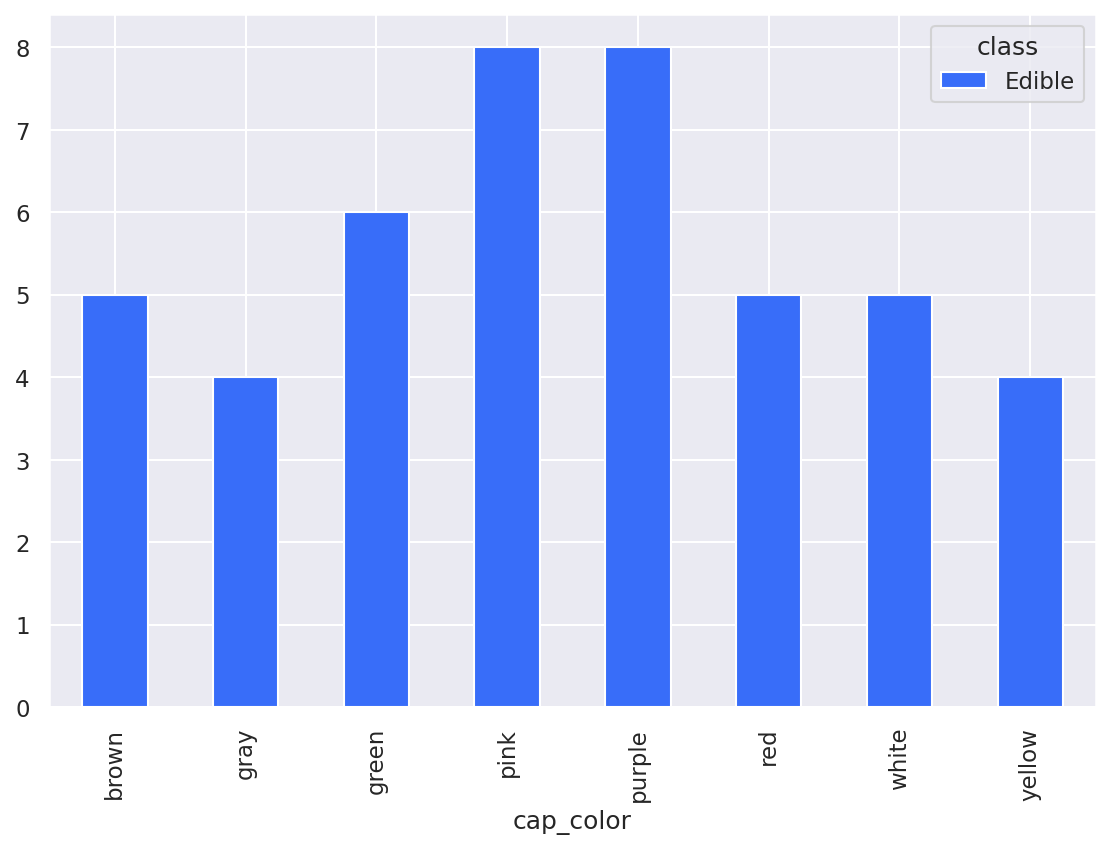

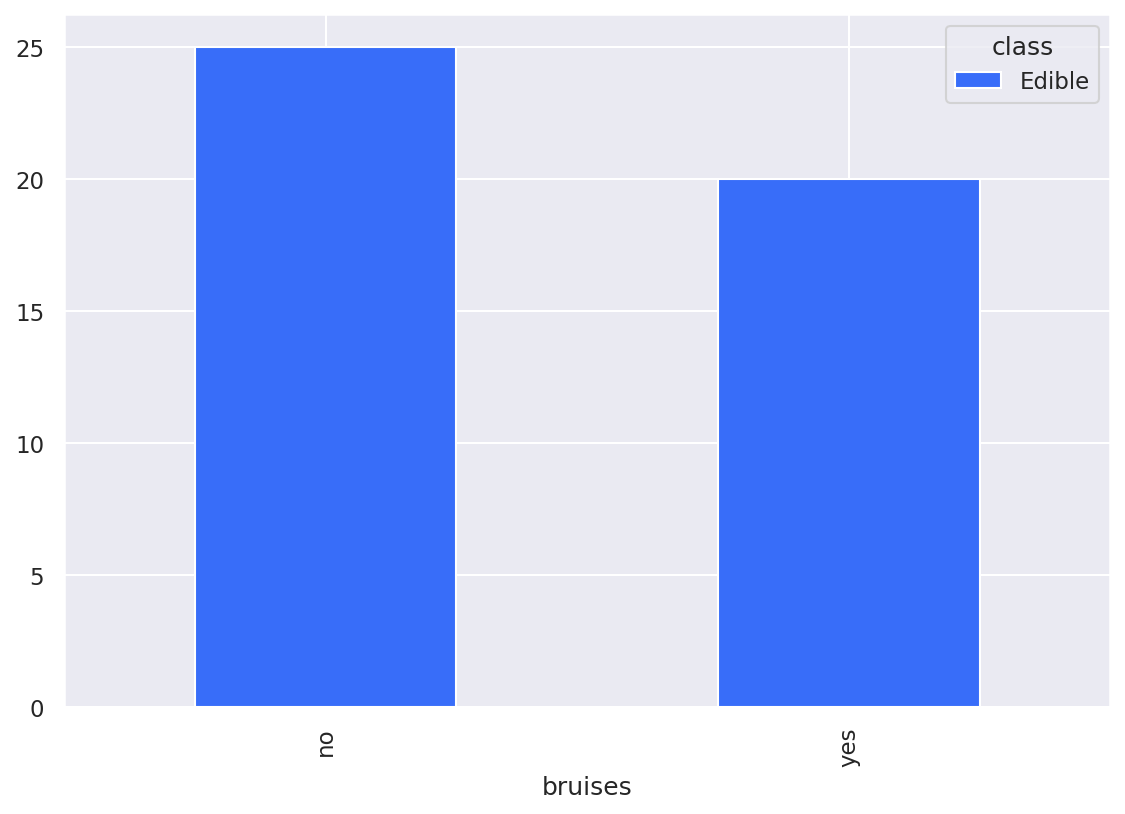

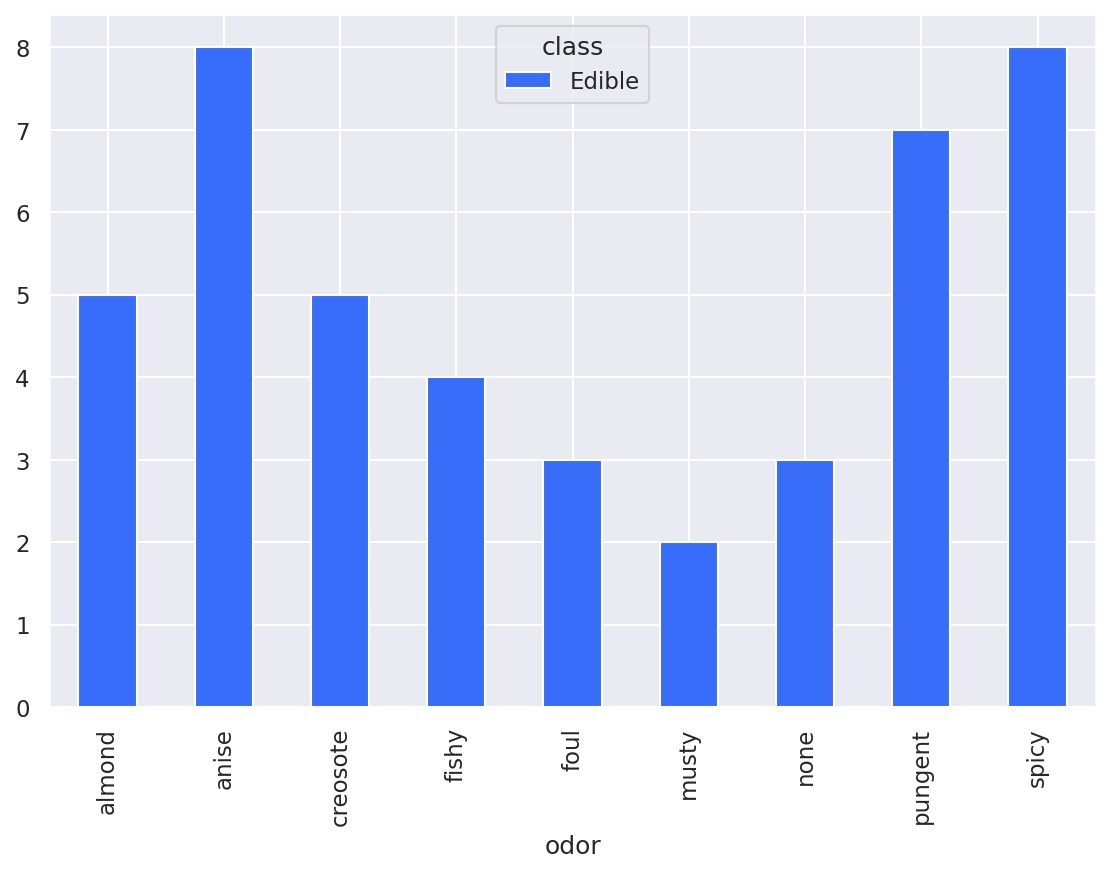

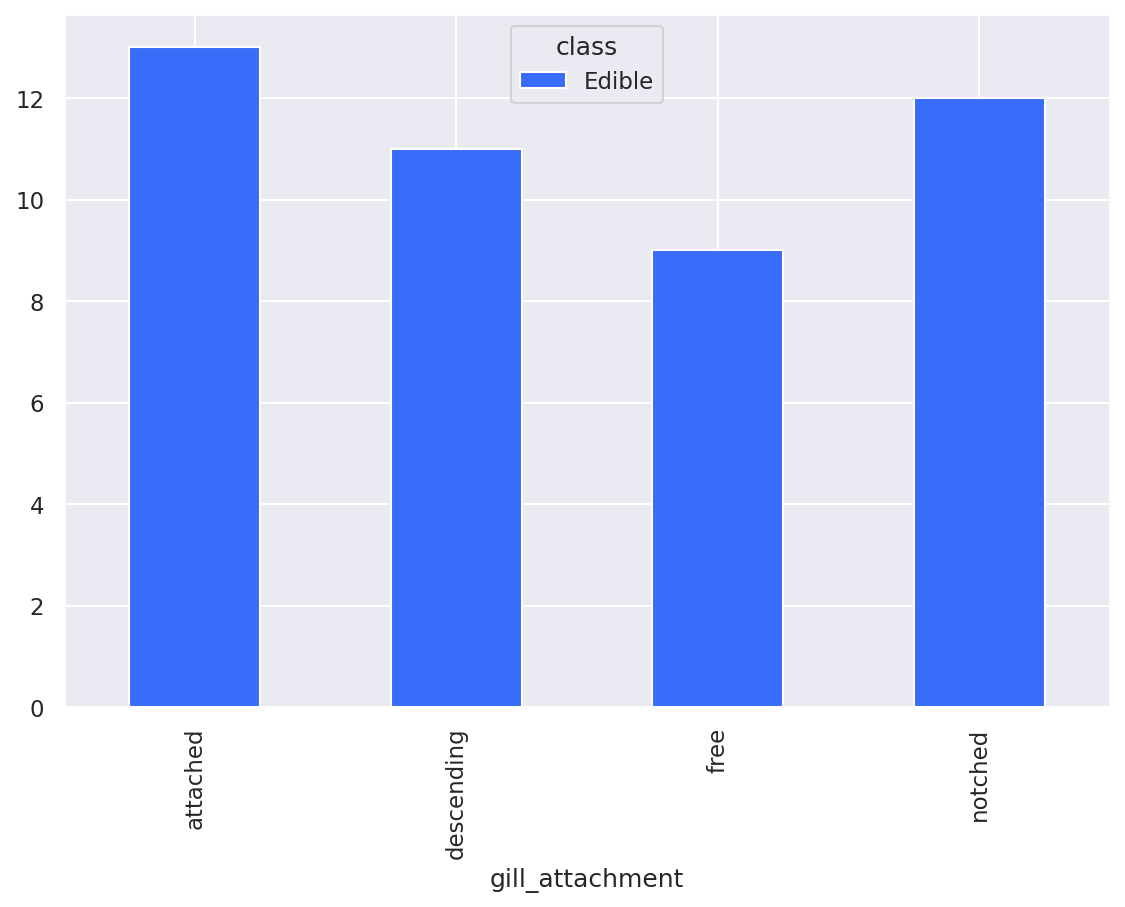

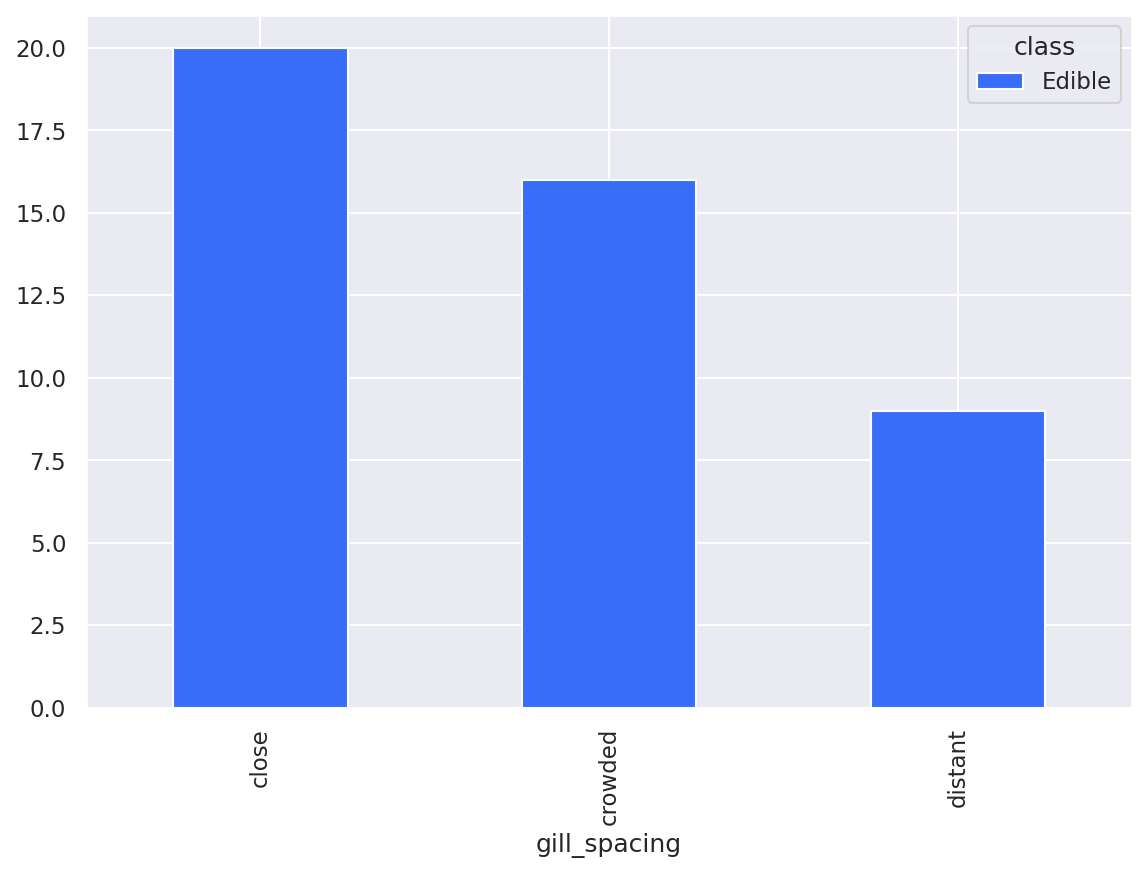

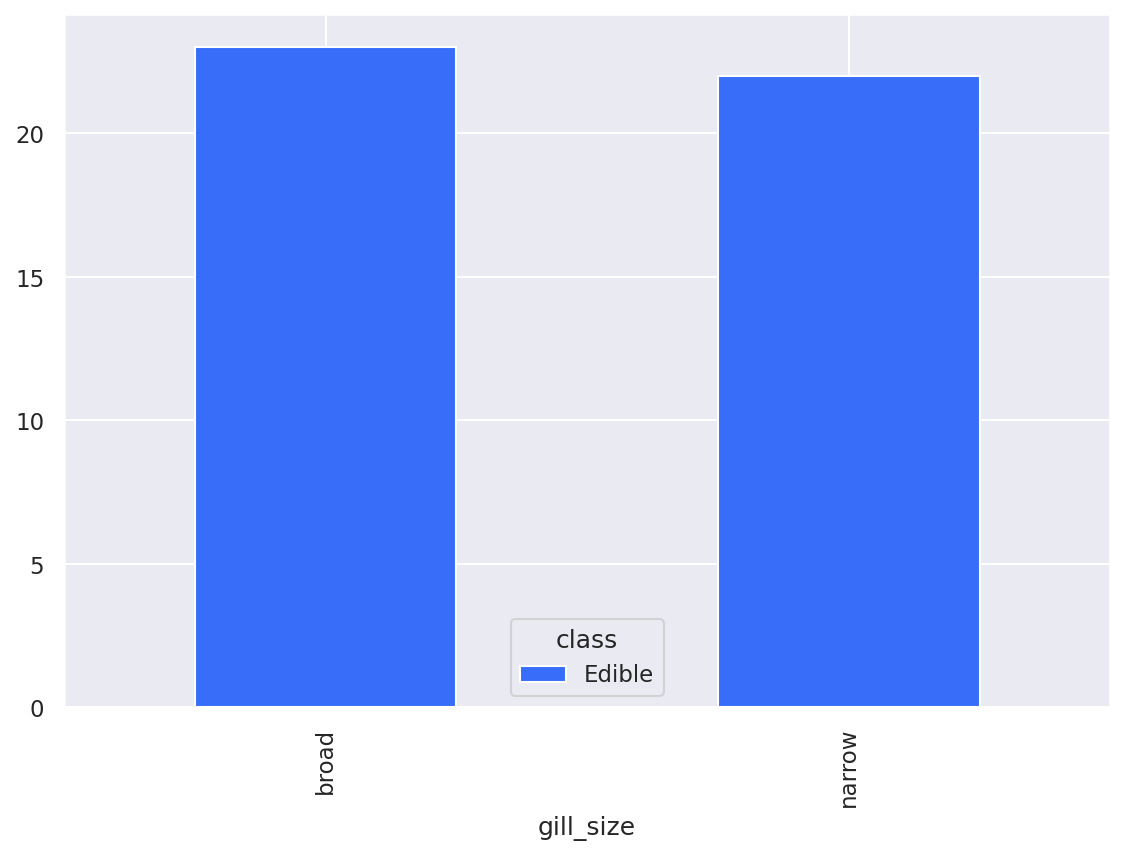

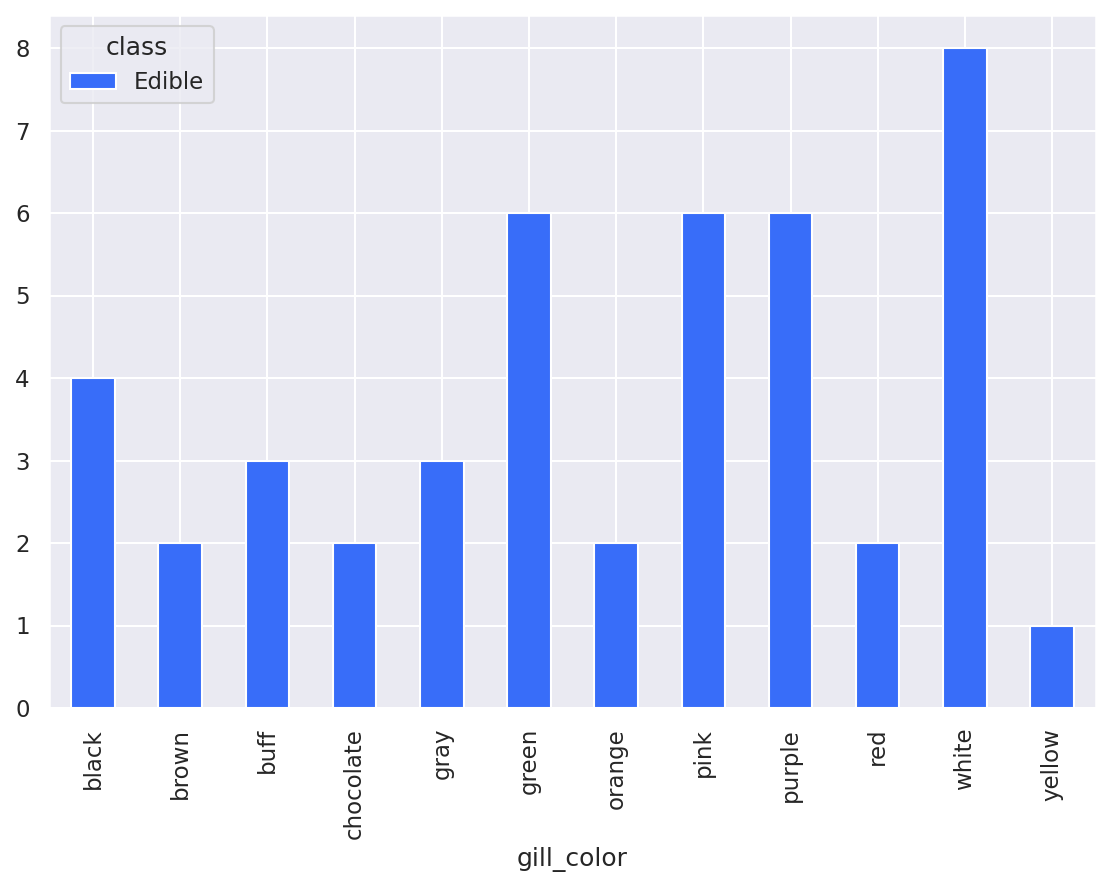

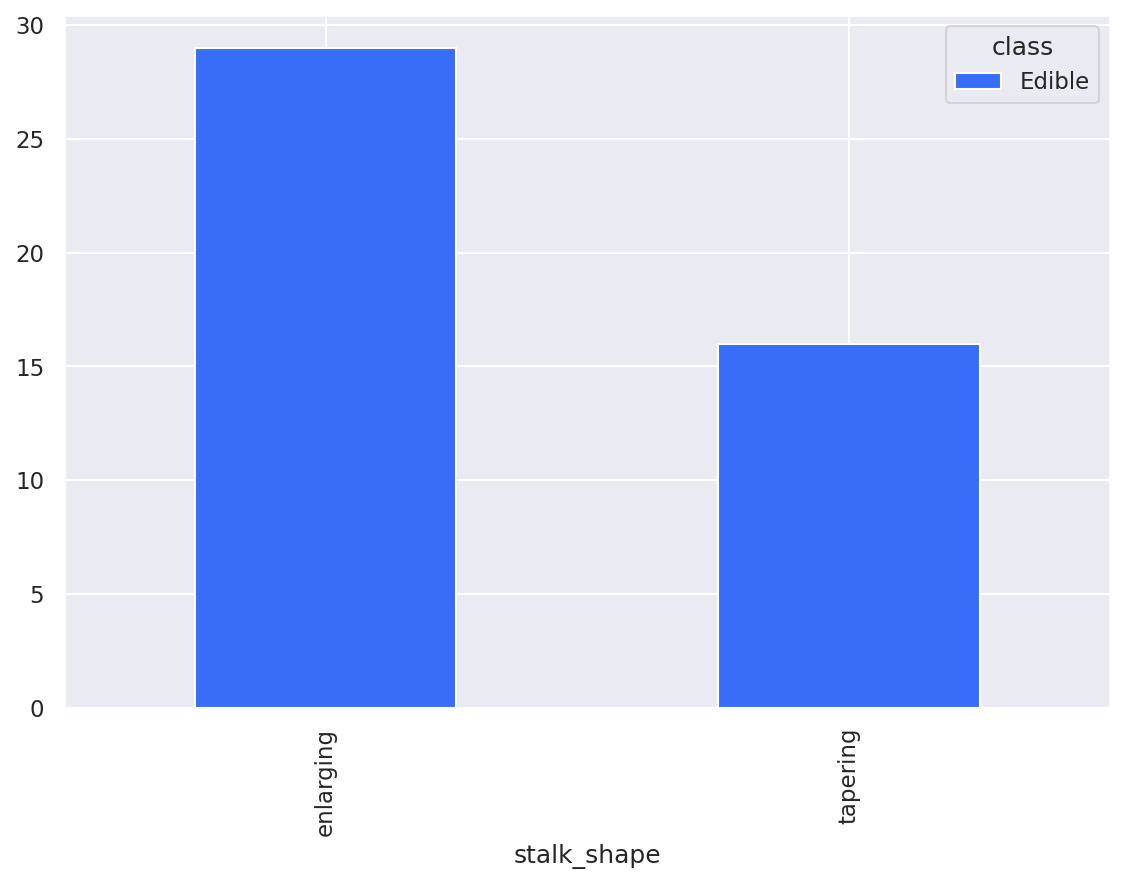

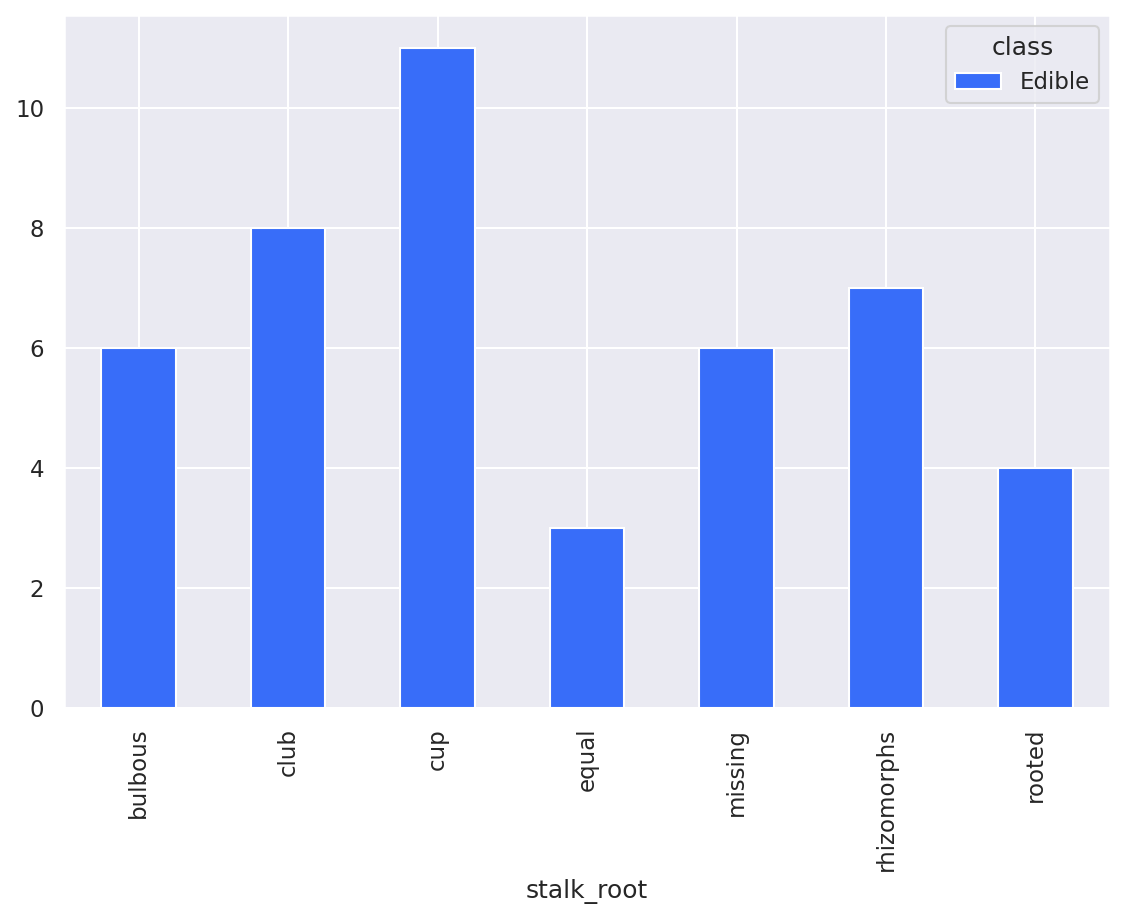

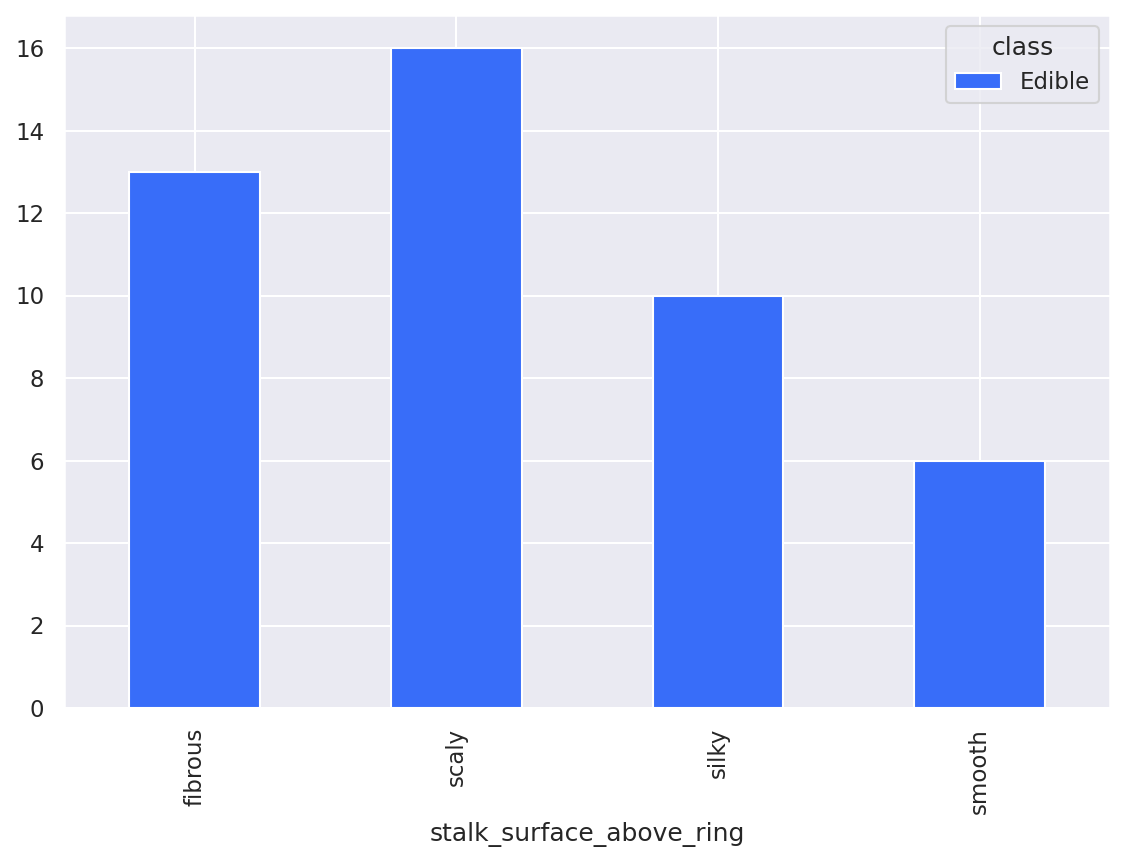

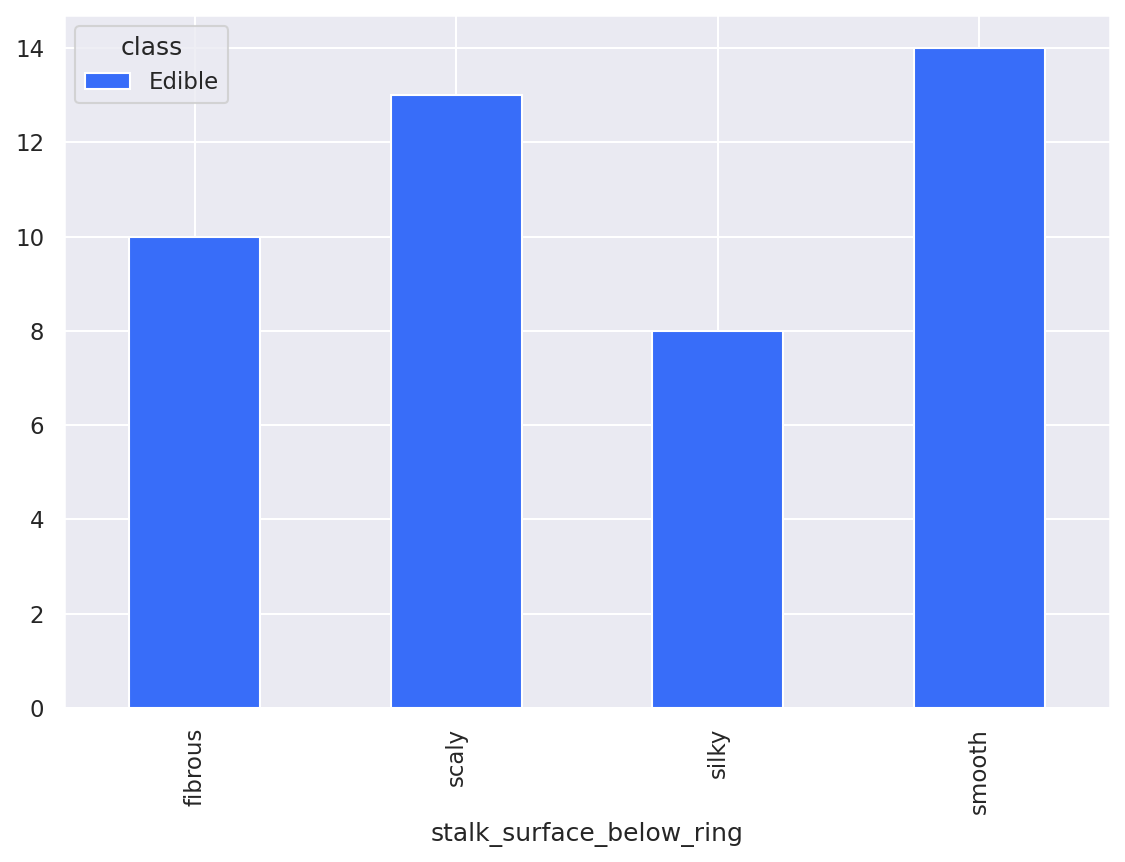

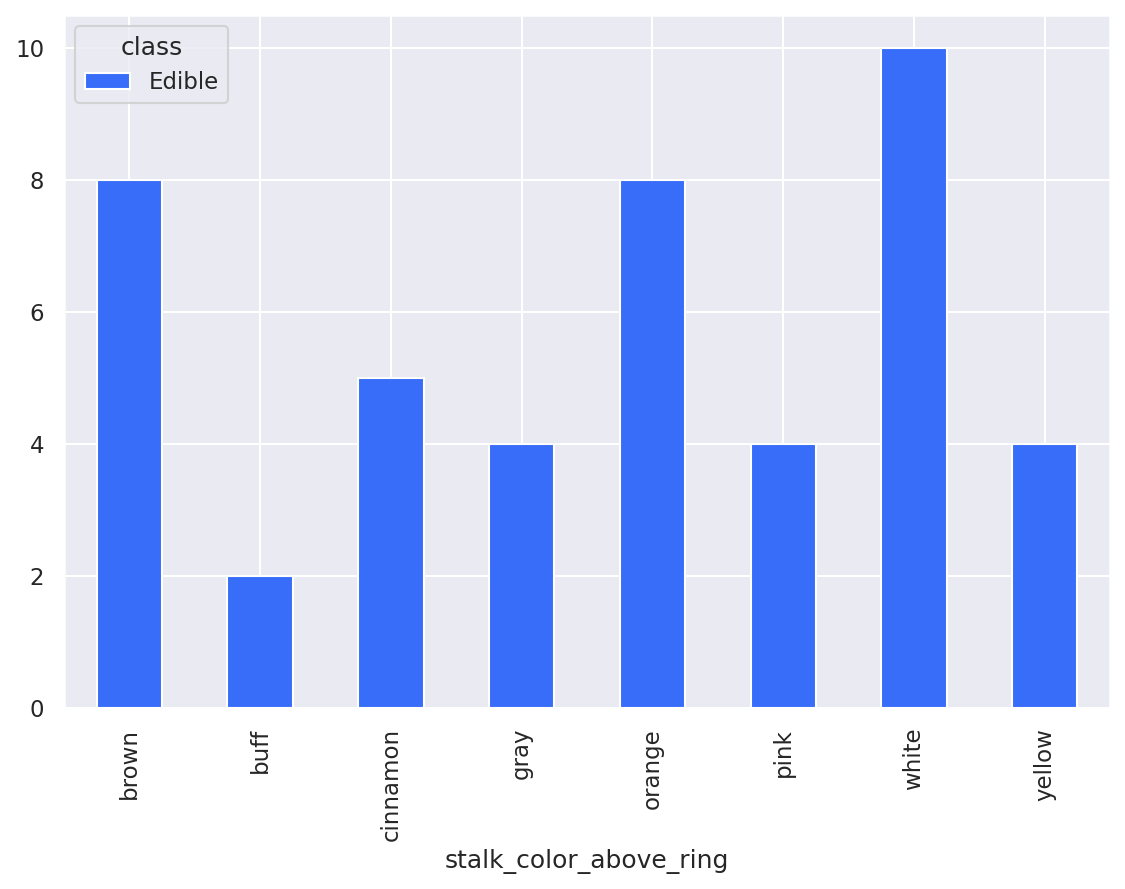

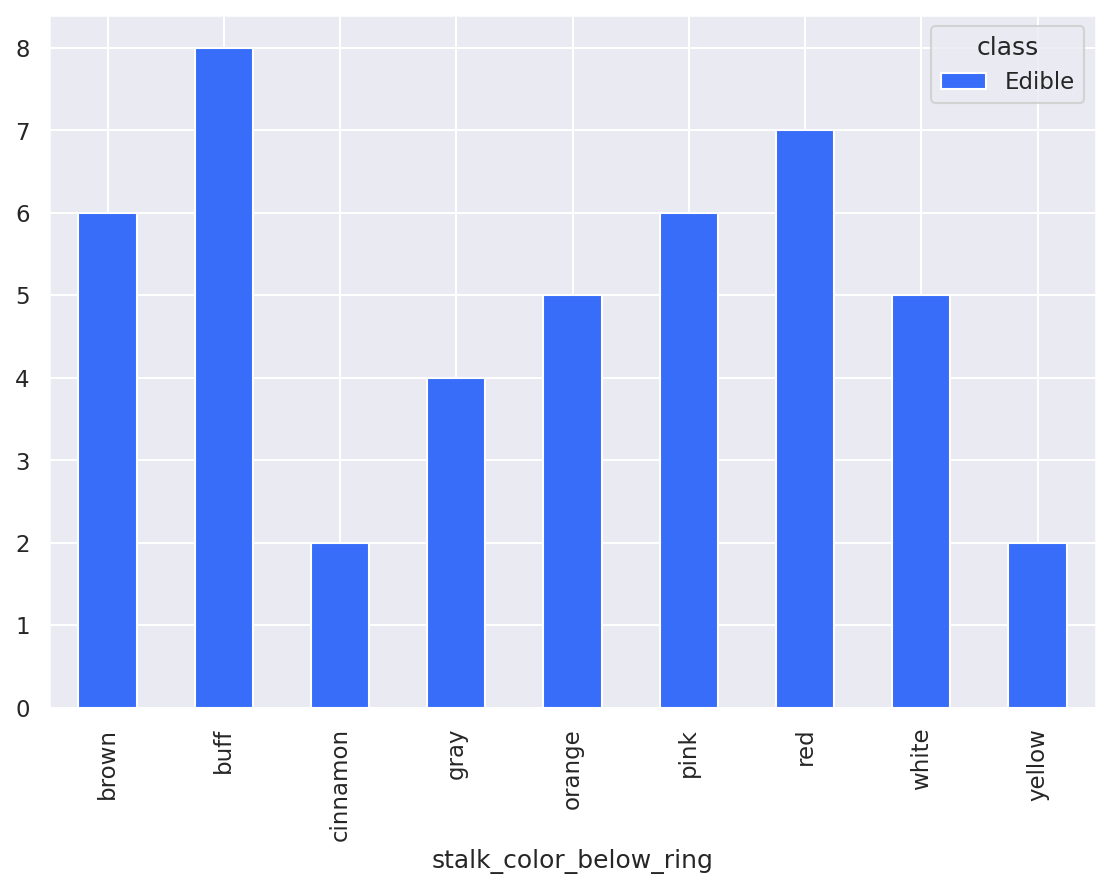

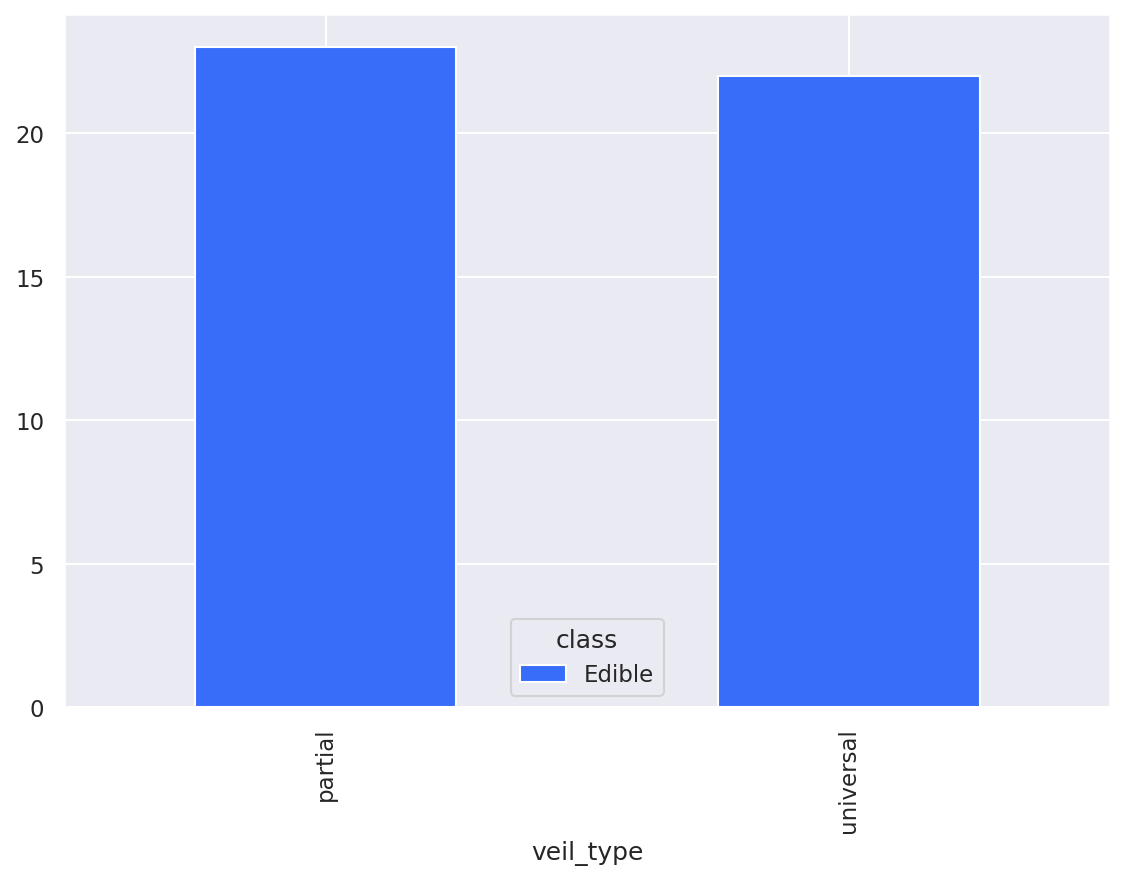

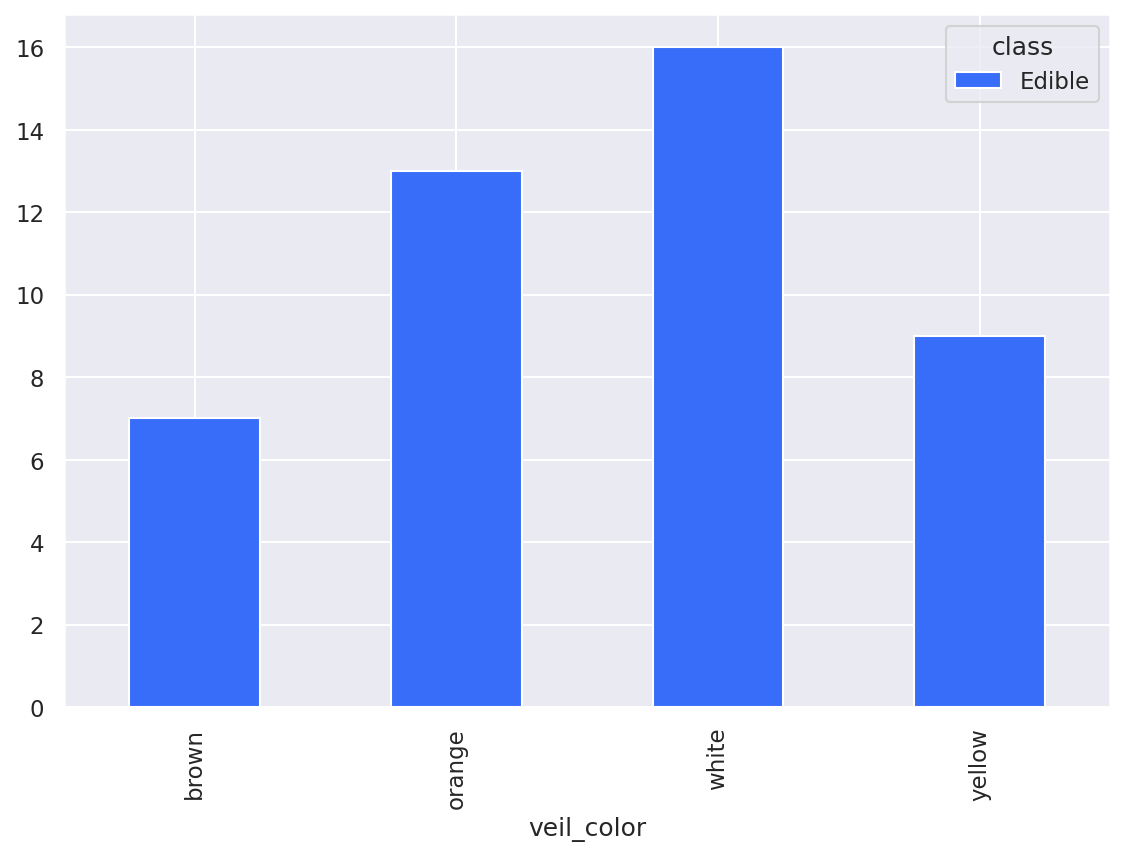

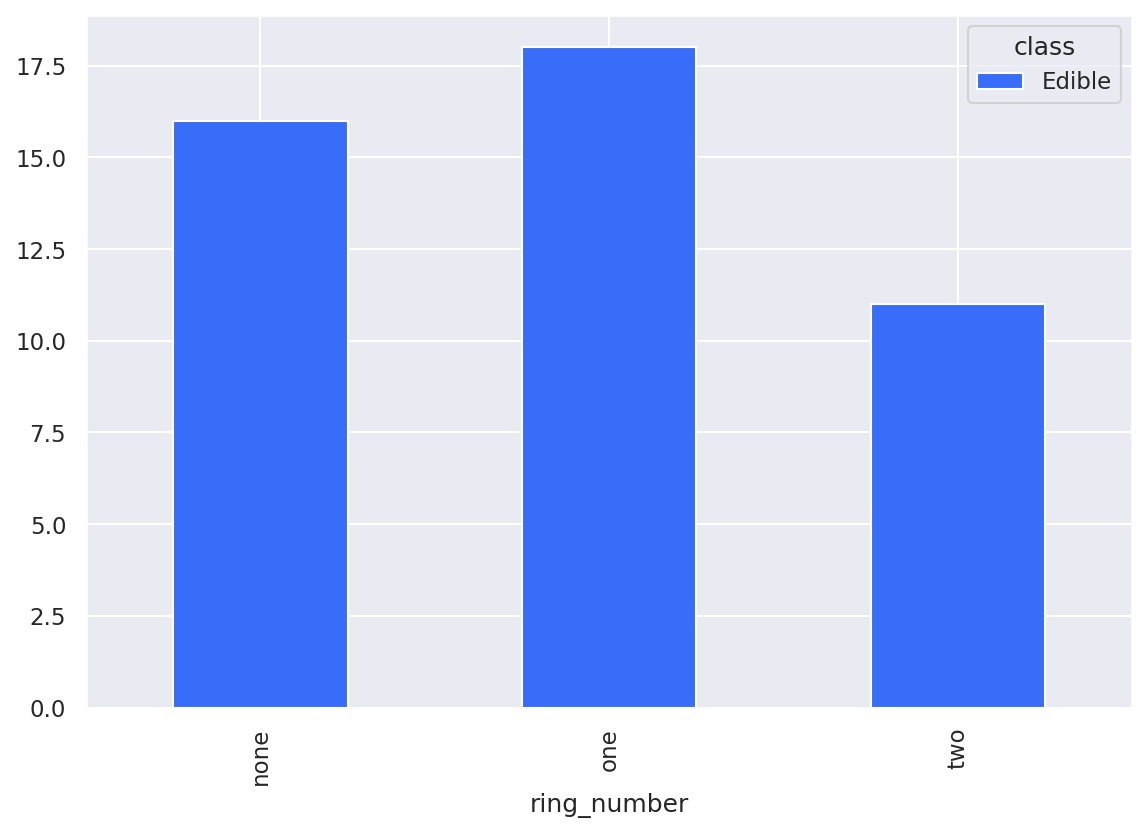

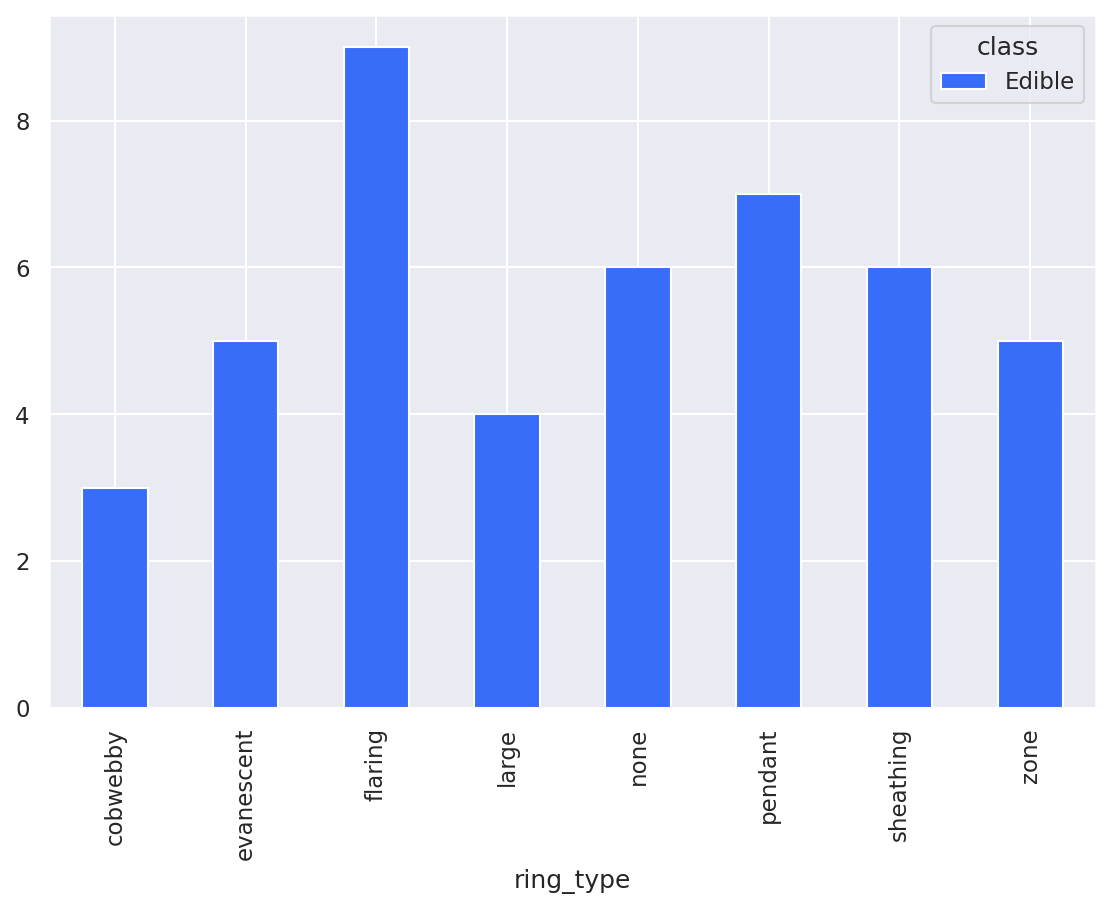

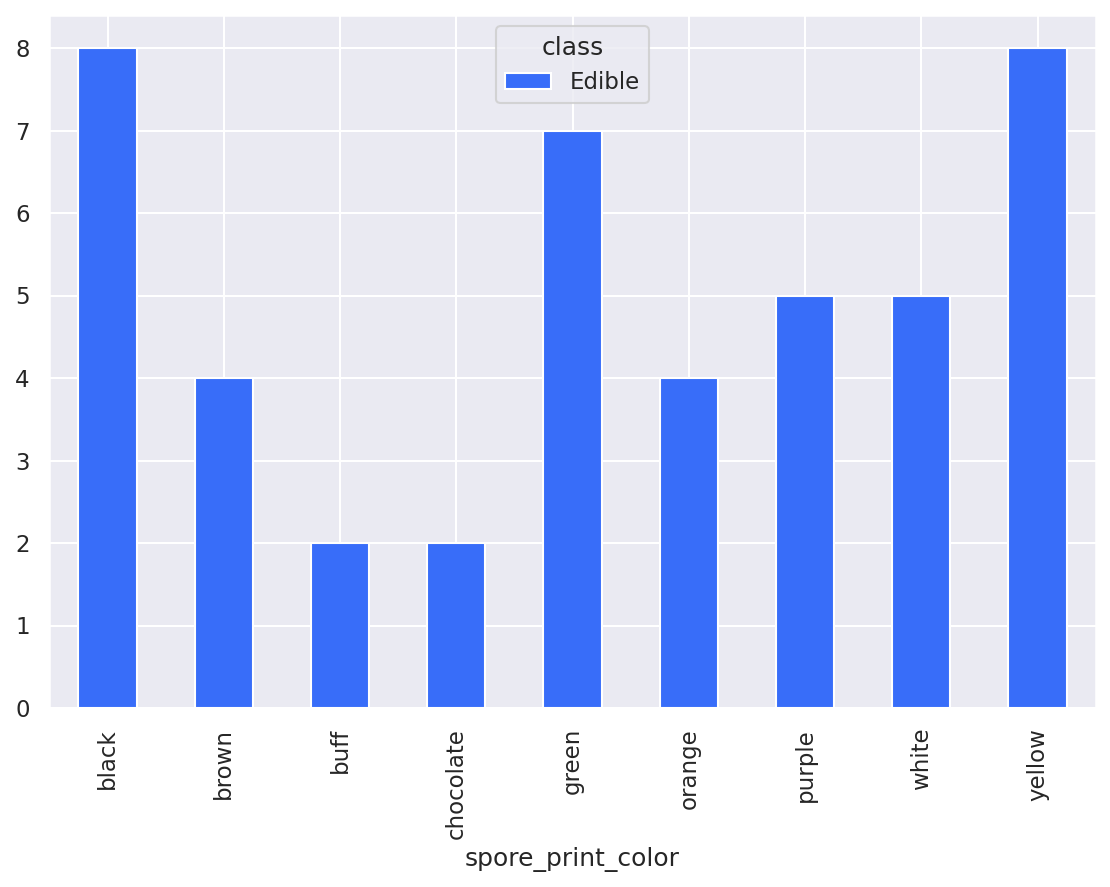

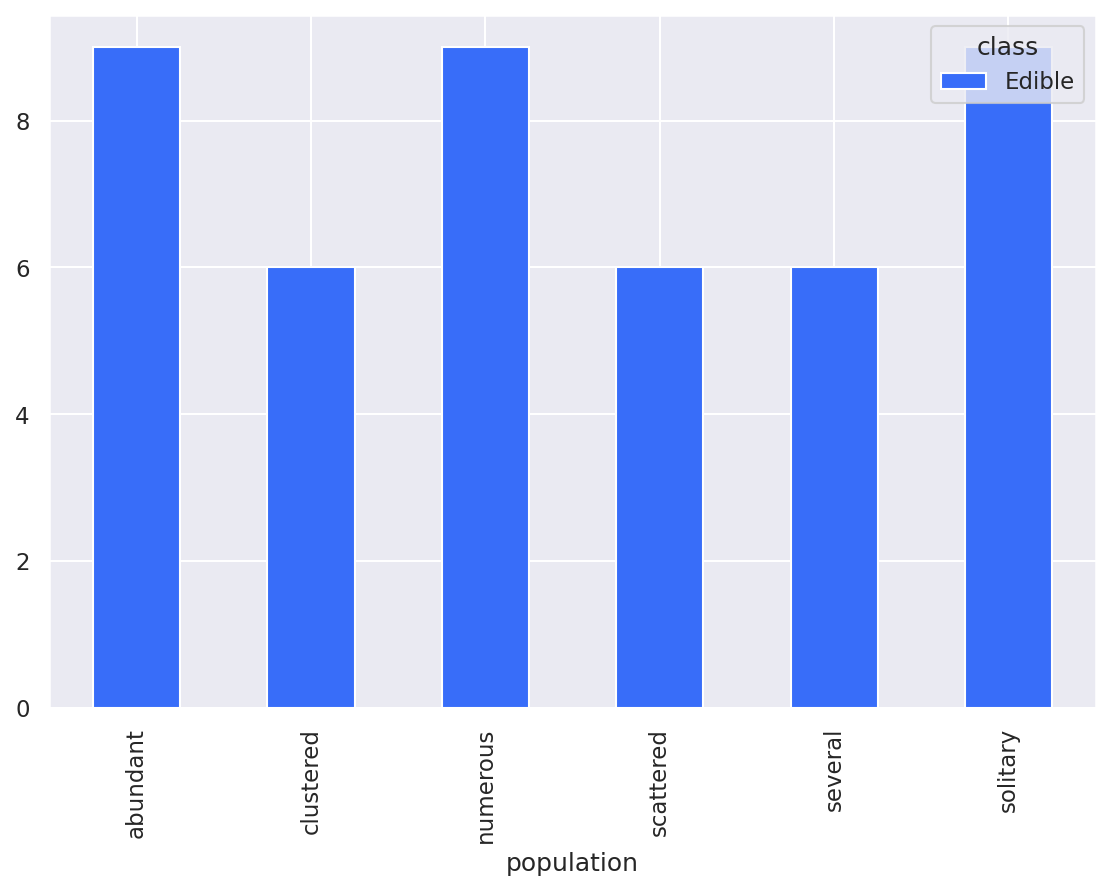

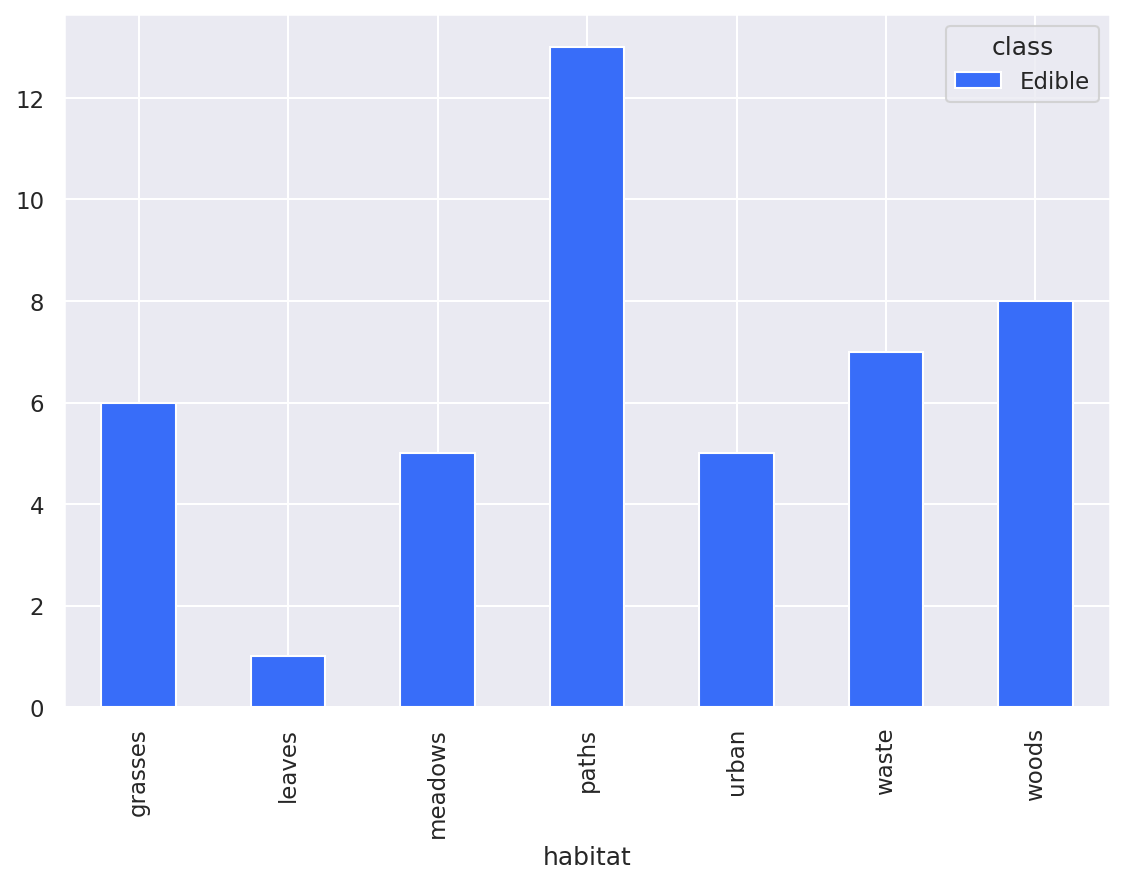

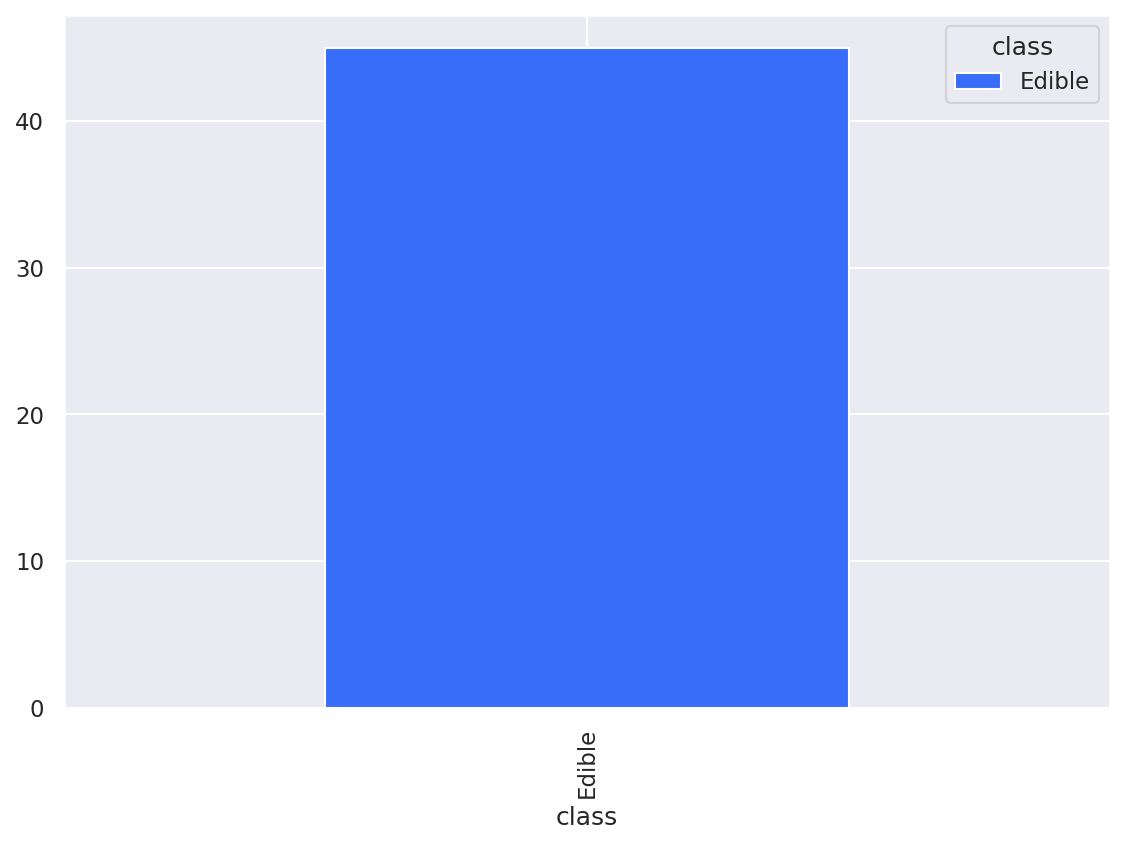

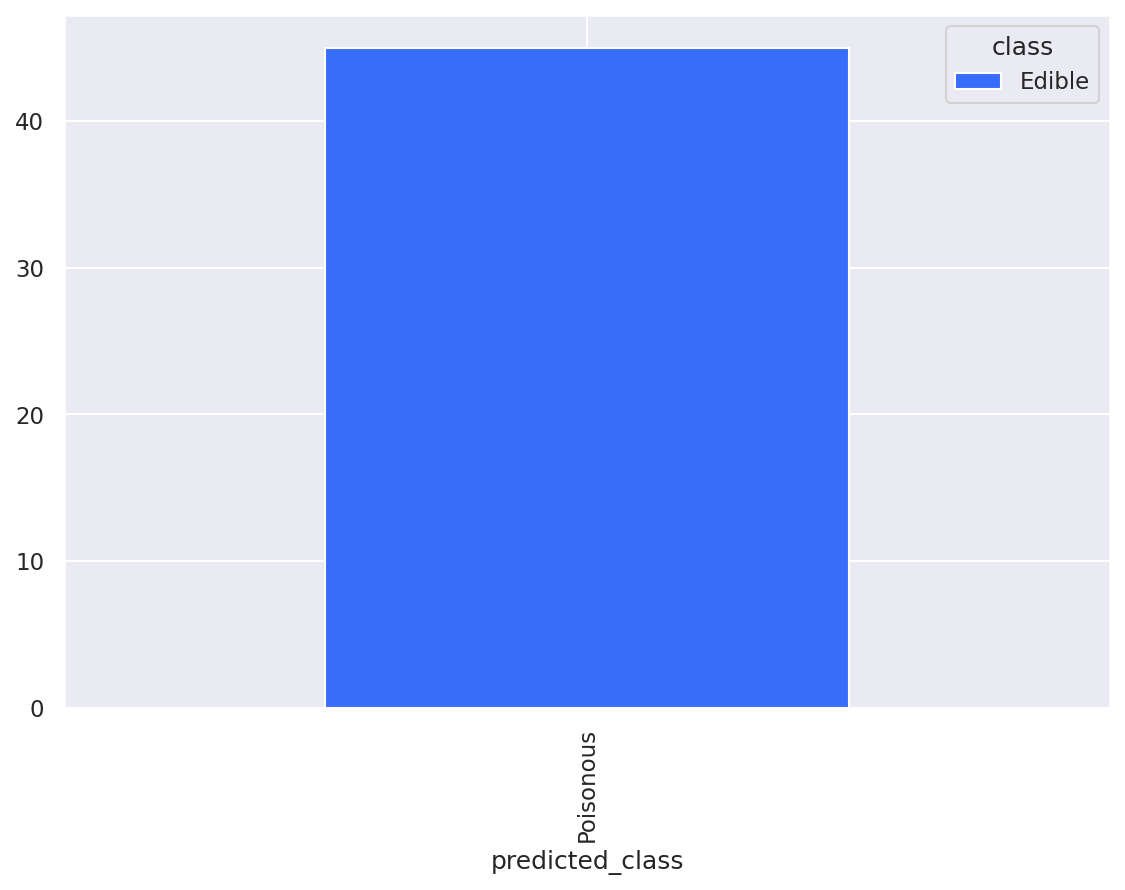

In [188]:
# @title $Bar \ \ Plot \ \ for \ \ Incorrectly \ \ Classified \ \ Test \ \ Data$
for col in test_data_cat_columns:
    incorrect_test_data.groupby([col,'class']).size().unstack().plot(kind='bar', stacked=True)
    plt.show()

# **Conclusion:** Almost all features are present mostly with same ratio in correctly as well as incorrectly classified test data

# Task 7: Comparison and Analysis

## 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [199]:
# @title $SVC \ \ Model \ \ with \ \ different \ \ kernels$
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=1234)
kernels = ['sigmoid', 'linear', 'poly', 'rbf']
for ker in kernels:
    print(f"Kernel : {ker}")
    Model_k = SVC(random_state=1234, class_weight='balanced', C=3.75, kernel=ker, degree=4)
    Model_k.fit(X_train, y_train)

    y_pred = Model_k.predict(X_test)
    print(f"1) Train Accuracy : {Model_k.score(X_train,y_train)}")
    print(f"2) Test Accuracy : {Model_k.score(X_test,y_test)}")
    print('3) Classification Report')
    print(classification_report(y_test,y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc
    print('4) ROC_AUC Score :', roc_auc)
    print("5) Poisonous :", sum(y_pred!=0))
    print("6) Edible : ", sum(y_pred==0))
    print(f"7) Confusion matrix : \n {confusion_matrix(y_test, y_pred)}\n")
    print('---------------------------------------------------')

Kernel : sigmoid
1) Train Accuracy : 0.3075
2) Test Accuracy : 0.375
3) Classification Report
              precision    recall  f1-score   support

           0       0.21      0.37      0.26       121
           1       0.58      0.38      0.46       279

    accuracy                           0.38       400
   macro avg       0.39      0.37      0.36       400
weighted avg       0.47      0.38      0.40       400

4) ROC_AUC Score : 0.37412245623389323
5) Poisonous : 181
6) Edible :  219
7) Confusion matrix : 
 [[ 45  76]
 [174 105]]

---------------------------------------------------
Kernel : linear
1) Train Accuracy : 0.6425
2) Test Accuracy : 0.5725
3) Classification Report
              precision    recall  f1-score   support

           0       0.37      0.60      0.46       121
           1       0.76      0.56      0.65       279

    accuracy                           0.57       400
   macro avg       0.57      0.58      0.55       400
weighted avg       0.65      0.57     

## We get best result in kernel type **poly**

##2.	Analyse SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

**Ans:**

**Strengths:**

i) SVM is effective in High-Dimensional Spaces,

ii) Lot of parameters,

iii) Different kernel options are available

**Weaknesses:**

i) SVM is computationally expensive

ii)  The performance of an SVM classifier heavily depends on the choice of the kernel function and its parameters. Selecting the right kernel and tuning parameters is challenging and time-consuming.

## 3.	Discuss practical implications of SVM in real-world classification tasks.



Support Vector Machines (SVM) have several practical implications for real-world classification tasks due to their strengths and limitations. Here are some key points to consider:

### Practical Implications

1. **High-Dimensional Data Applications**
   - **Text Classification and Natural Language Processing (NLP)**: SVMs are highly effective in text classification tasks, such as spam detection, sentiment analysis, and document categorization, where data often exists in high-dimensional spaces (e.g., word vectors).
   - **Bioinformatics**: SVMs are used in fields like bioinformatics for gene expression classification, where the data is typically high-dimensional.

2. **Small to Medium-Sized Datasets**
   - **Medical Diagnosis**: In medical fields, SVMs can be applied to diagnose diseases using small to medium-sized datasets where accurate classification is crucial, such as classifying cancerous cells.
   - **Image Classification**: For applications where the number of images is not excessively large, SVMs can be used effectively for tasks such as facial recognition and object detection.

3. **Versatility with Kernel Functions**
   - **Complex and Non-Linear Relationships**: SVMs can handle complex and non-linear relationships through the use of kernel functions, making them suitable for tasks where the relationship between features is not linear.

4. **Overfitting Control**
   - **Quality Control and Manufacturing**: SVMs can be used in quality control processes to classify products as defective or non-defective, leveraging their ability to avoid overfitting with the proper choice of kernel and regularization parameters.

### Challenges and Considerations

1. **Computational and Memory Resources**
   - **Large-Scale Applications**: In industries with very large datasets, such as e-commerce or social media analysis, the computational cost and memory requirements of SVMs can be prohibitive. Alternative methods like neural networks or tree-based algorithms may be more suitable in these cases.

2. **Parameter Tuning and Model Selection**
   - **Hyperparameter Optimization**: SVMs require careful tuning of parameters like the regularization parameter (C) and kernel parameters. This process can be computationally intensive and requires expertise, often involving cross-validation techniques.

3. **Interpretability**
   - **Regulatory and Compliance Settings**: In fields like finance or healthcare, where model interpretability and transparency are crucial for regulatory compliance, the black-box nature of SVMs, especially with non-linear kernels, can be a drawback. Simpler models or interpretable machine learning techniques might be preferred.

4. **Sensitivity to Noisy Data**
   - **Real-World Noisy Environments**: In real-world scenarios where data is often noisy and imperfect, SVMs can struggle. Preprocessing steps to clean and preprocess the data become essential, and sometimes robust classifiers like tree-based methods might perform better.

### Specific Use Cases

1. **Finance**
   - **Fraud Detection**: SVMs can be used to detect fraudulent transactions by classifying anomalies in transaction patterns.
   - **Credit Scoring**: SVMs can help in assessing creditworthiness by classifying loan applicants based on historical data.

2. **Marketing**
   - **Customer Segmentation**: SVMs can classify customers into different segments for targeted marketing campaigns.
   - **Churn Prediction**: By analyzing customer behavior, SVMs can predict which customers are likely to leave a service.

3. **Cybersecurity**
   - **Intrusion Detection**: SVMs can classify network traffic to detect potential intrusions or cyberattacks.

In summary, SVMs are powerful tools for various real-world classification tasks, especially when dealing with high-dimensional data and clear margins of separation between classes. However, their practical implementation requires consideration of computational resources, careful parameter tuning, and handling noisy data.